In [118]:
### <<< ÏúÑÏóêÏÑúÎ∂ÄÌÑ∞ ÏàúÏÑúÎåÄÎ°ú ÏôºÏ™ΩÏùò ÌôîÏÇ¥Ìëú Î≤ÑÌäºÏùÑ ÎàåÎü¨Ï£ºÏÑ∏Ïöî.
!pip -q install langchain-groq

In [119]:
test = {}

In [120]:
### Í∞ïÏùòÌèâ Îç∞Ïù¥ÌÑ∞ Î°úÎìú

rawCourseReview = """4, ÌåÄ Ïûò ÎßåÎÇòÎ©¥ Ïû¨Î∞åÎäî Í∞ïÏùò, ÏûòÎ™ª ÎßåÎÇòÎ©¥ ÌÅ∞Ïùº ÎÇòÎäî Í∞ïÏùò. Ïπ¥Î©îÎùº Ìïú Î≤àÎèÑ Ïïà Ïû°ÏïÑÎ≥∏ ÏÇ¨ ÎûåÏùÑ ÏúÑÌïú Í∞ïÏùò. Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏåìÏúºÎ†§Í≥† Îì§ÏóàÎäîÎç∞ ÌÅ¨Í≤å ÏùòÎØ∏ ÏóÜÏóàÎã§. ÍµêÏàòÎãòÏùÄ Ï¢ãÏúºÏã¨!!
2, ÌïôÏÉùÎì§Ïù¥Îûë ÏßÅÏ†ë ÏÜåÌÜµÌïòÎã§Î≥¥Îãà ÌïôÏÉùÎì§Ïù¥ ÎØ∏ÌôîÌï¥Ï£ºÏßÄÎßå ÍµêÏàòÎãò Í∞ïÏùòÎ†•ÎèÑ ÏïàÏ¢ãÏúºÏãúÍ≥† ÌïôÏÉù Ïù¥Î©îÏùº Î¨¥Ï°∞Í±¥ ÏîπÏúºÏãúÍ≥† Í∏∞Î∂ÑÌååÏãúÍ≥† ÌïôÏ†ê Ïûò Ï£ºÏãúÎäî Í≤ÉÎèÑ Î™®Î•¥Í≤†Îã§. ÌåÄÏõê Î≥ÑÎ°ú Ïó¨ÏÑú Í≥†ÏÉùÏùÄ Í≥†ÏÉùÎåÄÎ°ú ÌïòÍ≥† ÌïôÏ†êÏùÄ Ïûò Î™ª Î∞õÏùå. Îã§ÏùåÏóê Í≥†ÏòÅÏ†ú Îì§ÏúºÎ†§Í≥† ÌñàÎäîÎç∞ Í∑∏ÎÉ• Ïù∏ÌÑ¥Ïù¥ÎÇò ÎèôÏïÑÎ¶¨ ÏïåÏïÑÎ¥êÏïºÍ≤†Îã§Í≥† Îã§ÏßêÌïòÍ≤åÎêú ÏàòÏóÖ „Öé„Öé
1, ÌõÑÎ∞ò ÎπÑÎåÄÎ©¥ ÎêòÎ©¥ÏÑú ÌïôÏÉùÌïúÌÖå Î™®Îì†Í±∏ Îã§ Îñ†ÎÑòÍπÄ. ÏÑ±ÏïîÍ¥Ä Ïä§ÌäúÎîîÏò§ÏóêÏÑú Ï¥¨Ïö© Î™ªÌïòÎãà ÏïåÏïÑÏÑú ÏûêÏ∑®Î∞©Ïù¥Îì† ÌååÌã∞Î£∏Ïù¥Îì† Íµ¨Ìï¥ÏÑú Ï∞çÏñ¥ÏôÄÎùº~ Ïû•ÎπÑÎåÄÏó¨, Ïû•ÏÜå ÎåÄÏó¨ ÎπÑÏö© ÌïôÏÉùÏù¥ Î∂ÄÎã¥Ìï®. ÏΩîÎ°úÎÇò 2+ÏïåÌåå ÏãúÍ∏∞Ïóê Ïû•ÏÜå ÎåÄÍ¥Ä Ìï¥ÏÑú Ï°∞Ïõê 9Î™ÖÏù¥Îûë Î∞ÄÌèêÎêú Í≥µÍ∞ÑÏóêÏÑú 3ÏãúÍ∞Ñ Ïù¥ÏÉÅ Ï¥¨ÏòÅÌï®. Ïä§ÌäúÎîîÏò§ Ï¥¨ÏòÅ Ï∑®ÏÜå Îêú ÎÇ† ÌïòÏã† ÎßêÏîÄ : Ïù¥Ï†úÎäî Ïú†ÌäúÎ∏å ÏãúÎåÄÎã§. Ïú†ÌäúÎ∏å Ìòï ÏãùÏúºÎ°ú Ï∞çÏñ¥ÏôÄÎùº... „Öã„Öã„Öã„Öã„Öã„ÖãÌÅ¨ÏÑ±Ï†Å ÌõÑÌïòÍ≤å Ï§òÎèÑ ÎØ∏ÌôîÍ∞Ä ÏïàÎê®. ÍµêÏàòÎãò ÎÑàÎ¨¥ Î¨¥Ï±ÖÏûÑÌï®. Ïù¥Î≤àÌïôÍ∏∞ ÏµúÏïÖÏùò ÏàòÏóÖ.
5, Îä•Î†•ÏûêÎì§Ïóê ÏπòÏù¥Í≥† Í∞ÄÎäî ÏàòÏóÖÏù¥ÏóàÎã§ ÍµêÏàòÎãòÎèÑ Ï∏§Îç∞Î†àÏ≤òÎüº Ï±ôÍ≤®Ï£ºÏÖ®Í≥†! ÎßàÏßÄÎßâ Í≥ºÏ†úÏù∏ ÏòÅÏÉÅ ÎßåÎìúÎäîÍ±¥ Ï†ïÎßê ÌûòÎì§ÏóàÏßÄÎßå ÏÑ±Ï†ÅÏûòÏ£ºÏÖîÏÑú ÎØ∏Ìôî... „Öé„Öé ÏÜîÏßÅÌûà Ìé∏ÏßëÏùÑ ÌïúÎ≤àÎèÑ Îã§Î§ÑÎ≥¥ÏßÄÏïäÏùÄ ÏÇ¨ÎûåÎì§ÏùÄ Ìé∏ÏßëÏùÑ Î™á Î≤à Ìï¥Î≥¥Í≥† ÏàòÍ∞ïÌïòÎäîÍ≤ÉÏùÑ Ï∂î Ï≤úÌïúÎã§. ÎßàÏßÄÎßâ Í∏∞ÎßêÏòÅÏÉÅÏóê Î™®ÎëêÍ∞Ä Ìé∏ÏßëÏùÑ Ìï¥ÏïΩÌïòÎäî ÏÉÅÌô©Ïù¥ Ïò¨ ÏàòÎèÑ ÏûàÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§. ÏàòÏóÖÏóêÏÑúÎäî Ìé∏ÏßëÏùÑ Í∏∞Ï¥àÎ∂ÄÌÑ∞ Î∞∞Ïö∞ÏßÄ ÏïäÍ∏∞ ÎïåÎ¨∏Ïóê Ïó¥Ï†ïÎßåÏúºÎ°úÎäî Ïª§Î≤ÑÍ∞Ä Î∂àÍ∞ÄÎä•ÌïúÍ∞ÄÏöî Í∞ôÎã§. Ïñ¥Îäê Ï†ïÎèÑ Í∞êÍ∞ÅÏù¥ ÏûàÎäî ÏÇ¨ÎûåÏù¥ ÏàòÍ∞ïÌïòÎäî Í≤ÉÏùÑ Ï∂îÏ≤úÌïúÎã§! Í∑∏Î¶¨Í≥† ÌîÑÎ¶¨ÎùºÏù¥ÎçîÎäî Ï†úÎ∞ú Îì§ÏùÑ ÏÉùÍ∞ÅÌïòÏßÄ ÎßàÏÑ∏Ïöî
3, Î∞©ÏÜ°ÌîÑÎ°úÍ∑∏Îû® Ï†úÏûë Í¥ÄÎ†® Ïã§ÏäµÏùÑ Ìï¥Î≥º Ïàò ÏûàÎäî Ï¢ãÏùÄ ÏàòÏóÖ. ÏãúÌóòÏùÄ ÏóÜÍ≥†, ÏàòÏóÖÏãúÍ∞ÑÏóê Íµê ÏàòÎãòÏù¥ Ï§ÄÎπÑÌïòÏã† ÎåÄÎ≥∏ÏúºÎ°ú Ïã§ÏäµÏó∞ÏäµÌïòÍ≥† ÌèâÍ∞ÄÌïòÍ≥†, Í∞úÏù∏ Í≥ºÏ†úÎäî Í∏∞ÌöçÏÑú Ï†úÏ∂úÏù¥Îûë Î†à Ìè¨Ìä∏ ÌïòÎÇò ÏûàÏóàÍ≥†, Ìïú ÌïôÍ∏∞ÎèôÏïà ÌåÄÎ≥ÑÎ°ú Î∞©ÏÜ°ÌîÑÎ°úÍ∑∏Îû®ÏòÅÏÉÅ ÌïòÎÇò ÎßåÎì§Î©¥ ÎÅù! ÌåÄÎ≥ÑÎ°ú Ï¥¨ ÏòÅÌï†ÎïåÎäî Ïä§ÌäúÎîîÏò§ÍπåÏßÄ ÏßÅÏ†ë ÎßåÎì§Ïñ¥Ïïº ÎêòÍ≥†, Ïó¨Îü¨Î™®Î°ú Îπ°ÏÑº Ï†êÏù¥ ÏóÜÏßÄ ÏïäÏïÑ ÏûàÏóàÏßÄÎßå Í∏∞Ïñµ ÎÇ®Îäî ÏàòÏóÖ! Î∞©ÏÜ°ÏÇ¨ Ï∑®ÏóÖ, PD Ï™ΩÏóê Í¥ÄÏã¨ÏûàÍ±∞ÎÇò ÌîÑÎ°úÍ∑∏Îû® Ï†úÏûë Í≥ºÏ†ïÏóê ÎåÄÌï¥ Í≤ΩÌóòÌï¥ Î≥¥Í≥† Ïã∂ÏùÄ ÏÇ¨ÎûåÏù¥ÎùºÎ©¥ Ïù¥ ÏàòÏóÖ Ï¢ãÏùÑ ÎìØ. Ïù¥Ï†úÎäî ÎÖπÌôî Ïã§ÏäµÎèÑ Ï§ëÍ≥ÑÏ∞®Î°ú Ìï¥ÏÑú Ï§ëÍ≥ÑÏ∞®ÎèÑ ÌÉÄÎ≥º Ïàò ÏûàÏùå!
4, Ï°∞ Ïö¥Ïù¥ Ï†ïÎßêÏ†ïÎßê Ï§ëÏöîÌïòÎã§. ÌîÑÎ¶¨ÎùºÏù¥ÎçîÎäî Ï†úÎ∞ú Îì§ÏùÑ ÏÉùÍ∞Å ÌïòÏßÄ ÎßàÏÑ∏Ïöî. ÏûêÍ∏∞ Ï°∞ Ï¥¨ÏòÅ ÌïòÎäî Ï£ºÎûë Ìé∏ÏßëÏù¥Îûë Í≥µÎ∂ÄÎûë Î≥ëÌñâÌï¥ÏïºÌïòÎäî Í∏∞ÎßêÏóê Ï¢Ä Îπ°ÏÖÄ Ïàò ÏûàÏúºÎÇò ÌèâÏÜåÏóêÎäî ÏãúÌóòÎèÑ ÏóÜÍ≥† Í≥ºÏ†úÎèÑ Î∂ÄÎã¥ ÏóÜÏñ¥ÏÑú ÎÇòÎ¶Ñ ÍøÄÏù¥ÏóàÎçòÍ≤É Í∞ôÎã§. Ïä§Ìä∏Î†àÏä§ Î∞õÏúºÎ©¥ÏÑúÎèÑ ÎÑàÎ¨¥ Ïû¨Î∞åÏóàÏñ¥ ÏÑú Ï∂îÏ≤ú!!
5, ÍøÄÏûºÏàòÏóÖ~ ÏõåÎÇô ÏòÅÏÉÅ.Î∞©ÏÜ°Ïóê Í¥ÄÏã¨Ïù¥ ÎßéÏïÑÏÑú ÌïúÌïôÍ∏∞ ÎèôÏïà Ïû¨ÎØ∏ÏûàÍ≤å Î≥¥ÎÇ∏ Í≤É Í∞ôÏùå~ Ï¢ã ÏùÄ ÏÇ¨ÎûåÎì§ÎèÑ ÎßåÎÇòÍ≥† Ìé∏Ïßë Ïã§Î†•ÎèÑ ÎäòÏùå. ÌïôÏ†êÎèÑ Ïûò Ï£ºÏãúÎäî ÎìØ
5, ÍµêÏàòÎãò ÎÑàÎ¨¥ Ï¢ãÏúºÏãúÍ≥† ÏàòÏóÖÎèÑ Ïû¨Î∞åÎã§. Îã§Îßå ÌïôÍ∏∞ÎßêÏóê Ï°∞Î≥ÑÎ°ú ÏµúÏ¢Ö ÏòÅÏÉÅ Í≥ºÏ†úÎ•º(30Î∂ÑÏßúÎ¶¨) ÎßåÎì§Ïñ¥Ïïº ÌïòÎäîÎç∞ ÏòÅÏÉÅ Ìïú Î≤àÎèÑ Ïïà ÎßåÎì§Ïñ¥Î≥∏Îç∞Îã§ ÌîÑÎ¶¨ÎùºÏù¥Îî©ÍπåÏßÄ ÌïòÎäî Ï°∞ÏõêÎì§ ÎïåÎ¨∏Ïóê ÌûòÎì§ÏóàÏùå Ï°∞Ïõê ÏûòÎ™ª ÎßåÎÇòÎ©¥ ÏµúÏïÖÏùò ÏàòÏóÖ
4, Ï°∞Î™®ÏûÑÏù¥ Ï†ïÎßêÏ†ïÎßêÏ†ïÎßê Ï§ëÏöîÌïú ÏàòÏóÖÏûÖÎãàÎã§. ÏÇ¨Ïã§ Í≤∞Í≥ºÎ¨ºÎì§Ïóê ÏóÑÏ≤≠ÎÇòÍ≤å ÌÅ∞ Ï∞®Ïù¥Îäî ÏóÜ Í∏∞ ÎïåÎ¨∏Ïóê Î™ÖÌôïÌïú ÌèâÍ∞Ä Í∏∞Ï§ÄÏù¥ Ïñ¥ÎñªÍ≤å ÎêòÎäîÏßÄÎäî Ïûò Î™®Î•¥Í≤†ÏßÄÎßå ÎßàÏßÄÎßâ ÌîÑÎ°úÏ†ùÌä∏Î•º ÏôÑ ÏÑ±ÌïòÎäî Îç∞Ïóê ÎìúÎäî ÏãúÍ∞Ñ Î∞è ÎÖ∏Î†•Ïù¥ ÏóÑÏ≤≠ÎÇòÍ∏∞ ÎïåÎ¨∏Ïóê Ï°∞ÏõêÎì§ Î™®ÎëêÍ∞Ä Ïó¥Ïã¨Ìûà Ìï¥ÏïºÎßå Í∑∏ ÎÇòÎßà ÏàòÏõîÌïòÍ≤å ÌîÑÎ°úÏ†ùÌä∏Î•º ÏßÑÌñâÌï† Ïàò ÏûàÏäµÎãàÎã§. Í∞úÏù∏Ï†ÅÏúºÎ°ú ÏãúÍ∞ÑÏ†ÅÏúºÎ°ú ÎÑêÎÑêÌïú ÌïôÍ∏∞ Ïóê Îì£Îäî Í≤ÉÏùÑ Ï∂îÏ≤úÌï©ÎãàÎã§..
3, ÏàòÏóÖÏûêÏ≤¥Îäî Ï¶êÍ±∞Ïõ†ÎäîÎç∞ Ï°∞Î™®ÏûÑÏù¥ Îß§Ïö∞Îß§Ïö∞Îß§Ïö∞ ÌûòÎì§Í≥† ÏßÄÍ∞ÅÏùÑ Ï†àÎåÄÏ†àÎåÄ Ïã´Ïñ¥ÌïòÏÖîÏÑú 9ÏãúÍπåÏßÄ Îä¶ÏúºÎ©¥ ÏïàÎê®
1, ÌûêÎßÅÍ∞ïÏùò? Ï†àÎåÄ ÏïÑÎãò ÏùåÏïÖÏÇ¨Ïóê Í¥ÄÏã¨ ÏóÜÏúºÎ©¥ Îì£ÏßÄÎßàÏÖà ÏãúÌÇ§Îäî Í≤ÉÎèÑ ÎßéÏùå ÎÑàÎ¨¥ Í∑ÄÏ∞ÆÏïÑÏÑú ÎìúÎûçÌïúÎã§ „ÖÇ„ÖÇ
2, ÍµêÏñë Ï£ºÏ†úÏóê.. Ìï† Í≤å ÎßéÎã§.. ÏùåÏïÖÏÇ¨Î•º ÎÑàÎ¨¥ ÏÇ¨ÎûëÌïòÏãúÎäî Í±∞ Í∞ôÏßÄÎßå Í∑∏ ÏÇ¨ÎûëÏùÑ Ïö∞Î¶¨Í∞Ä Î™ª Îî∞ÎùºÍ∞ÄÍ≤†Îã§
1, Í∑∏ÎÉ• Îì£ÏßÄ ÎßàÏÑ∏Ïöî ÏõêÎûò ÏùåÏïÖÏÇ¨ Ïûò ÏïåÎçò ÏÇ¨ÎûåÏù∏Îç∞ ÏàòÏóÖÎèÑ ÏàòÏóÖÏù∏Îç∞ ÏãúÌóòÏù¥ Í∞úÎ≥ÑÎ°úÏóê Ïöî. Í∏∞ÎßêÏóêÏÑúÎäî Í≥° ÏïÖÏû• Ïà´ÏûêÎ∞îÍøîÏÑú Î¨∏Ï†úÎÇ¥Îäî Îì± ÏûêÏÑ∏ÌïòÍ≤å Ïïà ÌïòÎ©¥ ÌãÄÎ¶¨Í≤åÎÅî ÏãúÌóòÎÇ¥ ÎÜìÍ≥† ÏãúÌóò ÏâΩÍ≤å ÎÉàÎã§ Í∑∏Îü¨Í≥†, Ïù¥ÎØ∏ Ï§ëÍ∞Ñ Ïñ¥Î†µÍ≤å ÎÇ¥ÏÑú Ï†àÌèâ Í∏∞Ï§ÄÎèÑ ÏóÑÍ≤©ÌïòÍ≤å ÌñàÏùÑÎïå Ïóê Ïù¥Í∂åÏù¥ 10ÌçºÎèÑ ÏïàÎêòÏóàÎäîÎç∞ Í∑∏ÎÉ• Ï†àÌèâ ÌïôÍµêÏóêÏÑú ÎÇ¥Î†§Ïò®ÎåÄÎ°ú Ï≤òÎ¶¨ÌïòÏã†Îã§Í≥† ÌïòÏÖ®ÏäµÎãà Îã§. ÍµêÏàòÍ∞Ä ÌïôÏÉùÏûÖÏû•ÏùÑ Î™®Î•¥Í≥† ÌïôÏ†ê Ïûò Ï§Ñ ÏÉùÍ∞ÅÎ≥¥Îã§ ÏûêÍ∏∞Í∞Ä Í∞ÄÎ•¥ÏπòÎäîÍ±∏ Ï†ÑÎ∂Ä ÏïåÏßÄ Î™ª ÌïòÎ©¥ ÏïàÎêúÎã§Îäî ÏûÖÏû•Ïù¥ÏãúÎãà... ÌïôÏ†ê Ï¢ãÍ≤å Î∞õÏúºÎ©¥ ÍøÄÏù∏ ÍµêÏñëÍ≥ºÎäî Ï†ÑÌòÄ ÎßûÏßÄ ÏïäÏäµÎãàÎã§. Îã§Î•∏Í±∞ Îì§ÏúºÏÑ∏Ïöî ÏßÑÏßú.
1, Ïù¥ ÏàòÏóÖ ÏãúÌóò Î≠êÏïº‚Ä¢¬∑¬∑¬∑¬∑‚Ä¢Í≥ºÏ†úÎèÑ ÎßéÏïÑÏöî.Ï†àÎåÄ ÏÑ†ÌÉùÌïòÏßÄ ÎßàÏã≠ÏãúÏò§!!!
3, Îπ°Ï≥êÏÑú Ïì∞Îü¨ÏôîÏùå. Ïú†ÏùµÌïú Í±¥ ÎßûÎäîÎç∞ ÍµêÏàòÎãò ÎÑàÎ¨¥ ÍπêÍπêÌïòÏã¨.. ÍµêÏñëÏóêÏÑú Ï†ÑÍ≥µ Ïù¥ÏÉÅÏùò ÎÖ∏ Î†•Í≥º Ï†ÑÎ¨∏ÏÑ±ÏùÑ ÏöîÍµ¨ÌïòÏãúÎäî Í±∞ Í∞ôÏïÑ ÏÜîÏßÅÌûà ÎÑàÎ¨¥ ÌûòÎì¶. ÏãúÌóòÏÑ±Ï†Å Í∑∏Îü≠Ï†ÄÎü≠ ÎÇòÏò®Í±∞? ÏïÑÎ¨¥ ÏÜåÏö© ÏóÜÏùÑ Í±∞ Í∞ôÏùå. Í∏ÄÏì∞Í∏∞ Í≥ºÏ†úÏóêÏÑú Íº¨ÎùºÎ∞ïÏùÑÌÖåÎãàÍπå
5, ÍøÄÍ∞ïÏù¥ÏóêÏöî ÏûîÍ≥ºÏ†ú ÎßéÏßÄÎßå ÏñºÎßà ÏïàÍ±∏Î¶¨Í≥† Ìé∏Ìï® ÏãúÌóòÎèÑ Ï§ëÍ∞ÑÏùÄ Í∞úÍøÄ
4, Ïó∞Ï£ºÌöåÎèÑ Í∞à Ïàò ÏûàÎäî Ï¢ãÏùÄ Í∏∞ÌöåÏòÄÏùå. Ï§ëÍ∞ÑÏùÄ Ïò§ÌîàÎ∂ÅÏù¥Í∏∞ ÎïåÎ¨∏Ïóê Î∂ÄÎã¥ÏùÄ ÏóÜÏßÄÎßå Í∏∞ÎßêÏùÄ ÌÅ¥Î°úÏ¶àÎ∂ÅÏù¥Îùº Í≥µÎ∂Ä Ïñ¥Îäê Ï†ïÎèÑ ÌïÑÏöî
4, ÏóêÏÅ†ÏùÄ Ï¢Ä Îπ°ÏÖà. Í∑∏Îü¨ÎÇò Ï°±Î≥¥ Íµ¨ÌïòÎ©¥ Í∑∏ Ïù¥ÌïòÎ∂ÄÌÑ∞Îäî Îß§Ïö∞ ÏàòÏõîÌï®. Ï°±Î≥¥ Ïó¨Îü¨Í∞úÍµ¨Ìï¥ÏÑú ÎßéÏù¥ ÌíÄÏñ¥Î≥¥ÎäîÍ±∞ Ï∂îÏ≤ú. Í≥ºÏ†úÎèÑ Ï†ÅÎãπÌñàÍ≥† ÏùåÏïÖÌöå Îã§ÎÖÄÏò¨ Ïàò ÏûàÎäî Í∏∞ÌöåÎèÑ ÎèºÏÑú Ï¢ãÏïòÎã§.
5, Ïû¨Î∞åÏóàÏäµÎãàÎã§. Í≥ÑÏ†àÎ°ú ÏàòÍ∞ïÌïòÎäî Í±∞ Ï∂îÏ≤ú! Ï°±Î≥¥ Íº≠ Íµ¨ÌïòÏãúÍ≥†Ïöî~
5, Ìï©Ï∞Ω Í∞úÏù∏Ï†ÅÏúºÎ°ú Ïû¨ÎØ∏ÏûàÏóàÏùå~ ÏñòÍ∏∞ÌïòÎäîÍ±∞ Ï¢ãÏïÑÌï¥ÏÑú ÌÜ†Î°†Ïù¥ Ï¢Ä Îçî ÎßéÏïòÏúºÎ©¥ Îçî Ïû¨ÎØ∏ÏûàÏóàÏùÑ ÎìØ „Öé Í≥ºÏ†úÎèÑ Ï†ÅÍ≥† ÏÑúÏñë ÏùåÏïÖÏÇ¨Ïóê ÎåÄÌï¥ Î∞∞Ïö∞Í≥† Ïú†ÏùµÌñàÎã§.
2, Ï†ïÎßê? Ï†ïÎßê Îì§Ïñ¥ Ïù¥Í±∞? ÌïúÎ≤àÎßå Îçî Í≥†ÎØºÌï¥Î¥ê....
4, ÏÇ¨Ïù¥Î≤Ñ Í∞ïÏùòÏûÑÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† Ïó¥Ïã¨Ìûà ÏàòÏóÖÌïòÏãúÍ≥† ÌïôÏÉùÎì§Í≥º Ïó¥Ïã¨Ìûà ÏÜåÌÜµÌïòÎ†§Í≥† ÌïòÏÖ®Ïäµ ÎãàÎã§. Ï§ëÍ∞ÑÏùÄ ÎåÄÏ≤¥Í≥ºÏ†úÎ°ú ÏßÑÌñâÎêòÏóàÍ≥† Í∏∞ÎßêÏùÄ ÏÑúÏà†Ìòï ÎëêÎ¨∏Ìï≠ÏúºÎ°ú Ï∂úÏ†úÎêòÏóàÎäîÎç∞, ÏãúÍ∞Ñ Ïù¥ Îß§Ïö∞ Î∂ÄÏ°±ÌñàÏäµÎãàÎã§. Í∑∏ÎûòÎèÑ ÎßåÏ°±ÌïòÎäî Í∞ïÏùòÏûÖÎãàÎã§.
2, Ïó¨Í∏∞ ÌõÑÍ∏∞ ÎÇ®Í∏¥ ÏÇ¨ÎûåÎì§ Îßê Î¨¥ÏãúÌïòÍ≥† ÌîºÌîºÌã∞ ÏñºÎßàÎÇò ÎßéÍ≤†Ïñ¥~ ÌïòÍ≥† Ïã†Ï≤≠ÌñàÎã§Í∞Ä ÏßÄÍ∏à Ìîº ÎààÎ¨º ÌùòÎ¶¨Î©¥ÏÑú Í∏∞ÎßêÍ≥†ÏÇ¨ Î¥ÖÎãàÎã§. ÎÇ¥Ïö©ÏùÄ Ïû¨Î∞åÍ≥† ÍµêÏàòÎãò ÎÑàÎ¨¥ ÏπúÏ†àÌïòÏãúÍ≥† ÌïôÏÉùÎì§ÏùÑ Ï¢ãÏïÑÌïòÏãúÎäîÍ≤å Î≥¥Ïù¥ÎäîÎç∞ ÏãúÌóòÏù¥ Ïò§Î∞îÏóêÏöî. Î∂ÑÎ™Ö Ï§ëÍ∞ÑÍ≥†ÏÇ¨ Ïù¥ÌõÑ Î≤îÏúÑÏù∏Îç∞ÎèÑ Ï§ëÍ∞ÑÍ≥†ÏÇ¨ ÎåÄÎπÑ Í∏∞ÎßêÏùÄ 1.5-2Î∞∞Ï†ïÎèÑ Î∂ÑÎüâÏù¥ ÎäòÏñ¥ÎÇú ÎäêÎÇåÏûÖÎãàÎã§....
5, pptÎßéÏäµÎãàÎã§. Î≤îÏúÑÎäî ÌèâÎ≤îÌï©ÎãàÎã§. ÏãúÌóòÏùÄ ÏâΩÏäµÎãàÎã§. C+Î∞õÏïòÏäµÎãàÎã§.
2, Î≤îÏúÑÍ∞Ä..........ÏßÑÏßú......ÎÑà~~~~~~Î¨¥ ÎßéÏïÑÏöî....Ìïò...... 20 ÌîºÌîºÌã∞ Î≥¥Îã§ ÌÜ†Ìï†ÎìØ.....
4, ÏïîÍ∏∞ Î™ªÌïòÎäî Ìé∏Ïù¥Îùº Í∞úÍ≥†ÏÉùÌï® ÌíÄÎßà ÎïåÎ¶¨Í≥† Îì§ÏùÄ Í∞ïÏùòÏòÄÎäîÎç∞ Í∞úÌõÑÌöåÌï® Í∞úÏó¥Ïã¨Ìûà ÌñàÎäî Îç∞ ÏóêÎßà Î∞õÏùå Ï§ëÍ∞Ñ Í∏∞Îßê ÌÄ¥Ï¶à Ï†ÑÏ≤¥ÏóêÏÑú Ìïú 10~15Í∞ú?ÌãÄÎ†∏Îçò ÎìØ ÍµêÏàòÎãò ÏûêÏ≤¥Îäî ÎÑàÎ¨¥ Ï¢ãÏúºÏã†Îç∞ ÏãúÌóò ÌäπÏÑ±ÏÉÅ ÌïôÏ†ê Îî∞ Í∞ÄÍ∏¥ Ïñ¥Î†§ÏõÄ
3, Ï§ëÍ∞Ñ 19/35 Í∏∞Îßê 30/35 ÏµúÏ¢Ö C+ÎÇòÏò¥. Ïû¨ÏàòÍ∞ï Í∞ëÎãàÎã§.
3, ÎÇ¥Ïö© Ìù•ÎØ∏Î°≠Í≥† Í≥ºÏ†ú ÏóÜÏñ¥ÏÑú Î∂ÄÎã¥ÏóÜÏù¥ Îì§ÏóáÏñ¥Ïöî. ÌèâÍ∑†Î≥¥Îã§ ÏÇ¥Ïßù ÎÇÆÏïòÎäîÎç∞ C+ÏûÑ „Ö†
5, Ïó¨Îü¨Î∂Ñ ÏãúÌóòÏù¥ ÏâΩÍ≤å ÎÇòÏò§Îäî Í≤ÉÏùÄ ÏïàÏ†ïÏ†Å, Ïô∏Î∂ÄÏ†Å Í∑ÄÏù∏ ÏöîÏù∏ÏûÖÎãàÎã§. Ï†Ä Ïù¥Í±∞ ÌãÄÎ†§ÏÑú ÎÑà Î¨¥ Ïä¨ÌéêÏñ¥Ïöî Ïù¥Í±∞ Í∏∞ÏñµÌïòÍ≥† Í∞ÄÏÑ∏Ïöî„Ö†„Ö† 97.5Ï†êÏù∏Îç∞ a+ Î™ªÎ∞õÏúºÎ©¥ Î∂àÏßÄÎ•¥Î†§Í≥†Ïöî
1, Îß§Ï£º ÌÄ¥Ï¶àÎèÑ ÏûàÎäîÎç∞ Í∞ÄÎ•¥Ï≥êÏ£ºÏßÄ ÏïäÏùÄ Í≥≥ÏóêÏÑú ÎÇòÏò¨ÎïåÎèÑ ÎßéÏïÑÏöî. ÏãúÌóòÎ∞©ÏãùÎèÑ ÎèÑÏ§ëÏóê Î∞î ÎÄåÍ≥† Î∂àÌï©Î¶¨Ìïú ÏàòÏóÖÏö¥ÏòÅÏù¥ Ïù¥Î£®Ïñ¥Ïßà ÎïåÎèÑ ÏûàÏóàÏäµÎãàÎã§. ÌïôÏ†êÎèÑ ÎÇòÎàÑÏñ¥Ï£ºÏãúÎãà Ïõ¨ÎßåÌïò Î©¥ Îã§Î•∏ ÏÅ†Î™∞ Í∞ïÏùòÎ•º Ï∞æÏïÑÏÑú Îì£ÎäîÍ≤å Ï¢ãÏùÑÍ≤É Í∞ôÏïÑÏöî!
2, 3ÏãúÍ∞Ñ ÎÇ¥ÎÇ¥ Îì£Í∏∞ÌèâÍ∞Ä+Î∞õÏïÑÏì∞Í∏∞ ÎåÄÌöå ÍµêÏàòÎãò Îû©ÌïòÏãúÎäîÍ±∞ ÏûòÎ™ª ÏïåÏïÑÎì§ÏúºÎ©¥ ÎÅùÏûÑ Ïó¥Ïã¨Ìûà Îì£Í≥† ÌïÑÍ∏∞ÌñàÎã§Í≥† Ìò∏ÏÜåÌï¥ÎèÑ ÏÜåÏö©ÏóÜÏùå Ïï†Ï¥àÏóê ÏóêÏù¥ÏÅ† Ïûò ÏïàÏ£ºÏã†Îã§Í≥† ÎßêÏîÄÌïòÏÖ®Í≥† Î≥∏Ïù∏ Ï¥ùÏ†ê 94.67Ïù∏Îç∞ ÏóêÏù¥Ï†úÎ°ú Î∞õÏùå Ïó¥Ïã¨Ìûà Ìïú ÎßåÌÅºÏùò Î≥¥ÏÉÅ Î∞îÎùºÎäî ÏÇ¨ÎûåÌïúÌÖåÎäî ÎπÑÏ∂î ÎÇ¥Ïö©Ïù¥ Í∑∏Îã• ÏÉàÎ°≠Í±∞ÎÇò Ïú†ÏùµÌïòÏßÄÎèÑ ÏïäÏùå
3, ÏãúÌóò Îëê Î≤à(Ïò§ÌîàÎ∂Å) Ï°∞Î™®ÏûÑ Ìïú Î≤à ÏàòÏóÖ ÎÇ¥Ïö©Ïù¥ ÏÉàÎ°≠Îã§Í±∞ÎÇò Ïñ¥Î†µÎã§Í±∞ÎÇò ÌïòÏßÄ ÏïäÍ≥† ÌèâÏù¥ÌïòÍ≥† ÏÇ¥Ïßù ÏßÄÎ£®Ìï† Ïàò ÏûàÏñ¥Ïöî Í∑∏ÎûòÎèÑ ÍµêÏàòÎãò ÎÑò Ï¢ãÏúºÏãúÍ≥† ÏõåÌä∏ÏûàÏúºÏÑ∏Ïó¨ Ï°∞Î™®ÏûÑÏùÄ ÏàòÏóÖ ÎÇ¥Ïö©ÏùÑ ÎåÄÏ§ëÎß§Ï≤¥ÏôÄ ÏóÆÎäî Í±∞ÏòÄÏñ¥Ïöî ÌîºÌîºÌã∞ Ïô∏ÏóêÏÑúÎèÑ ÏãúÌóòÏùÑ ÎÇ¥ÏãúÎãà Ï¢Ä Í∞ïÏ°∞ÌïòÏãúÎäî ÏàòÏóÖ ÎÇ¥Ïö© ÌïÑÍ∏∞ ÌïÑÏàò! ÌïÑÏàòÍ≥ºÎ™©ÏùºÌÖêÎç∞ Îì§Ïñ¥Î≥ºÎßå Ìï©ÎãàÎã§
5, ÌïôÏÉùÎì§Í≥º ÏπúÌïòÍ≤å ÏßÄÎÇ¥Í≥† Ïã∂Ïñ¥ÌïòÎäî ÍµêÏàòÎãòÏùò ÎßàÏùåÏù¥ ÎÑàÎ¨¥ Îî∞ÎìØÌïòÏã≠ÎãàÎã§! ÏÑ±Ï†ÅÏùÄ Ï†ïÎßêÎ°ú Í∞ùÍ¥ÄÏ†ÅÏù¥ÏãúÏßÄÎßå ÌõÑÌïòÍ≤å Ï£ºÏãúÎäî Í±∞ Í∞ÅÏäµÎãàÎã§:) Ìã∞ÌÉÄÏûÑ Ïñ∏Ï†úÎì† Ïã†Ï≤≠Ìï¥Î≥¥ÏÑ∏Ïöî!
3, ÎåÄÏù∏Ïª§ÎÆ§ÎãàÏºÄÏù¥ÏÖò Ïù¥Î°†Îì§ÏùÑ ÎÑìÍ≥† ÏñïÍ≤å ÏïåÏïÑÍ∞ÄÎäî ÏàòÏóÖÏù¥ÏóêÏöî. Ïñ¥Î†µÏßÄ ÏïäÏßÄÎßå, Ï°∞Í∏àÏùÄ ÏßÄÎ£®ÌïòÎã§Í≥† ÎäêÍºàÏäµÎãàÎã§. ÍµêÏàòÎãòÏùÄ Ï¢ãÏùÄ Î∂ÑÏù¥Ïã≠ÎãàÎã§. ÌïôÏÉùÎì§Í≥º Í∞ÄÍπåÏõåÏßÄÎ†§Í≥† ÎßéÏù¥ ÎÖ∏Î†•ÌïòÏÑ∏Ïöî. ÏãúÌóòÏùÄ ÏàòÏóÖ Ï§ë ÌïÑÍ∏∞Î•º ÍººÍººÌûà ÌïòÎäî Í≤å Ï§ëÏöîÌï©ÎãàÎã§. ÏÑ±Ï†ÅÏùÄ Î¨¥ÎÇúÌï©ÎãàÎã§.
5, ÏàòÏóÖ ÎÇ¥Ïö© ÏâΩÍ≥† ÌåÄÌîåÎèÑ Ï°∞ÏõêÎì§ Ïûò ÎßåÎÇòÎ©¥ Î¨¥ÎÇúÎ¨¥ÎÇúÌï¥Ïöî. ÏãúÌóò Ïò§ÌîàÎ∂ÅÏù¥Îùº ÌîºÌîºÌã∞ ÏûêÎ£å Ïô∏Ïùò Í∞ïÏùòÎÇ¥Ïö©ÎèÑ ÍººÍººÌûà ÌïÑÍ∏∞Ìï¥Îë¨Ïïº Ï¢ãÏäµÎãàÎã§! ÏàòÏóÖ Ïûê Î£å + ÌïÑÍ∏∞ Ï†ïÎ¶¨Îßå Ïûò Ìï¥ÎÜìÏúºÎ©¥ ÏÑ±Ï†Å Ïûò Î∞õÏúºÏã§ Ïàò ÏûàÏùÑ Í≤ÅÎãàÎã§.
3, ÏàòÏóÖ ÎÇ¥Ïö© Ïñ¥Î†µÏßÄ ÏïäÍ≥† Î¨¥ÎÇúÌïú Ï†ÑÌïÑÏù∏Í±¥ ÎßûÎäîÎç∞ Ï†êÏàòÏª∑Ïù¥ ÎÑàÎ¨¥ Í∑πÏïÖ.. A+Í∞Ä 2Î™ÖÏù¥Î©¥ Ïª∑ Ï°∞Í∏à ÎÇÆÏ∂∞Ï£ºÏã§ Ïàò ÏûàÎäî Í±∞ ÏïÑÎãåÏßÄ„Ö†„Ö† ÏïÑÎûò Í∞ïÏùòÌèâÏ≤òÎüº Î∞õÏïÑÏì∞Í∏∞ ÏûòÌï¥ÏïºÌï® ÏãúÌóò ÏûòÎ≥¥Î†§Î©¥ Í∑∏ÎÉ• ÍµêÏàòÎãò ÎßêÏîÄ Îã§ Î∞õÏïÑÏ†ÅÏúºÏÑ∏Ïöî
4, ÏãúÌóòÎ≥¥Í≥† ÌåÄÌîåÏù¥ ÏûàÎäîÎç∞ Ï°∞Î≥Ñ ÏÉÅÌò∏ ÌèâÍ∞ÄÍ∞Ä ÏûàÏäµÎãàÎã§. ÍµêÏàòÎãòÍªòÏÑú ÏñºÎßàÎÇò ÏÉÅÌò∏ÌèâÍ∞ÄÏ†ê ÏàòÎ•º Î∞òÏòÅÌïòÏãúÎäîÏßÑ Î™®Î•¥Í≤†ÏßÄÎßå ÏÑ±Ï†ÅÏùÄ Ïûò ÎÇòÏôîÏñ¥Ïöî
3, Í∞ïÏùòÍ∞Ä ÌäπÎ≥ÑÌûà Ìù•ÎØ∏Î°≠ÏßÄÎäî ÏïäÏùå Ïù¥Î°†Ïù¥ ÎßéÏïÑÏÑú Îã®Ïàú Ïù¥Î°† Í≥µÎ∂ÄÌïòÎäî Í≤É Í∞ôÏùå ÍµêÏàòÎãòÏùÄ Ï∞©ÌïòÍ≥† Ï¢ãÏúºÏã¨
5, ÏóêÏù¥ÏÅ†ÏùÄ Îπ°ÏÑ∏ÏßÄÎßå Í∑∏ ÏïÑÎûòÎ∂ÄÌÑ∞Îäî Ïª∑ Îß§Ïö∞ ÎÑêÎÑêÌï¥Ïöî Í≥ºÏ†úÎäî Ìïú Î≤àÏóê 30Î∂ÑÎèÑ Ïïà Í±∏Î¶¨ Îäî Í∞ÑÎã®Ìïú Í≥ºÏ†úÎì§Ïù¥Í≥† ÏÇ¨Ïã§ÏÉÅ ÏàòÏóÖÏãúÍ∞Ñ ÌïÑÍ∏∞ Ïã∏ÏõÄ Ï°∞Î≥Ñ Í≥ºÏ†úÎäî Ï¢Ä Îπ°ÏÑ∏ÏßÄÎßå Ï°∞Ïõê Ïûò ÎßåÎÇòÎ©¥ Ìï†ÎßåÌï¥Ïöî
4, Ïù¥Î≤à ÌïôÍ∏∞ Ï†§ Î∞∞Ïö∏ Ï†ê ÎßéÏïòÎçò ÏàòÏóÖ. ÎÇò ÏûêÏã†Í≥º ÎÇòÏùò ÎåÄÏù∏Í¥ÄÍ≥ÑÏóê ÎåÄÌï¥ ÎèåÏïÑÎ≥¥Î©¥ÏÑú Î∞òÏÑ± ÎèÑ ÌïòÍ≥† Ïù¥Ìï¥ÎèÑ ÌïòÍ≤å ÎêòÎäî Ï¢ãÏùÄ ÏãúÍ∞ÑÏù¥ÏóàÏäµÎãàÎã§. ÍµêÏàòÎãò Í∞ïÏùòÎ†•ÎèÑ Ï¢ãÏúºÏãúÍ≥† Ï†ÄÎäî Îã§ Ïãú ÎèåÏïÑÍ∞ÄÎèÑ Îã§Ïãú Îì£Í≥† Ïã∂ÏùÑ Ï†ïÎèÑÎ°ú Í∞ïÏùò ÎÇ¥Ïö©Ïù¥ ÎÑàÎ¨¥ Ï¢ãÏïòÏäµÎãàÎã§. Îã§Îßå ÏÑ±Ï†Å Í∏∞Ï§ÄÏù¥ Îß§Ïö∞ ÍπêÍπêÌïòÏÑ∏Ïöî Ïù¥Î≤à ÌïôÍ∏∞ a+ 2Î™Ö Ï£ºÏÖ®Îã§Í≥† Ìï©ÎãàÎã§.. Í∑∏ Í∏∞Ï§ÄÎèÑ Î™®Î•¥Í≤†ÏßÄÎßå. Î≠ê a Í∂åÎåÄÎäî ÎßéÏù¥ Ï£ºÏÖ®Îã§Í≥† ÌïòÎãà a ÎÖ∏Î¶¨ÏãúÎäî Î∂ÑÎì§ÏùÄ Ï∂îÏ≤ú.. ÏÑ±Ï†Å ÏïÑÎãàÎçîÎùºÎèÑ Ï†ÄÎäî Ïù¥ Í∞ïÏùò Íº≠ Îì§Ïñ¥Î≥¥ÏÖ®ÏúºÎ©¥ Ï¢ãÍ≤†Ïñ¥Ïöî „Öé„Öé Ïñ∏ÌôçÏòÅ ÏàòÏóÖ Ï§ëÏóê Ï†§ Ïû¨Î∞åÏóàÏñ¥Ïöî
2, Í¥ëÏù¥ vS PRÎ°† ÏßÑÏßú Ïñ∏ÌôçÏòÅ Ï†ÑÌïÑ ÏÑ∏Í≥ÑÍ¥Ä ÏµúÍ∞ïÏûêÎì§Ïùò Ïã∏ÏõÄÏù¥Îã§...
2, ÍµêÏàò: Ï†úÍ∞Ä Ï¢Ä ÍπåÎã§Î°úÏö¥ Ìé∏Ïù¥ÏóêÏöî. Ï†ú ÏàòÏóÖ Ïä§ÌÉÄÏùºÏù¥ ÎßàÏùåÏóê Îì§ÏßÄ ÏïäÏúºÏãúÎ©¥, Îã§Î•∏ Ïàò ÏóÖÏùÑ Îì§ÏúºÏÑ∏Ïöî. Ïö∞Î¶¨Í≥ºÏóê Îã§Î•∏ Ï¢ãÏùÄ ÏàòÏóÖÎì§Ïù¥ ÎßéÏïÑÏöî~" ÏÇºÏÇ¨Ï≤úÎã®ÏúÑ Ï°∏ÏóÖÏöîÍ±¥+Ï†ÑÌïÑÏù¥Îùº Îì£Îäî ÌïôÏÉùÎì§:...????
1, Í∞úÏù∏Ï†ÅÏúºÎ°ú Ïñ∏ÌôçÏòÅ ÏàòÏóÖ Ï§ë ÏµúÏïÖÏùò Í∞ïÏùòÎ°ú ÏÜêÍºΩÍ≤†ÏäµÎãàÎã§^^ 1. ÔªøÔªøÏñªÏñ¥Í∞ÄÎäî Í≤å ÏóÜÏùå (PRÍ∞úÎÖê Ï†ïÎèÑÎÇò ÏïåÍ≤åÎêòÎ©¥ Îã§Ìñâ) ÏàòÏóÖÏùÑ Î¨¥Ïä® Ï∞∏Ïó¨ÌòïÏù¥ÎùºÍ≥† Ìï¥ÏÑú Í≥ÑÏÜç ÏßÄÎ™©Ìï¥ÏÑú ÏßàÎ¨∏ÌïòÎäîÎç∞ ÏßÑÏã¨ÏúºÎ°ú Í∑∏Í≤å ÎèÑÏõÄÏù¥ Ïïà Îê®. Í∑∏ÎÉ• ÏãúÍ∞ÑÎßå Ï§ÑÏ§Ñ Í∞ÑÎã§. 2. ÔªøÔªøÍ∑∏ÏßÄÍ∞ôÏùÄ Ï°∞Î™®ÏûÑ ÏßÑÏßú Ï°∞Î™®ÏûÑÏúºÎ°ú Ìï† ÎßêÏù¥ ÎßéÏùÄÎç∞, ÏùºÎã® Ï†ÑÏ≤¥ÏóêÏÑú 40%Í∞Ä Ï°∞Î™®ÏûÑ Ï†êÏàòÏûÑ. Í≤åÎã§Í∞Ä Ï§ë ÏÜå Î™®ÏûÑ ÎûúÎç§ Î∞∞Ï†ïÏúºÎ°ú Ï°∞ Ï†ïÌïòÍ≥† Í∑∏ Ï°∞Îûë ÌååÏù¥ÎÑê ÌîÑÎ°úÏ†ùÌä∏ ÌïòÎùºÍ≥† Ìï®. Îßê ÎêòÎÉêÍ≥†Ïöî. Ïô∏Íµ≠ Ïù∏ÏùÄ Í∑∏ÏôÄÏ§ëÏóê ÎßéÏïÑÏÑú Ïô∏Íµ≠Ïù∏Îì§Í∫º ÌïúÍµ≠Ïù∏Îì§/Ï°∞Ïû•Îì§Ïù¥ Îã§ ÌñàÎã§Í≥† Îì§ÏóàÏùå. 3. ÌîÑÎ°úÏ†ùÌä∏ ÎÇ¥Ïö© Î≠ê ÏïåÎ†§Ï§Ä Í±∏ Î∞îÌÉïÏúºÎ°ú Î≠îÍ∞ÄÎ•º Ìï¥ÎÇ¥ÎäîÍ≤å ÏïÑÎãàÎùº Í∑∏ÎÉ• PR Ï§ëÏóêÏÑú Ï£ºÏ†úÎ•º Ï†ïÌïòÍ≥† ÌïôÏÉù Îì§Ïù¥ lectureÎ•º ÏßÑÌñâÌïòÎäîÍ±∞ÏûÑ. Í∞úÎ°† ÏàòÏóÖÏóêÏÑú ÌïôÏÉùÎì§Î≥¥Í≥† ÎåÄÏ≤¥ Ïõî Í∞ÄÎ•¥ÏπòÎùºÎäî Í±∏ÍπåÏöî. ÎãπÏó∞Ìûà Î∞úÌëú ÌÄÑ Îã§ ÎÇÆÍ≥† ÏñªÏñ¥Í∞ÄÎäî Í≤å ÏóÜÎäî Î¨¥ÏùòÎØ∏Ìïú ÏãúÍ∞Ñ. 4. ÍµêÏàòÏùò ÏÜåÌÜµ Ï†ÑÌòÄ ÏÜåÌÜµÏù¥ ÏïàÎê®. Ïñ∏Ï†ú ÏãúÌóò Î¨∏Ï†úÎ•º Í≥µÏú†ÌïòÍ∏∞Î°ú ÌñàÎäîÏßÄ ÍπåÎ®πÍ≥†, ÌîÑÎ°úÏ†ùÌä∏ÏóêÏÑú ÌéòÏù¥Ìçº Î•º Ï†úÏ∂úÌïòÎäî Í±¥ÏßÄ ÏïÑÎãåÏßÄ ÍπåÎ®πÏùÑ Ï†ïÎèÑÎ°ú ÏàòÏóÖÏóê Ïï†Ï¥àÏóê Í¥ÄÏã¨Ïù¥ ÏóÜÏùå. Îß®ÎÇ† Ï†ïÏã†ÏóÜÍ≥† Î∞îÏÅòÍ≥† ÏßÅÏ†ë Î©îÏùºÎèÑ ÌïòÏßÄÎßêÎùºÍ≥† ÌïòÍ≥† Ï°∞ÍµêÌïúÌÖå Î©îÏùº Î≥¥ÎÇ¥ÎùºÍ≥† Í≥µÏßÄ ÎùÑÏõÄ. Í∑∏Ï†ïÎèÑÎ°ú ÌïôÎ∂Ä ÏàòÏóÖÏóê Í¥ÄÏã¨Ïù¥ ÏóÜÏúºÎ©¥ ÎåÄÌïôÏõê ÏàòÏóÖÎßå ÌïòÎçòÍ∞Ä ÌïÑÎìúÏóêÏÑúÎßå ÏùºÌïòÏÖ®Ïùå Ï¢ãÍ≤†Îã§. 5. ÏÑ±Ï†Å Ïù¥Î†áÍ≤åÍπåÏßÄ Í∞úÍ≥†ÏÉùÏùÑ ÌñàÏúºÎ©¥ ÎßàÏßÄÎßâÏóê ÏÑ±Ï†ÅÏù¥ÎùºÎèÑ Ïûò Ï£ºÎäîÍ≤å Ïù∏ÏßÄÏÉÅÏ†ïÏù¥ÎùºÍ≥† ÏÉùÍ∞ÅÌïò ÎäîÎç∞ ÎπÑÏú®ÏùÑ Ï±ÑÏö∞Îäî Í±∏ ÎÑòÏñ¥ÏÑúÏÑú Í±ç ÏßúÍ≤å Ï£ºÎäîÎìØ. Ïã¨ÏßÄÏñ¥ Ìï≠Î™©Î≥Ñ Ï†êÏàòÎèÑ Í≥µÍ∞ú Ïïà Ìï®. ÏûêÎ¶ºÏùò ÏóºÏ†Ñ „Öã ÎçïÎ∂ÑÏóê ÌèâÍ∑† Îöù Îñ®Ïñ¥Ïßê Í∑∏ÎÉ• Ïã´Îã§ Í∞úÏã´Îã§ ÏñªÏñ¥Í∞ÄÎäî Í≤ÉÎèÑ ÏóÜÍ≥† ÎèÑÏõÄÎèÑ ÏïàÎêòÍ≥† ÏãúÍ∞Ñ Ìà¨ÏûêÎßå ÎßéÏù¥ÌïòÍ≥† Í≥†ÏÉùÌïòÍ≥† ÎßàÏßÄÎßâÏóê ÏÑ±Ï†ÅÍπåÏßÄ Í∑∏ÏßÄÍ∞ôÎã§ ÍµêÏàòÍ∞Ä Î∞îÎÄåÎì† ÌèêÍ∞ïÏùÑ ÌïòÎçò ÌñàÏùå Ï¢ãÍ≤†Îã§ „Öà„ÖÇ
2, ÏùºÎã® ÏïÑÎû´Î∂Ñ Îßê Îã§ Î∞õÍ≥†Ïöî ÏßÑÏßú ÏñªÏñ¥Í∞ÄÎäî Í±∞ ÏïÑÎ¨¥Í≤ÉÎèÑ ÏóÜÏùå ÍµêÏàòÎãòÏù¥ Îß§Ïö∞ Î∞îÏÅòÍ≥† Ï†ïÏã†Ïù¥ ÏóÜÏñ¥ Î≥¥Ïù¥Ïã¨ Ï°∞ÍµêÍ∞Ä Î∂àÏåçÌï® Ï§ëÍ∞ÑÍ≥†ÏÇ¨ : PRÍ¥ÄÎ†® ÏòÅÌôî Î≥¥Í≥† Í∞êÏÉÅÎ¨∏ Ïì∞Í∏∞ Í∏∞ÎßêÍ≥†ÏÇ¨ : ÏóêÏÑ∏Ïù¥Ìòï Î¨∏Ï†ú(3ÏùºÏ†ïÎèÑ Ï§ë) Ï°∞Î≥ÑÍ≥ºÏ†ú : PR Î∂ÄÎ¨∏ Ï§ëÏóê ÌïòÎÇò Ï†ïÌï¥ÏÑú Í∞ïÏùòÌïòÍ∏∞ Ï°∞Î≥ÑÍ≥ºÏ†úÍ∞Ä ÎπÑÏ§ëÏù¥ Ï†úÏùº Ï°∞ÏõêÎì§ ÏûòÎ™ª ÎßåÎÇòÎ©¥ Îê®. Í∑∏Î¶¨Í≥† Ïù∏Ìä∏Î°ú ÌîºÏïåÏù∏Îç∞ ÌïôÎ∂Ä ÏÉùÎì§Ïù¥ Î≠ê ÏïÑÎäî Í≤å ÏûàÎã§Í≥† Î†âÏ≥êÎ•º ÏãúÌÇ§ÎäîÏßÄÎèÑ Î™®Î•¥Í≤†Í≥† ~ Ï¥àÎ∞òÏóêÎäî ÌîºÏïå Í∞úÎÖê Í¥ÄÎ†®Ìï¥ ÏÑú Í∞ÄÎ•¥Ï≥êÏ£ºÏãúÍ∏∞Îäî ÌïòÎäîÎç∞ Í∑∏Í≤ÉÎèÑ Ï†àÎ∞òÏùÄ Ï°∞Î≥ÑÌôúÎèôÏù¥ÏóàÏùå. ÌõÑÎ∞òÏóê Ï°∞Î≥ÑÍ≥ºÏ†ú ÎπºÍ≥†Îäî Îî±Ìûà Í≥ºÏ†úÎèÑ ÏóÜÍ≥† Í∑∏Îã§ÏßÄ Ïñ¥Î†§Ïö¥ ÎÇ¥Ïö©ÎèÑ ÏïÑÎãàÏñ¥ÏÑú Í∑∏Î†áÍ≤å ÌûòÎì† Í≥ºÎ™©ÏùÄ ÏïÑÎãåÎç∞ .. Í∑∏ÎÉ• Ï†ïÎßê ÏñªÏñ¥Í∞ÄÎäî Í≤å ÏóÜÎã§ Îã§Îì§ Ï†ÑÌïÑÏù¥ÎùºÏÑú Îì£Îäî ÎìØ
5, ÏïÖÌîåÎì§ Î≥¥Í≥† ÏàòÍ∞ï Í±±Ï†ïÌñàÏóàÎäîÎç∞ Í∑∏ÎÉ• Î™ªÌïòÏã† Î∂ÑÎì§Ïùò Î∂ÄÎì§Î∂ÄÎì§Ïù¥ÏóàÎÑ§Ïöî. ÏÑ±Ï†ÅÎèÑ ÌõÑÌïò Í≤å Ï£ºÏãúÍ≥† ÏÑ∏Î∂ÄÏÑ±Ï†Å ÎßàÏßÄÎßâÏóê ÏïàÎÇ¥ÎêòÍ≥† Í≥ºÏ†úÎèÑ ÌïòÎÇòÎèÑ ÏóÜÍ≥† Ï°∞Î™®ÏûÑÏùÄ Ï¢Ä Í±∏Î¶¨ÏßÄÎßå ÌèâÍ∑† ÏàòÏ§ÄÏûÖÎãàÎã§. ÏàòÏóÖÎèÑ ÌÜ†Î°†ÌòïÏù¥Îùº Ïû¨Î∞åÍ≥† Ìé∏Ìï¥Ïöî. Î∞∞Ïö∏ Í≤å ÏóÜÎã§Í≥†Îì§ ÌïòÎäîÎç∞ Îî± Í∞úÎ°†ÏóêÏÑú Îã§Î•º ÎßåÌïú Ï†ïÎèÑÏûÖÎãàÎã§. Í∑ºÎç∞ Í≤®Ïö∞ Ïù¥Í±∞ ÌïòÎäîÎç∞ ÏóêÏù¥ÏÅ† Î™ª Î∞õÍ≥† ÎÇòÏÑú Î∞∞Ïö∏ Í≤å ÏóÜÎã§ Í≥† ÏñòÍ∏∞ÌïòÏßÑ ÏïäÍ≤†Ï£† ÏÑ§Îßà. Îòê Ï†úÎ∞ú ÎåÄÌïôÏÉùÏ†ïÎèÑ ÎêêÏúºÎ©¥ Ï°∞Î≥Ñ ÌÜ†Î°†ÏóêÏÑú Ï†ÅÍ∑πÏ†ÅÏúºÎ°ú ÎÇòÏÑúÏãúÍ∏∏. Ï∞∏Ïó¨ ÏïàÌïòÍ≥† Îö±ÌïòÍ≤å ÏûàÏúºÎ©¥ÏÑú Ï∞∏Ïó¨Ìòï ÏàòÏóÖ ÎèÑÏõÄ ÏïàÎêúÎã§ÌïòÎ©¥..
1, ÏµúÏïÖ‚Ä¢‚Ä¢‚Ä¢ÎπÑÏ∂î Ï†ÑÌïÑ ÏïÑÎãàÎ©¥ Ï†àÎåÄ ÏÑ†ÌÉùÌïòÏßÄ ÏïäÏäµÎãàÎã§ „Öã„Öã
2, Ï∞∏Ïó¨Ìòï ÏàòÏóÖÏùÑ ÏßÄÌñ•ÌïúÎã§ÎäîÎç∞ ÏßÑÏßú ÎèÑÏõÄ ÌïòÎÇòÎèÑ ÏïàÎêòÍ≥† ÌèâÍ∞Ä Î∞©ÏãùÎèÑ ÏßÑÏßú Ïù¥Ìï¥Í∞Ä Ïïà Í∞ê. Ï°∞Î™®ÏûÑ Ï°∞ÏõêÌèâÍ∞ÄÎèÑ ÏïÑÎãàÍ≥† Ïôú Ï†ÑÏ≤¥ ÏàòÍ∞ïÏÉùÏù¥ Îã§Î•∏ ÏàòÍ∞ïÏÉùÏùÑ ÌèâÍ∞ÄÌïòÎäî ÏãúÏä§ÌÖúÏùÑ ÎÑ£ÏóàÏùÑÍπå Í∞úÎ°†Ïù¥Î©¥ Í∞úÎ°†ÎãµÍ≤å Î∞∞Ïö∞ÎäîÍ≤å ÏûàÏñ¥Ïïº ÎêòÎäîÎç∞ ÌïôÍ∏∞Ï¥àÏóê Ï∞îÎÅî Í∞ÄÎ•¥ÏπòÍ≥† ÌïôÏÉùÎì§ÌïúÌÖå Í∞ï ÏùòÌïòÎùºÎäî Í≤å ÎßûÎäîÏßÄÎèÑ Î™®Î•¥Í≤†Îã§ ÏÑ±Ï†Å ÎÇòÏò§Îäî ÎÇ†ÍπåÏßÄ Í∑∏ Ïñ¥Îñ§ Ï†êÏàòÎèÑ Ïïà ÏïåÎ†§Ï£ºÍ≥† Í∑∏ÎÉ• letterÎßå Îù° ÎçòÏ†∏Ï£ºÎäîÎç∞ Í±ç Î≥ÑÎ°ú ÏûÑ 3Ï≤úÎã®ÏúÑÏóê Ï†ÑÌïÑÏù¥Îùº Îì£ÎäîÍ±∞ÏßÄ Ïù¥ ÏàòÏóÖÏúºÎ°ú Î≠ò Î∞∞Ïö∏ ÏÉùÍ∞ÅÏùÄ „Ñ¥„Ñ¥
5, Í∞ïÏùòÌèâÏù¥ Ïù¥Î†áÍ≤åÎÇò Ïïà Ï¢ãÏùÄ Ïù¥Ïú†Î•º Î™®Î•¥Í≤†ÎÑ§Ïöî. Ï†ÄÎäî ÎÑàÎ¨¥ Ïû¨Î∞åÍ≤å Ïûò Îì§ÏóàÍ≥†, ÌïúÍµ≠ ÎåÄÌïôÍµêÏóêÏÑú Ïù¥Îü∞ Ïû¨Î∞åÍ≥† Ïó¥Ï†ïÏ†ÅÏù∏ Ï∞∏Ïó¨Ìòï ÏàòÏóÖÏùÑ Ìï† Ïàò ÏûàÍ≤å ÎêòÏñ¥ÏÑú ÎÑàÎ¨¥ Í∏∞Îª§Í≥† Ïã†ÏÑ† ÌñàÏäµÎãàÎã§. ÏÑ±Ï†Å Í¥ÄÎ†®Îêú Î∂ÄÎ∂ÑÏùÄ Ï¢Ä Ïï†Îß§Ìïú Ï†êÏù¥ ÏûàÏßÄÎßå, (Í≥ºÏ†ú Ï†êÏàòÎÇò Í∏∞Îßê ÏÑ±Ï†ÅÏùÑ ÏïåÎ†§ Ï£ºÏãúÏßÄ ÏïäÏïòÏñ¥Ïöî „Ö†„Ö†) ÎÇòÏÅòÏßÄ ÏïäÍ≤å Ï£ºÏãúÎäî Í≤É Í∞ôÏäµÎãàÎã§. Ïñ∏ÌôçÏòÅ Í∞ïÏùò ÎßéÏù¥ Îì§Ïñ¥Î¥§ÎäîÎç∞ Ï†Ñ Ï†ïÎßê ÎßåÏ°±Ìïú Í∞ïÏùòÏòÄÍ≥† ÌïôÏö∞Îì§Í≥º ÏπúÌï¥Ïßà Ïàò ÏûàÏñ¥ÏÑú Ï¢ãÏïòÏäµÎãàÎã§. Îã§Îßå ÏπúÍµ¨Í∞Ä ÏóÜÍ±∞ÎÇò.. ÏπúÌôîÎ†•Ïù¥ Î∂ÄÏ°±ÌïòÏã† Î∂ÑÎì§ÏùÄ Ïñ¥Î†§Ïö∏ ÏàòÎèÑ ÏûàÍ≤†Îã§Îäî ÏÉùÍ∞ÅÏù¥ Îì≠ÎãàÎã§.‚Ä¢‚Ä¢‚Ä¢‚Ä¢ Ïó¥Ï†ïÎßå ÏûàÎã§Î©¥ Ï†ïÎßê Ï¢ãÏùÄ Í∞ïÏùò!
4, Ìïú ÌïôÍ∏∞ ÎèôÏïà Ìé∏ÌïòÍ≤å Îì§ÏóàÍ≥† 1Î≤à ÏûàÎäî ÏãúÌóòÎèÑ take home Ïò§ÌîàÎ∂ÅÏù¥Îùº Ï¢ãÏïòÏñ¥Ïöî. ÏÑ±Ïã§ÌïòÍ≤åÎßå ÏûÑÌïòÎ©¥ ÏÑ±Ï†ÅÎèÑ Ïûò Ï£ºÏãúÎäî Í≤É Í∞ôÍ≥†, Ï§ëÍ∞ÑÏ§ëÍ∞Ñ ÌòÑÏßÅÏûê ÌäπÍ∞ïÎèÑ ÏûàÏñ¥ÏÑú Ïú†ÏùµÌñàÏäµÎãàÎã§. Ï†ÄÎäî ÏïÑÎãàÏóàÏßÄÎßå PRÏóê Í¥ÄÏã¨ ÏûàÎäî ÏÇ¨ÎûåÏóêÍ≤å Îçî Ïûò ÎßûÏùÑ Í≤É Í∞ôÏïÑÏöî. Í∞ïÌèâ ÎïåÎ¨∏Ïóê Ï¢Ä Í±±Ï†ïÌñàÏóàÎäîÎç∞ Ï∞∏Ïó¨Ìòï ÏàòÏóÖÏù¥Îùº ÎçïÎ∂ÑÏóê ÏπúÍµ¨Îì§ÎèÑ ÏÇ¨Í∑ÄÍ≥† Ï¢ãÏïòÏäµÎãàÎã§! Îß§Î≤à ÌÉÄÏûÑÏñ¥ÌÉù ÎäêÎÇåÏúºÎ°ú ÌÜ†ÏùòÍ∞Ä ÏßÑÌñâÎêòÎäî Í±¥ ÏïΩÍ∞Ñ ÏïÑÏâ¨Ïõ†ÏäµÎãàÎã§.
4, ÏïÖÌèâÏù¥ ÏûêÏûêÌï¥ÏÑú ÏñºÎßàÎÇò ÌûòÎì† ÏàòÏóÖÏù∏ÏßÄ Í±±Ï†ïÌñàÏßÄÎßå ÏÉùÍ∞ÅÎ≥¥Îã§ ÎÇòÏÅòÏßÄ ÏïäÏïòÏùå Ïù¥Î≤àÏóê Îäî Ï§ëÍ∞ÑÏùÄ ÏòÅÌôîÎ≥¥Í≥† Î≥¥Í≥†ÏÑú Í∏∞ÎßêÏùÄ Í±ç ÏãúÌóò Î∞ßÎäîÎç∞ Ïó∞Ï∂úÏóê ÎÇòÏò®Í±∞Îûë ÎòëÍ∞ôÏïÑÏÑú ÌÅ¨Í≤å Î∂ÄÎã¥ÏùÄ ÏóÜÏóàÍ≥† ÌïôÍ∏∞Ï§ëÏóê Ï°∞Î≥ÑÍ≥ºÏ†úÍ∞Ä Ï°∞Í∏à Ï§ÄÎπÑÌï¥ÏïºÎê†Í±∞ ÎßéÏïòÏßÄÎßå Ï°∞ÏõêÎì§Ïù¥Îûë Ïûò Îßû Ï∂∞ÏÑú ÏßÑÌñâÌñàÏùå Ï°∞ÏõêÏùÑ Ïûò ÎßåÎÇòÏïº ÎêòÎäîÍ≤É Í∞ôÍ≥† Í∑∏ÎÉ• ÎΩëÍ∏∞Î°ú Ï°∞Í∞Ä Ï∂îÏ≤®ÎêúÍ±∞Îùº Í∑∏ÎÉ• ÎÇ¥ Ïö¥Ïù¥ÎùºÍ≥† ÏÉùÍ∞ÅÌïòÎ©¥ Îê® ÏàòÏöîÏùºÏùÄ ÎèôÏòÅÏÉÅ Í∞ïÏùòÏòÄÎäîÎç∞ Í∞ÄÎÅî ÏàôÏ†úÎ•º Ï£ºÏÖîÏÑú ÍπåÎ®πÏßÄÎßêÍ≥† Îü∞Ïñ¥Ïä§Ïóê Ïò¨Î†§ÏïºÌï® ÏïÑÏßÅ ÏÑ±Ï†ÅÏùÄ ÏïàÎÇòÏôîÏßÄÎßå Ï°∞Î≥ÑÍ≥ºÏ†ú Ï†àÎïå ÌîÑÎ¶¨ÎùºÏù¥Îçî Î™ªÌïúÎã§ ÏôúÎÉê ÌïòÎ©¥ Ï°∞Ïõê ÏÉÅÎåÄ ÌèâÍ∞ÄÎùºÏÑú ÎÇ¥Í∞Ä ÌïúÎßåÌÅº Ï†êÏàò Ï£ºÎäîÎìØ ÎÇòÎäî ÏûòÌïòÍ≥†Îäî Ïã∂ÏóàÏßÄÎßå Í∏∞Ïó¨ÎèÑÍ∞Ä ÎÇÆÏïÑ Ïñ¥ÎñªÍ≤å Îê†ÏßÑ Î™®Î•¥Í≤†Îã§. ; Í∑∏Î¶¨Í≥† ÌïôÏÉù Ï†ÑÏ≤¥Í∞Ä Î™®Îì† ÌïôÏÉùÏùÑ ÌèâÍ∞ÄÌï¥ÏÑú ÏöîÍ±¥ Ï¢Ä Î≥ÄÏàò ÏùºÎìØ Í∑∏ÎûòÏÑú Í∞ïÏùòÌïòÏã§Îïå Ïó¥Ïã¨Ìûà Î∞úÏñ∏Ìï¥ ÌïôÏÉùÎì§Ïù¥ Ïù¥Î¶ÑÏùÑ Í∏∞ÏñµÌï¥Ïïº Îê†Í≤É Í∞ôÎã§ ÎÇò Îäî ÏÜîÏßÅÌûà Ï°¥Ïû¨Í∞ê ÏóÖÎäî ÌïôÏÉùÏóêÍ≤ê Ïò§Ï†êÎßåÏ†êÏóê ÏÇ¨ Ï§¨Îã§ Í∑∏Î¶¨Í≥† Îã§ 5Ï†ê Ï§¨Ïùå Î∞±Ìçº Ï∞∏Ïó¨Ìòï ÏàòÏóÖÏù¥Í≥† ÎÇ¥Ìñ•Ï†ÅÏù¥Îã§ butÍ¥ÄÏ¢ÖÏù¥Îã§ ÌïòÎ©¥ ÏàòÏóÖÏù¥ Ïû¨Î∞ãÏùÑÍ≤É Í∞ôÎã§ ÏàòÏóÖÎïåÎßàÎã§ Í∏âÌïòÍ≤å Ï°∞Î•º ÎßåÎì§Ïñ¥ ÌÜ†Î°†ÌïòÎäîÎç∞ Ïñ¥Ï∞®Ìîº Ïï†Îì§ÎßàÎã§ ÏßÄÏ†ïÏÑùÏù¥ ÏûàÏñ¥ÏÑú Í∑∏ Ïπú Íµ¨Îì§ÎÅºÎ¶¨ ÏàòÏóÖÎïå ÏûêÏ£º ÎßêÌï® Ï§ëÍ∞ÑÏóê ÌòÑÏßÅÏûê ÌäπÍ∞ïÏûàÏóàÎäîÎç∞ Ï¢ãÏïòÎã§ ÍµêÏàòÎãòÏù¥ ÏòÅÏñ¥ Ï¢ãÏïÑÌï¥ÏÑú ÏàòÏóÖÏûêÎ£åÎèÑ ÏòÅÏñ¥ÏòÄÎäîÎç∞ ÎÇòÎäî ÏòÅÏñ¥ Î™ªÌïòÏßÄÎßå ÎààÏπòÍªè ÌïòÎ©¥ Ìï†Îßå ÌñàÎã§
2, ÏàòÏóÖÏù¥ Îß§Ïö∞Îß§Ïö∞Îß§Ïö∞X9999999 ÎπÑÌö®Ïú®Ï†ÅÏûÑ. ÏÜçÌÑ∞Ï†∏ Ï£ΩÎäîÏ§Ñ ÏïåÏïòÏùå. Ï∂úÏÑùÏ≤¥ÌÅ¨ ÏïàÎêú ÌïôÏÉùÎì§ Ïù¥Î¶Ñ ÌïúÎ™ÖÌïúÎ™Ö Î∂ÄÎ•¥Îäî Í≤É Î∂ÄÌÑ∞ Ï¥ùÏ≤¥Ï†Å ÎÇúÍµ≠Ïùò Í∏∞ÎßêÏãúÌóòÍπåÏßÄ. Î∞ëÏóê ÌèâÍ∞Ä ÌïòÏã† Î∂ÑÏù¥ ÏûêÏÑ∏Ìûà Ïç®ÏÑú ÎßêÏùÄ ÏïàÌïòÍ≤†Ïùå. ÏãúÌóò ÎÇúÏù¥ÎèÑÎäî Í∑∏ÎÉ• Í∑∏Îüº. Î¨∏Ï†úÎäî Ï°±Î≥¥Îûë Í±∞Ïùò Ïùº ÏπòÌïòÍ≥† Ï°∞Í∏à Îçî Ï∂îÍ∞ÄÎê®. ÏÑ±Ï†ÅÏùÄ ÎÇòÏôÄÎ¥êÏïº ÏïåÍ≤†ÏßÄÎßå Ï∞∏..ÏùòÎØ∏ÏóÜÎäî ÌïúÌïôÍ∏∞ÏòÄÏùå.
1, ÎåÄÌòïÍ∞ïÏùòÎùº Í∑∏Îü∞ÏßÄ ÎπåÎü∞ÎèÑ ÎßéÍ≥† ÍµêÏàòÎãò ÏàòÏóÖÏùÄ Îß®ÎÇ† ÏÇ∞ÏúºÎ°ú Í∞ÄÍ≥†¬∑¬∑¬∑ Î≠ò Î∞∞Ïö¥Í±¥ÏßÄ ÎèÑÎ¨¥ÏßÄ Ïïå ÏàòÍ∞Ä ÏóÜÎÑ§
5, „Ñπ„Öá ÏΩîÎ°úÎÇòÌïôÍ∏∞ ÏàòÏóÖÏ§ë Ïó≠ÎåÄÍ∏â ÍøÄÍ∞ï„Öã„Öã„Öã Îß§Î≤à Í∞ïÏùò Îì£Í≥† ÎßâÌåê Ï∂úÏÑùÌÄ¥Ï¶àÎßå ÌíÄÎ©¥ ÎÅùÏù¥Í≥† Í≥ºÏ†ú ÏãúÌóòÎèÑ ÏóÜÏóàÎçò..Í∑∏ÏπòÎßå Í∞ïÏùò ÎÇ¥Ïö©Ïù¥ ÎÑò Ïû¨Î∞åÏñ¥ÏÑú ÏàòÏóÖÎèÑ Ïû¨Î∞åÍ≤å Îì§ÏóàÏäµÎãàÎã§ ÏßÑÏßú ÍøÄÍµêÏñëÏù¥ÎãàÍπå Í∞ïÏ∂î
1, ÏßÑÏßú Í∑∏ÎÉ• Îì£ÏßÄ ÎßàÏÑ∏Ïöî. Ï†ïÎßê Ïù∏ÏÉùÏùò ÏµúÎåÄ ÏãúÍ∞ÑÎÇ≠ÎπÑÎùºÍ≥† ÎäêÍª¥ÏßÄÏã§ Í±∞ÏóêÏöî ÍµêÏàòÎãò ÌïôÏÉùÎì§ ÌîºÎìúÎ∞± Ïïà Î∞õÏïÑÏ£ºÏãúÍ≥†, Îß§Î≤à Ï∂úÏÑù Ïïà Ìïú ÌïôÏÉù Ïù¥Î¶Ñ Ï≤¥ÌÅ¨ÌïòÏãúÍ≥†, ÏúÑÏûâ ÏÜåÎ¶¨ ÎÇòÍ≥†, Ï†ïÎßê ÎãµÎãµÌï©ÎãàÎã§
1, 1ÌïôÏ†êÍ∞ôÏùÄ Î°úÎìúÏôÄ ÏßÑÎèÑ Í∞ïÏùòÍ≥ÑÌöçÏÑúÎåÄÎ°ú ÏßÑÎèÑ Ïïà ÎÇòÍ∞ÄÍ≥† ÏßÄÍ∞Å Ï∞æÏúºÏã¨. ÍµêÏàòÎãòÍªòÏÑú ÏàòÏóÖÏùÑ Í∑∏Î¶¨ Ïã†Í≤ΩÏì∞ÏßÄ ÏïäÎäî Í≤å ÎäêÍª¥Ï†∏Ïöî
5, ÍµêÏàòÎãò Ï†ïÎßê ÏπúÏ†àÌïòÏÑ∏Ïöî! Í∑ºÎç∞ ÌïôÏÉùÎì§Ïù¥ Ï¢Ä..ÎåÄÌòïÍ∞ïÏùòÎùº Í∑∏Îü∞ÏßÄ ÏòàÏùòÏóÜÍ≥† Ï∞°Ï∞°ÎåÄÎäî ÏÇ¨ÎûåÎì§ ÎßéÏïÑÏöî. Í∑∏ÎûòÎèÑ Ïú†ÏùµÌïòÍ≥† Ï¶êÍ≤ÅÍ≤å Îì§ÏóàÏäµÎãàÎã§
3, ÍµêÏàòÎãòÍªòÏÑú~~ Í∞ïÏùòÎ≥¥Îã§Îäî Îã§Î•∏ ÏóÖÎ¨¥Ïóê Ï†ïÏã†Í≥º ÎßàÏùåÏù¥ Í∞Ä Í≥ÑÏã† Í≤É Í∞ôÏïÑÏöî~~~~ 3ÌïôÏ†êÏù¥ÏßÄÎßå 1ÌïôÏ†êÏúºÎ°ú ÎäêÍª¥Ïßà ÎßåÌÅº, Î°úÎìúÍ∞Ä Ï†ÅÏóàÏñ¥Ïöî Ìôî,Î™©ÏöîÏùº ÏàòÏóÖÏù¥ÏóàÎäîÎç∞ Î™©ÏöîÏùºÏóêÎäî ÏïÑÏòà Í∞ïÏùòÍ∞Ä ÏïàÏò¨ÎùºÏò¥‚Ä¢¬∑(Ïò§ÌûàÎ†§ Ï¢ãÏïÑ) ÌÄ¥Ï¶à(Ï§ëÍ∞ÑÏÑ±Ï†Å ÎåÄÏ≤¥),Ï∂úÍ≤∞, Í∏∞ÎßêÎ°ú ÌïôÏ†êÏù¥ Í≤∞Ï†ïÎÇòÎäîÎç∞ Í∏∞ÎßêÏùÄ ÏãúÍ∞ÑÏù¥ Ï¥âÎ∞ïÌï† Îªî ÌñàÎã§. ÎπÑÎåÄÎ©¥ ÌîÑÎ¶¨ÎØ∏ÏóÑÏùÑ Ï†úÎåÄÎ°ú ÎàÑÎ†∏Îçò ÏàòÏóÖ
4, ÎπÑÏÅ†¬∑‚Ä¢‚Ä¢ Ïûò Î¥§Îã§Í≥† ÏÉùÍ∞ÅÌñàÎäîÎç∞‚Ä¢‚Ä¢‚Ä¢ Ìù†‚Ä¢‚Ä¢‚Ä¢ ÏàòÏóÖ ÎÇ¥Ïö© ÏâΩÍ≥† ÍµêÏäàÎãòÍªòÏÑúÎäî ÏóÑÏ≤≠ ÌîÑÎ¶¨ÌïòÏÑ∏Ïöî~
5, Ïù¥Î≤à ÌïôÍ∏∞ Îì§ÏùÄ ÍµêÏñë Ï§ëÏóê Ï†úÏùº Ï¢ãÏïòÏäµÎãàÎã§„Ö†„Ö† ÍµêÏàòÎãòÎèÑ ÎÑàÎ¨¥ Ï∞©ÌïòÏãúÍ≥† Ï§ëÎÇ®ÎØ∏Î°ú Ïó¨Ìñâ Í∞ÄÍ≥† Ïã∂Ïñ¥ÏßÄÎäî ÏàòÏóÖÏù¥ÏóêÏöî„Ö† Í≥ºÏ†úÎèÑ ÏóÜÍ≥† Ï§ëÍ∞ÑÍ∏∞ÎßêÎßå Î≥¥Î©¥ ÎèºÏÑú Îã§Î•∏ÎÇòÎùº Ïó≠ÏÇ¨ ÎÇò Î¨∏Ìôî Î∞∞Ïö∞Îäî Í±∏ Ï¢ãÏïÑÌïòÍ≥† ÏïîÍ∏∞Ïóê Í±∞Î∂ÄÍ∞êÎßå ÏóÜÎã§Î©¥ ÏµúÍ≥†Ïùò ÏàòÏóÖÍ∞ôÏïÑÏöî!
4, Í∞úÏù∏Ï†ÅÏúºÎ°úÎäî Î¨¥ÎÇúÎ¨¥ÎÇúÌñàÎçò Í∞ïÏùòÎùºÍ≥† ÏÉùÍ∞ÅÎê®. Ï§ëÍ∞ÑÏ§ëÍ∞Ñ ÏòÅÌôî ÌòπÏùÄ ÏòÅÏÉÅÏãúÏ≤≠ Í∑∏Î¶¨Í≥† ÎäêÎ¶∞ ÏàòÏóÖ ÏßÑÎèÑÎ°ú Ïù∏Ìï¥ÏÑú ÏàòÏóÖÍ≥ÑÌöçÏÑúÏóê ÎÇòÏò§Îäî Í≤ÉÏùò 60%?Ï†ïÎèÑÎßå ÌïòÏã†ÎìØÌï®. Í∑∏ÎûòÏÑú Î≠îÍ∞Ä ÏóÑÏ≤≠ ÎßéÏùÄ ÎÇ¥Ïö©ÏùÑ Î∞∞Ïõ†Îã§ÎùºÍ∏∞Î≥¥Îã§Îäî ÎùºÌã¥ÏïÑÎ©îÎ¶¨Ïπ¥ÎùºÎäî ÏßÄÏó≠Ïùò Ïó≠ÏÇ¨ÏôÄ ÏßÄÏó≠Î¨∏Ìôî Îì±Ïóê ÎåÄÌï¥ÏÑú Ìè¨Í¥ÑÏ†ÅÏúºÎ°ú Î∞∞Ïö∏ Ïàò ÏûàÏóàÏùå. Í∑∏Î†áÍ∏∞ ÎïåÎ¨∏Ïóê ÍµêÏñëÍ≥ºÎ™©ÏúºÎ°úÎäî Ï†ÅÎãπÌïú Ï†ïÎèÑ ÎùºÍ≥† ÏÉùÍ∞ÅÎê®. ÎòêÌïú Í±∞Ïùò Îß§Ï£º ÌÄ¥Ï¶àÍ∞Ä ÏûàÏßÄÎßå ÎÇúÏù¥ÎèÑÍ∞Ä Ïñ¥Î†µÏßÑ ÏïäÏïÑÏÑú Î∂ÄÎã¥ÎèÑ ÏóÜÏóàÏùå. Îã§Îßå ÏïÑÏâ¨Ïö¥ Ï†êÏùÄ ÎåÄÌòïÍ∞ïÏùòÏûÑÏóêÎèÑ ÍµêÏàòÎãòÍ≥º Ï°∞ÍµêÎãò Ìïú Î∂ÑÎßåÏù¥ ÏãúÌóòÏùÑ Í¥ÄÎ¶¨ÌïòÏÖîÏÑú Ï¢Ä ÎØ∏ÏàôÌïú Ï†êÏù¥ ÎßéÏïòÎã§Îäî Ï†ê... Ïñ¥Ï∞®Ìîº Ïò§ÌîàÎ∂ÅÏù¥Í≥† Ï§ëÏöîÌïòÍ≤å ÎßêÏîÄÌïòÏã† Î∂ÄÎ∂ÑÎì§Ïóê ÎåÄÌï¥ÏÑú ÏãúÌóòÏù¥ ÎßéÏù¥ ÎÇòÏôîÍ∏∞ ÎïåÎ¨∏Ïóê Ïª®ÎãùÏùò Í∞ÄÎä•ÏÑ±ÏúºÎ°ú Ïù∏Ìïú Î∂àÌï©Î¶¨Ìï®ÏùÄ ÌÅ¨Í≤å ÏóÜÏóàÏúºÎÇò ÏãúÌóò Í¥ÄÎ¶¨ Î∂ÄÎ∂ÑÏùÄ Ï¢Ä Í∞úÏÑ†Ìï¥Ï£ºÏÖ®ÏúºÎ©¥ Ï¢ãÍ≤†Ïùå. ÏïÑ Í∑∏Î¶¨Í≥† ÏãúÌóòÎ≥¥ÎäîÎç∞ ÎßàÏù¥ÌÅ¨ ÏºúÏÑú ÏßàÎ¨∏ Ï¢Ä ÏïàÌïòÎ©¥ Ïïà ÎêòÎÇò? Î¨ºÏñ¥Î≥ºÏàòÎèÑ ÏûàÎäî ÏßàÎ¨∏ÎèÑ ÏûàÍ∏¥ ÌñàÏßÄÎßå Ïì∏Îç∞ÏóÜÎäî Í≤ÉÎèÑ ÎßéÏïÑÏÑú ÏÖ§ Î≥¥Îäî Îç∞ ÏÇ¥Ïßù ÏßúÏ¶ùÎÇ¨Ïùå.
5, ÏÜîÏßÅÌûà ÌèâÏóê ÎπÑÌï¥ ÏßÑÏã¨ Í¥úÏ∞ÆÏïòÎçò ÏàòÏóÖ„Öã„Öã„Öã„Öã ÎåÄÎ©¥ÎèÑ ÏàòÏóÖ ÎÇ¥Ïö©ÏùÄ Ïïà Îì£Í≥† Í∑∏ÎÉ• Í∞ÄÏÑú ÏïâÏïÑÏûàÏúºÎ©¥ ÎêòÍ≥† ÌÄ¥Ï¶àÎäî Í∞ïÏùò ÏòÅÏÉÅ Ïïà Î¥êÎèÑ Í∞ï ÏùòÏïàÎßå Îí§Ï†ÅÍ±∞Î¶¨Î©¥ ÌíÄ Ïàò ÏûàÎäî ÏàòÏ§ÄÏûÑ. ÏãúÌóòÎèÑ ÏïÑÏ£º Ïûò Î≥∏ Ìé∏ÏùÄ ÏïÑÎãàÏóàÎäîÎç∞ ÏóêÏ†ú Îñ¥Ïñ¥ Ïöî ÎèôÍ∞ï+ÎåÄÎ©¥ Ï∂úÏÑù ÏûòÌïòÍ≥† Ï°±Î≥¥Îûë Í∞ïÏùòÏïà ÎùÑÏõåÎÜìÍ≥† ÏãúÌóò Îïå Ïª® ÏûòÌïòÎ©¥ ÏóêÏù¥Í∂åÏùÄ Îú∏ ÌïôÏ†ê ÌõÑÌïòÏã¨ ÍµêÏàòÎãòÏù¥ Îß§ÎÖÑ Ï°±Î≥¥Îûë ÎòëÍ∞ôÏù¥ Î¨∏Ï†úÎ•º ÎÇ¥ÏãúÎäî Í≤å ÏïÑÎãàÍ≥† ÎßêÏùÑ Î∞îÍøîÏÑú ÎÇ¥ÏãúÎãàÍπå Ï°±Î≥¥Îûë ÎÇ¥Ïö© Í≤πÏπúÎã§Í≥† Ìï¥ÏÑú Î¨¥Ï°∞Í±¥ ÎòëÍ∞ôÏù¥ Îãµ Ï∞çÏßÄ ÎßàÏãúÍ≥† ÏãúÌóò Î¨∏Ï†ú ÍººÍººÌïòÍ≤å ÎÅùÍπåÏßÄ ÏùΩÏñ¥ Î≥¥ÏÑ∏Ïöî
4, ÎåÄÎ©¥ Í∞ïÏùòÍ∞Ä Î∂àÌé∏ÌïòÍ≤å ÎäêÍª¥Ïßà ÏàòÎèÑ ÏûàÏäµÎãàÎã§ ÌïôÏ†êÏùÄ ÌôïÏã§Ìûà ÎÑêÎÑêÌïòÍ≤å Ï£ºÏãúÎäî ÎìØ Ï∂úÍ≤∞ÏùÄ Ï†ÑÏûêÏ∂úÍ≤∞+ÏßÄÏ†ïÏÑùÏûÖÎãàÎã§ ÎåÄÎ©¥ Îïå Ï¢ÖÏ¢Ö ÌÄ¥Ï¶àÎèÑ ÏûàÏñ¥Ïöî
4, ÎåÄÎ©¥ Îïå Îß§Ïö∞ Ï†ïÏπòÏÉâÏù¥ Í∞ïÌïòÏãúÏßÄÎßå Î≥∏Ïù∏ÏùÄ Ï†ïÏπòÏÉâ Í∞ïÌïòÏßÄ ÏïäÏïòÍ≥†, ÏßÄÏãùÏù¥ ÎßéÏúºÏã† Í≤å ÎäêÍª¥Ï†∏ÏÑú ÎåÄÎ©¥ Í∞ïÏùòÎèÑ Ìù•ÎØ∏Î°≠Í≤å Îì§ÏóàÏùå ÏÑ±Ï†ÅÎèÑ ÎÑàÍ∑∏ÎüΩÍ≤å Ï£ºÏãúÎäî Ìé∏ ÏãúÌóò Î¨∏Ï†úÍ∞Ä ÏöîÏÉÅÌï¥ÏÑú Ï†êÏàòÎèÑ Ïù¥ÏÉÅÌïòÍ≤å ÎÇòÏò§ÏßÄÎßå Ï°∞Ï†àÏùÑ ÎßéÏù¥ Ìï¥Ï£ºÏãúÎäî ÎìØ. Í≥ºÏ†ú ÏóÜ Í≥†, ÎπÑÎåÄÎ©¥ ÌåÄÌîå? ÏßÑÏßú ÏÜåÍ∞ê Ï†ÅÍ∏∞Í∞ôÏùÄÍ±∞ ÌïúÎ≤à ÎÇòÎ¶Ñ ÍøÄÍ∞ï + Î™ÖÍ∞ï
3, Ïù¥Î†áÍ≤å ÎåÄÎ©¥ ÏãúÍ∞ÑÏóê ÎßàÏùåÏù¥ Î∂àÌé∏Ìïú Í∞ïÏùòÎäî Ï≤òÏùå, Ïù¥ ÍµêÏàòÎãò ÏàòÏóÖÏùÄ Ï†àÎåÄ Îã§Ïãú Ïïà Îì§Ïñ¥ ÏïºÍ≤†Îã§Í≥† Îã§ÏßêÌñàÏùå ÏÑ±Ï†ÅÏùÄ Ïûò Ï£ºÏã¨!
5, Ï§ëÍ∞Ñ Í∏∞Îßê ÎπÑÎåÄÎ©¥ ÏãúÌóò 2Î≤à ÎåÄÎ©¥ ÏàòÏóÖ ÌÄ¥Ï¶à ÏïÑÎßà 7Î≤à? Ï°∞Î≥Ñ Í≥ºÏ†ú ÌïòÎÇò + Ï∂úÏÑùÏúºÎ°ú ÏÑ±Ï†ÅÏù¥ ÎÇòÏòµÎãàÎã§. ÎèôÏòÅÏÉÅ Í∞ïÏùò Îì£Í≥† ÎåÄÎ©¥ Í∞ïÏùò 1ÏãúÍ∞Ñ Îì§Ïñ¥Ïöî. ÍµêÏàòÎãò Í∞ïÏùòÎ†• Ï¢ãÏúºÏÑ∏Ïöî. ÍµêÏàòÎãò ÎåÄÎ©¥ Í∞ïÏùò Îïå Ï†ïÏπò ÏÑ±Ìñ•Ïù¥ Îã§Î•¥Î©¥ Ï°∞Í∏à Î∂àÌé∏Ìï† Ïàò ÏûàÎäîÎç∞ Îì£Îã§Î≥¥Î©¥ Ìï©Î¶¨Ï†ÅÏù¥ÏóêÏöî. Ï§ëÍ∞ÑÍ∏∞Îßê 150Ïù¥ÏÉÅ ÌÄ¥Ï¶à ÌïòÎÇò ÌãÄÎ¶¨Í≥† Ï∂úÏÑù ÎßåÏ†êÏù¥Î©¥ ÌïôÏ†ê Ïûò Ï£ºÏÑ∏Ïöî. ÏãúÌóò Ïú†ÌòïÏù¥ Îã®Ïñ¥ ÌïòÎÇòÎ°ú ÌãÄÎ¶¨Îäî ÎÇ¥Ïö©Ïù∏ Î¨∏Ï†úÎì§Ïù¥Îùº Ìï®Ï†ïÏù¥ ÎßéÏïÑÏÑú Ï†êÏàò Î≥¥Í≥† Îã§Îì§ ÎÜÄÎùºÏöî... Í∑∏ÎûòÎèÑ Ïù¥Îç∞Ïò¨Î°úÍ∏∞Ïóê ÎåÄÌï¥ ÎßéÏù¥ Î∞∞Ïö∏ Ïàò ÏûàÏñ¥ÏÑú Ï¢ãÏïòÏñ¥Ïöî. Í∞úÏù∏Ï†ÅÏúºÎ°ú Ï∂îÏ≤úÌï©ÎãàÎãπ.
3, Ïò®ÎùºÏù∏ Í∞ïÏùòÎäî ÏÉÅÎãπÌûà Ïú†ÏùµÌïòÍ≥† ÍµêÏñëÎã§Ïö¥ ÏàòÏóÖÏù¥ ÏßÑÌñâÎêúÎã§. Îã§Îßå Ïã§ÏãúÍ∞Ñ Í∞ïÏùòÏóêÏÑúÎäî Ï†ïÏπòÏÉâÏù¥ Í∞ïÌïòÍ≤å ÎäêÍª¥ÏßÄÎäî Î∞úÏñ∏ÏùÑ ÏûêÏ£º ÌïòÏãúÎ©∞ ÌïôÏÉùÎì§ÏóêÍ≤å Í∑∏Î¶¨ ÏπúÏ†àÌïòÏßÑ ÏïäÎã§. Ï°∞Íµê ÎãòÎèÑ ÍµêÏàòÎãòÏùÑ ÏÉÅÎåÄÌïòÎäêÎùº ÌûòÎì§Ïñ¥Î≥¥ÏòÄÎã§.
2, ÍµêÏàòÎãòÍªòÏÑú ÌïôÏÉùÎì§ÏóêÍ≤ê Í∞ÅÎ∞ïÌïòÍ≥† ÏûêÏã†ÏóêÍ≤ê Îß§Ïö∞ ÎÑàÍ∑∏Îü¨Ïö∞Ïã¨. ÏàòÏóÖ ÏãúÍ∞ÑÏóê Í∏∞Ïäµ ÏßàÎ¨∏ÌñàÎã§Í∞Ä ÎåÄÎãµ Î™ªÌïòÎ©¥ Í≥µÍ∞úÏ†ÅÏúºÎ°ú ÎßùÏã†Ï£ºÍ≥† Ï†êÏàò Ï∞®Í∞êÌï®. Îß§Ïàò ÏóÖÏãúÍ∞Ñ ÏßÄÎ™©ÎãπÌï†ÍπåÎ¥ê Í≥µÌè¨ÏòÄÏùå Î∞òÎ©¥ ÌïòÎ£®Îäî ÏàòÏóÖÏãúÍ∞Ñ 20Î∂Ñ ÏßÄÍ∞ÅÌïòÏÖ®ÎäîÎç∞ Í∑∏Í±∞ Î¨¥ÎßàÌïòÎ†§Í≥† Ï°∞ÍµêÌïúÌÖå Ï†ÑÌôî Í±∏Ïñ¥ÏÑú Ïä§ ÌîºÏª§Ìè∞ÏúºÎ°ú ÎèåÎ∞úÌÄ¥Ï¶à ÎÇ¥Ïã¨ Ï†ÑÌôîÌïòÎ©∞ ÎãπÎãπÌûà Í∞ïÏùòÏã§ Îì§Ïñ¥Ïò§Îçò Í∑∏ Î™®ÏäµÏùÑ ÏûäÏßÄ Î™ªÌï®. ÎèôÍ∞ïÏùÄ Îß§Ïö∞ ÍπîÎÅîÌïòÍ≥† Í∞ïÏùòÎ†•ÎèÑ Ï¢ãÏúºÏã† Î∞òÎ©¥ ÎåÄÎ©¥ÏàòÏóÖÏùÄ Î∞∞Ïö∞Îäî Í≤ÉÎèÑ ÏóÜÍ≥† Í∑∏Ï†Ä ÏûêÏã† Ïùò Ï†ïÏπòÏ†Å ÏÑ±Ìñ• ÏÑ§ÍµêÎ•º ÏúÑÌïú ÏãúÍ∞Ñ. Îß§Ï£º ÎèåÎ∞ú ÌÄ¥Ï¶àÎèÑ ÏûàÏùå Î¨ºÎ°† ÏûêÍ∏∞ ÏñòÍ∏∞Ïóê Ïã¨Ï∑®Ìï¥ÏÑú ÏãúÍ∞Ñ Îã§ Í∞ÄÍ≥† Í∏âÌïòÍ≤å ÎÅùÎÇ¥ÎäêÎùº Î™ª ÎÇº ÎïåÎèÑ ÎßéÏùå. Ï†êÏàò Ïûò Ï§ÄÎã§Í≥† Ìï¥ÏÑú Í∑∏Í±∞ ÌïòÎÇò Î≥¥Í≥† Î≤ÑÌÖºÎäîÎç∞ Ï†êÏàòÎèÑ Í∑∏Î†áÍ≤å Ïûò Ï£ºÏãúÎäîÏßÄ Î™®Î•¥Í≤†Ïùå. ÎÇòÎ¶Ñ Ïó¥Ïã¨Ìûà Í≥µÎ∂ÄÌñàÎäîÎç∞ Ï∞®ÎùºÎ¶¨ Í≥µÎ∂Ä Ïïà ÌïòÍ≥† ctrl+fÎ°ú Ïûò Ï∞æÏùÑ Ïàò ÏûàÍ≤å Ï†ïÎ¶¨Ìï¥ÎÜìÎäî Í≤å ÎÇòÏùÑÎìØ. Í∞úÏù∏Ï†ÅÏúºÎ°úÎäî ÎÑàÎ¨¥ Í≥†Ïó≠Ïù¥ÏóàÏúºÎÇò ÌåÄÌîå ÏóÜÍ≥†, Í≥ºÏ†ú ÏóÜÍ≥†, Î°úÎìúÍ∞Ä Îß§Ïö∞ Ï†ÅÎã§Îäî Ï†êÏóêÏÑú ÎåÄÎ©¥ 1ÏãúÍ∞Ñ Ïûò Î≤ÑÌã∞Í≥†, Ï°±Î≥¥ Ïûò Íµ¨Ìï¥ÏÑú ÏãúÌóòÎßå Ïûò Î≥∏Îã§Î©¥ Ïù¥ÎßåÌïú ÍøÄÍ∞ïÎèÑ ÏóÜÍ∏¥ Ìï† ÎìØ
5, ÎèôÏòÅÏÉÅ Í∞ïÏùò Ïûò Îì£Í≥† ÏãúÌóò Ï†ÑÏóê ÎÖ∏Ìä∏ 3ÌöåÎèÖÌïòÎ©¥ A+ Í∞ÄÎä•..
5, Í∞úÍøÄÏûÑ Ï†ïÎßê ÏïÑÎ¨¥Îü∞ ÎÖ∏Î†•ÏóÜÏù¥ Ï∂úÏÑùÎßåÏúºÎ°ú B+ÏùÑ Î∞õÏùå ÎÖ∏Î†•ÏùÑ ÌïúÎã§Î©¥ A+ÎèÑ Í∞ÄÎä•
5, ÏàòÏóÖ Ïû¨Î∞åÍ≥† ÏãúÌóò Î¨∏Ï†úÎäî Ï¢Ä Ìó∑Í∞àÎ¶¨ÏßÄÎßå ÌïôÏ†êÏùÄ ÎÑàÍ∑∏ÎüΩÎã§. ÍµêÏàòÎãòÎèÑ ÏïåÍ≥† Î≥¥Î©¥ Îî∞Îúª ÌïòÏã† Î∂ÑÏù¥Îã§.
5, PPT Î∂ÑÎüâÏóê Ï´ÑÏßÄ ÎßêÍ≥† ÏûêÍ∏∞ÎßåÏùò Î∞©Î≤ïÏúºÎ°ú Ïó¥Ïã¨Ìûà Í≥µÎ∂ÄÌïòÎ©¥ Ï∂©Î∂ÑÌûà Ï¢ãÏùÄ ÏÑ±Ï†Å Î∞õÏùÑ Ïàò ÏûàÏäµÎãàÎã§. Í∏∞Î≥∏Ï†ÅÏúºÎ°ú ÏÑ±Ï†Å Ïª∑Ïù¥ ÎÇÆÏïÑÏöî. Í∑∏Î¶¨Í≥† Í≥µÎ∂ÄÌï¥Îëî ÎÇ¥Ïö©Îì§ÎèÑ ÎÇòÏ§ëÏóê Î≤ï Í≥µÎ∂Ä Ìï† Îïå Ïç®Î®π Í∏∞ Ï¢ãÏäµÎãàÎã§. Îã§Îßå ÍµêÏàòÎãò Í∞ïÏùòÎ†•Ïù¥ÎÇò PPT Í∞ÄÎèÖÏÑ±Ïù¥ Îß§Ïö∞ Îñ®Ïñ¥ÏßÑÎã§Îäî Ï†ê Ïú†ÏùòÌïòÏãúÍ∏∏ Î∞îÎûçÎãàÎã§‚Ä¢‚Ä¢¬∑
5, PPT Î≤îÏúÑÍ∞Ä ÏïÖÎûÑÌïòÏßÄÎßå Í∑∏Í≤ÉÎßå Î≤ÑÌã¥Îã§Î©¥ ÏÑ±Ï†ÅÏùÄ ÏûòÏ£ºÎäî Í∞ïÏùò
3, Ï°∞Î≥ÑÍ≥ºÏ†úÎÇò Î≥ÑÎèÑ Í≥ºÏ†ú ÏóÜÏù¥ Ï§ëÍ∞ÑÍ∏∞Îßê ÏãúÌóò2Î≤à+Ï∂úÏÑùÏúºÎ°ú ÌèâÍ∞Ä ÎÅùÏûÖÎãàÎã§ Ïª∑ÎèÑ Í∑∏Î†áÍ≤å Îπ°ÏÑ∏ÏßÄÎäî ÏïäÏùÄ Í≤É Í∞ôÏùÄÎç∞ Î¨∏Ï†úÍ∞Ä Ïñ¥Î†§ÏõåÏöî
5, Î≤ïÍ≥ºÎ™© ÌäπÏÑ±ÏÉÅ ÏñëÏù¥ ÍΩ§ ÎßéÏäµÎãàÎã§ Ï†ÄÎäî Ï§ëÍ∞ÑÎïå ÌèâÍ∑† +10Ï†ê, Í∏∞ÎßêÎïå Í≥µÎ∂ÄÎ•º Ï†úÎåÄÎ°ú ÏïàÌï¥ÏÑú ÌèâÍ∑† 10Ï†ê Î∞õÏïòÎäîÎç∞ ÏóêÏ†ú Îñ¥Ïñ¥Ïöî Ïå©ÏïîÍ∏∞Ïóê ÏûêÏã†ÏûàÏúºÏãúÎ©¥ ÏÑ±Ï†Å ÏûòÎ∞õÏúºÏã§Í±∞ÏóêÏöî
5, Ïò§Î°úÏßÄ ÏãúÌóòÎßå ÏûàÎäî Í≥ºÎ™© ÎåÄÏã† ÌïôÏ†êÏùÑ Ïûò Ï£ºÏãúÎäî Ìé∏Ïù¥ÏóêÏöî ÌóåÎ≤ï Í∏∞Ï∂ú Ïù¥Îü∞Í±∞ ÏïàÎ¥êÎèÑ ÏóêÏù¥ ÎÇòÏòµÎãàÎã§ (Í∏∞Ïñµ ÏïàÎÇòÏßÄÎßå Ï†Ñ ÌèâÍ∑†Î≥¥Îã§ 30-40Ï†ê Ï†ï ÎèÑ ÎÜíÏïòÎçòÍ±∞ Í∞ôÏùå) ÌïòÎ£®Ïù¥ÌãÄ Î≤ºÎùΩÏπòÍ∏∞ Ìï® ÏñëÏù¥ ÎßéÍ∏¥ ÎßéÏùÄÎç∞ Ìï† Ïàò ÏûàÏäµÎãàÎã§
3, Í∑∏ÎÉ• Îì£ÏßÄ ÎßàÏÑ∏Ïó¨..... Î≤ïÏóê ÌÅ∞ ÎúªÏù¥ ÏûàÎäî Í≤å ÏïÑÎãàÎùºÎ©¥..... Í∞ùÍ¥ÄÏãù ÏãúÌóò Îëê Î≤à Î≥¥ÎäîÎç∞ Î¨∏Ï†ú ÎÇúÏù¥ÎèÑ ÏÉÅÏÉÅÏùÑ Ï¥àÏõîÌïòÍ≥† Î¨∏Ï†ú Í∏∏Ïù¥ÎèÑ Í∏¥Îç∞ Î∂ÄÏ†ïÌñâÏúÑ Î∞©ÏßÄÌïúÎã§Í≥† ÌÉÄÏûÑÏñ¥ÌÉùÏù¥Îùº Í∑∏ÎÉ• ÏùΩÏßÄÎèÑ Î™ªÌïòÍ≥† Ï∞çÏùå.. ÌïúÎ≤ïÏùÑ Ïù¥Ìï¥Ìï®ÏúºÎ°úÏç® ÌïúÍµ≠ Ï†ïÏπòÏùò Í∏∞Î∞òÏùÑ ÏïåÏïÑÎ≥¥Í≥† Ïã∂Îã§, Í∑∏ÎûòÎèÑ ÌïúÍµ≠Ïù∏ÏúºÎ°úÏÑú ÌóåÎ≤ï Ïù¥ Ïñ¥Îñ§ Í±¥ÏßÄ ÏïåÏïÑÎ≥¥Í≥† Ïã∂Îã§Îäî ÏÉùÍ∞ÅÏúºÎ°ú Ïã†Ï≤≠ÌñàÎäîÎç∞ Ï°∞Ìï≠ ÏàòÏã≠Í∞ú+Ï†ïÎ∂Ä Íµ¨Ï°∞+ÏûÑÍ∏∞ Î™á ÎÖÑÏù∏ÏßÄ+Î¨¥Ïä® Ìà¨ÌëúÍ∞Ä Î∂ÄÍ≤∞ÎêòÎ†§Î©¥ Î™á Î™Ö Ï∂úÏÑùÏóê n/n Ï∞¨ÏÑ±Ïù¥Ïñ¥Ïïº ÌïòÎäîÏßÄ Îì±Îì± Í∑∏ÎÉ• ÏßÄÏãù Î∞±Í≥º Îã®ÏàúÏïîÍ∏∞ÏûÑ... ÏùòÎØ∏Î•º Ï∞æÍ≥† ÏÇ¨Í≥†ÌïòÎäî ÏàòÏóÖ Îì£Í≥† Ïã∂ÏúºÎ©¥ Ï†àÎåÄ LL. Í∑∏ÎÉ• ÏÉùÍ∞ÅÏóÜÏù¥ ÌÜµÏïîÍ∏∞ÌïòÎäî Í±∞ ÏûêÏã† ÏûàÏúºÎ©¥ „Öá„Öã Ï∞∏Í≥†Î°ú Í∏∞Îßê Î≤îÏúÑÎßå ÌîºÌîºÌã∞ 670Ïû•Ïù¥ÏóàÏùå.. Í∞ïÏùòÎèÑ Í±∞Ïùò Îß§Î≤à 3ÏãúÍ∞Ñ ÎÑòÏùå. ÍµêÏàòÎãò Ï∞©Ìïò Ïã†Îç∞, Ï∞©Ìïú ÏïÖÎßàÏïº„Öú„Öú Í∞ïÏùò Îì§Ïñ¥ÎèÑ Ïù¥Ìï¥ÎêòÎäî Í±∞ 1ÎèÑ ÏóÜÏñ¥ÏÑú Í∑∏ÎÉ• Ïñ¥Ï∞åÏñ¥Ï∞å ÏïåÏïÑÏÑú Ïô∏ÏõåÏïºÌï†ÎìØ Í≤∞Î°†ÏùÄ Îì£ÏßÄ ÎßêÎùºÎäî ÎßêÏù¥Ïïº...‚Ä¢ Î°úÏä§Ïø® Ï§ÄÎπÑÌïòÎ©¥ ÎèÑÏõÄ Îê† ÏàòÎèÑ..?
2, ÏïÑÎ¨¥Î¶¨ ÌïôÏ†êÎØ∏ÌôîÎùºÍ≥† Ìï¥ÎèÑ Ìï† ÎßêÏùÄ Ìï¥ÏïºÍ≤†ÏùçÎãàÎã§ ÏùºÎã® ÍµêÏñëÍ≥ºÎ™©ÎãµÏßÄ ÏïäÍ≤å Í∞ïÏùò Î°úÎìúÍ∞Ä ÎÑàÎ¨¥ÎÑàÎ¨¥ÎÑàÎ¨¥ÎÑàÎ¨¥ ÎßéÏäµÎãàÎã§. ÏßÑÏßú Ïã¨ÌïòÎ©¥ Ìïú Ï£ºÏ∞® Í∞ïÏùòÏóê ÍµêÏïà ppt(Í∑∏Í≤ÉÎèÑ Í∏ÄÎ°ú ÍΩâ Ï∞¨)Í∞Ä 200Ïû•Ïù¥ ÎêòÎäî Í≤ÉÎèÑ Î¥§Ïäµ ÎãàÎã§. ÌïòÏßÄÎßå ÌïôÏ†êÎØ∏Ìôî ÌïòÎÇòÎßåÏúºÎ°úÎèÑ Îì§ÏùÑ Í∞ÄÏπòÎäî ÏûàÎäî Í≥ºÎ™©ÏûÖÎãàÎã§. Ï†ÄÎäî Ï∂úÍ≤∞ÏóêÏÑúÎèÑ -2Ï†ê Í∞êÏ†êÎãπÌñàÍ≥†, Ï§ëÍ∞Ñ Í∏∞Îßê Î™®Îëê ÌèâÍ∑† Ïù¥ÌïòÏòÄÏßÄÎßå AOÎ•º Î∞õÏïòÏäµÎãà Îã§. ÌïôÍ∏∞Îïå Í≥†ÏÉùÌïòÏãúÎçîÎùºÎèÑ Ï¢ãÏùÄ ÌïôÏ†ê Î∞õÍ≥† Ïã∂ÏúºÏãúÎ©¥ Ïã†Ï≤≠ÌïòÎäî Í≤ÉÏùÑ Ï∂îÏ≤úÎìúÎ¶ΩÎãàÎã§.
1, ÎÑàÎ¨¥ Î≥ÑÎ°ú.. Ïö∞ÏÑ† Í∞ïÏùòÎ†•Ïù¥ ÏßÑÏßú Ï≤òÏ∞∏Ìï©ÎãàÎã§ Í∞ïÏùòÎèÑ Î™á Í∞ú Ïû¨ÌÉïÌïòÏãúÎäî Í±∞ Í∞ôÍ≥† Îßê ÎÅù ÎßàÎã§ ~ÎùºÍ≥† Î≥º Ïàò ÏûàÎäîÍ±∞Ï£†, ~ÎùºÍ≥† ÌïòÎäî Í±∞Ï£†Î•º Î∂ôÏù¥ÏãúÎ©∞ Îßê ÎÅùÏù¥ Í∞ÑÍ≤∞ÌïòÏßÄ ÏïäÍ≥† ÍµâÏû• Ìûà Í∏∏Í≤å ÎäòÏñ¥ÎÜìÏúºÏÖîÏÑú ÎçîÎçî Í∞ïÏùò ÏïåÏïÑÎì£Í∏∞Í∞Ä ÌûòÎì≠ÎãàÎã§ Î∂ÑÎüâÎèÑ ÏßÑÏßú ÎÑàÎ¨¥ ÎßéÏïÑÏöî ÎèôÏòÅ ÏÉÅ Í∞ïÏùò + Ïã§ÏãúÍ∞Ñ Í∞ïÏùòÏù∏Îç∞ ÎèôÏòÅÏÉÅ Í∞ïÏùòÎßåÏúºÎ°úÎèÑ 3ÏãúÍ∞ÑÏùÑ ÍΩâÍΩâ Ï±ÑÏö∞Ïã≠ÎãàÎã§ pptÎäî.. Î≤îÏúÑ 1ÌöåÎèÖ ÌïòÎäî Í≤ÉÎßåÏúºÎ°úÎèÑ ÏãúÍ∞Ñ ÎßéÏù¥ Ïç®ÏïºÌïòÍ≥† ÏßÑ Îπ†ÏßëÎãàÎã§. ÌñàÎçò Îßê Î∞òÎ≥µÎèÑ Ïã¨ÌïòÏãú Í≥† Ïñ¥..Í∑∏Îü¨ÎãàÍπå. Î≠êÎùºÌï¥ÏïºÌïòÏ£† Îì±Îì± ÏàòÏóÖ Ï§ëÍ∞ÑÏ§ëÍ∞Ñ ÎÅäÍ∏∞Îäî Î∂ÄÎ∂ÑÏù¥ ÎßéÏïÑÏÑú Ï†ïÎßê Í∞ïÏùò Îì£Îäî ÎÇ¥ÎÇ¥ ÌûòÎì§ÏóàÏäµÎãàÎã§. Îã§Ïãú ÏàòÍ∞ïÏã†Ï≤≠ ÌïòÎ©¥ Îã§Î•∏ Í±∏ Ïû°Í≤†ÏäµÎãàÎã§. Î°úÏä§Ïø® Ï§ÄÎπÑÌïòÏãúÎäî Î∂ÑÎì§.. Îã§Î•∏ Í±∞ Îì§ÏúºÏÑ∏Ïöî
1, Ï†ïÎßê ÎπÑÏ∂î Ìï©ÎãàÎã§!! Ï§ëÍ∞ÑÍ≥†ÏÇ¨Îïå Î≤îÏúÑÍ∞Ä ÌîºÌîºÌã∞ 600Ïû• Ï†ïÎèÑ, Í∏∞ÎßêÍ≥†ÏÇ¨Îïå Î≤îÏúÑÍ∞Ä 700Ïû• Ï†ïÎèÑÏòÄÏäµÎãàÎã§. ÍµêÏñëÏù¥ÎùºÍ≥†ÌïòÍ∏∞Ïóî Î≤îÏúÑÍ∞Ä ÎÑàÎ¨¥ ÎßéÏäµÎãàÎã§... Í∞ïÏùòÎ†•ÎèÑ Ï¢ãÏúºÏã†ÏßÄ Î™®Î•¥Í≤†ÎÑ§Ïöî..
3, ÌïôÏ†êÎØ∏ÌôîÎßåÏúºÎ°ú 3Ï†ê ÎìúÎ¶º. Ï†ïÎßê Ìïú ÌïôÍ∏∞ÎèôÏïà ÎßêÎèÑ ÏïàÎêòÎäî Î°úÎìúÎ°ú Í≥†ÌÜµÎ∞õÍ≥† Ïã∂ÏúºÎ©¥ Îì§ÏúºÏÑ∏Ïöî.
4, ÏùºÎã® Í≥ºÏ†ú ÏóÜÏñ¥ÏÑú Ìé∏ÌïòÍµ¨Ïöî Í∑ºÎç∞ Ï§ëÍ∞Ñ Î≥¥Í≥†ÏÑúÎïå ÍΩ§ Ï¢ãÏùÄ ÌèâÏùÑ Î∞õÏïÑÏÑú Í∏∞Îßê Î≥¥Í≥†ÏÑúÎèÑ ÎπÑÏä∑ÌïòÍ≤å ÌòïÏãùÏóê ÏßëÏ§ëÌï¥ÏÑú ÏçºÎäîÎç∞ B+ Î∞õÏïòÏäµÎãàÎã§. ÏôúÍ∑∏Îü∞ÏßÑ Î™®Î•¥Í≤†Ïñ¥Ïöî. ÌïôÏ†êÏóê Î™©Î©îÏã§ Î∂ÑÏùÄ Îì§ÏúºÏãúÎ©¥ ÏïàÎêòÍ≥† Í∑∏ÎÉ• ÌïôÍµê Ìé∏ÌïòÍ≤å Îã§ÎãàÏã§ Î∂Ñ Îì§ÏúºÏãúÎ©¥ Îê† Í≤É Í∞ôÏïÑÏöî Ìé∏ÌïòÍ∏∞Îäî ÏßÑÏßú Ìé∏Ìï¥Ïöî. Í≥ºÏ†ú Îã§ Ìï© Ï≥êÏÑú 3ÏãúÍ∞ÑÎèÑ Ïïà ÌñàÏñ¥Ïöî
4, ÍµêÏàòÎãò ÏàòÏóÖÏùÄ Ï¢ãÏïòÏäµÎãàÎã§ Í≥ºÏ†úÎèÑ Îã§Î•∏ Î∂ÑÎ∞òÏóê ÎπÑÌï¥ Ï†ÅÏùÄ Ìé∏Ïù¥ÏóàÍ≥† Î™áÍ∞ú ÏûàÎäî Í≤ÉÎèÑ Ìïú 10Î∂ÑÏ†ïÎèÑÎ©¥ Í∏àÎ∞© Ìï† Ïàò Ïûà Îäî ÏàòÏ§ÄÏù¥Îùº ÌïôÍ∏∞Ï§ëÏóî Ìé∏ÌñàÏäµÎãàÎã§ ÌåÄÌîåÏù¥ Í∞ÄÎÅî ÏûàÍ∏¥ÌïúÎç∞ Ï†Ñ ÌåÄÌîå Ïû¨ÎØ∏ÏûàÍ≤å Ìï¥ÏÑú Í∑∏Í±¥ Í¥úÏ∞ÆÏïòÍµ¨Ïöî Ï†úÍ∞Ä ÎäêÎÇÄ Î¨∏Ï†úÏ†êÏùÄ ÔªøÔªøÍ∏∞ÎßêÍ≥ºÏ†úÍ∞Ä Ï°∞Í∏à Îπ°ÏÑº Ìé∏Ïù¥ÏóàÎã§ ÏõêÌïòÎçò ÏÑ±Ï†ÅÏùÑ Î∞õÏßÄ Î™ªÌñàÎã§ ÍµêÏàòÎãòÏùò Ï±ÑÏ†ê Í∏∞Ï§ÄÏùÑ Ïûò Î™®Î•¥Í≤†ÏäµÎãàÎã§ Î∂ÑÎ™Ö Í∏∞Ï§ÄÏù¥ ÏûàÍ∏¥ ÌïòÏÖ®ÏùÑÌÖêÎç∞ ÎßàÏßÄÎßâ Í∏∞ÎßêÎ†àÌè¨Ìä∏Î•º Ïì∏ ÎïåÍπåÏßÄ Í∑∏ Í∏∞Ï§ÄÏùÑ ÏïåÏßÄ Î™ªÌñàÏäµÎãàÎã§ Í∑∏ÎûòÎèÑ ÍµêÏàòÎãòÏùÄ Îã§Ï†ïÌïòÏã† Î∂ÑÏù¥ÏÖ®Íµ¨Ïöî, Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Î∂ÄÎã¥Ïù¥ ÌÅ∞ ÏàòÏóÖÏùÄ ÏïÑÎãàÏóàÏäµÎãàÎã§ ÏàòÏóÖÎïå ÍµêÏàòÎãò Îßê ÌïòÎÇòÌïòÎÇò ÍººÍººÌûà Îì§ÏúºÎ©¥ÏÑú ÏïåÏïÑÏÑú Í∏∞Ï§Ä Ï∞æÏïÑÎÇòÍ∞à Ïàò ÏûàÎäî Î∂Ñ, ÎòêÎäî ÌïôÏ†ê ÏöïÏã¨ÏùÄ ÌÅ¨Í≤å ÏóÜÍ≥† Îçú Îπ°ÏÑº Í∏ÄÏì∞Í∏∞ ÏàòÏóÖ Îì£Í≥†Ïã∂ÏúºÏã† Î∂ÑÍªò Ï∂îÏ≤úÎìúÎ¶¥ Ïàò ÏûàÏùÑ Í≤É Í∞ôÏïÑÏöî
5, ÏïÑÎûò Î∂ÑÍªòÏÑú Ï£ºÏ†úÏôÄ ÌòïÏãùÏùÑ Ïã†Í≤ΩÏì∞Ïã†Îã§Í≥† ÌïòÏÖ®ÎäîÎç∞ Ï†ú Í≤¨Ìï¥Îäî ÏàòÏóÖ ÏãúÍ∞Ñ ÎÇ¥ÎÇ¥ Î¨∏Ïû•Ïùò Ïú†Í∏∞ÏÑ±ÏùÑ Í∞ïÏ°∞ÌïòÍ∏∞ÎèÑ ÌïòÏÖ®Ïñ¥ÏÑú ÎÇ¥Ïö© Î©¥ÏóêÏÑúÎèÑ Ïú†Í∏∞Ï†ÅÏù∏ ÌùêÎ¶ÑÏù¥ Ï§ëÏöîÌï† Í≤É Í∞ôÏäµÎãàÎã§. ÏßßÏùÄ Î¨∏Ïû•, Ïò¨Î∞îÎ•∏ Î¨∏Î≤ï(ÏùºÎ≥∏Ïãù ÌëúÌòÑ Ïì∞ÏßÄ ÏïäÍ∏∞(Ïòà: ~Ï†Å) Îì±), Ï†ëÏÜçÏÇ¨ (Í∑∏Î¶¨Í≥† Í∑∏Îü¨ÎÇò Îòê Îì±Îì±) Ï†ÅÍ≤å Ïì∞Í∏∞ Í∞ôÏù¥ ÏàòÏóÖÏãúÍ∞ÑÏóê ÍµêÏàòÎãòÏùò ÏÑ±Ìñ•ÏùÑ Ïûò ÌååÏïÖÌïòÏÖîÏÑú ÍµêÏàòÎãò ÎßûÏ∂§Ìòï Í∏ÄÏùÑ Ïì∞Î©¥ Ï¢ãÏùÄ ÏÑ±Ï†Å Î∞õÎäî Í≤É Í∞ôÏäµÎãàÎã§ .. ÏàòÏã†Ïóê Ïã§Ìå®Ìï¥ÏÑú Îì§ÏùÄ Í∞ïÏùòÍ∏¥ ÌïòÏßÄÎßå ÍπÄÍ∏∞ÎûÄ ÍµêÏàòÎãò ÏàòÏóÖÏùÑ Îì§ÏóàÍ∏∞Ïóê ÌûòÎì†ÎßåÌÅº ÎÇ®Îäî Í≤ÉÎèÑ ÏûàÎäî Í≤É Í∞ôÎÑ§Ïöî. Îã§ÌñâÌûà ÏãúÌóòÏù¥ ÏóÜÍ≥† Ï§ëÍ∞ÑÏ§ëÍ∞Ñ Í≥ºÏ†úÍ∞Ä Í∞ÑÎã®Ìïú ÏàòÏ§ÄÏù¥Îùº ÏàòÏóÖÎßå Ìé∏ÌïòÍ≤å Ïûò Îì§ÏúºÏÖîÏÑú Í∏ÄÏì∞ÏãúÎ©¥ Í¥úÏ∞ÆÍ≤å Î∞õÏïÑÍ∞à Í±∞Îùº ÏÉùÍ∞ÅÌï©ÎãàÎã§ .. ÏïÑ Í∞ôÏùÄ Ï£ºÏ†úÎ•º Í≥†Î•∏ ÏÇ¨ÎûåÎÅºÎ¶¨ Î™®Ïó¨ÏÑú ÏûêÎ£åÏ°∞ÏÇ¨Î•º ÌïòÎäîÎç∞ ÏùÄÍ∑º ÌåÄÏõêÏù¥ Ï§ëÏöîÌïú Í≤É Í∞ôÏäµÎãàÎã§.. Í∑∏Î¶¨Í≥† ÍµêÏàòÎãòÍªòÏÑú Í∏∞ÎßêÎ≥¥Í≥†ÏÑú ÎÇ¥Îäî Í∏∞ÌïúÏùÑ ÏµúÎã§Ìïú Îä¶Ï∂∞Ï£ºÏÖîÏÑú Í∞êÏÇ¨ÌñàÏäµÎãàÎã§. ÎåÄÌïô Í∏ÄÏì∞Í∏∞ Ï†úÎåÄÎ°ú Î∞∞ÏõåÍ∞ëÎãàÎã§.!
2, ÌèâÍ∞ÄÍ∏∞Ï§ÄÏù¥ ÎÑàÎ¨¥ ÍπêÍπêÌïòÍ≥† 1ÌïôÎÖÑÌïúÌÖå Î∞îÎùºÎäî Í∏∞ÎåÄÏπòÍ∞Ä ÎÜíÏúºÏã≠ÎãàÎã§.
4, ÏÑ±Ï†Å Ïûò Î∞õÎäî ÌåÅ? ÏÇ¥Ïßù Ï†ÅÏñ¥Î¥ÖÎãàÎã§. ÍµêÏàòÎãòÍªòÏÑú Í∏ÄÏùò ÎÇ¥Ïö©Î≥¥Îã§Îäî ÌòïÏãù, Ï£ºÏ†úÎ•º Ïã†Í≤ΩÏì∞Ïã≠ÎãàÎã§. ÏàòÏóÖÏãúÍ∞ÑÏóê Îß§Î≤à Í∞ïÏ°∞ÌïòÏãú Îäî ÏÑúÎ°†-Î≥∏Î°†-Í≤∞Î°† ÌòïÏãù, OREO ÌòïÏãùÎßå Ïûò ÎßûÏ∂∞ÏÑú Ï†úÏ∂úÌïòÎ©¥ Î∂ÑÎüâÏùÄ Ï†ÅÏñ¥ÎèÑ(Ïù¥Í≤å20 ÍøÄ) Ï¢ãÏùÄ Ï†êÏàò Î∞õÏúºÏã§ Ïàò ÏûàÏñ¥Ïöî. ÌèâÏÜåÏóê Í∏Ä ÎßéÏù¥ ÏùΩÍ≥† Ï´åÏ´åÎî∞Î¶¨ Ï†ÅÏñ¥Î≥∏ ÏÇ¨ÎûåÏù¥Î©¥ Í∞ïÏ∂î! Î¨ºÎ°† ÏïÑÎûò Î∂ÑÎì§ ÌïòÏã† ÌõÑÍ∏∞ Îã§ ÎßûÏùå... „Öã„Öã„Öã Í∑∏Î¶¨Í≥† ÍµêÏàòÎãòÍªòÏÑú... ÏÇ¥Ïßù... Ïùå..... Ïó∞ÎåÄ Ï†ïÍµêÏàòÍ∞Ä ÏïÑÎãå Ïô∏Î∂ÄÍ∞ïÏÇ¨ÏãúÍ≥†... Íº∞ÎåÄ ÎßàÏù∏Îìú Ïóê... ÌïôÏÉù ÏñµÍπåÍ∞Ä Ïã¨ÌïòÍ≥†... ÏàòÏóÖ Ï§ÄÎπÑÎäî ÌïòÎã§ Îßå Í≤É Í∞ôÍ≥†... ÌòºÏû£ÎßêÏù¥ ÎßéÍ≥† Î∂ÄÏÇ∞Ïä§ÎüΩÏßÄ Îßå... Îã§Î•∏ Í∏ÄÏì∞Í∏∞Ïóê ÎπÑÌïòÎ©¥ Îß§Ï£º Í≥ºÏ†úÎäî ÏïÑÏòà ÏóÜÎäî ÏàòÏ§ÄÏù¥Îãà Ìé∏ÌïòÍ≤å Îì§ÏúºÏã§ Ïàò ÏûàÏùÑ Í≤ÅÎãàÎã§. Íµø!!
3, ÎèÑÎåÄÏ≤¥ Ïôú ÏóêÎßàÏù∏ÏßÄ ÎÇ©ÎìùÏù¥ ÏïàÍ∞ÄÎÑ§Ïöî. Ïù¥ÏùòÏã†Ï≤≠ ÌïòÍ∏∞ÎèÑ Í≤ÅÎÇòÎäîÍ≤å ÍµêÏàòÎãòÍªòÏÑú ÏõåÎÇô Í∏ÄÏì∞Í∏∞Ïóê ÎåÄÌïú ÌîÑÎùºÏù¥ÎìúÍ∞Ä ÏûàÏúºÏã† Î∂ÑÏù¥Îùº Ï†àÎåÄ Ï°∞Ï†ïÏùÄ ÏóÜÏùÑ Í≤É Í∞ôÏïÑÏÑú ÌïòÌïò.. Î≠ê.. Í∑∏Î†áÏäµÎãàÎã§.
2, ÎÇòÎäî ÏßÑÏßú "Í∏ÄÏì∞Í∏∞"Í∞Ä Î¨¥ÏóáÏù∏ÏßÄ ÎúØÏñ¥ ÏïåÍ≥†Ïã∂Îã§, Ìé∏ÌïòÍ≤å Îì£Í≥†Ïã∂Îã§ => Îì§ÏúºÏÖà ÏÑ±Ï†ÅÏù¥ Ï°∞Í∏àÏù¥ÎùºÎèÑ ÏÉÅÍ¥ÄÏûàÎã§ => Ï†àÎåÄ Îì£ÏßÄ ÎßàÏÖà ÎÖ∏Î†•Í≥º 1ÎèÑ ÎπÑÎ°ÄÏïàÌïòÎäî Í≥ºÎ™©ÏûÑ
2, ÏïÑÎûò ÌèâÍ∞ÄÎ≥¥Îãà ÌòÑÌÉÄÍ∞Ä Îçî ÏéÑÍ≤å Ïò§ÎÑ§Ïöî. Ï†ÄÎäî Ïò¨Ï∂úÏóê ÏàòÏóÖÎèÑ ÌïÑÍ∏∞Ìï¥Í∞ÄÎ©∞ Îã§ Îì§ÏóàÎäîÎç∞ ÏÑ±Ï†ÅÏù¥ Ïûò ÏïàÎÇòÏôîÏäµÎãàÎã§.. Í∏∞ÎßêÎ≥¥Í≥†ÏÑú Ï¢ÖÍ∞ïÌõÑÏóê 5Ïùº ÎèôÏïà Ïì∞ÎäêÎùº ÌûòÎì§ÏóàÏäµÎãàÎã§. Ïù¥Î≤à ÌïôÍ∏∞ Í∞ÄÏû• ÎÖ∏Î†•ÏùÑ ÎßéÏù¥ ÌñàÏúºÎÇò Í∞ÄÏû• ÎÇÆÏùÄ ÌïôÏ†êÏùÑ Î∞õÍ≥† Í∞ÄÎÑ§Ïöî.. ÎûúÎç§ÌïôÏ†êÏù∏ Í≤É Í∞ôÏäµÎãàÎã§.
5, Í∏ÄÏì∞Í∏∞ ÏàòÏóÖ Îïå Î∞∞Ïö¥Í±¥ Ï∂úÏ≤òÌëúÍ∏∞Î≤ï Î∞ñÏóê ÏóÜÏùÑ Ï†ïÎèÑÎ°ú ÏàòÏóÖ ÏïàÎì§ÏóàÏäµÎãàÎã§. Í∑∏Î¶¨Í≥† Í∏∞ Îßê Î≥¥Í≥†ÏÑúÎèÑ Í∑∏ÎÉ• ÌïòÎ£®Îßå Ìà¨ÏûêÌïòÍ≥† ÎÉàÎäîÎç∞ ÏóêÏÅ† Î∞õÏïòÏäµÎãàÎã§. ÏÜîÏßÅÌûà ÌèâÍ∞ÄÍ∏∞Ï§ÄÏùÑ ÌïòÎÇò ÎèÑ Î™®Î•¥Í≤†Îäî‚Ä¢‚Ä¢‚Ä¢ Í±ç ÍµêÏàòÎãò ÎßòÏóê Îì§ ÏûêÏã†ÏûàÍ≤å Í∏Ä Ïì∏ Ïàò ÏûàÏúºÎ©¥ Îì£ÎäîÎç∞ ÎûúÎç§ÌïôÏ†ê Î¨¥ÏÑúÏö∞Î©¥ Îì£ÏßÄÎßàÏÑ∏Ïöî
5, Îã§Î•∏ Í≥ºÎ™© Îã§ ÏóêÏÅ†Ïù∏Îç∞ Ïù¥Í±∞Îßå ÎπÑÏÅ† Îñ†ÏÑú Ïû¨ÏàòÍ∞ïÌïòÍ≤å ÏÉùÍ≤ºÎÑ§Ïöî. Ï†ÄÏ≤òÎüº ÏàòÏã† Ïã§Ìå®Ìïò ÏßÄ ÎßàÏãúÍ≥† Îã§Î•∏ Í∏ÄÏì∞Í∏∞ Îì§ÏúºÏÑ∏Ïöî. Ï±ÑÏ†ê Í∏∞Ï§ÄÎèÑ Î∂àÎ™ÖÌôïÌïòÏãúÍ≥† Îã§Î•∏ Í≥ºÏ†ú Ï±ÑÏ†êÎì§ÎèÑ Ï†Ñ Î∂Ä ÌäúÌÑ∞Ïå§Ïù¥ ÌïòÏãúÎäî ÎìØ Ìï©ÎãàÎã§. Í≥ºÏ†úÎ•º ÎÇ¥Î©¥ Ìï≠ÏÉÅ ÌïôÏÉù Ïù¥Î¶ÑÍ≥º Ìï®Íªò ÌôîÎ©¥Ïóê ÎùÑÏõåÏÑú ÎπÑÌåêÌïòÏãúÎäîÎç∞ Î©òÌÉà ÏïΩÌïòÏãúÎ©¥ ÌûòÎìúÏã§ Í≤ÅÎãàÎã§. ÎèîÌô©Ï±†..
1, ÏùºÎã®‚Ä¢‚Ä¢‚Ä¢ ÍµêÏàòÎãòÏù¥ ÏÇ¨ÌöåÏÑ±Ïù¥ ÎÑàÎ¨¥ ÏóÜÏùå Îã®Ïàú ÏßàÎ¨∏Ïù∏Îç∞ÎèÑ Ïù∏Í∞ÑÏùò Î≥∏ÏÑ±ÏùÄ Ïù¥ÎûòÏÑú Ïïà ÎêúÎã§.. Î≠ê Ïù¥Îü∞ ÏãùÏúºÎ°ú Îî¥ ÏÜåÎ¶¨ ÌïòÎã§Í∞Ä ÏßàÎ¨∏ Ïùò ÎãµÏùÄ Ïïà Ìï¥Ï£ºÏãúÍ≥† „Ö† ÏÇ¨ÌöåÏÑ± ÏóÜÍ≥† ÏûêÍ∏∞ ÏÑ∏ÏÉÅÎßå ÏÇ¥ÏïÑÏò® ÎäêÎÇå¬∑¬∑¬∑ Î∂àÏæåÌï¥Ïöî
4, ÌïôÏ†êÎØ∏Ìôî Ïù∏Ï†ï Í∑ºÎç∞ ÍµêÏàòÎûë Ïïà ÎßûÏïÑÏÑú ÏàòÏóÖÏù¥ Ï¢Ä ÌûòÎì§ÏóàÏùå ÏàòÏóÖ ÎÇ¥Ïö©ÎèÑ Í∞ïÏùòÎ†•ÎèÑ Ï¢ãÏùÄÎç∞ Í∑∏ÎÉ• Î∂àÏæåÌïòÎã§Í≥† Ìï¥ÏïºÌïòÎÇò Ïù∏Í∞ÑÏ†ÅÏúºÎ°ú ÍµâÏû•Ìûà Ìù•ÎØ∏Î°úÏö∞Ïã† Î∂Ñ
5, ÏòÅÎØºÎ∞± „Ö† ÌïúÌïôÍ∏∞ÎèôÏïà ÎÑò Í∑ÄÏó¨Ïõ†Ïñ¥Ïöî ÏΩîÎî©ÏùÑ ÏÇ¨ÎûëÌïòÏãúÍ≥† ÏûêÎ£å Î∂ÑÏÑùÏùÑ Ï¶êÍ∏∞ÏãúÎäî ÌÜµÍ≥ÑloverÏù¥Ïã≠ÎãàÎã§.. Ï§ëÍ∞ÑÍ≥†ÏÇ¨Îäî ÏàòÏóÖÎßå Ïó¥Ïã¨Ìûà Îì§ÏúºÎ©¥ Í≥†ÎìùÏ†êÎ∞õÍ∏∞ Ïâ¨Ïö¥ Ìé∏Ïù¥ÏßÄÎßå Í∏∞ÎßêÍ≥†ÏÇ¨Îäî Ïù¥Ìï¥ÎèÑ Ìûò Îì§Í≥† Ïò§ÌîàÎ∂ÅÏûÑÏóêÎèÑ Í∞úÏù∏Ï†ÅÏúºÎ°úÎäî Ïñ¥Î†§Ïö¥ ÏãúÌóòÏù¥ÏóàÏäµÎãàÎã§ Í∑∏ÎûòÎèÑ ÌïôÏ†ê ÎØ∏Ìôî ÏóÑÏ≤≠ Ìï¥Ï£ºÏãúÎãà Í±±Ï†ï ÎßêÍ≥† Ïó¥Ïã¨Ìûà ÏàòÏóÖÎì§ÏúºÏÑ∏Ïöî
5, ÍµêÏàòÎãò Í∑ÄÏó¨Ïö∞ÏÑ∏Ïó¨ Í∞ïÏùòÎäî Î™ÖÍ∞ïÏù∏Îç∞ ÏãúÌóòÏù¥ Îπ°ÏÖà ÏÑúÏà†ÌòïÏù¥ Îã§ÏûÑ
3, Î≥∏Ïù∏ÏùÄ ÏµúÏ¢Ö ÏÑ±Ï†Å A+ÏùÑ Î∞õÏïòÏùåÏóêÎèÑ, Ïù¥ Í∞ïÏùòÍ∞Ä Î∂àÎßåÏ°±Ïä§Îü¨Ïõ†Îçò Í≤É Í∞ôÏäµÎãàÎã§. ÏàòÏóÖÏùÄ zoomÏúºÎ°ú ÏßÑÌñâÎêòÏóàÎäîÎç∞ 3ÏãúÍ∞Ñ Ïó∞Í∞ï Ï§ë 1ÏãúÍ∞ÑÎßàÎã§ 10Î∂ÑÍ∞ÄÎüâ Ïâ¨ÎäîÏãúÍ∞ÑÏùÑ Ï£ºÏÖ®Í≥†, Ï§ë Í∞Ñ Ï¶àÏùåÎ∂ÄÌÑ∞Îäî Í∞ïÏùò ÎÖπÌôîÎ≥∏ÎèÑ Î™®Îëê Ïò¨Î†§Ï£ºÏÖ®ÏäµÎãàÎã§. Í∞ïÏùò ÎÇ¥Ïö©ÎèÑ Ï†úÍ∞Ä Îì§ÏùÄ Ïó¨ÌÉÄ Í∞ï ÏùòÏôÄÎäî ÎπÑÍµêÍ∞Ä ÏïàÎê† Ï†ïÎèÑÎ°ú Ïú†ÏùµÌïòÍ≥†, Ï†ïÎßê ÎåÄÌïô ÏàòÏóÖÏùÑ Îì£ÎäîÍµ¨ÎÇò ÎùºÎäî ÎäêÎÇåÏùÑ Î∞õÏùÑ Ï†ïÎèÑÎ°ú Ï¢ãÏïòÏäµÎãàÎã§. ÎßéÏùÄ ÎÖºÎûÄÍ≥º Ïû°ÏùåÏù¥ ÏûàÎçò ÏãúÌóòÎ¨∏Ï†úÏùò Í≤ΩÏö∞, Îã®Ïàú Í∞úÎÖêÏïîÍ∏∞ÏãùÏù¥ ÏïÑÎãàÍ≥† Í∞úÎÖêÏùÑ Ï†ïÎßêÎ°ú Ïù¥Ìï¥ÌñàÎäîÏßÄÎ•º ÌôïÏù∏ÌïòÎäî Î¨∏Ï†úÎì§Î°ú Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÏóàÏúºÎ©∞ Ï†ú Í∞úÏù∏Ï†Å ÏúºÎ°úÎäî ÌïôÏóÖÎ°úÎìúÎèÑ Ï†ÅÍ≥† Ï±ÑÏ†êÍ∏∞Ï§ÄÎèÑ ÎÑàÍ∑∏Îü¨Ïö¥ Ìé∏Ïù¥ÏóàÎã§Í≥† ÏÉùÍ∞ÅÌï©ÎãàÎã§. Í∑∏Îü¨ÎÇò ÏßÑÏßú Î¨∏Ï†úÎäî ÍµêÏàòÎãòÏùò ÌôîÎ≤ïÍ≥º ÌïôÏÉùÎì§ÏùÑ ÎåÄÌïòÎäîÌÉúÎèÑ(Í∞êÌûà ÌïôÎ∂ÄÏÉùÏúºÎ°úÏÑú ÌÉúÎèÑÎûÄ Îã®Ïñ¥Î•º ÏÇ¨Ïö©ÌïòÎäîÍ≤å ÎßûÎäîÏßÄÎäî Î™®Î•¥Í≤†ÏßÄÎßå. ÎåÄÏ≤¥Ìï† Îã®Ïñ¥Î•º Ï∞æÏßÄ Î™ªÌï¥ ÏñëÌï¥ Î∂ÄÌÉÅÎìúÎ¶Ω ÎãàÎã§)ÏòÄÎã§Í≥† ÏÉùÍ∞ÅÌï©ÎãàÎã§. Ïö∞ÏÑ† ÌôîÎ≤ïÏùò Í≤ΩÏö∞, Îì£Îäî ÏÉÅÎåÄÎ∞©Ïùò Í∏∞Î∂ÑÏùÑ Ï†ÑÌòÄ Í≥†Î†§ÌïòÏßÄ ÏïäÏúºÏãúÎäî ÌôîÎ≤ïÏù∏Îç∞Îã§Í∞Ä Îã§ÏÜå Í∏∞Î∂ÑÏù¥ ÎÇòÏÅ†ÎßåÌïú ÎßêÏùÑ ÍµâÏû•Ìûà ÎßéÏù¥ ÌïòÏã≠ÎãàÎã§. Îß§ÏàòÏóÖÎßàÎã§ ÏàòÏãúÌï©Í≤©ÏÉùÎì§Ïùò ÏàòÏ§ÄÏù¥ ÏûêÏÜåÏÑúÏóê Ï†ÅÌûå Í≤ÉÏóê ÎØ∏ÏπòÏßÄ Î™ªÌïúÎã§Î©∞ ÎπÑÍº¨ÏÖ®Í≥†, Í∞ïÏùòÎß•ÎùΩÍ≥ºÎèÑ ÏÉÅÍ¥ÄÏóÜÏù¥ ÌïôÏÉùÎì§ÏùÑ Îäò Î¨¥ÏãúÌïòÏãúÍ≥† ÎπÑÍº¨Ïã≠ÎãàÎã§. Ï°¥ÎåìÎßêÏùÑ Ïç®Ï£ºÏãúÏßÄÎßå ÌóàÏö∏ÎøêÏù∏ Ï°¥Ï§ëÏúºÎ°úÎ∞ñÏóêÎäî ÏïàÎäêÍª¥Ï°åÏäµ ÎãàÎã§. ÌèâÍ∞ÄÍ∏∞Ï§ÄÏùò ÏùºÍ¥ÄÏÑ±ÏóêÎèÑ ÏùòÎ¨∏Ïù¥ ÏûàÏóàÏäµÎãàÎã§. Í∏∞ÎßêÍ≥†ÏÇ¨ Ïù¥ÌõÑ Ï±ÑÏ†êÎÇ¥Ïö©Ïóê ÎåÄÌïú Ìîº ÎìúÎ∞±ÏùÑ Î∞õÏúºÏÖ®ÎäîÎç∞, Î™áÎ™á ÌïôÏÉùÎì§Ïù¥ ÎñºÎ•º Î∂ÄÎ¶¨ÎìØÏù¥ Î∂ÄÎ∂ÑÏ†êÏàòÎ•º ÏöîÍµ¨ÌïòÏûê ÏûêÌè¨ÏûêÍ∏∞ÌïòÎìØ Í∑∏Îûò~ Î∂ÄÎ∂ÑÏ†êÏàò Ï§ÑÌÖåÎãà Î®πÍ≥† Îñ®Ïñ¥Ï†∏Îùº'ÎùºÎäî ÎâòÏïôÏä§Î°ú Ï†ÑÏ≤¥Ï†ïÎãµ Ï≤òÎ¶¨Î•º ÌïòÏÖ®ÏäµÎãà Îã§. ÏõêÏù∏Ï†úÍ≥µÏùÄ ÌïôÏÉùÎì§Ïù¥ Ìïú Í≤ÉÏù¥ Î∂ÑÎ™ÖÌïòÎÇò, Ïù¥ÌõÑ Î∂ÄÎãπÌïú Ï†ÑÏ≤¥Ï†ïÎãµ Ï≤òÎ¶¨Ïóê ÎåÄÌïú Î¨∏Ïùò Í∞Ä Îì§Ïñ¥ÏôÄÎèÑ 'ÎÇòÎäî ÏïÑÏâ¨Ïö∏Í≤å ÏóÜÏúºÎãà ÍµêÏú°Ï≤≠Ïóê Í∞ÄÏÑú Ï∞åÎ•¥Îùº'Î©∞ ÎèÑÎ¶¨Ïñ¥ ÌïôÏÉùÎì§ÏóêÍ≤å ÏßúÏ¶ùÏùÑ ÎÇ¥ÏÖ®Îçò Î™®ÏäµÏùÄ ÏïÑÏßÅÎèÑ Ïù¥Ìï¥Í∞Ä Í∞ÄÏßÄ ÏïäÏäµÎãàÎã§. Ïñ¥Ï∞®Ìîº Ï†ÑÍ≥µÌïÑÏàòÎùº Îì§Ïñ¥ÏïºÌïòÎäî Ï†ÄÍ∞ôÏùÄ Ï†ÑÍ≥µÏÉùÏùÄ Í∑∏Î†áÎã§ ÏπòÍ≥†, Îã§Î•∏ ÌïôÍ≥ºÎ∂ÑÎì§ÍªòÏÑúÎäî ÏàòÍ∞ïÏã†Ï≤≠ ÌïòÏãúÍ∏∞ Ï†ÑÏóê Î∂ÄÎîî Ïû¨Í≥†ÌïòÏãú Í∏∏... ÏßÑÏã¨ÏúºÎ°ú Î∞îÎûçÎãàÎã§.
4, ÍµêÏàòÎãòÍªòÏÑú ÌïôÏÉùÏùÑ ÏñºÎßàÎÇò Î∞∞Î†§ÌïòÏãúÎäî ÏßÄ Ïïå Ïàò ÏûàÏóàÎçò Í∞ïÏùò. ÌïòÏßÄÎßå ÌäπÏ†ï ÌïôÏÉùÏù¥ Íµê ÏàòÎãòÌïúÌÖå Î≥¥Ïù¥Îäî ÌÉúÎèÑÎäî Ï†ïÎßê ÏµúÏïÖÏóê Í∞ÄÍπåÏõ†Ïùå. Í≥†Îì±ÌïôÍµê ÎÇ¥Ïã†ÎßàÎÉ• Îî∞ÏßÄÎäî ÌÉúÎèÑÏóê ÍµêÏàòÎãòÎèÑ, Îã§Î•∏ ÌïôÎ∂ÄÏÉùÎì§ÎèÑ ÌîºÍ≥§ÌñàÎçò Í≤É Í∞ôÏùå. Ïù¥ ÌïôÏÉù ÎïåÎ¨∏Ïóê ÌîºÌï¥ Î≥∏ ÏÇ¨ÎûåÏúºÎ°úÏÑú Í∑∏ÎÉ• ÏßúÏ¶ùÎßå ÎÇ®. Ïù¥ÏôÄ Î≥ÑÍ∞úÎ°ú Í∞ïÏùò ÎÇ¥Ïö©ÏùÄ Îã§ÏÜå Ïñ¥Î†§Ïö∏ Ïàò ÏûàÏßÄÎßå Ïûò Îî∞ÎùºÏò®Îã§Î©¥ ÏñªÏñ¥Í∞à Í≤É Ïù¥ ÎßéÏùÄ Í∞ïÏùòÏûÑ.
5, Ï†ïÎßê ÎòëÎòëÌïòÏã† ÍµêÏàòÎãò... ÏàòÏóÖÎèÑ ÏûòÌïòÏãúÍ≥† Î∞©Î≤ïÎ°†ÏùÑ ÎÑòÏñ¥ ÌïôÎ¨∏Ïù¥ÎùºÎäî Í≤ÉÏóê ÎåÄÌïú Ïã¨ÎèÑÏûàÎäî Í≥†ÎØºÏùÄ Î¨ºÎ°† Î∞©Ìñ•ÏÑ± ÏùÑ Ï†úÏãúÌï¥Ï£ºÎäî Ï¢ãÏùÄ ÏàòÏóÖÏûÖÎãàÎã§
1, Youngmin is really bad man
5, Youngmin was a good man.
3, ÏÜîÏßÅÌûà ÏàòÏóÖÏùÄ ÎßåÏ°±Ìï®. Í∞ïÏùòÎ†•ÎèÑ Í¥úÏ∞ÆÍ≥† ÏÑ§Î™Ö Ïûò Ìï¥Ï£ºÏãúÍ≥† Î≠ê....ÎÇòÏÅòÏßÄ ÏïäÏïòÏùå ÎÇ¥Ïö©ÏùÄ Ïñ¥Î†µÏßÄÎßå Î≠ê Îã§Î•∏ ÏÇ¨ÎûåÎì§ÏóêÍ≤åÎèÑ Îã§ Ïñ¥Î†µÍ≤å Îã§Í∞ÄÏôîÏùÑ Í±∞Í≥† ÏÑ±Ï†ÅÏù¥ Ï¢Ä ÏïÑÏâΩÍ∏¥ ÌïòÏßÄÎßå Í∑∏ÎûòÎèÑ Ïñ¥ÎñªÍ≤å Î≥¥Î©¥ Í≥µÎ∂ÄÌïú ÎßåÌÅº ÎÇòÏò® Í±∞Îùº ÏÉùÍ∞ÅÌï¥ÏÑú Îßâ ÌÅ¨Í≤å Ïã§ÎßùÏä§ÎüΩÍ±∞ÎÇò ÌïòÏßÄ ÏïäÏùå. Îã§Îßå ÏÑúÌèâÏùÑ 5Î≤àÏù¥ÎÇò Ïì¥ Í≤å ÎÑàÎ¨¥ ÌûòÎì§ÏóàÏùå Í∑∏Îü∞Îç∞ ÍµêÏàòÎãòÏù¥ Î¨∏Ï†úÏûÑ„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã„ÖãÏÜîÏßÅÌûà ÏÑ±Í≤©Ïù¥ ÎÑàÎ¨¥ Ïùå.. ÌïôÏÉùÎì§ ÎßàÏÉÅÏûÖÍ≤å ÌïòÎäî ÏÑ±Í≤© ÏßÑÏßú ÎÇòÎäî ÍµêÏàòÎãòÏùò Î≠êÎûÑÍπå ÍµâÏû•Ìïú ÏπºÍ∞ôÏùåÍ≥º Îã®Ìò∏Ìï®Í≥º ÏÑº ÏûêÍ∏∞Ï£ºÏû•Ïóê ÏÉÅÏ≤ò ÎßéÏù¥ Î∞õÏùå..."""

courseReview = {}
courseReview['score'] = []
courseReview['comment'] = []
for line in rawCourseReview.splitlines():
  courseReview['score'].append(float(line[0]))
  courseReview['comment'].append(line[3:])

test['course'] = courseReview
print(f"Ï¥ù {len(courseReview['score'])}Í∞úÏùò Í∞ïÏùòÌèâÏùÑ Î°úÎìúÌñàÏäµÎãàÎã§.")

Ï¥ù 100Í∞úÏùò Í∞ïÏùòÌèâÏùÑ Î°úÎìúÌñàÏäµÎãàÎã§.


In [121]:
### ÎèÑÏÑú ÏÑúÌèâ Îç∞Ïù¥ÌÑ∞ Î°úÎìú

rawBookReview = """5, Ï≤òÏùåÏóî 170Ïó¨ÎÖÑ Ï†ÑÏóê ÌÉúÏñ¥ÎÇú Îç∞Ïù¥ÎπÑÎìú Ïä§ÌÉÄ Ï°∞ÎçòÏù¥ÎùºÎäî Î∂ÑÎ•òÌïôÏûêÏóê ÎåÄÌïú Ï¢Ä ÌäπÏù¥Ìïú Ï†ÑÍ∏∞Ï≤òÎüº Î≥¥Ïù∏Îã§. ÌïòÏßÄÎßå ÏòàÏ∏°ÌïòÏßÄ Î™ªÌñàÎçò Î∞©Ìñ•ÏúºÎ°ú ÎèÖÏûêÎ•º Ïù¥ÎÅåÏñ¥Í∞Ñ ÎÅùÏóê Í≤∞Íµ≠ ÏÑ†ÎìùÌïú Í∞ÅÏÑ±Í≥º Í∞êÎèôÏùò ÏàúÍ∞ÑÏùÑ ÏÑ†ÏÇ¨ÌïòÎ©∞ ÎßàÎ¨¥Î¶¨ÎêúÎã§. Ïù¥ Ï±ÖÏùÄ ÎÇ¥ ÏïûÏùò ÎåÄÏÉÅÏóê ÎåÄÌï¥ ÏùµÏàôÌïòÍ≤å Î™ÖÎ™ÖÌïòÍ≥† Î∂ÑÎ•òÌï®ÏúºÎ°úÏç® Ïù¥Ìï¥Ïùò Í∑∏Î¨ºÎ°ú Ìè¨ÌöçÌïòÎ†§Îäî Ïù∏Í∞ÑÏùò ÎÜíÏùÄ ÏûêÎ¶¨Î°úÎ∂ÄÌÑ∞ Î≤óÏñ¥ÎÇò ÏÑ∏Í≥ÑÎ•º, ÏÑ∏Í≥ÑÏùò ÏâΩÏÇ¨Î¶¨ Î≤îÏ£ºÌôî Îê† Ïàò ÏóÜÎäî Î™®Îì† Ï°¥Ïû¨Îì§ÏùÑ Î¨ºÎÅÑÎü¨ÎØ∏ Í∑∏ ÏûêÏ≤¥Î°ú Î∞îÎùºÎ≥¥Í≤å ÌïúÎã§.
4, ÎπåÎìúÏóÖ Í∞úÏ©êÎã§
5, Ïù¥ Ï±ÖÏóê ÎåÄÌï¥ÏÑ† ÏïÑÎ¨¥ ÎßêÎèÑ Ïì∏ Ïàò ÏóÜÎã§. Ïù¥ ÏΩîÎ©òÌä∏Îäî Ïã§ÏùÄ Ïì∞Î†àÍ∏∞ÏôÄ Í∞ôÎã§. ÎÇ¥Í∞Ä Ïñ¥Îñ§ ÎßêÏùÑ Ïì∞ÎçîÎùºÎèÑ Ïù¥ Ï±ÖÏùò ÏãúÏûë Î∂ÄÎ∂ÑÏóê Î¨¥Î†§ 4ÌéòÏù¥ÏßÄÎ•º Ìï†Ïï†ÌïòÏó¨ Ïù∏ÏáÑÎêú Ïò®Í∞ñ Îã®Ï≤¥ÏôÄ Ïù∏Î¨ºÎì§Ïùò ÏïåÎßπÏù¥ ÏóÜÎäî Ï∞¨ÏÇ¨ÏôÄ Îã§Î•º Î∞îÍ∞Ä ÏóÜÏùÑ Í≤ÉÏù¥Îã§. ÌïòÏßÄÎßå Í∞ÄÎÅîÏùÄ Ï±ÖÏùÑ ÏùΩÍ≥†ÎèÑ Ïñ¥Îñ†Ìïú ÎßêÏùÑ Ìï† Ïàò ÏóÜÏùåÏùÑ Ïù∏Ï†ïÌï¥Ï£ºÍ∏∏ Î∞îÎûÄÎã§. Í∑∏Î¶¨Í≥† Ïù¥Îü∞ Ïì∞Î†àÍ∏∞ ÏΩîÎ©òÌä∏ÎùºÎèÑ ÏùΩÏùåÏúºÎ°úÏç® Ïù¥ Ï±ÖÏùò Ï†úÎ™©ÏùÑ Ìïú Î≤à Îçî Í∏∞ÏñµÏóê ÎÇ®Í≤®Ï£ºÍ∏∏ Î∞îÎûÄÎã§.
3, Ï¢ãÏùÄÏ±ÖÏù¥Í∏¥ ÌïòÎã§.. ÏïÑÎ¨¥ÎßêÎèÑ Ïì∞ÏßÄ ÎßêÎûòÏÑú Ïïà Ïì∞Í≤†ÏßÄÎßå... ÎÇòÎäî Îßâ ÏóÑÏ≤≠ÎÇúÍ±∏ ÎäêÎÅºÏßÑ Î™ªÌñàÎã§...
5, Î≤ÖÏ∞®ÏÑú Ï£ΩÏñ¥Î≤ÑÎ¶¥ Í≤É Í∞ôÎã§ +Ïù¥Îü∞ Ï±ÖÏùÑ ÏùΩÍ≥† ÎÇòÎäî Ïô∏Î°úÏõåÏßÑÎã§. Ïù¥Î†áÍ≤åÎÇò Í∞êÎèôÏùò Í≤©Îûë Í∞ÄÏö¥Îç∞Ïù∏Îç∞, Í∑∏ ÌååÍ≥†Î•º Í≥µÏú†Ìï† Îç∞Í∞Ä ÏóÜÎã§. ÎÇ¥Í∞Ä ÏñºÎßàÎÇò Î©ãÏßÑ ÌååÎèÑÎ•º Î¥§ÎäîÏßÄ, Í∑∏ Î¨ºÍ≤∞ ÏÜçÏóêÏÑú Îí§ÏóâÌÇ§Î©∞ Ïñ¥Îñ§ Í≤ÉÎì§ÏùÑ ÎäêÍºàÎäîÏßÄ, ÏûîÎ¨ºÍ≤∞Ïóî Î¨¥ÏóáÏù¥ ÎÇ®ÏïòÎäîÏßÄ. Ïù¥Îü∞ Ï†ÅÌôïÌïú ÎßàÏùåÏùÑ ÎÇòÎàÑÍ≥† Ïã∂ÏùÄ ÏÇ¨ÎûåÏù¥ ÏóÜÎã§. ÌòºÏûê Í≥†Ïù¥Îäî ÎßàÏùåÏù¥Îã§. ÌååÎèÑÍ∞Ä Î¨∏Ï†úÎã§. ÏûîÏûîÌïú 99.9%Ïùò ÏùºÏÉÅÏóêÏÑú ÎÇòÎäî ÎÇ¥ ÏòÅÏó≠Ïùò ÏÇ¨ÎûåÎì§Í≥º Í∞ÄÎ≥çÍ≥† Ï¶êÍ≤ÅÍ≤å ÏõÉÍ≥† Îñ†Îì§Í≥† ÌñâÎ≥µÌïòÎã§Í∞ÄÎèÑ, Ïù¥Îü∞ 0.1%Ïùò ÏàúÍ∞ÑÏóê Î¨∏Îìù Í≥†ÎèÖÌïòÎã§. Í∑∏ÎûòÎèÑ ÎÇòÎ•º Ï¶êÍ≤ÅÍ≤å ÌïòÎäî Ï±ÖÎ≥¥Îã® Ïô∏Î°≠Í≤å ÎßåÎìúÎäî Ï±ÖÎì§Ïù¥ Îçî Ï¢ãÎã§. Í≥†ÎèÖÏóêÎßå ÏûàÎäî ÌûòÏù¥ ÏûàÏúºÎãà.
2, Î©îÏÑ∏ÏßÄÎäî ÏïåÍ≤†ÎäîÎç∞ Îî±Ìûà Í≤ΩÏù¥Î°≠ÏßÑ ÏïäÎã§. ÎÜíÏùÄ ÌèâÏ†êÍ≥º ÏΩîÎ©òÌä∏ÎçïÏóê ÎÑàÎ¨¥ Í∏∞ÎåÄÌñàÏùå..
2, Î¨ºÍ≥†Í∏∞Îäî Ï°¥Ïû¨ÌïòÏßÄÏïäÎäîÎã§Í∞Ä Ï§ëÏöîÌïúÍ≤å ÏïÑÎãàÎùº ÎÇòÎäî ÏÇ¨ÎûåÏù¥Îã§ÎùºÎäîÍ≤å Ï§ëÏöîÌïòÎã§ Î¨ºÍ≥†Í∏∞Îûë ÎòëÍ∞ôÍ≤†Îãà? Ï£ΩÏùÑÎïåÍπåÏßÄ ÏÑ∏ÏÉÅÏÇ¨ÎèÑ Îã§ Î™®Î•¥Í≥† Ï£ΩÎäî ÏÇ¨ÎûåÏù¥ Î≠î Î¨ºÍ≥†Í∏∞Î•º ÎèôÎ•òÌôî ÏãúÏºúÏÑú Ïù∏Í∞ÑÏÇ¨Î•º Ïù¥Ìï¥Ìï†Î†§Í≥† Í∑∏Îü¨ÎÇò? Í∑∏Î¶¨Í≥† Ïù¥Îü∞ Ï±ÖÏóê Ïôú ÏûêÍ∏∞ÏûêÏã†Ïùò ÏÑ±Ï†ïÏ≤¥ÏÑ±ÏùÑ Î¨ªÏñ¥ÎÇ¥Îãà?
4, ÏûêÏã†Ïù¥ ÏåìÏùÄ ÏßÄÏãùÏùÑ ÌÜ†ÎåÄÎ°ú ÏùòÍ≤¨ÏùÑ ÌôïÎ¶ΩÌï¥ Ï†ÑÎã¨ÌïòÎäî Î∞©ÏãùÏù¥ Ï∞ΩÏùòÏ†ÅÏù¥Í≥† ÎèÖÌäπÌï¥ Í∑∏ ÏûêÏ≤¥Í∞Ä Îß§Î†•Ïù∏ Ï±ÖÏûÖÎãàÎã§. ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏïåÍ≥†ÏûàÎäî Í≤ÉÏùÑ Ïûò ÎäòÏñ¥ÎÜìÏïÑ ÏÑ§Î™ÖÌïòÎäî Ï±ÖÎèÑ Ï¢ãÏßÄÎßå Ïù¥Î†áÍ≤å Ï†ÑÌïòÎäî Î∞©Î≤ïÎ°†Ïù¥ ÌõåÎ•≠Ìïú Ï±Ö Ïó≠ÏãúÎÇò Ìù•ÎØ∏Î°≠ÏäµÎãàÎã§. Ìè¨Í¥ÑÏ†ÅÏù∏ ÏßÄÏãùÏóê ÎåÄÌïú ÍµêÏñëÏÑúÎ•º ÏùΩÏúºÎ©¥ Ïã¨ÎèÑ ÍπäÍ≥† Ïñ¥Î†§Ïö¥ Ï±ÖÏù¥ Ï£ºÎäî ÏßÄÏãùÏùò Í≥†ÏñëÏùÑ ÏñªÏñ¥Í∞ÄÎäî Í≤å Ï¢ãÏùÄÎç∞, Ïù¥ Ï±ÖÏùÄ ÍπäÏù¥Î≥¥Îã§Îäî ÏãúÍ∞ÅÏùÑ ÎÑìÍ≤å ÎßåÎì§Ïñ¥Ï§ÄÎã§Îäî Ï†êÏóêÏÑú Ï¢ãÏäµÎãàÎã§. Í∑∏Îü¨Î©¥ÏÑúÎèÑ Ï±ÖÏù¥ ÏãúÏûëÎ∂ÄÌÑ∞ ÎÅùÍπåÏßÄ ÎèÖÏûêÎ•º Î™∞ÏïÑÍ∞ÄÎäî Î∞©ÏãùÏù¥ ÏõåÎÇôÏóê ÌäπÏù¥Ìï¥ ÌïúÎ≤à ÏùΩÏúºÎ©¥ Ïñ∏Ï††Í∞Ä Ïù¥ ÎÇ¥Ïö©ÏùÄ ÏûäÌòÄÏßÄÎçîÎùºÎèÑ ÏïÑÏ£º ÌäπÏù¥Ìïú Ï±ÖÏùÑ ÏùΩÏóàÍµ¨ÎÇòÎùºÎäî Í∞êÏÉÅÏùÄ ÏâΩÍ≤å ÏÇ¨ÎùºÏßÄÏßÄ ÏïäÏùÑ Í≤ÉÏûÖÎãàÎã§.
2, Í≤∞ÎßêÏùÑ ÏúÑÌï¥ Ïù¥Îü∞ Íµ¨ÏÑ±Í≥º Ï†ÑÍ∞úÎ•º ÎäòÏñ¥ÎÜìÏùÄ Í≤ÉÏùÑ ÏïåÍ≤†ÏßÄÎßå ÎÑàÎ¨¥ÎÇò ÏßÄÎ£®ÌñàÎã§. Îã®Ìé∏Ïù¥ÎùºÎ©¥ Ìù•ÎØ∏Î°≠Í≤å ÏùΩÏóàÏùÑÎìØ. Í≤∞ÎßêÏùÄ Ï¢ãÏïòÏúºÎÇò Í≤∞ÎßêÎßå Îî± Ï¢ãÏïòÎã§.
1, Ï¥àÎ∞òÎ∂ÄÌÑ∞ Î≥∏Ïù∏Ïùò Ïù¥ÏïºÍ∏∞Î≥¥Îã® Î≥∏Ïù∏Ïùò Ïö∞ÏÉÅÏóê ÎåÄÌïú Ïù¥ÏïºÍ∏∞Î•º ÌíÄÏñ¥ÎÇòÍ∞ÄÍ∏∏Îûò ÍΩ§ Ïã†ÏÑ†ÌïòÍ≤å ÎäêÍª¥Ï°åÎã§. Ïù¥ Ï±ÖÏóê ÎåÄÌï¥ Í∑πÏ∞¨Ïù¥ ÎßéÏïÑÏÑúÏòÄÏùÑÍπå, Í∑∏ Ïñ¥Îñ§ Ïä§Ìè¨ÎèÑ Î≥¥ÏßÄ ÎßêÍ≥† Î™∞ÏûÖÌï¥ÏÑú ÏùΩÏúºÎùºÎäî Í∂åÏú†Í∞Ä ÎßéÏïÑÏÑú Í∑∏Îû¨ÏùÑÍπå. ÌÅ∞ Í∏∞ÎåÄÍ∞êÏùÑ Í∞ñÍ≥† Ï≠â ÏùΩÏñ¥ÎÇòÍ∞îÏßÄÎßå ÎÇ¥ Ìù•ÎØ∏Î•º ÏÇ¨Î°úÏû°Îäî Î∂ÄÎ∂ÑÏùÄ ÎÇòÏò§ÏßÄ ÏïäÏïòÎã§. Í∑∏Îü¨Îçò Ï∞∞ÎÇò Ïö∞ÏÉùÌïôÏóê ÎåÄÌïú Ïù¥ÏïºÍ∏∞Í∞Ä ÏãúÏûëÎêòÏûê Í∞ëÏûêÍ∏∞ Ìù•ÎØ∏Î°úÏõåÏ°åÎã§. Í∑∏ Î™®Îì† ÎπåÎìúÏóÖÏùÄ Ïö∞ÏÉùÌïôÏùÑ Ïã†ÎûÑÌïòÍ≤å ÎπÑÌåêÌïòÍ∏∞ ÏúÑÌïú Í≤ÉÏù¥ÏóàÍµ¨ÎÇò! ÏÉùÍ∞ÅÌïú ÎÇòÎäî ÏûëÍ∞ÄÍ∞Ä ÏñºÎßàÎÇò Ï†ïÍµêÌïòÍ≤å ÎÖºÎ¶¨Ï†ÅÏúºÎ°ú Ïö∞ÏÉùÌïôÏùÑ ÌååÌó§Ïπ†ÏßÄ Í∏∞ÎåÄÌñàÎã§. ÌïòÏßÄÎßå ÏùΩÏúºÎ©¥ ÏùΩÏùÑÏàòÎ°ù.. Ïû¨ÎØ∏Îäî Î∞òÍ∞êÎêòÍ≥† ÏßÑÎ∂ÄÌï®Îßå Ïª§Ï†∏Í∞îÎã§. Í≤∞Íµ≠ ÏûëÍ∞ÄÍ∞Ä Ï†ÑÌïòÎäî Î©îÏãúÏßÄÏóêÎäî ÏÉàÎ°úÏõÄÎèÑ ÎÇ¥ ÏÇ¨Í≥†Î•º ÎπÑÌãÄÎßåÌïú ÌòÅÏã†ÎèÑ ÏóÜÏóàÎã§. ÎÇ¥Í∞Ä Ï†ïÎßê Ïã´Ïñ¥ÌïòÎäî Î∂ÄÎ•ò-ÎãπÏó∞Ìïú ÎßêÏùÑ Ïû•Ìô©ÌïòÍ≤å ÎäòÏñ¥ÎÜìÎäî ÏóêÏÑ∏Ïù¥-Ïóê Î∂àÍ≥ºÌñàÎã§Îäî ÏïÑÏâ¨Ïö¥ Ìèâ.
2, Í∞ÄÎ≥çÍ≤å Ïà†Ïà† ÏùΩÏùÑ Ïàò ÏûàÏñ¥ÏÑú Ï¢ãÏïòÏßÄÎßå ÎÇ®Îäî Í±¥ ÌïòÎÇòÎèÑ ÏóÜÏóàÏùå Í∑∏ÎûòÎèÑ Í∞ÄÏû• Ï¢ãÏïòÎçò Îã®Ìé∏ÏùÄ Ïû¨Ìù¨ÏòÄÎã§
5, Ï†ÑÏûëÎ≥¥Îã§ Îçî ÍπäÏñ¥ÏßÑ Í∞êÏ†ïÏóê Ï†ÄÏ†àÎ°ú ÎààÎ¨ºÏù¥ ÎÇúÎã§ 'Îä¶ÏùÄ Ïö∞Í∏∞ÏóêÎèÑ ÎπÑÎäî Ïò§Í≥†, Îã§ Îä¶Ïñ¥Î≤ÑÎ¶∞ ÌõÑÏóêÎèÑ ÎààÎ¨ºÏùÄ ÌùêÎ•∏Îã§.'
5, ÏïÑ ÎÑàÎ¨¥ Ï¢ãÎã§~ Î∞ïÏÉÅÏòÅ ÏûëÍ∞ÄÎãòÏùò Í∞ÄÏû• Ï¢ãÏùÄ Ï†êÏùÄ Ïù∏Î¨ºÎì§Ïóê ÎåÄÌï¥ Í∞ÄÏπòÌåêÎã®ÌïòÏßÄ ÏïäÎäî Ï†êÏóê ÏûàÎäî Í≤É Í∞ôÎã§. ÎÑàÎ¨¥ÎÇòÎèÑ ÏâΩÍ≤å Î≤îÏ£ºÌôîÎêòÍ≥† Î™ÖÎ™ÖÌôîÎê† Ïàò ÏûàÎäî ÏÇ¨ÎûåÏù∏Îç∞ÎèÑ Ï£ºÏù∏Í≥µÏùÄ Í∑∏ÍπåÏßìÍ≤å Î¨¥Ïä® ÏÉÅÍ¥ÄÏù¥Ïïº ÌïòÎ©¥ÏÑú Í∑∏Îü∞ ÏÇ∂ÏóêÏÑú ÌùòÎü¨ÎÇòÏò§Îäî Îã®Ï†êÎèÑ Í≤∞Ï†êÎèÑ Ïï†ÌããÌï®ÎèÑ Ïû•Ï†êÎèÑ Îã§ ÏïàÍ≥† Í∞ÄÎ©¥ÏÑú Ïò§Î°ØÏù¥ ÎÇòÏôÄ ÌÉÄÏù∏Ïùò Í∞êÏ†ïÏóê ÏßëÏ§ëÌïúÎã§. Ïó∞Ïï†ÏÜåÏÑ§ÎèÑ Í∞ÄÏ°±ÏÜåÏÑ§ÎèÑ ÏπúÍµ¨ÏÜåÏÑ§ÎèÑ Îã§ Í∏∞Í∞ÄÎßâÌòîÎã§. ÏûêÏù¥Ìà∞ ÌååÏä§ÌÉÄÏóêÏÑú Í∑∏ Ï†àÎ£©Ïù¥Îäî Î™®ÏäµÎì§ÏùÑ ÎèôÏ†ïÌïòÍ≤å ÎßåÎì§ÏßÄ ÏïäÍ≥† Í∑∏Îì§ÎßåÏùò Ïú†ÏæåÌï®ÏúºÎ°ú Î∞îÍæ∏Îäî Î™®ÏäµÎèÑ Ïó¨Ï†ÑÌï¥ÏÑú ÎÑàÎ¨¥ Ï¢ãÎã§. Í∑∏Î†áÏßÄ Ïö∞Î¶¨ ÌûòÎì† ÏÇ∂Ïóê Î≥ëÏã†Í∞ôÏù¥ Î≥¥Ïó¨ÎèÑ ÏÇ∂ÏóêÎäî ÏõÉÏùåÏù¥ ÏóÜÏúºÎ©¥ ÏÇ¥ÏïÑÎÇ¥ÏßÄ Î™ªÌïòÍ∏∞Ïóê Ïú†Î®∏ÎèÑ ÏûàÍ≥† Ïä¨ÌîîÎèÑ Í∏∞ÏÅ®ÎèÑ Îã§ Í∞ôÏù¥ ÏûàÎäîÍ±∞Îãà Ïö∞Î¶¨Ïùò Ìïú Î©¥Îßå Íµ¨Í∞ÄÌïòÏßÄÎßêÍ≥† ÏÇ∂ÏùÑ Íµ¨Í∞ÄÌï¥Î≥¥Í∏∞Î°ú.
4, Ï†ÑÌòÄ Ï†ÑÌòïÏ†ÅÏù¥ÏßÄ ÏïäÏùÄ ÎìØÌïúÎç∞ÎèÑ Ïó∞Ïï†ÏÜåÏÑ§Ïùò Í∏∞Î≥∏ÏùÑ Î™®Îëê Í∞ñÏ∂ò, ÏóâÎö±ÌïòÍ≥† Ï∞åÏßàÌïòÎ©∞ Ïó∞ÎØº Í∞ÄÎìùÌïú Ïó∞Ïï†ÏÜåÏÑ§. ÏâΩÍ≥† Í∞ÄÎ≥çÍ≤å ÏùΩÌûàÏßÄÎßå Ïó≠ÏÑ§Ï†ÅÏúºÎ°ú, Îã¥Í≤®ÏßÑ Í∞êÏ†ïÍ≥º Ï†ïÏ≤¥ÏÑ±ÏùÄ Í∞ÄÎ≥çÏßÄ ÏïäÎã§.
4, Ï±ÖÏùÑ Îã§ ÏùΩÍ≥† ÎßàÏßÄÎßâ ÌéòÏù¥ÏßÄÏóê Ï∞çÌûå 'Ï¥àÌåê1ÏáÑ'Î•º Î≥¥Î©∞, Ï¢ãÏïÑÌïòÎäî Ï±ÖÏùò 'Ï¥àÌåê1ÏáÑ'Î•º Í∞ÄÏßÑ ÎäêÎÇåÏù¥ Î≠îÏßÄ Ï≤òÏùåÏúºÎ°ú ÏïåÍ≤åÎê®.
3, ÎèÑÏãú Í∞êÏÑ±, Ìä∏ÎûúÎîîÌïú Î¨∏Ï≤¥Îäî Ïã†ÏÑ†. But ÏïÑÏßÅÏùÄ Î≤ÑÍ≤ÅÎÑ§. ÏöïÎßùÍ≥º ÏÇ¨ÎûëÏùÑ Íµ¨Î∂ÑÌïòÍ∏∞ Ïñ¥Î†µÎÑ§ 2020.3.29
2, ÏïÑÎ¨¥Î¶¨ Ï¢ãÎã§Îäî ÏÜåÏÑ§ÎèÑ ÎÇòÏôÄ ÏïàÎßûÏúºÎ©¥ Ìï† Ïàò ÏóÜÏßÄ...
1, ÎÇ¥Í∞Ä Ïôú ÎèàÏùÑ Ï£ºÍ≥† ÎÇ®Ïùò ÏÇ¨ÏÉùÌôú ÌõîÏ≥êÎ≥¥Îäî Í∏∞Î∂ÑÏùÑ ÎäêÍª¥Ïïº ÌïòÎäîÍ±¥ÏßÄ.
4, Í∑∏Îûò. Í∞êÍ∞ÅÏ†ÅÏù∏ Í∏ÄÏì∞Í∏∞Îäî Ïù¥Îü∞Í±∞ÏßÄ Ï±ÖÏùΩÎäî ÎÇ¥ÎÇ¥ ÎàÑÍ∞Ä ÏòÜÏóêÏÑú Í∂ÅÏãúÎ†ÅÍ±∞Î¶¨Îäî Í∏∞Î∂Ñ
2, Ïûò ÏïàÎßûÎÇò Î¥Ñ Ïù¥ ÏûëÍ∞ÄÎûë ÏûêÍæ∏ Ï∫êÎ¶≠ÌÑ∞Î•º ÏûëÍ∞ÄÏùò ÏÉùÍπÄÏÉàÏôÄ ÎπÑÏä∑ÌïòÍ≤å ÌïòÎäîÍ±¥ÏßÄÎäî Î™∞ÎùºÎèÑ Ï∫êÎ¶≠ÌÑ∞Ïùò Ïô∏ÌòïÏù¥ ÏûëÍ∞ÄÏùò Ïô∏ÌòïÏù¥ÎùºÎäî ÏÉùÍ∞ÅÏù¥ ÎìúÎãàÍπå ;; Î≥Ñ Î™∞ÏûÖÏù¥ Ïïà ÎêòÍ≥† .. ÎÇòÎäî Ïó∞ÏûëÏÜåÏÑ§Ïù¥ .. Ïã§ÌÉÄ ..
5, Ïù¥ÌÜ†Î°ù Ï≤òÏ†àÌïú ÏÇ∂ÏùÑ Î≥¥Ïó¨Ï£ºÎ©∞ Í∑∏Îü¨Îãà ÎÑàÎÑ§ÎèÑ ÏÇ¥ÎùºÍ≥† ÌïòÎãà, ÌïúÍ∞ïÏùÄ ÏñºÎßàÎÇò Îî∞ÎúªÌïú ÏÇ¨ÎûåÏù∏Í∞Ä.
4, Ïñ¥Îñ§ Ï±ÖÏù¥ÎùºÎèÑ ÏÜçÎèÖÌïòÎìØ ÏùΩÏñ¥ Î≤ÑÎ¶¨Îäî Í≥†ÏïΩÌïòÎã§Î©¥ Í≥†ÏïΩÌïú ÏäµÍ¥ÄÏù¥ Î∞∞Ïñ¥ ÏûàÎã§. Ï≤úÏ≤úÌûà ÏùΩÍ≥† Ïã∂Ïñ¥ÎèÑ ÎààÏùÄ Ïñ¥ÎäêÏÉà Í∑∏ Îã§ÏùåÏùÑ, Îòê Îã§ÏùåÏùÑ Í∞àÍµ¨ÌïòÍ≥† ÎßåÎã§. Í∑∏ÎûòÎèÑ Ïù¥Îü∞ Í∏âÌïú ÏÑ±ÎØ∏Î•º ÎàåÎü¨ Ï£ºÎäî Ï±ÖÏùÑ Ïù¥Îî∞Í∏àÏî© ÎßàÏ£ºÏπòÎäîÎç∞ ÏûëÍ∞Ä ÌïúÍ∞ïÏùò ÏûëÌíàÏùÄ Ìï≠ÏÉÅ Í∑∏Îü¨ÌñàÎã§. Ìïú ÎßàÎîîÎùºÎèÑ ÎÜìÏπòÍ∏∞ ÏïÑÍπåÏö¥ ÎìØ, ÌòπÏùÄ ÏùåÎØ∏ÌïòÎìØ ÎÇòÎèÑ Î™®Î•¥Í≤å ÎßàÏùå ÏÜçÏúºÎ°ú ÏùäÏ°∞Î¶¨Í≤å ÎêúÎã§. . 'ÎÖ∏ÎûëÎ¨¥Îä¨ ÏòÅÏõê'ÏùÄ Ï∞®Î∂ÑÌïú Î∂ÑÏúÑÍ∏∞ÏóêÏÑúÎèÑ Îî∞ÎúªÌïú Ïä¨ÌîîÏù¥ Í∑∏ÎìùÌûà ÎäêÍª¥ÏßÑÎã§. Í∑πÏ†ÅÏù∏ ÏÑúÏÇ¨Í∞Ä ÏóÜÏù¥ÎèÑ Í≥†ÏöîÌïú ÎßàÏùåÏóê ÌååÎ¨∏ÏùÑ ÏùºÏúºÌÇ®Îã§. Ïù¥Îü¨Ìïú Îã®Ìé∏Îì§Ïùò ÏßôÏùÄ ÎÜçÎèÑÎäî ÌèâÏÜåÏôÄÎäî Ï†ï Î∞òÎåÄÎ°ú Íº≠Íº≠ ÏÇºÏºú ÏùΩÍ≤å ÎßåÎì§Ïñ¥ Ï§ÄÎã§.
5, ÌïúÍ∞ïÏùÄ Ïñ¥Îñ§ ÌïòÎ£®Î•º ÏÇ¥Í∏∏Îûò Ïù¥Îü∞ Í∏ÄÏùÑ Ïì∏Ïàò ÏûàÏùÑÍπå.
3, Í≥ºÍ±∞Ïùò ÏòÅÍ¥ëÏùÑ ÌöåÎ≥µÌïòÍ∏∏ Î∞îÎùºÏßÄ ÏïäÎäîÎã§. Í∑∏ Î¨¥Î†µÏùò Í≤ÉÎì§ÏùÑ ÏûäÏßÄ ÏïäÍ≥† ÏßÄÍ∏àÏùÑ Îã§Ïãú ÏÇ¥ÏïÑÍ∞à ÎèôÎ†•ÏùÑ Ï∞æÍ∏∞Î•º, ÎÇ¥ ÏïÑÌîà ÏÜêÎì§Ïóê Î∂ïÎåÄÎ•º ÎèôÏó¨Îß§Í≥† Ï°∞Í∏àÏî© Ï°∞Í∏àÏî© ÎπõÏóê Îã§Í∞ÄÏÑúÍ∏∞Î•º ÏûëÍ∞ÄÎäî Ï¥àÏó∞Ìûà ÏùäÎäîÎã§. - ÌïúÍ∞ï ÏûëÍ∞ÄÍ∞Ä ÏûêÏ£º Ïì∞Îäî ÌëúÌòÑ Ï§ëÏóê 'Ïö∞Îì¨ÏßÄ'Í∞Ä ÏûàÎã§. ÎÇòÎ¨¥Ïùò Îß® Íº≠ÎåÄÍ∏∞Ïóê ÎìúÎü¨ÎÇú Í∞ÄÏßÄÎ•º ÎúªÌïòÎäîÎç∞ Í∞ÄÏû• ÎÜíÏùÄ Í≥≥Ïóê ÏûàÏùåÏúºÎ°úÏç® ÎëêÎìúÎü¨ÏßÄÎäî ÏúÑÌÉúÎ°úÏõÄÍ≥º, Í∞ÄÏû• ÎÜíÍ≤å ÌïòÎäòÎ°ú ÎªóÌòÄÏûàÍ∏∏ ÏÜåÎßùÌïòÎäî ÏÉùÎ™ÖÎ†•Ïù¥ ÎèôÏãúÏóê ÎäêÍª¥ÏßÑÎã§. ÍµµÎã§ÎûÄ Ï§ÑÍ∏∞Îäî ÏïÑÎãàÍ∏∞Ïóê Í∑∏Í≤ÉÏùÄ Ïó∞ÏïΩÌï®Ïùò Ïù¥ÎØ∏ÏßÄÏóê Í∏∞Î∞òÌïòÍ∏∞ÎèÑ ÌïúÎã§. Ïù¥Î≤à Ï¥àÍ∏∞ Îã®Ìé∏ÏßëÏóêÏÑúÎäî ÏúÑÌÉúÎ°úÏö¥ ÏÇ¨Í±¥ÏùÑ Í≤™Ïñ¥Ïïº ÌñàÎçò Ïù∏Î¨ºÎì§Ïùò Ïù¥ÏïºÍ∏∞Í∞Ä Ï†ÑÎ∂ÄÏù¥Í≥†, Í∑∏Îì§ÏóêÍ≤åÎäî Í±∞Î™©Ïùò Ïö∞Îì¨ÏßÄÏ≤òÎüº Îß§Ïö∞ Í∏¥ ÏãúÍ∞Ñ ÎèôÏïà Ï≤úÏ≤úÌûà ÏÜüÏïÑÏò§Î•º ÏõÄÏßÅÏûÑÏù¥ Í∞êÍ∞ÅÎêúÎã§. - 'ÎÇòÎ¨¥Í∞Ä¬†ÎÑàÎ•º¬†ÎãÆÏïòÍµ¨ÎÇò,¬†ÎùºÍ≥†¬†ÎãπÏã†Ïù¥¬†ÎßêÌïòÎçò¬†Í≤ÉÏùÑ¬†ÎÇòÎäî¬†Í∏∞ÏñµÌï©ÎãàÎã§.¬†ÎÑ§Í∞Ä¬†Í∑∏Î¶¨Îäî¬†Î™®Îì†¬†Í≤å¬†Ïã§ÏùÄ¬†ÎÑ§¬†ÏûêÌôîÏÉÅÏù¥Ïïº¬†ÌïòÍ≥†¬†ÎãπÏã†ÏùÄ¬†ÎçßÎ∂ôÏó¨¬†ÎßêÌñàÏßÄÏöî.¬†Í∑∏ÎÇ†¬†Ïò§ÌõÑ¬†ÎÇ¥ÎÇ¥¬†ÎãπÏã†Ïùò¬†ÏÑúÍ∞ÄÎ•º¬†Îí§Ï†∏¬†ÎÇòÎ¨¥¬†Í∑∏Î¶ºÎì§ÏùÑ¬†Î¥§ÏäµÎãàÎã§.¬†Ïã§Î†àÍ∞Ä¬†Í∑∏Î¶∞¬†Ïñ¥Î¶¨Í≥†¬†ÏÑ¨ÏïΩÌïú¬†ÎÇòÎ¨¥Îì§ÏùÑ¬†Î∞úÍ≤¨ÌñàÏùÑ¬†Îïå¬†ÎãπÏã†Ïùò¬†ÎßêÏùÑ¬†Ïñ¥Î†¥ÌíãÏù¥¬†Ïù¥Ìï¥ÌñàÏäµÎãàÎã§.¬†Î™®Îì†¬†Í∑∏Î¶ºÏù¥¬†ÏûêÌôîÏÉÅÏù¥ÎùºÎ©¥,¬†ÎÇòÎ¨¥¬†Í∑∏Î¶ºÏùÄ¬†Ïù∏Í∞ÑÏù¥¬†Í∑∏Î¶¥¬†Ïàò¬†ÏûàÎäî¬†Í∞ÄÏû•¬†Í≥†ÏöîÌïú¬†ÏûêÌôîÏÉÅÏùº¬†Í±∞ÎûÄ¬†ÏÉùÍ∞ÅÎèÑ¬†ÏñºÌïè¬†ÌñàÏäµÎãàÎã§.'
4, ÌïúÍ∞ï ÏÜåÏÑ§ÏùÑ Îã§Ïãú Ï†ïÎ¶¨Ìï† ÌïÑÏöîÍ∞Ä ÏûàÍ≤†Îã§. 'ÎÖ∏ÎûëÎ¨¥Îä¨ÏòÅÏõê'Í≥º 'ÌöåÎ≥µÌïòÎäî Ïù∏Í∞Ñ', ÌäπÌûà Ï†ÑÏûêÏóêÏÑú ÌïúÍ∞ïÏù¥ Îã§Î•∏ ÏÜåÏÑ§ÏóêÏÑúÎèÑ ÏûêÏ£º ÏÇ¨Ïö©ÌïòÎäî ÏÜåÏû¨Îì§Ïù¥ Îì±Ïû•ÌïúÎã§. ÏãùÎ¨ºÏÑ±, ÌöåÎ≥µ, ÏÜê, ÏòàÏà†Í∞Ä, Ïó¨ÏÑ±. ÌèâÎ°†ÏùÄ Ïù¥ÎØ∏ÏßÄÏóê ÏßëÏ§ëÌï¥ÏÑú ÏçºÎäîÎç∞ ÎßòÏóê Ïïà Îì†Îã§... ÏúÑ ÏÜåÏû¨Îì§ÏùÑ ÏóÆÏñ¥ÏÑú Ï¢ãÏùÄ Í∏ÄÏùÑ Ïì∏ Ïàò ÏûàÍ≤†Îã§.
3, ÎåÄÎ∂ÄÎ∂ÑÏùÄ ÎÑàÎ¨¥ ÏßÑÎ∂ÄÌñàÎã§. ÌïòÏßÄÎßå Í∞ÄÏû• ÏßÑÎ∂ÄÌñàÎçò, Ïã¨ÏßÄÏñ¥ Ïù∏ÏÜå Í∞ôÏùÄ <ÏóêÏö∞Î°úÌåå>Í∞Ä Ïñ¥Îñ§ Î©¥ÏóêÏÑúÎäî Í∞ÄÏû• Í≥µÍ∞êÍ∞ÄÎäî Ïù¥ÏïºÍ∏∞ÏòÄÎçò Í≤ÉÏùÄ Ïù∏Í∞Ñ ÏÇ¨Îäî Î™®ÏäµÏù¥ Îã§ Í±∞Í∏∞ÏÑú Í±∞Í∏∞Îùº Í∑∏Îü∞ÏßÄÎèÑ.
5, ÎÇ¥Í∞Ä Ïù¥ Í∏ÄÎì§ÏùÑ ÏùΩÍ≥† ÎßéÏù¥ Ïö∏ÏóàÎã§Îäî ÏÇ¨Ïã§ÏùÑ ÎàÑÍµ¨ÏóêÍ≤åÎì†ÏßÄ Í≥†Î∞±ÌïòÍ≥† Ïã∂Îã§
5, Îã®Ìé∏ÏàòÏÉÅÏßëÏù∏Ï§Ñ
4, Ïù¥Îü∞ Îî∞ÎúªÌïú Î¨∏Ïû•Îì§ÏùÑ Î≥¥Î©¥ Ï£ΩÍ≥†Ïã∂Ïñ¥Ï†∏
3, ÎåÄÎ∂ÄÎ∂ÑÏùÄ ÎÑàÎ¨¥ ÏßÑÎ∂ÄÌñàÎã§. ÌïòÏßÄÎßå Í∞ÄÏû• ÏßÑÎ∂ÄÌñàÎçò, Ïã¨ÏßÄÏñ¥ Ïù∏ÏÜå Í∞ôÏùÄ <ÏóêÏö∞Î°úÌåå>Í∞Ä Ïñ¥Îñ§ Î©¥ÏóêÏÑúÎäî Í∞ÄÏû• Í≥µÍ∞êÍ∞ÄÎäî Ïù¥ÏïºÍ∏∞ÏòÄÎçò Í≤ÉÏùÄ Ïù∏Í∞Ñ ÏÇ¨Îäî Î™®ÏäµÏù¥ Îã§ Í±∞Í∏∞ÏÑú Í±∞Í∏∞Îùº Í∑∏Îü∞ÏßÄÎèÑ.
3, Ïù¥ÏïºÍ∏∞ÍæºÏùÄ ÏïÑÎãàÏã†Í±∏Î°ú.. . . #Ïû¨ÎØ∏Í∞ÄÏóÜÎã§ #ÎπÑÏä∑ÌïúÏù¥ÏïºÍ∏∞ÏùòÎ∞òÎ≥µ #Í∑∏Îü¨ÎÇò #ÏùΩÎã§Î≥¥Î©¥Îπ†Ï†∏Îì†Îã§
5, Ïù¥ Ï±ÖÏù¥Ïïº ÎßêÎ°ú ÏßÑÏßú ÌûêÎßÅÎèÑÏÑúÎã§. ÏôúÎÉêÎ©¥ Î™®Îëê ÏµúÏÑ†ÏùÑ Îã§ Ìï¥ ÏÇ¥Í≥† ÏûàÎã§Í≥† ÎßêÌïòÍ≥† ÏûàÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§.
4, ÏÑ†ÏßÑÍµ≠Îì§, Í∑∏ Ïö∞ÏõîÍ∞êÍ≥º Ïò§ÎßåÌï®Ïù¥ Îí§ÏÑûÏù∏ Îç©Ïñ¥Î¶¨(mass)Îì§Ïùò ÌèêÎ∂ÄÎ•º ÎèÑÎ†§ÎÇ¥Îäî Î©îÏä§(mes)Í∞ôÏùÄ ÏûëÌíà
3, ÏùΩÎäêÎùº ÏàòÍ≥†ÌñàÎã§
1, ÏûêÏã†Ïóê Ïù¥Î°†Ïóî Í¥ÄÎåÄÌïòÎ©∞ Í∞ÑÎã®Ìûà ÎÇ¥Î∞Ä Ïàò ÏûàÎäî Î∞òÎåÄ Í∞ÄÏÑ§Ïóî ÏïºÎ∞ïÌïòÎã§. Ìé∏ÌòëÌïú ÏãúÍ∞ÅÏúºÎ°ú ÎßêÌïòÎäî Ìé∏ÌòëÌïú Ï±Ö. Í±∞ÌíàÌèâÍ∞ÄÎ•º ÌåêÎ≥ÑÌï† Îïå ÎëòÏß∏ Í∞ÄÎùºÎ©¥ ÏÑúÎüΩÎã§
3, Ïó≠ÏÇ¨Î•º Î∞îÎùºÎ≥¥Îäî ÏÉàÎ°úÏö¥ Í¥ÄÏ†ê. ÌïòÏßÄÎßå ÌôòÏõêÏ£ºÏùòÎÇò ÏÑúÍµ¨Ï§ëÏã¨Ïùò ÏãúÍ∞ÅÏù¥ ÎÇ¥Ïû¨ÎêòÏñ¥ÏûàÎã§Îäî Î∂àÌé∏Ìï®ÏùÄ Ïñ¥Ï©î Ïàò ÏóÜÎã§.
4, Ïö∞ÏõîÎèÑ Ïó¥Îì±ÎèÑ ÏïÑÎãå Îã®ÏßÄ Ïö¥Ï¢ãÍ≤å Ïú†Î¶¨ÌñàÎçò Í≤É. Í≤∞Î°†ÏùÄ Ïù∏Ï¢ÖÎ≥¥Îã§ ÌôòÍ≤Ω ÌÉì. ÏõîÎì±Ìïú ÏßÄÎ¶¨Ï†ê ÏûáÏ†êÏùò Ï§ëÏöîÏÑ±. Í±∞ÏãúÏ†Å Ïù∏Î•òÏÇ¨Î•º ÌååÏïÖÌïòÍ∏∞Ïóî Ï¢ãÏùÄ ÏûêÎ£åÏßÄÎßå, ÏïÑÏ£º~ Íµ¨ÏÑùÍµ¨ÏÑù ÎîîÌÖåÏùºÌïòÍ≤å Ï†ÅÏñ¥Îëî Ïó≠ÏÇ¨ÍµêÍ≥ºÏÑú Ïä§ÌÉÄÏùºÏù¥Îùº Î™áÎÖÑÍ∞Ñ ÏùΩÏùÄ Ï±ÖÏ§ë Í∞ÄÏû• ÎäêÎ¶øÎäêÎ¶ø ÏßÄÎ£®ÌïòÍ≤å ÏùΩÏóàÎã§.. ÎçîÍµ¨ÎÇò Í∞ÄÏû• Í¥ÄÏã¨Ï†ÅÏùÄ Ïã†ÏÑùÍ∏∞ÏôÄ ÎÜçÍ≤ΩÏÇ¨ÌöåÏóê Ìè¨Ïª§Ïä§Í∞Ä ÎßûÏ∑ÑÏ°åÏúºÎãà ÎçîÎçîÏö±,, ÏÇ¨ÌîºÏóîÏä§Í∞Ä ÏñºÎßàÎÇò ÎåÄÏ§ëÏ†ÅÏù¥Í≥† Ïû¨Î∞åÍ≤å ÏîåÏóàÎäîÏßÄ ÏÉàÏÇº Íπ®Îã¨Ïùå. Ïù∏ÌÑ∞ÎÑ∑ ÏãúÎåÄÏóê ÏßÄÎ¶¨ÌïôÏ†Å ÏöîÏÜåÍ∞Ä Î≠ê Í∑∏Î¶¨ ÎåÄÎã®Ìï†Íπå Ïã∂Îçò ÏÉùÍ∞ÅÎì§Ïù¥ ÏµúÍ∑º Î™áÎÖÑÍ∞Ñ Îí§ÏßëÏñ¥ÏßÄÎäî Ï§ë. ÏßÄÎ¶¨Ï†Å Ïó¨Í±¥ÏûêÏ≤¥Í∞Ä Îã§Î•∏ Ï∂úÎ∞úÏÑ†ÏóêÏÑú ÏãúÏûëÌïòÎäî Í≤ÉÍ≥º Í∞ôÎã§Îäî Íπ®Îã¨Ïùå. ÎØºÏ°±Î≥Ñ Îä•Î†•Î≥¥Îã§ ÎÇòÎùºÎ≥Ñ Ï¢ãÏùÄ ÌôòÍ≤ΩÏûêÏ≤¥Í∞Ä Í∏àÏàòÏ†Ä ÏöîÍ±¥Í≥º ÎπÑÏä∑ÌïòÎã§Îäî Í±∏ Î™∞ÎûêÎã§. ÏûëÍ∞ÄÍ∞Ä ÎßêÌïòÎäî Ïù¥ Ï±ÖÏùò ÌïúÏ§Ñ ÏöîÏïΩ -Ïó≠ÏÇ¨Í∞Ä Ï¢ÖÏ°±ÎßàÎã§ Îã§Î•¥Í≤å ÏßÑÌñâÎêú Ïù¥Ïú†Îäî ÌôòÍ≤ΩÏùò Ï∞®Ïù¥ ÎïåÎ¨∏ÏóêÏßÄ, Ï¢ÖÏ°±Í∞Ñ ÏÉùÎ¨ºÌïôÏ†Å Ï∞®Ïù¥ ÎïåÎ¨∏Ïù¥ ÏïÑÎãàÎã§.
2, 600ÌéòÏù¥ÏßÄ Ï§ëÏóêÏÑú 100ÌéòÏù¥ÏßÄ Ï†ïÎèÑÎßå ÎèÑÏõÄÏù¥ ÎêòÍ≥† ÎÇòÎ®∏ÏßÄÎäî Í∞ôÏùÄ ÎÇ¥Ïö©Ïùò Î∞òÎ≥µÏùºÎøêÏù¥Îã§. Ïù¥Í±∏ ÏùΩÎäîÎç∞ Ïù¥Î†áÍ≤å ÏãúÍ∞ÑÏù¥ Ïò§ÎûòÍ±∏Î¶¥Ï§ÑÏùÄ Î™∞ÎûêÍ≥† Ìïú 15Ïû•Î∂ÄÌÑ∞Îäî Í∑∏ÎÉ• Ïïà ÏùΩÏñ¥ÎèÑ Ïù¥ Ï±ÖÏùÑ Ïù¥Ìï¥ÌïòÎäîÎç∞ ÏûàÏñ¥ Ï§ëÏöîÌïòÏßÄ ÏïäÎã§.
5, ÌîÑÎ°§Î°úÍ∑∏ÎßåÏúºÎ°úÎèÑ Ïù∏ÌÑ∞ÎÑ∑ ÌóõÎòëÎòëÏù¥Îì§ 80ÌçºÏÑºÌä∏ Ï†ïÎèÑÏùò Ïã∏ÎåÄÍ∏∞Î•º ÌõÑÎ†§Í∞àÍ∏¥Îã§.
1, ÏïÑÏßÅÎèÑ Ìé∏Í≤¨ÏùÑ Í∞ÄÏßÑ ÏÇ¨ÎûåÎì§ÏùÑ ÏúÑÌïú Ï†ïÏã†Î≥ë Î∞©ÏßÄ ÍµêÍ≥ºÏÑú ÎÇ¥Í∞Ä Î¥§Îçò Ï†úÎ†àÎìú Îã§Ïù¥ÏïÑÎ™¨ÎìúÎäî Îî±Îî±ÌïòÍ≥† ÎÑàÎ¨¥ Î≥¥ÏàòÏ†ÅÏù¥Îã§. ÏÇ¨Ïã§ÏÉÅ UCLAÏóêÏÑú Ï£ΩÏùåÎßåÏùÑ Í∏∞Îã§Î¶¨Îäî ÎãµÏù¥ÏóÜÎäî Ìïú ÏÇ¨Îûå Ïù∏Î•òÏùò Î∞úÏ†ÑÏÜçÎèÑÎäî Ïù∏Î•òÏùò Î©∏Ï¢ÖÎ≥¥Îã§ Îçî ÎßéÏùÄ ÏÇ¨ÎûåÏùÑ ÏÇ¥Î¶¥Í≤ÉÏù¥Îã§. Ï†ÑÏüÅÏúºÎ°ú Ï£ΩÎäîÍ≤ÉÎ≥¥Îã§ ÎÇòÏù¥Îì§Ïñ¥ Î∂ÄÏûêÎäî Ïã†Ï≤¥ÏôÄ Ïû•Í∏∞Î•º Î∞îÍøîÍ∞ÄÎ©∞ ÏÇ¥ÏßÄÎßå Í∞ÄÎÇúÌïú ÏûêÎì§ÏùÄ ÏïåÏïÑÏÑú Î©∏Ï¢ÖÌïòÍ≥† ÏûêÏãùÎèÑ ÏïåÏïÑÏÑú ÎÇ≥ÏùÑ ÌïÑÏöîÍ∞Ä ÏóÜÏñ¥Ïßà Í≤ÉÏù¥Îã§. ÏïÑÏßÅÎèÑ Ïù∏Ï¢Ö ÎåÄÌÜµÌï©ÌïòÎ©¥ÏÑú ÌùëÏù∏ Ï°¥Ï§ëÌïòÍ≥† Í∑∏Îü¨ÎäîÎç∞ ÏïåÍ≥†Î≥¥Î©¥ Î∞±Ïù∏Ìô©Ïù∏ÌùëÏù∏ Î™®Îëê Ï¢ÖÏùÑ ÎÇòÎàåÏàò ÏóÜÎã§. Ïù¥ÎØ∏ Í∑∏Îì§Ïùò ÌîºÏóî Í≥†ÎåÄÏóêÏÑúÎ∂ÄÌÑ∞ Ï†ÑÎ∂Ä ÏÑûÏó¨ÏÑú ÎÇ¥Î†§ÏôîÏùÑ Í≤ÉÏù¥Í≥† Ï£ΩÏùÑ ÏÇ¨ÎûåÏùÄ ÏïåÏïÑÏÑú Ï£ΩÏñ¥Í∞ÄÎ©∞ ÏûêÏó∞ÏÑ†ÌÉùÏùÑ Î∞õÏïòÏùÑ Í≤ÉÏù¥Îã§. ÏßÄÍ∏à Ïù∏Î•òÎäî ÏûêÏó∞ÏÑ†ÌÉùÎ≥¥Îã§, Ïù∏Í∞ÑÏÑ†ÌÉùÏùÑ Îçî Ïö∞ÏÑ†Ïãú ÌïòÍ≥†ÏûàÎã§. Î™®ÎëêÎ•º ÏÇ¥Î¶¨Í≥† Î∞©ÏπòÌïòÎ©∞ Í∏∞Î≥∏ÏÜåÎìùÏùÑ Ï£ºÎ©∞ ÏÉùÎ™ÖÏùÑ Ïú†ÏßÄÌïòÍ≥† Í∏∞Í≥ÑÍ∞Ä ÌïòÏßÄÎ™ªÌïòÎäî ÌïòÎÇòÏùò Î∂ÄÌíàÏúºÎ°ú ÏÇ¥Í≤ÉÏù¥Îã§.
4, Ïù¥ Ï±ÖÏùÑ Ìïú Î≤à ÏôÑÎèÖÌñàÎã§Îäî Í≤ÉÎßåÏúºÎ°úÎèÑ ÎÇòÏóêÍ≤å Î∞ïÏàò Ï≥êÏ£ºÍ≥† Ïã∂Îã§. ÎÇ®ÏùÄ Î≥ÑÏ†êÏùÄ Ï∞∏ÏùÑ Ïàò ÏóÜÎäî Ï°¥Ïû¨Ïùò Í∞ÄÎ≤ºÏõÄÏùÑ Îã§Ïãú ÏùΩÏùÑ ÎÇòÏóêÍ≤å ÎÇ®Í≤®ÎëîÎã§.
5, Î¨¥ÏùòÎØ∏Î•º Î¨¥ÏùòÎØ∏Îùº Ï†ïÏùòÌïòÎäî ÏàúÍ∞Ñ Í∑∏Í≤ÉÏùÄ ÎçîÏù¥ÏÉÅ Î¨¥ÏùòÎØ∏ÌïòÏßÄ ÏïäÎã§. Ïñ¥Îäê ÏãúÏù∏Ïùò ÎßêÏ≤òÎüº Ïù¥Î¶ÑÏùÑ Í∞ÄÏßÑ Î™®Îì† Í≤ÉÏùÄ ÏùòÎØ∏Î•º Í∞ñÎäîÎã§. Î∞•ÏùÑ Î®πÏñ¥ÎèÑ, Ïà†ÏùÑ ÎßàÏÖîÎèÑ, Í∏ÄÏùÑ ÏùΩÏñ¥ÎèÑ ÎèÑÎ¨¥ÏßÄ Ï±ÑÏõåÏßÄÏßÄ ÏïäÎäî Îπà Í≥µÍ∞ÑÏù¥ ÏûàÏóàÎã§. ÌóàÎ¨¥ÎùºÎäî ÎßêÎ°úÎäî Ï±Ñ ÌëúÌòÑÌï† Ïàò ÏóÜÎäî Î¨¥Ï†úÏùò ÏòÅÏó≠. Ï±ÖÏùÑ ÏùΩÍ≥† ÌïúÏ∞∏ÏùÑ Î©çÌïòÎãà ÏïâÏïÑÏûàÏóàÎã§. Ïù¥ Ï±Ö Ï†ÑÏ≤¥Í∞Ä Ïñ¥Ï©åÎ©¥, Í∑∏ ÌÖÖ Îπà Í≥µÍ∞ÑÏùò ÏïÑÏ£º, ÏïÑÏ£º Í∏¥ Ïù¥Î¶ÑÏùºÏßÄÎèÑ Î™®Î•¥Í≤†Îã§Îäî ÏÉùÍ∞ÅÏù¥ Îì§ÏóàÎã§. Í∑∏Î†áÍ≤å Ïù¥Î¶ÑÏùÑ Î∂ÄÏó¨Î∞õÏùÄ ÏÉùÏùò ÌóàÎ¨¥Îäî ÎçîÏù¥ÏÉÅ Î¨¥ÏùòÎØ∏ÌïòÏßÄ ÏïäÏïòÍ≥†, Í∑∏Î†áÍ≤å Ï°¥Ïû¨Ïùò Í∞ÄÎ≤ºÏõÄÏùÄ ÎçîÏù¥ÏÉÅ 'Ï∞∏ÏùÑ Ïàò ÏóÜÎäî'Í≤ÉÏù¥ ÏïÑÎãàÍ≤å ÎêòÏóàÎã§.
5, Ïù¥ Ï±Ö Ìïú Í∂åÏúºÎ°ú Ïö∞Î¶¨Îäî ÌèâÏÉùÏùÑ Ïù¥ÏïºÍ∏∞ ÎÇòÎàå Ïàò ÏûàÎã§. Ï†ïÌôïÌûàÎäî, Ïö∞Î¶¨Îäî ÌèâÏÉùÏùÑ ÏùΩÏñ¥ÎèÑ Ïù¥ Ï±ÖÏùÑ Îã§ Ïù¥Ìï¥Ìï† Ïàò ÏóÜÏùÑ Í≤ÉÏù¥Îã§.
1, Íµ¨ÏãúÎåÄÏ†ÅÏù∏ Ïó¨ÏÑ±Í¥ÄÍ≥º ÎÇ¥ ÏÇ¨Í≥†Í∞Ä ÎßûÎã§Îäî Î¨∏Ï≤¥
3, Ïä§Î¨¥ ÏÇ¥ Îïå ÏÑ†Î¨º Î∞õÏïÑÏÑú ÏùΩÎã§Í∞Ä... ÏùΩÎã§Í∞Ä... ÏùΩÎã§Í∞Ä Í≤∞Íµ≠ Ìè¨Í∏∞Ìïú Ï±Ö. Í∑∏ Îí§Î°úÎèÑ Ìïú ÎÑ§ Î≤à ÏãúÎèÑÌñàÎã§ Î™®Îëê Ìè¨Í∏∞. Ïù¥ Ï±Ö Ïû¨ÎØ∏ÏûàÍ≤å ÏùΩÏóàÎã§Îäî ÏÇ¨ÎûåÏùÄ ÎÇòÎûë Îáå Íµ¨Ï°∞Í∞Ä ÏôÑÏ†ÑÌûà Îã§Î•∏ Î™®Ïñë. ÏßÄÍ∏à Îã§Ïãú Î≥¥Î©¥ Ï¢Ä ÏùΩÌûàÎ†§ÎÇò...
3, ÏÇ¨Îûë, Í∑∏ ÌïòÏ∞ÆÏùÄ Îß§Í∞úÎ≥ÄÏàòÏóê ÏùòÌï¥ ÎÜÄÏïÑÎÇòÎäî Ïù∏Í∞ÑÎì§Ïù¥ Ï°∞ÏûòÎåÄÎäî Í≤©Îûë Í∞ôÏùÄ Î∞©Î∞± (Ìù•ÎØ∏Î°≠Í∏¥ ÌïúÎç∞ ÏûòÎÇúÏ≤ôÏù¥ ÎÑò Ïã¨ÌïòÎã§.)
5, ÌèâÎ≤îÌïú ÏÇ¨ÎûåÎì§Ïù¥ÎùºÎ©¥ Ïì∏Îç∞ÏóÜÎäî ÏùòÏãùÌñâÏúÑÎùºÍ≥† Ìï† ÎßåÌÅº ÏÇ¨ÏÜåÌïú ÌòÑÏÉÅÏùÑ ÏÑ¨ÏÑ∏Ìïú ÎààÏ¥àÎ¶¨Î°ú ÍπäÏù¥ ÏÇ¥ÌïÄÎã§. ÎêòÏÉàÍ∏∞Í≥† Í∑∏ ÏÜçÏóêÏÑú ÏßÑÎ¶¨ ÌòπÏùÄ Í∑∏Îü¥ÎìØÌïú Íπ®Îã¨ÏùåÏùÑ Î∞úÍ≤¨ÌïúÎã§. ÎïåÎïåÎ°ú ÎÇ¥Í∞Ä ÏßÄÌñ•ÌïòÎäî ÏùºÏÉÅÏùò ÏûêÏÑ∏Îã§. Í∑∏Î¶¨Í≥† Í∑∏Í±¥ "Es muss sein!"
2, ÏÜåÏÑ§ÏùÑ Ïì∞Îäî Î∞©Î≤ïÏùÑ Î™®Î•¥Îäî Í≤É Í∞ôÎã§. Ïù¥Î†áÍ≤å Ïì∏ Í±∞Î©¥ Ï≤†ÌïôÏ±ÖÏùÑ ÏßëÌïÑÌïòÎäî Í≤å Îçî ÎÇòÏùÑ Í≤É Í∞ôÎã§. Ïø§Îç∞ÎùºÎäî ÏûêÍæ∏ ÎÇòÎ•º Í∞ÄÎ•¥ÏπòÎ†§ ÌïúÎã§.
3, Ï≤òÏùåÏóêÎäî Îì±Ïû•Ïù∏Î¨ºÏùò Ï∫êÎ¶≠ÌÑ∞Î•º Î™®Îëê Ïù¥Ìï¥ÌïòÍ∏∞ Ïñ¥Î†§ÏõåÏÑú Î∞îÎ°ú ÎçÆÏñ¥Î≤ÑÎ¶¨Í≥† Ïã∂ÏóàÎã§. Ïô†ÏßÄ Î™®Î•º ÎßâÏû•Ïùò Ìñ•Í∏∞Í∞Ä ÎÇ¨Îã§Îäî Ï†êÎèÑ Ïù¥Ïóê Ìïú Î™´ÏùÑ ÌñàÎã§. Í∑∏Îü¨ÎÇò Ïó≠ÏÇ¨Ï†Å Î∞∞Í≤ΩÏùÑ ÏïåÍ≥† Î≥¥Îãà, Ï£ºÏù∏Í≥µÏùÑ ÎπÑÎ°ØÌïú Î™®Îì† Îì±Ïû•Ïù∏Î¨ºÏùò Ïù¥ÏÉÅÌïú ÌñâÎèôÏù¥ Ï†êÏ∞® Ïù¥Ìï¥Í∞Ä ÎêòÍ∏∞ ÏãúÏûëÌñàÎã§. Í∑∏Îì§ÏùÄ ÏßÄÎ∞∞ ÌïòÏóê Ïñ¥Ï∞åÌï¥Ïïº Ìï† Î∞îÎ•º Î™®Î•¥Í≥† Î∞©Ìô©ÌïòÎã§Í∞Ä Í≤∞Íµ≠ Ï†ÄÌï≠Ïù¥ÎùºÎäî Î¨¥Í±∞ÏõÄ ÎåÄÏã† Í∞ÄÎ≥çÍ≤å ÏÇ¥Í∏∞Î•º ÏÑ†ÌÉùÌïòÍ≥† Í∞ÄÎ≥çÍ≤å ÏÇ¥Í∏∞ ÏúÑÌï¥ ÎÖ∏Î†•Ìïú Í≤ÉÏù¥Îã§. Í∑∏ Í≤∞Í≥ºÎäî Í≤∞Íµ≠ Î¨¥Í±∞ÏõÄÏù¥ÏóàÎã§. Ï¶â, 'ÎÇòÎäî Ïã†Í≤ΩÏì∞ÏßÄ ÏïäÍ≥† ÌòºÏûê ÌñâÎ≥µÌïòÍ≤å ÏÇ¥Îûò!' ÌïòÎ©¥ÏÑú Í∞úÏù∏Ï†ÅÏù∏ ÌñâÎ≥µÏùÑ Ï∂îÍµ¨ÌïòÍ∏∞ ÏúÑÌï¥ ÏùºÎ∂ÄÎü¨ ÌòÑÏã§ÏùÑ ÌöåÌîºÌñàÏßÄÎßå ÌòÑÏã§ÏùÄ ÌöåÌîºÌïúÎã§Í≥† Ìï¥ÏÑú ÌöåÌîºÌï† Ïàò ÏûàÎäî Í≤ÉÏù¥ ÏïÑÎãàÍ∏∞Ïóê Í≤∞Íµ≠ ÌòÑÏã§ÏùÑ Ï†àÍ∞êÌïòÍ≤å ÎêúÎã§Îäî ÎúªÏù¥ ÏïÑÎãêÍπå. Í∑∏ÎûòÏÑú Í∑∏Îì§ÏùÄ Í∞ÄÎ≤ºÏõÄÏùÑ ÌÉùÌñàÍ∏∞Ïóê, Î¨¥Í±∞ÏõÄÏù¥ÎùºÎäî Í≤∞Í≥ºÎ•º ÏñªÍ≤å Îêú Í≤ÉÏù¥Í≥† Î∞òÎåÄÎ°ú Î¨¥Í±∞ÏõÄÏùÑ ÌÉùÌïú Ïù∏Î¨ºÏùÄ Ïò§ÌûàÎ†§ Í∞àÏàòÎ°ù Í∞ÄÎ≤ºÏõåÏßÄÎäî Í≤∞Í≥ºÎ•º ÏñªÍ≤å Îêú Í≤ÉÏù¥Îã§. Ïù¥Î•º Ï±ÖÏóêÏÑúÎäî Îëê Ïª§ÌîåÏóê ÎπóÎåÄÏñ¥ ÌëúÌòÑÌñàÏßÄÎßå Ï≤òÏùåÏóê Îã§ÏÜå Î∂àÏπúÏ†àÌïòÍ≤å ÏãúÏûëÎêòÏñ¥ÏÑú Ïù¥Ìï¥ÌïòÍ∏∞ Ïñ¥Î†§Ïõ†Îã§. Í∑∏ Ï†êÏùÑ ÎπºÎ©¥ ÎÇòÎ¶Ñ Í¥úÏ∞ÆÏùÄ Ï±ÖÏù∏ÎìØ.
5, Î¨¥ÏùòÎØ∏Î•º Î¨¥ÏùòÎØ∏Îùº Ï†ïÏùòÌïòÎäî ÏàúÍ∞Ñ Í∑∏Í≤ÉÏùÄ ÎçîÏù¥ÏÉÅ Î¨¥ÏùòÎØ∏ÌïòÏßÄ ÏïäÎã§. Ïñ¥Îäê ÏãúÏù∏Ïùò ÎßêÏ≤òÎüº Ïù¥Î¶ÑÏùÑ Í∞ÄÏßÑ Î™®Îì† Í≤ÉÏùÄ ÏùòÎØ∏Î•º Í∞ñÎäîÎã§. Î∞•ÏùÑ Î®πÏñ¥ÎèÑ, Ïà†ÏùÑ ÎßàÏÖîÎèÑ, Í∏ÄÏùÑ ÏùΩÏñ¥ÎèÑ ÎèÑÎ¨¥ÏßÄ Ï±ÑÏõåÏßÄÏßÄ ÏïäÎäî Îπà Í≥µÍ∞ÑÏù¥ ÏûàÏóàÎã§. ÌóàÎ¨¥ÎùºÎäî ÎßêÎ°úÎäî Ï±Ñ ÌëúÌòÑÌï† Ïàò ÏóÜÎäî Î¨¥Ï†úÏùò ÏòÅÏó≠. Ï±ÖÏùÑ ÏùΩÍ≥† ÌïúÏ∞∏ÏùÑ Î©çÌïòÎãà ÏïâÏïÑÏûàÏóàÎã§. Ïù¥ Ï±Ö Ï†ÑÏ≤¥Í∞Ä Ïñ¥Ï©åÎ©¥, Í∑∏ ÌÖÖ Îπà Í≥µÍ∞ÑÏùò ÏïÑÏ£º, ÏïÑÏ£º Í∏¥ Ïù¥Î¶ÑÏùºÏßÄÎèÑ Î™®Î•¥Í≤†Îã§Îäî ÏÉùÍ∞ÅÏù¥ Îì§ÏóàÎã§. Í∑∏Î†áÍ≤å Ïù¥Î¶ÑÏùÑ Î∂ÄÏó¨Î∞õÏùÄ ÏÉùÏùò ÌóàÎ¨¥Îäî ÎçîÏù¥ÏÉÅ Î¨¥ÏùòÎØ∏ÌïòÏßÄ ÏïäÏïòÍ≥†, Í∑∏Î†áÍ≤å Ï°¥Ïû¨Ïùò Í∞ÄÎ≤ºÏõÄÏùÄ ÎçîÏù¥ÏÉÅ 'Ï∞∏ÏùÑ Ïàò ÏóÜÎäî'Í≤ÉÏù¥ ÏïÑÎãàÍ≤å ÎêòÏóàÎã§.
5, Ïù¥Ï±ÖÏù¥ ÎÇòÎ•º ÏÇ¥Î†∏Îçò ÎïåÍ∞Ä ÏûàÏóàÎã§. ÏïÑ.. Í∑∏Í≤å ÏïÑÎãàÎùº Í∑∏ Îïå Ï±ÖÏùÑ ÏùΩÏùÄ ÎÇ¥Í∞Ä ÎÇòÎ•º ÏÇ¥Î¶∞ Í≤É Í∞ôÎã§.
5, Ïó¨ÌÉú ÎÇ¥Í∞Ä ÏùΩÏóàÎçò Î™®Îì† ÏûêÍ∏∞Í≥ÑÎ∞úÏÑúÏùò ÌèâÏ†êÏù¥ ÏµúÌïòÎ°ú ÏπòÎãøÍ≤å ÎßåÎì† Ï±Ö.
3, ÏàòÏö©ÏÜå Ïù¥ÏïºÍ∏∞ÏôÄ Î°úÍ≥†ÌÖåÎùºÌîº ÏÑ§Î™ÖÍ≥ºÏùò Í∞≠Ïù¥ ÌÅ¨Í≤å ÎäêÍª¥ÏßÑÎã§. Í∞êÏ†ïÏóêÏùò Ìò∏ÏÜåÏóÜÏù¥ Îç§Îç§ÌïòÍ≤å Ïì∞Ïó¨ÏßÑ ÏàòÌïÑÍ∞ôÏùÄ ÎäêÎÇåÏùò ÏàòÏö©ÏÜå ÏÉùÌôúÍ∏∞Îäî Ïã†ÏÑ†Ìïú ÎäêÎÇåÏúºÎ°ú Îã§Í∞ÄÏò®Îã§. Î°úÍ≥†ÌÖåÎùºÌîº Í∏ÄÏùÄ Ï†ÑÎ¨∏Ïö©Ïñ¥ÎèÑ ÎßéÍ≥† ÏÑ§Î™ÖÏù¥ Í∞ëÏûêÍ∏∞ ÎÇúÌï¥Ìï¥Ï†∏ ÏïΩÍ∞ÑÏùò Í±∞Î∂ÄÍ∞êÏù¥ Îì§ÏóàÎã§.
5, Ïã¨Î¶¨ÌïôÏùÑ Í≥µÎ∂ÄÌïòÎäî ÏÇ¨ÎûåÎì§ÏóêÍ≤åÎäî ÌïÑÎèÖÏÑú Í∞ôÏùÄ Ï±Ö. Ï†ÄÏûêÎäî Ïú†ÎåÄÏù∏ Ï†ïÏã†Í≥º ÏùòÏÇ¨Î°ú ÏïÑÏö∞ÏäàÎπÑÏ∏† ÏàòÏö©ÏÜåÏóêÏÑú ÎÅîÏ∞çÌïú ÏàòÏö©ÏÉùÌôúÏùÑ Í≤™ÏùÄ Îí§ Î°úÍ≥†ÌÖåÎùºÌîºÎ•º Ï∞ΩÏãúÌñàÎã§. 1Î∂ÑÎßå ÏùΩÏñ¥ Î¥êÎèÑ ÎÅùÍπåÏßÄ ÏùΩÍ≤å Îê†ÎßåÌÅº Î¨¥Í≤ÅÏßÄÎßå Í∞ÄÏπòÏûàÎäî ÎÇ¥Ïö©ÏúºÎ°ú Í∞ÄÎìùÌïòÎã§
3, Ìù•ÎØ∏Î°úÏö¥ ÏÜåÏû¨ÏûÑÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† Ï±ÖÏù¥ Ï†úÎåÄÎ°ú Ï†ïÎèàÏù¥ Ïïà Îêú ÎäêÎÇåÏù¥ÏóàÎã§
4, ÏàòÏö©ÏÜåÏóêÏÑú Ïù∏Í∞ÑÏù¥ ÏïÑÎãå ÎÇòÎùΩÍ∞ôÏùÄ ÏÇ∂ÏùÑ ÏÇ¨Îäî ÎèôÏïà ÌñàÎçò ÏÉùÍ∞Å, ÌñâÎèô, ÎëêÎ†§ÏõÄÏóê ÎåÄÌï¥ ÏÜçÏÜçÌûà Ïù¥ÏïºÍ∏∞ÌïòÍ≥† ÏûàÎã§. ÏùΩÏúºÎ©¥ÏÑú ÌûòÎì§ÏóàÎã§. ÏÉÅÏÉÅÏù¥ ÏïàÎêòÎäî ÏµúÏïÖÏùÑ ÏÉÅÏÉÅÌï¥Ïïº ÌñàÍ≥†, ÎèÑÎ¨¥ÏßÄ ÌíÄÎ¶¨ÏßÄ ÏïäÎäî Í∂ÅÍ∏àÏ¶ùÎïåÎ¨∏Ïóê. 'Ïôú ÏÇ¥Î†§Í≥† Ìï†Íπå'.
5, Ïö∏Î©∞ ÏõÉÏúºÎ©∞ Í∞ïÎ†¨Ìïú ÎèÖÏÑú Í≤ΩÌóòÏùÑ ÌñàÏßÄÎßå ÏÇ¨ÎûåÎì§Ïù¥ Ïù¥ Ï±ÖÏùÑ ÏùΩÏßÄ ÏïäÏïòÏúºÎ©¥ Ï¢ãÍ≤†Îã§. ÎÑàÎ¨¥ ÎÅîÏ∞çÌï¥ÏÑú Ïù¥ Ï±ÖÏùÑ Ï¢ãÏïÑÌïúÎã§Í≥† ÎßêÌïòÍ∏∞ ÌûòÎì§Îã§. ÎÇôÍ¥ÄÌïòÍ≥† ÏßÑÏ†ïÌïòÍ∏∞ ÏúÑÌï¥ÏÑú <Ïö∞Î¶¨ Î≥∏ÏÑ±Ïùò ÏÑ†Ìïú Ï≤úÏÇ¨>Î°ú ÎÑòÏñ¥Í∞îÎã§.
3, Ï£ΩÏùåÏùò Í≥µÌè¨ÏôÄ ÏãúÎ†®ÏùÑ Í∑πÎ≥µÌïòÍ≥†, ÏÑ±Ï∑®Î•º Ïù¥Î§ÑÎÇ∏ Ï†ÄÏûêÏùò Ï≤¥ÌóòÎã¥ÏúºÎ°ú ÏùΩÎäîÎã§Î©¥ Ï¢ãÍ≤†ÏßÄÎßå, Ï†ïÏã†ÏùòÌïôÏûêÏùò Ïù¥Î°†ÏÑúÎ°ú Ï†ëÍ∑ºÌïòÎ©¥, Î∂ÄÏ°±Ìï®Ïù¥ ÎßéÏïÑ Î≥¥Ïù∏Îã§. Ïã¨Î¶¨Ìïô(Ï†ïÏã†ÏùòÌïô)Ïù¥ Ïú§Î¶¨ÌïôÍ≥º Ï¢ÖÍµêÏùò Íµ¥Î†àÏóêÏÑú Î≤óÏñ¥ÎÇòÏßÄ Î™ªÌïú ÏãúÎåÄÏùò Ïù¥Î°† Ï†ïÎèÑÎùºÍ≥† Î≥¥Î©¥ Îê† Í≤É Í∞ôÎã§.
3, ÏàòÏö©ÏÜå Ïù¥ÏïºÍ∏∞ÏôÄ Î°úÍ≥†ÌÖåÎùºÌîº ÏÑ§Î™ÖÍ≥ºÏùò Í∞≠Ïù¥ ÌÅ¨Í≤å ÎäêÍª¥ÏßÑÎã§. Í∞êÏ†ïÏóêÏùò Ìò∏ÏÜåÏóÜÏù¥ Îç§Îç§ÌïòÍ≤å Ïì∞Ïó¨ÏßÑ ÏàòÌïÑÍ∞ôÏùÄ ÎäêÎÇåÏùò ÏàòÏö©ÏÜå ÏÉùÌôúÍ∏∞Îäî Ïã†ÏÑ†Ìïú ÎäêÎÇåÏúºÎ°ú Îã§Í∞ÄÏò®Îã§. Î°úÍ≥†ÌÖåÎùºÌîº Í∏ÄÏùÄ Ï†ÑÎ¨∏Ïö©Ïñ¥ÎèÑ ÎßéÍ≥† ÏÑ§Î™ÖÏù¥ Í∞ëÏûêÍ∏∞ ÎÇúÌï¥Ìï¥Ï†∏ ÏïΩÍ∞ÑÏùò Í±∞Î∂ÄÍ∞êÏù¥ Îì§ÏóàÎã§.
4, ÎπÑÏ∞∏ÌïòÏßÄÎßå ÏÜåÏ§ëÌïú Í≤ΩÌóòÏùÑ Î¨òÏÇ¨Ìï¥Ï§Ä Ï†ÄÏûêÏóêÍ≤å Î∞ïÏàòÎ•º. ÎπÑÏ∞∏Ìïú ÏÉÅÌô©ÏóêÏÑúÎèÑ ÏÇ¥ÏïÑÏïºÌï† Ïù¥Ïú†Îäî ÏûàÎã§. ÎãàÏ≤¥ÏôÄ Ïä§ÌîºÎÖ∏ÏûêÎ•º ÏûêÏ£º Ïù∏Ïö©ÌïòÎäîÎç∞, Ïó≠Ïãú Ïã§Ï†ú ÏÇ∂Ïóê ÎèÑÏõÄÏù¥ ÎêòÎäî Ï≤†ÌïôÏùÄ ÎãàÏ≤¥Ïùò Ïó¥Ï†ïÍ≥º Ïä§ÌîºÎÖ∏ÏûêÏùò Ïú§Î¶¨Ïù∏ Í≤É Í∞ôÎã§.
2, Î∞àÏù¥Î°†Í≥º Ïù∏Í∞ÑÎ°úÎ¥áÏùÄ Í∞úÏù∏Ï†ÅÏúºÎ°ú Í≥µÍ∞êÌïòÎäî ÎåÄÎã®Ìïú ÎÖºÎ¶¨ÎùºÍ≥† ÏÉùÍ∞ÅÎêúÎã§. ÌïòÏßÄÎßå Ïù¥Ï±ÖÏùò Î≤àÏó≠Í≥º Í∞êÏàòÎäî ÏïÑÏ£º ÏûòÎ™ªÎêòÏóàÎã§. ÏõêÏÑúÍ∞Ä Ïñ¥Î†§Ïö¥Í≤ÉÎèÑ ÏûàÏóàÍ≤†ÏßÄÎßå.. ÏùΩÍ∏∞Í∞Ä Ïñ¥Î†§ÏõåÏÑú ÎÇ¥Ïö©Ï†ÑÎã¨ÏùÄ Î¨ºÎ°† Ï†ïÎèÖÌïòÍ∏∞Í∞Ä ÌûòÎì† Ï±ÖÏù¥Îã§ Î¶¨Ï≤òÎìú ÎèÑÌÇ®Ïä§Ïùò Î™ÖÏÑ±Ïóê ÌïúÎ≤à ÏùΩÏñ¥Î≥¥ÏãúÍ≥† Ïã∂ÏúºÏã† Î∂ÑÎì§ÏóêÍ≤åÎäî Í∑∏Îã• Ï∂îÏ≤úÌï¥ÎìúÎ¶¨Í≥† Ïã∂ÏßÄ ÏïäÏùÄÏ±Ö
5, 1. Í∞ÄÏû• Îã®ÏàúÌïú Í≤ÉÏúºÎ°ú Í∞ÄÏû• Î≥µÏû°Ìïú Î¨∏Ï†úÎ•º ÏÑ§Î™ÖÌï¥ÎÇ∏Îã§. 2. <ÏΩîÏä§Î™®Ïä§>ÏôÄ <Ï¥ù,Í∑†, Ïá†> Í∑∏ Îëò ÏÇ¨Ïù¥Ïóê ÎÜìÏù∏ Îã§Î¶¨ Í∞ôÏùÄ Í±∏Ïûë.
3, 'ÎÇòÎäî Ïôú Ïù¥Îü¥Íπå'ÎùºÎäî ÎÇ¥ Ïö∞Î¨∏Ïóê ÎåÄÌïú ÌòÑÎãµ. Ïù¥ Ï±ÖÏóê ÎåÄÌï¥ÏÑú ÌäπÍ∏∞Ìï† Ï†êÏù¥ÎùºÎ©¥.. Î∞©ÎåÄÌïú ÏÑúÎ¨∏Í≥º, Îòê Í∑∏Î•º Îä•Í∞ÄÌïòÎäî Î≥¥Ï£º. ÎÖºÎ¶¨Ï†Å Î¨¥Í≤∞ÏùÑ ÏúÑÌïú Í∑∏Ïùò ÏßëÎÖêÏóê ÌõÑÎ∞òÎ∂ÄÎ°ú Í∞àÏàòÎ°ù ÌîºÎ°úÌïòÏó¨, 11Ïû•Î∂ÄÌÑ∞Îäî ÎßàÍµ¨ ÏùΩÏóàÎã§. Ï†úÍ∞Ä Í∑∏Î†áÍ≤åÍπåÏßÄ ÏÜåÏÉÅÌïòÍ≥† Ï†ïÌôïÌïòÍ≤å ÏïåÏïÑÏÑú Î≠êÌïòÍ≤†ÏäµÎãàÍπå..
4, ÌÉêÍµ¨ÏôÄ Î∂ÑÏÑùÏùÑ ÌÜµÌïú Ï≤†Ï†ÄÌïú Î≤óÍ≤®ÎÇ¥Í∏∞. . ÏïÑÏù¥Îü¨ÎãàÌïòÍ≤åÎèÑ Ìïú Ï±ïÌÑ∞ Î∞ñÏóê Ïïà ÎêòÎäî Î∞à(Meme)Ïóê Í¥ÄÌïú ÎÇ¥Ïö©Ïù¥ Í∞ÄÏû• ÏÉùÏ°¥Î†•ÏûàÍ≤å ÌçºÏ†∏ÎÇòÍ∞ÄÍ≥† ÏûàÎã§.
4, <ÎßåÎì§Ïñ¥ÏßÑ Ïã†>Ïù¥ÎûÄ Ï±ÖÏùÑ ÏùΩÍ≥† ÎèÑÌÇ®Ïä§Ïùò ÏÉùÍ∞ÅÏùÑ Îã§ ÏïåÍ≥† ÏûàÎã§Í≥† ÏÉùÍ∞ÅÌïòÏó¨, Ïò§ÎûòÎèôÏïà ÏùΩÍ∏∞Î•º ÎØ∏Î§ÑÏôîÏóàÎã§. ÌóàÎÇò ÏùΩÍ∏∞Î•º ÏûòÌñàÎã§. Ïì∞Ïó¨ÏßÑ Ïó≠ÏÇ¨Ïù¥Ï†ÑÏùò ÏÑ∏Í≥ÑÏôÄ ÌîÑÎ°úÏù¥Ìä∏ Ïù¥Ï†ÑÏóê ÎåÄÌï¥ Ïù¥Ï±Ö ÎßåÌÅº ÎÖºÎ¶¨Ï†ÅÏúºÎ°ú ÏÑ§Î™ÖÌïòÎäî Ï±ÖÏùÄ ÏóÜÎã§. Ìù•ÎØ∏Î°úÏõ†Îçò Î™áÍ∞ÄÏßÄ. TFTÏ†ÑÎûµ, Ï≤òÏùåÏóêÎäî ÌõÑÌïòÍ≤å Ïù¥ÌõÑÎ°ú ÏÉÅÎåÄÏùò Î∞òÏùëÏóê Îî∞Îùº ÎåÄÏùëÌïòÎäîÍ≤ÉÏù¥ ÏäπÎ•†Ïù¥ ÎÜíÎã§Îäî ÏÇ¨Ïã§. Ïôú Ïñ¥Îñ§ Ïú†Ï†ÑÏûêÎäî Îã®ÏÑ∏Ìè¨ÏóêÏÑú Í±∞ÎåÄ Îã§ÏÑ∏Ìè¨Î°ú Î∂ÑÏó¥ÌïòÎäî Î≥ëÎ™©Ï†ÑÎûµÏùÑ Ï∑®ÌïòÎäîÍ∞Ä ÌïòÎäî ÏÇ¨Ïã§. Í∞úÏ≤¥Î°ú Î≥¥Í∏∞Î≥¥Îã§Îäî Ïú†Ï†ÑÏûêÏùò Í¥ÄÏ†êÏóêÏÑú Î≥¥ÎùºÎäî Ï†ê Îì±Ïù¥Îã§. Ïö∏ÏÇ∞ÎåÄÏóêÏÑú ÎπåÎ†§ 2Ï£ºÍ∞ÑÏóê Í±∏Ï≥êÏùΩÎã§. Ìï†ÏùºÏùÄ ÌÉúÏÇ∞Ïù∏Îç∞, Ïó≠ÏãúÎÇò ÏãúÍ∞ÑÏùÄ ÏóÜÎã§.
5, Ïù¥Í∏∞Ï†Å Ïú†Ï†ÑÏûêÏóê ÎåÄÌï¥ÏÑú Î¨ºÏùåÌëúÎ•º ÎçòÏßÄÎäî ÎèÖÏûêÎì§ÏóêÍ≤å ÏÜåÏã†Íªè ÏûêÏã†Ïùò ÏÉùÍ∞ÅÏùÑ ÎßêÌïòÍ≥† Í∑∏Ïóê Îî∞Î•¥Îäî ÏÑ§ÎìùÏù¥ ÎêòÎäî Í∑ºÍ±∞Îì§ÏùÑ Ï†úÏãúÌï®ÏúºÎ°úÏç® ÎÇòÎ•º Ïù¥Í∏∞Ï†Å Ïú†Ï†ÑÏûê ÏÜçÏúºÎ°ú ÎßåÎì†Îã§ Ïù¥ Ï±ÖÏùÄ Î≥∏ Îí§Î°ú Ïù¥ ÏÑ∏ÏÉÅÏùÄ Ïù¥Í∏∞Ï†ÅÏù∏ Í≤ÉÍ≥º Ïù¥ÌÉÄÏ†ÅÏù∏ Í≤É, Í∑∏Î¶¨Í≥† ÏÇ¨ÎûåÎì§ÎøêÎßå ÏïÑÎãàÎùº ÎèôÎ¨ºÎì§ÍπåÏßÄÎèÑ ÏßÄÍ∏àÏùò ÌñâÎèôÏù¥ Ïù¥Ìï¥Í∞Ä ÎêúÎã§ ÎÇ¥Í∞Ä Î≥¥Îäî ÏÑ∏ÏÉÅÏùò ÌãÄÏùÑ Î∞îÍæ∏Ïñ¥ ÎÜìÎäîÎã§ ÏáºÌéúÌïòÏö∞Ïñ¥ÏôÄ ÎπÑÌä∏Í≤êÏäàÌÉÄÏù∏, ÎãàÏ≤¥ÏôÄ Ìï®Íªò
3, Î≤àÏó≠Ïù¥ ÎÑàÎ¨¥ Í±∞Ïä¨Î†§ÏÑú ÎÅùÍπåÏßÄ Î™ª ÏùΩÏóàÎã§. Í∞ôÏùÄ Ïù¥Ïú†Î°ú <ÌôïÏû•Îêú ÌëúÌòÑÌòï>ÎèÑ Ïïà ÏùΩÏóàÎã§.
1, Ï±ÖÏù¥ ÎÑàÎ¨¥ Ïù¥Í∏∞Ï†ÅÏûÑ.
2, 'Ïù¥Í∏∞Ï†ÅÏù∏ Ïú†Ï†ÑÏûê' Í∞Ä Îê† Ïàò Î∞ñÏóê ÏóÜÎèÑÎ°ù Ïú†Ï†ÑÏûêÎ•º Ï†ïÏùòÌïòÎäî Í≥ºÏ†ïÏùÄ Ìù•ÎØ∏Î°≠Îã§. 4Ïû•ÍπåÏßÄÎßå ÏùΩÍ≥† Îí§Îäî Ï∞¢Ïñ¥Î≤ÑÎ¶¨Í≥† Ïã∂Îã§.
4, Ï§ëÎ∞òÍπåÏßÄ ÏùΩÏúºÎ©¥ÏÑú ÏÉùÍ≤ºÎçò Í∂ÅÍ∏àÏ¶ùÏù¥ ÌõÑÎ∞òÏóê ÎßéÏù¥ Ìï¥Í≤∞ÎêêÎã§. ÏòÅÌôî 2012ÏóêÏÑú ÎØ∏Ïà†ÏûëÌíàÏùÑ Ïã†ÎÖ∏ÏïÑÏùò Î∞©Ï£ºÏóê Ïã§ÏóàÎçò Í≤å ÏÉùÍ∞ÅÎÇ¨Îã§. Í∑∏Î¶¨Í≥† ÏïûÏúºÎ°úÎäî Î™®Îì† Ï†ïÎ≥¥Í∞Ä Îã¥Í≤®ÏûàÎäî aiÍ∞Ä ÏÉàÎ°úÏö¥ ÏûêÍ∏∞ Î≥µÏ†úÏûêÏùò Ï†ÑÎã¨ Í∏∞Í≥ÑÍ∞Ä ÎêòÏßÄ ÏïäÏùÑÍπå...ÎùºÎäî ÏÉùÍ∞ÅÏùÑ Ìï¥Î≥∏Îã§.
3, "Ïù¥Ï≤òÎüº ÎÇ®Ïùò Í∞êÏ†ï Ïûò Ìó§ÏïÑÎ¶¥ Ï§Ñ ÏïåÍ≥†, Ï£Ñ ÏßìÎäî ÏùºÏóê ÏßàÏÉâÌïòÎ©∞, ÏñëÏã¨Ï†ÅÏù∏ Îç∞Îã§ Ï±ÖÏûÑÍ∞êÍπåÏßÄ Ìà¨Ï≤†Ìïú ÏÇ¨ÎûåÎì§. ÎÇ®Îì§Î≥¥Îã§ Ïã¨Ï†ÅÏù∏ Í≥†ÌÜµÏùÑ Î™á Î∞∞Îäî Îçî ÎäêÎÅºÍ∏∞Ïóê ÏïÑÌîÑÏßÄ ÏïäÏúºÎ†§Í≥† Î∂àÏ≤†Ï£ºÏïº ÎÖ∏Î†•ÌïòÎäî Íπ®ÏßÄÍ∏∞ Ïâ¨Ïö¥ ÎãπÏã†. Îß§Ïö∞ ÏòàÎØºÌïòÎã§Îäî Í≤ÉÏù¥ ÏùòÎØ∏ÌïòÎäî Î∞îÎäî, Í∑∏Í≤å ÎÇòÎøêÎßåÏù¥ ÏïÑÎãàÎùº Îã§Î•∏ ÏÇ¨ÎûåÎì§Ïùò Í∞êÏ†ïÏóêÍπåÏßÄ ÎØºÍ∞êÌïòÎã§Îäî Í≤ÉÏùÑ ÎúªÌïòÎØÄÎ°ú ÏòàÎØºÌïòÎã§Îäî ÎßêÏù¥ ÏßÄÎãå Î∂ÄÏ†ïÏ†ÅÏù∏ ÎâòÏïôÏä§ÏôÄÎäî Îã§Î•¥Í≤å ÏÇ¨Ïã§ÏùÄ Ïù¥Îì§Ïù¥ ÍµâÏû•Ìïú ÌåÄÌîåÎ†àÏù¥Ïñ¥ÏûÑÏùÑ ÏÑ∏ÏÉÅÏù¥ Îçî ÎßéÏù¥ ÏïåÏïÑÏ£ºÎ©¥ Ï¢ãÍ≤†ÏäµÎãàÎã§" Ïñ¥Î£®ÎßåÏ†∏Ï§ÄÎã§Îäî Í∏∞Î∂ÑÏùÄ Ïù¥Îü∞ Í≤å ÏïÑÎãêÍπå. ÎÜÄÎûçÎèÑÎ°ù Ï†ïÌôïÌïòÏßÄÎßå Ï†ÑÌòÄ ÎÇ†Ïπ¥Î°≠ÏßÄ ÏïäÏùÄ.
3, 23Ï†ê Ï§ë 21Ï†êÏùÑ Î∞õÏùÄ ÏÇ¨ÎûåÏúºÎ°úÏÑú... ÏòàÎØºÌï®Ïù¥ Î∂ÄÏ†ïÏ†Å Îä¨ÏïôÏä§Î°ú Ïì∞Ïù¥Îäî Îã®ÏàúÌïú ÏÇ¨ÌöåÏ†Å Îß•ÎùΩÏùÑ Íπ®Î∂ÄÏàòÍ≥† Ïã∂ÏùÄ ÎßàÏùåÏù¥ Ïª§ÏßÄÎÑ§^^... (Ïù¥ Ï±ÖÏùÄ Îß§Ïö∞ Ï†êÏûñÍ≤å Ïì∞ÏòÄÍ≥† Ïò¨Î∞îÎ•∏ ÏïÑÌïò Î™®Î®ºÌä∏Î•º Ïù∏ÏãùÏãúÌÇ§ÎèÑÎ°ù Ï°∞Ïñ∏ÏùÑ Ïûò Ï£ºÍ≥† ÏûàÏùå. Îã§Îßå Ïù¥ ÏÇ¨ÌöåÍ∞Ä, Ïó¨Îäê ÏÇ¨ÎûåÎì§Ïù¥ Ïù∏ÏãùÌïòÎäî 'ÏòàÎØº'Ïùò Î∞©Ìñ•ÏÑ±Ïù¥ Ï†ïÎßê ÏûòÎ™ª ÎêêÎã® ÏÉùÍ∞Å) ÎÇ¥ ÏòàÎØºÌï®ÏúºÎ°ú ÏÇ¨ÌöåÏ†Å ÏÉÅÌô©ÏùÑ Ïú†ÎèÑÎ¶¨ ÏûàÍ≤å ÎèåÏïÑÍ∞ÄÍ≤å ÌïòÎäî Í±∏ÏùÑ Ï†êÏ∞® ÎãπÏó∞ÌïòÍ≤å Î∞õÏïÑÎì§Ïù¥Îäî ÏÇ¨ÎûåÎì§ÌïúÌÖå ÌôòÎ©∏ÎÇòÏÑú Í∑∏ Í¥ÄÍ≥ÑÏùò ÏùòÎØ∏Î•º ÏûÉÏùÑ ÎïåÍ∞Ä ÏôïÏôï ÏûàÏóàÎã§. ÎÇ® ÎààÏπòÎ≥¥Í≥† Î∞∞Î†§ÌïúÎã§Î©∞ Ìï¥ÏôîÎçò ÏßÄÎÇú ÌñâÎèôÎì§.. Ïù¥ ÏßìÎèÑ Ï†ÅÎãπÌûà Ìï¥ÏïºÏßÄ ÎÑàÎÇò ÎÇòÎÇò Ïã¨Ïã† Í±¥Í∞ïÌï¥ÏßÑÎã§Îäî Í±∞Ïä¨... ÏûäÏßÄ ÎßêÏûê^^ hsp Î™®ÎëêÎì§ Ïã¨Ïã† Í±¥Í∞ïÌïòÏûê ÏôÄÏûêÏû£
4, ÎÇòÎ•º Ïûò Ïù¥Ìï¥Ìï† Ïàò ÏûàÍ≤å Ìï¥Ï§Ä Ï±Ö.
4, ÎÇòÏóêÍ≤å ‚ÄúÏòàÎØºÌïòÎã§‚ÄùÍ≥† ÎßêÌïòÎäî ÏÇ¨ÎûåÎì§ÏóêÍ≤å Ï†ÑÌïòÍ≥† Ïã∂ÏùÄ Ï±Ö. Í∑∏Îûò Ïö∞Î¶∞ ÏòàÎØºÌïòÎã§, Í∑∏Í≤ÉÎèÑ ÏïÑÏ£º ÎßéÏù¥!
3, ÏâΩÍ≤å ÏùΩÌûåÎã§. Î∞îÎ°ú ÏòÜÏóêÏÑú Ïπ¥Ïö¥Ïä¨ÎßÅÎ∞õÎäî Í≤ÉÏ≤òÎüº Íµ¨Ïà†Ï≤¥Î°ú(?) Ïà†Ïà† ÏùΩÏùÑ Ïàò ÏûàÎã§. ÏÜåÏû•Î≥¥Îã§Îäî ÎåÄÏó¨Î•º Ï∂îÏ≤ú...
4, Î≤àÏïÑÏõÉ Ïò® ÏÇ¨ÎûåÏù¥ ÏùΩÏúºÎ©¥ Í≥µÍ∞êÍ∞ÄÎäî Ïù¥ÏïºÍ∏∞Í∞Ä ÎßéÏùå ÏïÑÌîÑÎãàÍπå Ï≤≠Ï∂òÏù¥Îã§ Í∞ôÏùÄ Í∞ú Ïè¨Í∞ôÏùÄ ÏÜåÎ¶¨Í∞Ä ÏóÜÍ≥† ÌòÑÏã§Ï†ÅÏù∏ ÎÖºÏ°∞Í∞Ä Ï¢ãÏïòÎã§
5, ÏÉÅÎåÄÎ∞©Ïùò ÏßÄÏπòÍ≥† ÏßúÏ¶ùÎÇòÎäî ÌëúÏ†ïÍ≥º ÎßêÌà¨Î°ú Î∂ÄÏ†ïÏ†Å Í∞êÏ†ïÏù¥ ÏûîÎú© Ï†ÑÏù¥Îêú Ï±ÑÎ°ú Ïö∞Ïö∏Ìïú Ïò§ÌõÑÎ•º Î≥¥ÎÇ¥Í≥† ÏûàÏùÑ Î¨¥Î†µ, Ïù¥ Ï±ÖÏùÑ ÌéºÏ≥ê ÏùΩÍ≥†Îäî ÏóâÏóâ Ïö∏ÏóàÎã§. Ï£ºÎ≥ÄÏùò Î™®Îì† ÏûêÍ∑πÏùÑ Ìù°ÏàòÌïòÎäî Ï¥àÍ∞êÍ∞Å, Í∞êÏ†ïÏóê ÍπäÍ≥† Í∞ïÌïòÍ≤å Îπ†Ï†∏ÎìúÎäî Ï¥àÍ∞êÏ†ï, ÏûêÏã†ÎßåÏùò Ï£ºÍ¥ÄÍ≥º Ïû£ÎåÄÎ°ú Î∂ÑÎ™ÖÌïú Ìò∏Î∂àÌò∏Ïùò Ïã¨ÎØ∏ÏïàÏùÑ Í∞ÄÏßÑ HSPÎùºÍ≥† Ïù¥Î¶ÑÏùÑ Î∂ôÏó¨Ï£ºÎäî Í≤ÉÎßåÏúºÎ°úÎèÑ Í∑∏ÎèôÏïà ÎÇ¥Í∞Ä Í≤™ÏóàÎçò Î™®Îì† ÌòºÎûÄÍ≥º Î∂àÏïàÏùÑ ÏπòÏú†Î∞õÎäî ÎìØÌñàÎã§. Îß§ Ï±ïÌÑ∞Î•º ÏùΩÏùÑ ÎïåÎßàÎã§ HSPÍ∞Ä Í∑∏Ï†Ä ÎÇò ÏûêÏã†Ïù¥ÎùºÏÑú, ÎÇòÎ•º Ïù¥Ìï¥ÌïòÍ≥† ÏúÑÎ°úÌï¥Ï£ºÎäî Í≤É Í∞ôÏïÑ ÎÑàÎ¨¥ÎÇòÎèÑ Í≥†ÎßàÏõ†Îã§. ÌèâÏÉù ÏÜåÏû•ÌïòÍ≥† ÏùΩÏñ¥ÎÇòÍ∞à, ÎÇ¥ Ï£ºÎ≥ÄÏùò HSPÏóêÍ≤å Íº≠ Ï•êÏñ¥Ï£ºÍ≥†Îßå Ïã∂ÏùÄ, ÎÇòÏóêÍ≤åÎäî Ïò¨Ìï¥ ÏµúÍ≥†Ïùò Ï±Ö.
4, ÎÇ¥ ÏòàÎØºÌïú Í∏∞ÏßàÏóê HSPÎùºÎäî Ïù¥Î¶ÑÏùÑ Î∂ôÏó¨Ï§Ä Í≤ÉÎßåÏúºÎ°úÎèÑ Í∞êÏÇ¨ÌïòÎã§Í≥† ÏÉùÍ∞ÅÌïú Ï±Ö. ÎÇòÎäî ÎÇ®Îì§Ïù¥ 1Ï†ïÎèÑÏùò Í≥†ÌÜµÏù¥Îùº ÎäêÎÇÑ Î≤ïÌïú ÏûêÍ∑πÏù¥ 10ÏúºÎ°ú ÎäêÍª¥ÏßÑÎã§Í≥† ÎßêÌïòÍ≥§ ÌñàÎã§. Í∑∏Î¶¨Í≥† Í∑∏ ÏòàÎØºÌï®Ïù¥ Ïñ¥Îñ® Îïê Ï¢ãÏïòÏßÄÎßå Ïñ¥Îñ® ÎïåÎäî Ï†ïÎßê ÏÇ∂ÏùÑ ÎÅùÎÇ¥Í≥† Ïã∂ÏùÑ Ï†ïÎèÑÎ°ú Ïã´ÏóàÎã§. Ïù¥ Ï±ÖÏóêÏÑúÎäî Í∑∏ ÏòàÎØºÌï®ÏùÑ Ïñ¥ÎñªÍ≤å Îã§Î£∞ÏßÄ Ìï¥Í≤∞Ï±ÖÏùÑ Ï†úÏãúÌï¥Ï£ºÍ≥† ÎãπÏã†ÏùÄ Ïù¥ÏÉÅÌïú ÏÇ¨ÎûåÏù¥ ÏïÑÎãàÎùºÍ≥† ÏúÑÎ°úÌïúÎã§. Í∑∏Í≤ÉÎßåÏúºÎ°úÎèÑ ÎÇ¥Í≤å Ïò®Ï†ÑÌûà Ï∂©Î∂ÑÌïú Ï±ÖÏù¥ÏóàÎã§.
4, ÎÇ¥Í∞Ä HSPÎùºÎäî Í±∏ ÏïåÍ≤å Ìï¥ Ï§Ä Ï±Ö ÎÑàÎ¨¥ Í≥µÍ∞êÎèºÏÑú ÌïòÏù¥ÎùºÏù¥Ìä∏ ÏóÑÏ≤≠ ÎßéÏùå
4, Î∂àÌñâÏùÑ ÌîºÌïòÎäî ÌòÑÏã§Ï†ÅÏù∏ Ï°∞Ïñ∏. ÏïåÎ©¥ Ïù¥Ìï¥Ìï† Ïàò ÏûàÎã§.
5, Î∂àÌñâÏùÑ ÌîºÌïòÎäî ÌòÑÏã§Ï†ÅÏù∏ Ï°∞Ïñ∏. ÏïåÎ©¥ Ïù¥Ìï¥Ìï† Ïàò ÏûàÎã§.
5, Îß§ ÌéòÏù¥ÏßÄÍ∞Ä Í∞ÄÏä¥Ïóê ÏÇ¨Î¨¥Ï≥êÏÑú, ÎèÑÏ†ÄÌûà ÌéòÏù¥ÏßÄÎ•º ÎÑòÍ∏∞Í∏∞Í∞Ä ÌûòÎì† Ï±Ö. ÎààÎ¨ºÏù¥ ÏïûÏùÑ Í∞ÄÎ¶∞Îã§Îäî Í≤ÉÏù¥ Î¨¥ÏóáÏù∏ÏßÄ ÏïåÏïòÍ≥†, Ïù¥Î†áÎìØ ÌèâÎ≤îÌïú ÏÇ∂ÏùÑ ÏÇ¥ Ïàò ÏûàÎäî Í≤ÉÏùÄ Í∑∏Îì§Ïùò ÎçïÎ∂ÑÏù¥Îã§.
5, ÎãπÏã†Ïùò Ïû•Î°ÄÏãùÏùÑ ÏπòÎ•¥ÏßÄ Î™ªÌïòÏó¨ ÎÇ¥ ÏÇ∂Ïù¥ Ïû•Î°ÄÏãùÏù¥ ÎêòÏóàÏäµÎãàÎã§. - Ïù¥ Î¨∏Ïû•ÏùÑ Î™áÎ≤àÏù¥Í≥† ÏÜåÎ¶¨ÏóÜÏù¥ ÏûÖÏúºÎ°ú ÏùΩÏúºÎ©∞, ÌñâÏó¨ÎÇò ÎàÑÍ∞Ä Î≥º ÏÉàÎùº ÎààÎ¨ºÏùÑ ÏÇºÏº∞ÏóàÎã§.
5, Í¥ëÏ£ºÏùò Í∏∞Ïñµ, Ï±Ñ ÏïÑÎ¨ºÏßÄ Î™ªÌïú Í∑∏ ÌôòÎ∂ÄÎ•º Í∞ÄÍ∞êÏóÜÏù¥ Îì§Ï∂îÎäî ÌïúÍ∞ïÏùò ÌéúÎÅù. Í∑∏ ÌéúÏùÑ Îî∞ÎùºÍ∞ÄÎã§Î≥¥Î©¥ Í≤∞Íµ≠ ‚ÄòÏñ¥ÎñªÍ≤å Í∑∏Îì§ÏùÑ Í∏∞ÏñµÌï† Í≤ÉÏù∏Í∞Ä‚ÄòÎùºÎäî Î¨ºÏùåÏóê ÎèÑÎã¨ÌïúÎã§. Ïö¥ÎèôÏù¥ÎÇò Ìï≠ÏüÅ, ÌòπÏùÄ Ìà¨ÏüÅÏ≤òÎüº Î©ãÎìúÎü¨ÏßÑ Ïù¥Î¶ÑÎèÑ Ï¢ãÎã§. Ïò®Î™∏ÏùÑ Î∂àÏÇ¨ÏßàÎü¨ ÎØºÏ£ºÌôîÎ•º ÌôòÍ∏∞Ìïú Í≤ÉÏù¥ Î∞îÎ°ú Í∑∏Îì§Ïù¥ÏóàÏúºÎãàÍπå. ÎòêÌïú Í∑∏Í≤ÉÏùÄ Ïó¨Ï†ÑÌûà ÎØ∏Í≤∞Îêú Í≥ºÏ†úÏù¥Í∏∞ÎèÑ ÌïòÍ≥†. Ïó≠ÏÇ¨ ÏÜçÏúºÎ°ú Í∑∏Îì§Ïù¥ Í±∏Ïñ¥Îì§Ïñ¥Í∞Ñ Ïù¥ÌõÑ Ïö∞Î¶¨Îäî Í∑∏ ÌÅ∞ ÎçïÏùÑ Î≥¥ÏïòÍ≥†, Í∑∏Î°ú Ïù∏Ìï¥ ÎßâÏ§ëÌïú Î∂ÄÏ±ÑÍ∞êÏùÑ Í∞ñÍ≤å ÎêòÏóàÏßÄ ÏïäÏïòÎçòÍ∞Ä. ÌïòÏßÄÎßå Ïù¥Îü¨Ìïú Î™ÖÎ™Ö ÌñâÏúÑÎäî Ïñ¥Ï©åÎ©¥ Í∑∏Îì§ Í∞úÍ∞úÏù∏ÏùÑ ÌïúÎç∞ Î≠âÎö±Í∑∏Î†§Î≤ÑÎ¶¨Îäî Î™®Ï¢ÖÏùò ‚ÄòÌè≠Î†•‚ÄòÏù¥ ÏïÑÎãêÍπå. Ï±ÖÏ†úÍ∞Ä ‚ÄòÍ∑∏Îì§‚ÄòÏù¥ Ïò®Îã§Í∞Ä ÏïÑÎãàÎùº ‚ÄòÏÜåÎÖÑ‚ÄòÏù¥ Ïò®Îã§Ïù∏ Í≤ÉÏùÄ, Ïò§Ïõî Í¥ëÏ£ºÏóêÏÑú Î¨¥Ï∞∏Ìûà ÎèÑÎ•ôÎêú ÏòÅÌòº ÌïòÎÇò ÌïòÎÇòÍ∞Ä ÏßÄÎÖîÎçò ÏàúÍ≤∞Ìï®, Ïà≠Í≥†Ìï®, Í∑∏Î¶¨Í≥† ÌèâÎ≤îÌï®Ïóê Îì±Î∂àÏùÑ Î∞ùÌûàÍ≥†Ïûê ÌñàÎçò Í≤ÉÏùÄ ÏïÑÎãêÎäîÏßÄ.
2, 1. 5. 18Ïùò Ï∞∏ÌòπÌï®ÏùÑ Î¶¨ÏñºÌïòÍ≤å Î¨òÏÇ¨ÌïúÎã§. Ïã§Ï†ú ÏÇ¨ÏßÑÏùÄ ÎÑàÎ¨¥ ÏûîÏù∏ÌïòÏó¨ Î≥¥Í∏∞Í∞Ä ÌûòÎì§Í≥† ÌôîÎ†§Ìïú Ìú¥Í∞ÄÎÇò ÌÉùÏãúÏö¥Ï†ÑÏÇ¨Îäî ÏàúÌôîÎêêÏúºÎãà Ïù¥ Ï±ÖÏùÑ ÏùΩÎäî Í±¥ Í∞ÑÏ†ë Ï≤¥Ìóò Î©¥ÏóêÏÑú Ï†ÅÏ†àÌï¥ Î≥¥Ïù∏Îã§. 2. ÌïúÍ∞ï ÌäπÏú†Ïùò Í≥ºÏûâÎêú Î¨∏Ï≤¥Í∞Ä Í±∞Ïä¨Î¶¨Î©∞, Ïù¥Îü∞ Í∞êÏÑ±ÏúºÎ°ú Ïó≠ÏÇ¨Ï†Å ÏÇ¨Ïã§ÏùÑ Ï†ëÌïòÍ≥† Ïã∂ÏßÄ ÏïäÎã§.
2, Ïû•Î©¥Î¨òÏÇ¨Î•º ÏßÅÏÑ§Ï†ÅÏù¥ ÏïÑÎãå Î∂ÄÏó∞ÏÑ§Î™ÖÏùÑ ÏûîÎú© Î∂ôÏó¨ Î¨òÏÇ¨ÌïúÎã§ ÎÇ¥ Ï∑®Ìñ•Ïùò Î¨∏Ï≤¥Îäî ÏïÑÎãàÏßÄÎßå Í∑∏ ÎãπÏãúÏùò Î™®ÏäµÏùÑ ÎààÏïûÏóê Í∑∏Î¶¨Í∏∞Ïóê ÏïåÎßûÏùÄ Î¨∏Ï≤¥Îùº ÏÉùÍ∞ÅÌïúÎã§
3, Ïûò ÏùΩÌûàÏßÄ ÏïäÏïÑ Í¥¥Î°úÏõ†Îçò Ï±Ö. ÎÑàÎäî ÎàÑÍµ¨Ïù∏Í∞Ä, ÎÇòÎäî ÎàÑÍµ¨Ïù∏Í∞Ä, ÌôîÏûêÎäî ÎàÑÍµ¨Ïù∏Í∞Ä. ÏãúÏ†êÍ≥º Î¨∏Ï≤¥ÏóêÏÑú Ïò§Îäî Ïñ¥Î†§ÏõÄ.
3, ÏÜåÏÑ§Ï§ë 2Ïù∏Ïπ≠ ÌôîÏûêÎ•º ÌÜµÌïú Ïù¥ÏïºÍ∏∞ ÏÑúÏà†ÏùÄ ÌùîÌïòÏßÄ ÏïäÎã§. ÏÜåÏÑ§ ÎÇ¥Ïö©Ï§ë ÏùºÎ∂Ä 2Ïù∏Ïπ≠ ÏãúÏ†êÏùÑ ÏÑ†ÌÉùÌïú Ïù¥Ïú†Í∞Ä 5.18ÏùÑ Ï†ú 3ÏûêÏ†Å Í¥ÄÏ∞∞Ïûê ÏãúÏ†êÏúºÎ°ú Ïù¥ÏÑ±Ï†ÅÏúºÎ°ú Ïù¥ÏïºÍ∏∞ ÌïòÏßÄ ÏïäÍ≤†Îã§Îäî ÏûëÍ∞ÄÏùò ÏÑ†ÌÉùÏù¥Ïûê, Ï∂©Î∂ÑÌûà Í∞úÏù∏Ï†ÅÏù∏ Í∞êÏ†ïÏúºÎ°ú Í∑∏ ÏÇ¨Ïã§ÏùÑ Ï†ÑÎã¨ÌïòÍ≤†Îã§Îäî ÏÑ†Ïñ∏ Í∞ôÏù¥ ÏùΩÌòîÎã§.
5, ÎÇòÎäî Í≥†Ïûë Ï¢ÖÏù¥ Ìïú Ïû•Ïùò Î¨¥Í≤åÎ°ú 5ÏõîÏùò Í¥ëÏ£ºÎ•º Í≤ΩÌóòÌïúÎã§.
5, ÏàòÎßéÏùÄ Ï†ïÎåÄÍ∞Ä Ïñ¥Ï©åÎ©¥ ÏïÑÏßÅÎèÑ Ïù¥ ÏÑ∏ÏÉÅÏóê Î®∏Î¨ºÎ©∞ ÏñµÏö∏Ìï¥ ÏÜçÏúºÎ°ú Ïö∏Í≥† ÏûàÏùÑÍπå, ÏûêÏã†Ïù¥ Ïôú Ï£ΩÏóàÎäîÏßÄ Í∑∏ Ïù¥Ïú†Î•º Ïñ¥ÎîîÏÑúÎèÑ Ï∞æÏßÄ Î™ªÌïòÍ≥† ÏÇ¨ÎûëÌñàÎçò ÏÇ¨ÎûåÎì§ÏùÑ ÏÉùÍ∞ÅÌïòÍ≥† Îòê ÏÉùÍ∞ÅÌïòÎ©∞ ÏãùÏñ¥Í∞ÄÏïº ÌñàÎçò Í∑∏ ÏòÅÌòºÎì§ÏùÑ ÎßàÏùåÏóê Îã¥ÎäîÎã§.
5, Îß§Ïùº ÏïÑÏπ® ÏùΩÎäîÎã§. Ïù∏Í∞ÑÏùÑ ÏúÑÌïú ÏÑ±Í≤Ω.
1, ÎåÄÌïô Ïã†ÏûÖÏÉù Îïå ÏßÄÏ†Å ÌóàÏòÅÏã¨ÏúºÎ°ú Ïû°ÏïòÏßÄÎßå 10ÎÖÑÏù¥ ÏßÄÎÇú ÏßÄÍ∏àÎèÑ Ïù¥Ìï¥Í∞Ä ÏïàÎêúÎã§. ÎÇú ÌãÄÎ†∏ÎäîÏßÄÎèÑ Î™®Î•∏Îã§. ÏúÑÏùò Î≥ÑÏ†êÏùÄ Ï†ÄÏùò Ïù∏Î¨∏ÌïôÏ†Å Îä•Î†•ÏùÑ ÎÇòÌÉÄÎÇ∏ Í≤ÉÏù¥Îãà Ïã†Í≤ΩÏì∞ÏßÄ ÏïäÏúºÏÖîÎèÑ Îê©ÎãàÎã§. Ï†ÄÎäî Ïù¥ Ï±ÖÏù¥ ÌõåÎ•≠Ìïú Ï±ÖÏù∏ÏßÄÎèÑ ÌèâÍ∞ÄÌï† Ïàò ÏóÜÍ±∞Îì†Ïöî.
5, 3Ï£º ÎèôÏïà ÏïÖÏúºÎ°ú Íπ°ÏúºÎ°ú ÏùΩÏóàÎã§. ÌéòÏù¥ÏßÄÎ•º ÎÑòÍ∏∏ ÏàòÎ°ù ÎãàÏ≤¥Ïùò Ïñ∏Ïñ¥Í∞Ä ÎÇ¥ Í∞ÄÏä¥ÏÜçÏóê Î∞ïÌûàÍ∏∞ ÏãúÏûëÌñàÎã§. Îã§Ïãú Ï≤òÏùåÎ∂ÄÌÑ∞ ÏùΩÏóàÏùÑ ÎïåÎäî Ïù¥Ï†ú Îçî Ïù¥ÏÉÅ Ïû†Ïù¥ Ïò§ÏßÄ ÏïäÏïòÎã§. ÎÇò ÏûêÏã†Ïùò ÏúÑÎåÄÌï®ÏùÑ Ï∞æÎäî Í∏∏ÏùÑ Í±∑ÎäîÎã§Î©¥ Ïù¥ Ï±ÖÏù¥ Í∞ÄÏû• ÌõåÎ•≠Ìïú ÏßÄÎèÑÍ∞Ä Îê† Í≤ÉÏù¥Îã§.
5, ÎÇ®Ïùò ÎßêÎì§ ÏÇ¥ Î∂ôÏó¨ ÏòÆÍ∏∞Îäî ÏïµÎ¨¥ÏÉàÎì§Ïù¥ ÏßÑÏ†àÎ®∏Î¶¨ ÎÇ† Îïå, Ïñ¥ÎîîÏÑúÎèÑ Î≥¥ÏßÄ Î™ªÌïú Î¨∏Ïû•Îì§Ïù¥ ÏùΩÍ≥†Ïã∂ÏùÑ Îïå. 'ÎãàÏ≤¥Ïùò Îßê' ÏóêÏÑú Ï†ÄÏûêÎäî ÎãàÏ≤¥Ïùò Îßê ÎßåÏúºÎ°ú Îëê Í∂åÏùò Ï±ÖÏùÑ ÎÉàÎã§. Ïù¥Ï†† ÏïåÍ≤†Îã§. Î∂ÑÎ™Ö ÌòπÏûêÎì§ÏùÄ Ïù¥ Ï±Ö Ìïú Í∂åÏúºÎ°úÎèÑ ÏàòÎ∞± Îßå Í∂åÏùò Ï±ÖÏùÄ Ï°±Ìûà ÎÇº Ïàò ÏûàÏúºÎ¶¨Îùº. - ÎãàÏ≤¥ ÏãúÎåÄÏùò Í∏∞ÎèÖÍµêÏôÄ Í∞ôÏùÄ ÌòÑÏÉÅÎì§ÏùÄ ÏöîÏ¶ò Í∞¨ÏÑ± snsÏôÄ ÎÑòÏ≥êÎÇòÎäî 'ÏûêÍ∏∞ ÏúÑÏïà' ÎèÑÏÑúÎì§ÏóêÏÑú Ï¢ÖÍµêÏùò ÏÉâÏùÑ Ïà®Í∏¥ Ï±ÑÎÇúÎ¨¥ÌïúÎã§. ÏßÑÏßú ÏûêÏïÑÎäî ÏïåÎ†§ ÌïòÏßÄÎèÑ ÏïäÏùÄ Ï±Ñ 'ÏõåÎÑàÎπÑ' Îßå Ï°¥Ïû¨ÌïòÎäî sns. ÎÇòÏôÄ ÎãÆÏïòÏúºÎÇò Îçî ÏïÑÎ¶ÑÎãµÍ≥† Î∂ÄÏú†ÌïòÍ≥† Ïö∞ÏïÑÌï¥Î≥¥Ïù¥Îäî ÌîºÎìúÏùò ÎÇ¥ ÏÇ¨ÏßÑÏóê ÏùòÏßÄÌïòÎäî ÏûêÏïÑ. ÎãàÏ≤¥Í∞Ä Ïñ∏Í∏âÌïú 'ÏÑ∏Í≥Ñ ÎÑàÎ®∏ ÏÑ∏Í≥Ñ'Îäî Ïù¥Î†áÍ≤åÎèÑ Ï°¥Ïû¨ÌïúÎã§. 'ÎÑå Ïù¥ÎåÄÎ°úÎèÑ ÏïÑÎ¶ÑÎã§Ïõå' 'Í∑∏Ï†ïÎèÑÎ©¥ ÎêêÏñ¥' ÎùºÎ©∞ ÎÅäÏûÑÏóÜÏù¥ ÏïàÏ£ºÌïòÎäî Í±∏ Ìï©Î¶¨ÌôîÌïòÎäî(Îì£Í≥†Ïã∂ÏùÄ ÎßêÏùÑ Îì§Î†§Ï£ºÎäî)Ïã†Ìù• Î≤†Ïä§Ìä∏ÏÖÄÎü¨ ÏûëÍ∞ÄÎì§. Í∏ÄÏùÄ Ï°∞Í∏à, Ïó¨Î∞±ÏùÄ ÎßéÏù¥, Í≤âÌëúÏßÄÍ∞Ä ÏïÑÎ¶ÑÎã§Ïö¥ Ï±ÖÎì§. Ïù¥Îì§ÏùÑ ÎØøÍ≥† ÏùΩÎäî ÏÇ¨ÎûåÎì§ÏùÄ Ïù¥ÎØ∏ Î≥ëÎì† ÏÇ¨ÎûåÎì§Ïù¥Îã§. Ï£ΩÏùåÏùÑ ÏïûÏóê ÎëêÍ≥† Îçî Îπ†Î•∏ ÏÉõÍ∏∏ÏùÑ Ï∞æÍ≥†Ïûê Ïã†Í≥º ÌîºÏôÄ ÏÑ∏Í≥Ñ ÎÑàÎ®∏ ÏÑ∏Í≥ÑÏóê ÏùòÏßÄÌïú ÏûêÎì§Í≥º Îã§Î•º Í≤å Î¨¥ÏóáÏù∏Í∞Ä.
3, ÏïÑÏßÅ ÏßÄÏãùÏù¥ Î∂ÄÏ°±ÌïòÏó¨ Ïûò Ïù¥Ìï¥Í∞Ä ÎêòÏßÄ ÏïäÎÑ§Ïö©...
3, ÏùΩÍ∏¥ ÏùΩÏóàÏúºÎÇò Í≥ºÏó∞ Ïñ¥Îîî Í∞ÄÏÑú Ïù¥ Ï±ÖÏùÑ ‚ÄúÎã§ ÏùΩÏóàÎã§‚ÄùÎùºÍ≥† ÎßêÌï† Ïàò ÏûàÏùÑÍπå?
5, Íµ∞ÎåÄÏóêÏÑú ÏùòÎ¨¥Ïã§Ïóê Ïã§Î†§Í∞ÄÏÑú ÎëêÏ£ºÎèôÏïà ÌòºÏûê Í≤©Î¶¨ÎêòÏñ¥ ÏÉùÌôúÌïú Ï†ÅÏù¥ ÏûàÏóàÎã§. Ï±ÖÏû•Ïóê ÏùΩÏùÑ ÎßåÌïú Ï±ÖÏùÄ (Ïã†Í∏∞ÌïòÍ≤åÎèÑ) ÎãàÏ≤¥Ïùò Ïù¥ ÎèÑÏÑúÏòÄÍ≥† Ïù¥ÎØ∏ ÏùΩÏñ¥Î¥§ÏùåÏóêÎèÑ ÎÇ¥ ÏÉùÏï† Í∞ÄÏû• ÏôÑÎ≤ΩÌïú ÎèÖÏÑúÍ≤ΩÌóòÏù¥ÏóàÎã§. Ï†úÏ†ïÏã†Ïù¥ ÏïÑÎãå Í≥≥ÏóêÏÑú ÏùΩÎäî Ï†úÏ†ïÏã†Ïù¥ ÏïÑÎãå Í∑πÎã®Í≥º Í∑πÎã®Ïùò ÎèÖÏÑúÎùºÍ≥† Ìï¥ÏïºÌï†Íπå.
5, ÎàÑÍµ∞Í∞ÄÏùò Í¥ÄÏßù ÌïúÍµ¨ÏÑùÏùÑ Ï∞®ÏßÄÌï†, ÍΩ§ÎÇò Î∂àÏπúÏ†àÌïú ÏßÄÏò• ÌÉàÏ∂ú ÏÑ§Î™ÖÏÑú.
3, ÏôÄ... Îã§Î•∏ ÏÇ¨ÎûåÎì§ÏùÄ Ïù¥Í±∏ Ïñ¥ÎñªÍ≤å Îã§ ÏùΩÏóàÏùÑÍπå, Í∂ÅÍ∏àÌï¥ÏßÑÎã§. ÏãúÍ∞ÑÍ≥º Ïû•ÏÜåÎ•º Í∞ÄÎ¶¨ÏßÄ ÏïäÍ≥† Ïû†ÏùÑ Î∂àÎü¨Ïò§Îäî Ï±ÖÏù¥Îã§. Ìïú Î≤à Îçî ÏùΩÏúºÎ©¥ Í∑∏Îïê Ïû¨Î∞åÏúºÎ†§ÎÇò... ÎàÑÍµ¨ÎÇò ÏïåÏßÄÎßå ÏïÑÎ¨¥ÎèÑ Ïïà ÏùΩÏùÄ Ï±ÖÏùÑ Í≥†Ï†ÑÏù¥Îùº ÌïúÎã§ÎäîÎç∞ Í∑∏Îü∞ ÏùòÎØ∏ÏóêÏÑú Ïù¥ Ï±ÖÏùÄ Ï†ïÎßê Í≥†Ï†ÑÏù¥Îùº Ìï† Ïàò ÏûàÍ≥†, ÏÇ¨ÎûåÎì§Ïù¥ Ïïà ÏùΩÎäî ÌòπÏùÄ Î™ª ÏùΩÏùÄ Ï±ÖÏóêÎäî ÎÇòÎ¶ÑÏùò Ïù¥Ïú†Í∞Ä ÏûàÎã§Îäî Í±∏ ÏÉàÏÇº Íπ®Îã´ÎäîÎã§.
2, Ï¢Ä Îçî ÎÇòÏ§ëÏóê ÎèÑÏ†ÑÌï¥ Î≥¥Ïûê.."""

bookReview = {}
bookReview['score'] = []
bookReview['comment'] = []
for line in rawBookReview.splitlines():
  bookReview['score'].append(float(line[0]))
  bookReview['comment'].append(line[3:])

test['book'] = bookReview
print(f"Ï¥ù {len(bookReview['score'])}Í∞úÏùò ÏÑúÌèâÏùÑ Î°úÎìúÌñàÏäµÎãàÎã§.")

Ï¥ù 100Í∞úÏùò ÏÑúÌèâÏùÑ Î°úÎìúÌñàÏäµÎãàÎã§.


In [122]:
### ÌôîÏû•Ìíà Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞ Î°úÎìú

rawCosmeticReview = """5: Í≤®Ïö∏Ïóê Ïù¥ Ï†úÌíà ÏóÜÏúºÎ©¥ Î™ª ÏÇ¥ÏïÑÏöî!Î≥µÌï©ÏÑ±Ïù¥Í∏¥ ÌïúÎç∞ Í≤®Ïö∏Ïóî ÌäπÌûà Í±¥Ï°∞Ìï¥ÏÑú ÏàòÎ∂ÑÍ∞êÏù¥ ÏïÑÎ¨¥Î¶¨ ÎßéÏùÄ ÌÅ¨Î¶ºÏùÑ Ïç®ÎèÑ ÎßéÏù¥ ÎãπÍ≤ºÍ±∞Îì†Ïöî.Ïù¥ Ï†úÌíàÏùÄ ÏàòÎ∂ÑÍ∞ê+Î≥¥ÏäµÍ∞êÍπåÏßÄ ÌïúÎ≤àÏóê Ïû°ÏùÑ Ïàò ÏûàÏñ¥ÏÑú ÎÑàÎ¨¥ Ï¢ãÍµ¨Ïöî. Î∞îÎ•¥Î©¥ ÏñºÍµ¥Ïù¥ Î¨ºÍ¥ëÏ≤òÎüº Î∞òÏßùÎ∞òÏßùÌï¥ÏÑú Íº≠ ÌîºÎ∂ÄÍ≥ºÏóêÏÑú Í∞ì Í¥ÄÎ¶¨ Î∞õÍ≥† ÎÇòÏò® ÎäêÎÇåÏù¥ Îì§Ïñ¥Ïöî.ÌîºÎ∂ÄÎèÑ Ï´ÄÎìùÏ´ÄÎìù ÌïòÎãà Î≠îÍ∞Ä ÍΩâ Ï±ÑÏõåÏßÑ Í∏∞Î∂ÑÏù¥ÎûÑÍπå?Ïù¥Í±∞ ÏóÜÏù¥ Ïñ¥ÎñªÍ≤å ÏÇ¥ÏïòÎÇò Ïã∂ÎÑ§Ïöî!
5: Ïä§Ìä∏Î†àÏä§+ÎπÑÌÉÄÎØºcÏï∞Ìîå+Î†àÌã∞ÎÜÄ Ìï©Ï≥êÏ°åÎçîÎãà Î≥º ÌîºÎ∂ÄÍ∞Ä ÏôÑÏ†Ñ Î≤óÍ≤®Ï°åÏäµÎãàÎã§.ÏõêÎûò ÏñáÏùÄ ÌîºÎ∂ÄÎùºÏÑú ÏòàÎØºÌïòÎ©¥ Î∞îÎ°ú Îí§ÏßëÌûôÎãàÎã§. ÌôòÏ†àÍ∏∞Ïóê Ïä§Ìä∏Î†àÏä§Í∞Ä Í≤πÏπòÎãà ÏõêÎûò Ïì∞Îçò Î†àÌã∞ÎÜÄÏù¥ ÏôÑÏ†Ñ ÏïÖÏòÅÌñ•Ïù¥ÎêêÏäµÎãàÎã§.ÎÑàÏñ¥Î¨¥ Í±¥Ï°∞Ìï¥ÏßÄÍ≥† Îπ®Í∞õÍ≤å Îí§ÏßëÌûàÍ≥† ÏïÑÌååÏÑú ÌûòÎì†ÏÉÅÌô©Ïóê ÌÅ¨Î¶ºÏùÑ Ï∞æÍ≥†ÏûàÎã§Í∞Ä Íµ¨Îß§ÌñàÏäµÎãàÎã§.Ï†úÎ°úÏù¥Îìú Ï≤òÎ∞©Î∞õÏùÄÍ±∞Îäî ÏÜçÍ±¥Ï°∞Í∞Ä ÏïàÏû°ÌòÄÏÑú Ïú†ÌäúÎ∏åÎ≥¥Í≥† ÏïÑÎ¨ªÎî∞ ÎçîÎ∏îÍ∏∞ÌöçÏù¥Í≤†Îã§ Ï£ºÎ¨∏ „Ñ±„Ñ±.Î∞îÎ•∏ÏßÄ 1ÏãúÍ∞ÑÎèôÏïà ÏÜçÍ±¥Ï°∞ ÌôïÏû°ÏïÑÏ°åÏñ¥Ïöî.1ÏãúÍ∞Ñ ÏßÄÎÇòÎãà ÏÇ¥Ïßù ÌÜµÏ¶ùÍ≥º Í±¥Ï°∞Ìï®Ïù¥ ÏãúÏûëÎêòÏÑú ÌïúÎ≤àÎçî Î†àÏù¥Ïñ¥ÎßÅ ÌñàÏäµÎãàÎã§.ÏùºÏ£ºÏùºÏ†ïÎèÑ Î∞îÍπ•ÌôúÎèô ÏûêÏ†úÌïòÍ≥† Ïù¥Í±∏Î°ú Ïû°ÌûàÍ≤å Ïç®Î≥¥Î†§Í≥†Ìï©ÎãàÎã§.
4: ÏàòÎ∂ÑÍ¥ëÏù¥ ÎûÑÎûÑ ÏÉÅÎã¥Ïã§Ïû• Í∏âÏûÖÎãàÎã§!ÌïòÏßÄÎßå Î™®Í≥µÎ∂ÄÏûêÏù∏ Ï†ÄÎäî Í∑∏ÎÉ• Í∞úÍ∏∞Î¶ÑÏ≤òÎüº Î≥¥ÏûÑ...Î≤àÎì§Í±∞Î¶¨Îäî Í≤ÉÏù¥ Ìù°ÏàòÍ∞Ä ÏùºÎèÑ ÏïàÎêú Í≤É Í∞ôÏßÄÎßåÏÜçÏùÄ Îòê Í±¥Ï°∞ÌïòÏßÄ ÏïäÎÑ§Ïöî? Ïã†Í∏∞Ìï¥Ïöî,,,Îì¨Îøç Î∞úÎûêÎçîÎãà ÌîºÏßÄÍ∞Ä Ïã¨Ìïú Î∂ÄÎ∂ÑÏùÄ Ìù°ÏàòÌïòÎ©∞ Î°§ÎßÅÌïòÎãàÎ¨¥Ïä® Í±∞Ïùò ÌÅ¥Î†åÏßï Ïò§ÏùºÏù∏Ï§Ñ „Öã„Öã„Öã ÌîºÏßÄÍ∞Ä Îπ†Ï†∏Ïö©ÌîºÎ∂ÄÏóê ÏûêÏã†ÏûàÏúºÏã† Î∂ÑÎì§ÏùÄ Í≤®Ïö∏Ï≤†Ïóê Ïù¥Í±∞ Î∞îÎ•¥Í≥†Î¨ºÍ¥ëÌîºÎ∂ÄÏù∏ Ï≤ô ÏåâÍ∞ÄÎä•Ïùº Í≤É Í∞ôÏïÑÏöîÏ†ÄÏóêÍ≤åÎäî ÏÑ∏ÎüºÏùÑ Ïó¨Îü¨Í≤π Î†àÏù¥Ïñ¥ÎìúÌïòÎäî Í≤å Îçî Ïûò ÎßûÎäî Í≤É Í∞ôÏïÑÏöî!
1: Ï†úÌíà ÏûêÏ≤¥Îäî Ï¢ãÏùÄ Í±∞ Í∞ôÏùÄÎç∞ Ï†Ä ÌîºÎ∂ÄÏóêÎäî ÎßûÏßÄ ÏïäÏïÑÏöî„Ö†„Ö† Î∞îÎ•¥Î©¥ ÏûÖÍ∞ÄÍ∞Ä ÎÑàÎ¨¥ ÌôîÌïòÍ≥† Îî∞Í∞ëÎçîÎùºÍ≥†Ïöî„Ö† Îæ∞Î£®ÏßÄÎèÑ Ïò¨ÎùºÏò§Í≥† „Ö†„Ö†
3: Í±¥ÏÑ±Ïù¥Îùº Íµ¨Îß§Ìï¥Î¥§ÎäîÎç∞ ÏïÑÏßÅ Ï¢ãÏùÄÏßÄ Î™®Î•¥Í≤†Ïñ¥Ïöî.... Ï¢ãÎã§Í≥† Ï∂îÏ≤úÎ∞õÏùÄÏ†úÌíàÎ¶∞Îç∞ „Öú„Öú
3: Î∞îÏù¥Ïò§ÎçîÎßà ÌÅ¨Î¶º Ï¢ãÏùÄ Í±∞ Í∞ôÏïÑÏöî! Í∞ÄÍ≤©Îßå Îçî Ï†ÄÎ†¥ÌïòÎ©¥ Ï¢ãÏùÑ Í±∞ Í∞ôÏïÑÏöî„Ö†
2: Ìù°ÏàòÍ∞Ä ÏûòÏïàÎê¨Ïñ¥Ïöî ÎÑàÎ¨¥ Í∏∞Î¶ÑÏ°åÏñ¥Ïöî Í∑∏ÎûòÏÑú ÌîºÎ∂ÄÍ∞Ä Îí§ÏßëÏñ¥Ï°åÏñ¥Ïöî
4: Îßâ ÏóÑÏ≤≠ Ï∂îÏ≤úÎèÑ ÎπÑÏ∂îÏ≤úÎèÑ ÏïÑÎãå Í≤ÉÏù¥,, ÎêòÍ≤å Î¨òÌï¥Ïöî,, Ïù¥ ÌÅ¨Î¶º ÏûêÏ≤¥Î°ú Ïñ¥Îñ§ Í∏∞Îä•ÏùÑ Î∞îÎûÑ Ïàú ÏóÜÍ≤†Í≥† Í∑∏ÎÉ• Ï†ÑÏóê Î∞úÎùºÎëî Í∏∞Ï¥àÏö©ÌíàÎì§Ïù¥ ÎÇ†ÏïÑÍ∞ÄÏßÄ ÏïäÍ≤å Ïû°ÏïÑÏ£ºÎäî ÎäêÎÇåÏù¥ÎûÑÍπå,,? Ï†ÅÎãπÌïú Í∏∞Î¶ÑÎßâ ÎäêÎÇåÏûÖÎãàÎã∑
1: Ïó¨ÎìúÎ¶Ñ ÌîºÎ∂ÄÏï†ÎèÑ ÏÇ¨Ïö©Í∞ÄÎä• ÌïòÍ≥† ÏßÄÎ≥µÌï©ÏÑ±ÎèÑ ÎÇòÎ¶Ñ ÏûòÎßûÏïÑÏÑú Ï∂îÏ≤ú
4: Ï≤òÏùå Î∞úÎûêÏùÑ Îïå Ï°∞Í∏à Í∞ÑÏßÄÎü¨Ïö¥? ÏïÑÏ£º ÏÇ¥Ïßù Îî∞Í∞ÄÏö¥? ÎäêÎÇåÏù¥ ÏûàÏóàÎäîÎç∞ ÎëêÎ≤àÏß∏Î∂ÄÌÑ∞ Í¥úÏ∞ÆÏïòÏñ¥Ïöî. Ï†úÍ∞Ä Ïù¥ÎïåÍπåÏßÄ Ïç®Î≥∏ ÌÅ¨Î¶º Ï§ë Í∞ÄÏû• Ïú†Î∂ÑÍ∏∞Í∞Ä ÎßéÏùÄ ÎäêÎÇåÏù¥ÏóêÏöî. Ï†ÄÎäî Í±¥ÏÑ±Ïù¥Îùº Í∞ÄÏùÑÍ≤®Ïö∏Ïóê Ïì∞Í∏∞ Ï¢ãÏùÑ Í≤É Í∞ôÏïÑÏöî.
3: Ìä∏Î¶¨Ìä∏Î®ºÌä∏ Í∏∞Îä•Ïóê Ï∂©Ïã§Ìï®.Îã§Î•∏ Î∏åÎûúÎìú Ï†úÌíàÎì§ÎèÑ ÎëêÎ£®ÎëêÎ£® Ïç®Î¥§ÎäîÎç∞ Ïñ¥ÎÖ∏Î∏åÍ∞Ä ÌäπÎ≥ÑÌûà Îçî Ï¢ãÏùÄÏßÄÎäî Ïûò Î™®Î•¥Í≤†Ïùå.Îã¥Î≤àÏóî Í∑∏ÎÉ• Í∞ÄÍ∞πÏ¢ÄÎçî Ï∞©Ìïú Ï†úÌíàÏúºÎ°ú ÏÇ¨Î†§Í≥†Ïöî..
4: * Ìñ• : Ï¢ãÏïÑÏöî! Î≠îÍ∞Ä Ìñ•ÏàòÍ∞ôÏùÄ ÎäêÎÇåÏûÖÎãàÎã§.„Öé„Öé Í∞ÄÎ≤ºÏö¥ ÎäêÎÇåÏùò Ìñ•Ïù¥ ÏïÑÎãàÎùº Ï¢Ä Ï∞®Î∂ÑÌïú ÎäêÎÇåÏùò Ìñ•Ïù¥ÏóêÏöî! Í∑ºÎç∞ Ìò∏Î∂àÌò∏Í∞Ä Í∞àÎ¶¥Í≤É Í∞ôÏßÄÎäî ÏïäÏïÑÏöî. „Öé„Öé Îã§Îßå Ìñ•ÏùÄ Ï¢ãÏùÄÎç∞ Ìñ•Ïù¥ Ïò§Îûò Í∞ÄÏßÄÎØÑ ÏïäÎäî ÎäêÎÇåÏûÖÎãàÎã§.* Ï†úÌòï : ÏïΩÍ∞Ñ ÌÅ¨Î¶ºÏù∏Îç∞ ÏÇ¨ÏïåÏßù Íæ∏ÎçïÌïú ÎäêÎÇåÏùò Ï†úÌòïÏù¥ÏóêÏöî. Ïß§ÎïåÎäî Í∑∏Îü∞Îç∞ ÏÜê Ïò®ÎèÑÎ°ú Ï¢Ä ÎÖπÏù¥Î©¥ Ïûò ÎÖπÏïÑÏÑú Î®∏Î¶¨Ïπ¥ÎùΩÏóê Ïûò ÎèÑÌè¨Îê©ÎãàÎã§.* Ìö®Í≥º : Î∂ÄÎìúÎü¨ÏõåÏöî! Í∑πÏÜêÏÉÅÎ™®Îäî ÏïÑÎãàÍ≥† ÏùºÎ∞ò ÏÜêÏÉÅÎ™®Ïù∏Îç∞ ÏùºÎ∞ò ÏÜêÏÉÅÎ™®ÏóêÍ≤åÎäî Ï†ÅÎãπÌïú Ìö®Í≥ºÎùºÍ≥† ÏÉùÍ∞ÅÌï©ÎãàÎã§. „Öé„Öé
3: Ìó§Ïñ¥ÌÅ¥Î¶ΩÎïåÎ¨∏Ïóê ÏÉÄÎäîÎç∞ Ìä∏Î¶¨Ìä∏Î®ºÌä∏Îäî Ìö®Í≥ºÍ∞Ä ÏÑºÏßÄ Ïûò Î™®Î•¥Í≤†Ïñ¥Ïöî
3: Îã§Î•∏ Ï†úÌíàÍ≥º ÎπÑÍµêÌï¥ÏÑú Î≥Ñ Îã§Î•∏Í±¥ Î™ª ÎäêÍªèÎäîÎç∞ Í∞ÄÍ≤© ÎåÄÎπÑ ÎπÑÏãºÍ≤É Í∞ôÏïÑÏöî.Ï†ÄÎäî Í∑∏ÎÉ• Í∑∏Îû¨Ïñ¥Ïöî
1: ÏõÄ.. ÏÜîÏßÅÌïòÍ≤å Ï¢ãÏùÄÏ†êÏùÑ Î™®Î£®Í≤†ÎçîÏö§ „Öú_„Öú Ìñ•ÎèÑ Ï†úÏ∑®Ìñ•ÏùÄ ÏïÑÎãàÏóêÏó¨.. ÏßÑÏßú Í±ç Î¨¥ÎÇúÌï¥Ïó¨ Î®∏Î¶øÍ≤∞Ïóê ÎèÑÏõÄÏù¥ ÎêòÎäîÏßÄÎèÑ Ïûò..üòÖüòÖüòÖüò∞
2: ÏàòÎßéÏùÄ Î¶¨Î∑∞ÏàòÏôÄ Ï∂îÍ∞Ä Ï¶ùÏ†ïÌíàÏóê ÌòÑÌòπÎêòÏßÄ ÎßàÏãúÍ∏∏ Î∞îÎûçÎãàÎã§..Ï†úÌòïÏùÄ ÎêòÏßÅÌïú Ìé∏Ïù¥ÏßÄÎßå Í∑∏Ïóê ÎπÑÌï¥ ÎìúÎùºÎßàÌã±Ìïú Ìö®Í≥ºÎäî ÏóÜÏäµÎãàÎã§.Î∂ÄÎìúÎü¨Ïõå ÏßÄÍ∏¥ÌïòÏßÄÎßå Îã§Î•∏ Ìä∏Î¶∞Ìä∏Î®ºÌä∏Îì§Ïóê ÎπÑÌï¥ÏÑú Ìö®Í≥ºÍ∞Ä ÌòÑÏ†ÄÌûà Îñ®Ïñ¥ÏßÄÍ≥†,Ï†úÍ∞Ä ÏÜêÏÉÅÎ™®Í∞Ä ÏïÑÎãåÎç∞ÎèÑ Î≥ÑÎ°ú Ìö®Í≥º ÏóÜÎäîÍ±∏ Î≥¥Î©¥ Ïã¨Ìïú ÏÜêÏÉÅÎ™®Îäî ÏïÑÏòà Ìö®Í≥º ÏóÜÎã§Í≥† ÎäêÎÇÑ ÏàòÎèÑ ÏûàÏùÑÍ±∞Í∞ôÏïÑÏöî.
1: Ïò¨Î¶¨Î∏åÏòÅÏóêÏÑú ÎåÄÎåÄÏ†ÅÏúºÎ°ú ÌôçÎ≥¥Î•º ÌïòÍ≥† ÏûàÎäî Ïù¥ Ïã†ÏÑ∏Í≤ΩÏù¥ ÌÅ¨Í≤åÌÅ¨Í≤å ÌôçÎ≥¥ÌïòÍ≥† Ïù¥Îäî Ïñ¥ÎÖ∏Î∏å Ìï†Ïù∏ÎèÑ ÎßéÏù¥ÌïòÍ≥† Í∏∞ÌöçÌíàÎèÑ ÏöîÏ¶ò ÎßéÏù¥ ÎÇòÏò§ÎäîÎç∞ Ï†ÄÎäî ÏÉùÍ∞ÅÎ≥¥Îã® Ï¢ãÏßÑ ÏïäÏïòÏñ¥Ïöî Í∏∞ÎåÄÏù¥ÌïòÏûÖÎãàÎã§ Ìö®Îä•? Í∏∞Îä•Ï†ÅÏù∏ Î∂ÄÎ∂ÑÏùÄ Ï¢ãÎã§ ÎÇòÏÅòÎã§ ÎßêÌïòÍ∏∞ Ïñ¥Î†§Ïö∏Ï†ïÎèÑÎ°ú Í∑∏ÎÉ• Ïï†Îß§Ìïú ÏàòÏ§ÄÏù¥Íµ¨Ïöî Ïû•Ï†êÏù¥ ÏûàÎã§Î©¥ ÌôïÏã§Ìûà Î®∏Î¶øÍ≤∞Ïù¥ ÌïòÍ≥†ÎÇú ÌõÑÏóê Î∂ÄÎìúÎü¨ÏõåÏßÑÎã§Îäî ÏÉùÍ∞ÅÏùÄ ÏûàÏäµÎãàÎã§ ÌïòÏßÄÎßå Ïù¥Í≤å Í∑∏ÎÉ• Î®∏Î¶¨Ïóê Í∏∞Î¶ÑÏùÑ Î∞úÎùºÏÑú ÏÉùÍ∏∞Îäî ÏùºÏãúÏ†ÅÏù∏ Ìö®Í≥ºÏù∏Í±∞ Í∞ôÎã§Îäî... ÎÇòÏ§ëÏóê ÏßÄÎÇòÎ©¥ Í∑ºÎ≥∏Ï†ÅÏúºÎ°ú Î®∏Î¶øÍ≤∞Ïù¥ Ï¢ãÏïÑÏ°åÎã§Îäî Í∏∞Î∂ÑÏùÄ Ï†àÎåÄÏ†àÎåÄ Îì§ÏßÄ ÏïäÏïÑÏöî Í∑∏Î¶¨Í≥† Î¨¥ÏóáÎ≥¥Îã§ Î∞úÎûêÏùÑÎïå ÎÑàÎ¨¥ ÎÉÑÏÉàÍ∞Ä Ïù¥ÏÉÅÌï¥Ïöî Í∏∞Î¶ÑÏßÑ ÏÑùÏú† ÎÉÑÏÉàÍ∞ôÏùÄ Í∑∏ÎûòÏÑú Í∑∏ÎÉ• Í∏∞Î¶ÑÏ†∏ÏÑú Î®∏Î¶¨Í∞Ä ÏùºÏãúÏ†ÅÏúºÎ°ú Î∂ÄÎìúÎü¨ÏõåÏßÄÎäî Í±¥Í∞Ä ÌïòÎäî Í∏∞Î∂ÑÏù¥ Îì§Ïñ¥Ïöî „Ö†„Ö† Í∑ºÎç∞ ÎÑàÎ¨¥ ÌôçÎ≥¥ÎèÑ ÎßéÏù¥ÌïòÍ≥† Îã§Îì§ Ï¢ãÎã§Í≥†? Í≥ºÎåÄ Í¥ëÍ≥†ÌïòÎäî Í±∞ Í∞ôÏùÄÎç∞ Ï†ÄÎäî Î≥ÑÎ°úÏûÖÎãàÎã§.
5: Îã§Ïãú ÎèåÏïÑÏôîÏñ¥Ïö© Ïó≠Ïãú Ìä∏Î¶¨Ìä∏Î®ºÌä∏ÎØÑ Ïñ¥ÎÖ∏Î∏åÍ∞Ä Ï¢ãÍ∏¥ÌïòÎÑ§Ïúµ ÌôïÏã§Ìûà Î∞îÎ°ú Î∂ÄÎìúÎü¨ÏõåÏßëÎãàÎãπ „ÖéÏö©ÎüâÏù¥ Ï†ÅÍ≥† Í∏àÏï°Ïù¥ ÎπÑÏã∏Ï†∏ÏÑú Ïä¨ÌîÑÍ∏¥ÌïòÏßÄÎßå „Öú Ìö®Í≥ºÎäî Ï¢ãÏïÑÏöî
5: Ïñ¥ÎÖ∏Î∏å ÎÖ∏ÏõåÏãú Ìä∏Î¶¨Ìä∏Î®ºÌä∏ Ïç®Î≥¥Í≥† Ï¢ãÍ∏∏Îûò ÏîªÏñ¥ÎÇ¥Îäî Ìä∏Î¶¨Ìä∏Î®ºÌä∏ÎèÑ Íµ¨Îß§ÌñàÏñ¥Ïöî!ÏÇ¨Ïö© ÌõÑ Î®∏Î¶¨Ïπ¥ÎùΩÏù¥ ÌôïÏã§Ìûà Îß§ÎÅÑÎüΩÍ≥† Ïú§Í∏∞Í∞Ä ÏÉùÍ≤®ÏöîÌñ•ÎèÑ Í≥ºÌïòÏßÄ ÏïäÏúºÎ©¥ÏÑú ÏÉÅÌÅºÌïòÍ≥† ÍπîÎÅîÌï¥ÏÑú Î∂àÏæåÌïú ÎÉÑÏÉà ÏóÜÏù¥ Í∏∞Î∂Ñ Ï¢ãÍ≤å ÏÇ¨Ïö©ÌïòÍ≥† ÏûàÏñ¥ÏöîÏßÄÏÜçÏ†ÅÏúºÎ°ú ÏÇ¨Ïö©ÌïòÎ©¥ Î®∏Î¶øÍ≤∞ Í∞úÏÑ†Ïóê ÎèÑÏõÄÏù¥ Îê† Í≤É Í∞ôÏïÑÏöî!
4: Ïú†Î™ÖÌïòÍ∏∏Îûò ÏÉÄÎäîÎç∞ Í∑∏Îü≠Ï†ÄÎü≠... Ïû¨Íµ¨Îß§ÏùòÏÇ¨ÏóÜÏùå Í∑∏ÎÉ•Í∑∏Î†áÎÑ§Ïöî
5: ÏûêÍ∑πÏóÜÏù¥ ÏàúÌï¥ÏÑú ÌÜ†Î¶¨Îì† ÎßàÏä§ÌÅ¨ Ï¢ãÏïÑÌï¥ÏöîÏ¥âÏ¥âÌïòÍ≥† ÏÜçÏóê ÏàòÎ∂ÑÏù¥ Ï±ÑÏõåÏßÑÍ≤É Í∞ôÏïÑ ÏïÑÏ£º Ï¢ãÏïÑÏöî
5: ÏÑ∏ÏùºÌï†Îïå ÏüÅÏó¨Îëî ÎßàÏä§ÌÅ¨Ìå©Ïù¥ÏòàÏöî ÌÜ†Î¶¨Îì† ÏàòÎ∂ÑÏù¥ÎÇò ÎπÑÌÉÄ ÎßàÏä§ÌÅ¨ÎÇò Í∞ÄÎ≥çÍ≤å Ïì∞Í∏∞ Ï¢ãÏïÑÏöî~~
3: Ïö∞Ïó∞Ìûà ÏÇ¨Î≥¥Í≥† ÏõåÎÇô ÌîºÎ∂ÄÍ∞Ä ÏïàÏ¢ãÏïÑÏ†∏ÏÑú Ìö®Í≥ºÎäî Ïûò Î™®Î•¥Í≤†ÏúºÎÇò ÎÇòÏÅòÏßÄÏïäÏïÑÏÑú
4: ÏàòÎ∂ÑÏù¥ Í∞ÄÎìùÌï¥ÏÑú ÏÜçÍ±¥Ï°∞ Ïû°Í∏∞ÏóêÎèÑ Ï¢ãÍ≥† ÏóêÏÑºÏä§Í∞Ä ÎßéÏïÑÏÑú Ìö®Í≥ºÍ∞Ä Ï¢ãÏïÑÏöî
3: ÏàúÌïòÍ≥† ÏãúÌÅ¨Î™®ÏñëÏù¥ ÏûòÎßûÍ≥† Ï¥âÏ¥âÌï¥Ïöî ÏóêÏÑºÏä§ Ïñë„ÖáÏù¥ ÎßéÏïÑÏöî!
1: ÌûàÏïåÎ£®Î°†ÏÇ∞Ïù¥ ÏÑ±Î∂ÑÏù¥ Ï†ÄÏóêÍ≤å Ïûò ÎßûÏßÄ ÏïäÎÇòÎ≥¥ÎÑ§ÏöîÏÇ¨Ïö© ÌõÑÏóê ÌîºÎ∂ÄÍ∞Ä Í∞ÄÎ†§Ïö∞Î©¥ÏÑú Ìä∏Îü¨Î∏îÏù¥ ÏÉùÍ≤ºÏñ¥ÏöîÏ≤òÏùåÏóêÎäî Ï¥âÏ¥âÌïòÍ≤å Ìù°ÏàòÎêòÎ©¥ÏÑú Í¥úÏ∞ÆÏóàÎäîÎç∞ ÏãúÍ∞ÑÏù¥ ÏßÄÎÇòÎ©¥ÏÑú Í∞ÄÎ†§ÏõÄÍ≥º Î∂âÏùÄ ÏûêÍ∑πÏù¥ ÎÇòÌÉÄÎÇ¨Í≥† Í∑∏ ÌõÑÏóê Ìä∏Îü¨Î∏îÏù¥ Ïò¨ÎùºÏôîÏñ¥Ïöî Î≥¥ÏäµÍ∞ê ÏûêÏ≤¥Îäî Ï¢ãÏïòÎçòÍ±∞ Í∞ôÏïÑÏöî
2: ÌÜ†Î¶¨Îì† ÏõåÎÇô Ïú†Î™ÖÌïú Ï†úÌíàÏù¥Îùº Íµ¨Îß§Ìï¥Î¥§ÎäîÎç∞ ÏàòÎ∂Ñ ÎßàÏä§ÌÅ¨Ìå© ÏπòÍ≥†Îäî ÏàòÎ∂ÑÏù¥ Î≥ÑÎ°ú ÏóÜÎäî Í≤É Í∞ôÏïÑÏöî‚Ä¶ Ìå© ÌïòÍ≥†ÎÇòÏÑú ÏÜçÍ±¥Ï°∞Îäî Í∑∏ÎåÄÎ°úÏòÄÍ≥† Îã§Î•∏ ÏÑ∏Îüº Ï∂îÍ∞ÄÎ°ú Î∞îÎ•¥Í≥† ÎßàÎ¨¥Î¶¨ÌñàÏñ¥ÏöîüòÇ
1: ÎÇ¥Ïö©Î¨ºÏù¥ ÏÉúÏñ¥Ïöî! ÏßÑÏßú ÎèàÏù¥ ÏïÑÍπåÏõåÏöî! Ï†úÎ∞ú Ìè¨Ïû• Ï¢Ä Ïã†Í≤Ω Ïì∞ÏÑ∏Ïöî!
4: ÏÑ∏ÏùºÍ∏∞Í∞ÑÏóê Íµ¨Îß§ Í∏àÏï° ÎßûÏ∂îÎäêÎùº Îëê Í∞ú Íµ¨Îß§ÌñàÏäµÎãàÎã§. 1500ÏõêÏù¥Îùº Î∂ÄÎã¥ ÏóÜÏóàÏñ¥Ïöî.ÎßàÏä§ÌÅ¨Ìå© Î≥ÑÎ°ú ÏÑ†Ìò∏ÌïòÏßÄ ÏïäÏïòÎäîÎç∞ ÏöîÏ¶ò ÎÑàÎ¨¥ Í±¥Ï°∞Ìï¥ÏÑú Î∂ôÏó¨ Î¥§ÎäîÎç∞ ÏàòÎ∂ÑÍ∞ê Ïò§Îûò Í∞ÄÏÑú ÎÑàÎ¨¥ Ï¢ãÏïòÏñ¥ÏöîÏóêÏÑºÏä§ Ï∂©Î∂ÑÌï¥ÏÑú Î™∏ÏóêÎèÑ ÎçïÏßÄÎçïÏßÄ Î∞úÎûêÏñ¥Ïöî Íµ≥Íµ≥ Ïû¨Íµ¨Îß§ÏùòÏÇ¨ ÏûàÏäµÎãàÎã§.
3: ÏûêÍ∑πÏóÜÍ≥† Ï¥âÏ¥âÌï©ÎãàÎã§ Í∞ÄÏùÑÍ≤®Ïö∏Ïù¥Îùº ÌîºÎ∂Ä Í±¥Ï°∞ÌïúÎç∞ ÌïúÎ≤àÏî© Ìå©Ìï¥Ï£ºÍ∏∞ Ï¢ãÏäµÎãàÎã∑
1: Ï†ÄÎßå Ïù¥Í±∞Ïì∞Î©¥ Ïó¨ÎìúÎ¶Ñ Ïò¨ÎùºÏò§ÎÇòÏöî?ÏõêÎûò Î≥ºÏóêÎäî Ï†ÑÌòÄ Ïó¨ÎìúÎ¶ÑÏù¥ Ïïà ÎÇòÎäîÎç∞ ÌÅ¨Î¶º Î∞îÍæ∏Í≥† Ïó¨ÎìúÎ¶ÑÏù¥ Í≥ÑÏÜç Ïò¨ÎùºÏò§ÎÑ§Ïöî ÎØºÍ∞êÏÑ±Ïù∏ Î∂ÑÎì§ Ï∞∏Í≥†ÌïòÏÑ∏Ïöî!
3: ÏÜçÍ±¥Ï°∞Ïóê Ï¢ãÎã§Ìï¥ÏÑú Ïú†Ìä∏Î∏å Î≥¥Í≥† ÏÑ∏ÏùºÎïå Íµ¨Îß§Ìï¥Î¥ÖÎãàÎã§.Í∑∏ÎÉ• Î≥¥ÌÜµÏù¥Í≥†Ïöî ÏÑ∏ÏùºÌï†Îïå ÏÇ¨Í∏∞ Ï¢ãÏùÄ Í≤É Í∞ôÎÑ§Ïöî Î¨¥Í∞ëÏßÄ ÏïäÏïÑÏÑú Ï¢ãÏïÑÏöî~
3: ÏàòÎ∂ÑÌÅ¨Î¶ºÏù¥ÎùºÍ≥† ÏÉÄÎäîÎç∞..ÏïÖÍ±¥ÏÑ±Ïù∏ Ï†ÄÎäî Í∑∏Îã• ÏàòÎ∂ÑÍ∞êÏùÄ Í∑∏ÎÉ• ÏèòÏèòÌñàÏñ¥Ïöî.ÏûêÍ∑πÏùÄ ÏóÜÏñ¥ÏÑú Ï¢ãÏïÑÏö©
2: ÏßÄÏÑ±/ÎØºÍ∞êÏÑ± ÌîºÎ∂ÄÏù∏Îç∞ Ï†ÄÎûëÏùÄ Ïïà ÎßûÏïòÏñ¥Ïöî. Ïú†Î™ÖÌïòÎã§Í∑ú Ìï¥ÏÑú Íµ¨Îß§ÌñàÎäîÎç∞ Ïó¨ÎìúÎ¶Ñ ÎÇòÏÑú Î∞îÎ°ú ÏÇ¨Ïö© Ï§ëÎã®ÌñàÏñ¥Ïöî
3: Î¶¨Î∑∞ ÎÑàÎ¨¥ Ï¢ãÍ∏∏Îûò ÏÇ¨Î¥§ÎäîÎç∞ Í∑∏ÎÉ• Î¨¥ÎÇúÌï¥Ïöî Ìù°ÏàòÎêòÎäîÍ≤å ÏïÑÎãàÎùº Ï¢Ä Î≤àÎì§Í±∞Î¶¨Îäî ÎäêÎÇåÏù¥ ÏûàÏñ¥Ïöî
4: Í∞ÄÎ≥çÍ≤å ÏàòÎ∂ÑÍ∞ê Ï∂©Ï†ÑÌï¥Ï£ºÍ∏∞Ïóî Ï¢ãÏïÑÏöî.Îã§Î•∏ Í∏∞Îä•ÏùÑ Í∏∞ÎåÄÌïòÏã¨ ÏïàÎê†ÎìØ??!??!? Í∑∏ÎÉ•.. ÏàòÎ∂ÑÌÅ¨Î¶º ÎÅó.Í≤®Ïö∏Ïóî ÎÑò Í∞ÄÎ≤ºÏõåÏÑú ÏöîÏ¶òÏùÄ ÏÜêÏù¥ Ïûò ÏïàÍ∞ëÎãàÎã§ „Ö†.
5: ÏôÑÏ†Ñ ÏßÄÏÑ±Ïù¥Ïã† Î∂ÑÎì§ÏùÄ Ïó¨Î¶ÑÏóêÎßå ÎπÑÏ∂îÏù¥Í≥†Îã§Î•∏ Î∂ÑÎì§ÏùÄ ÏÇ¨Í≥ÑÏ†àÏö© ÌÅ¨Î¶ºÏù¥ Îê†ÎìØÌïú ÌúòÎö§ÎßàÎö§ ÏàòÎ∂ÑÌÅ¨Î¶ºÏ†ÅÎãπÌïú Ïú†Î∂ÑÍ∞êÏù¥ ÏûàÏñ¥ÏÑú Í±¥ÏÑ±Ïù∏ ÎÇòÏóêÍ≤åÎäî ÏôÑÏ†Ñ Ï¢ãÎã§
5: Í∏∞ÌöçÏÑ∏Ìä∏Í∞Ä Ïûò ÎÇòÏôÄÏÑú Ï¢ãÏùÄÍ≤ÉÍ∞ôÏïÑÏöîÍ∞úÏù∏Ï†ÅÏúºÎ°† ÎØ∏Îãà Í∏∞ÌöçÏùÑ ÏÑ†Ìò∏Ìï¥ÏÑú ÎØ∏ÎãàÎ°ú ÏÉÄÎäîÎç∞Í∏àÎ∞© Ïç®ÏÑú ÏõêÌîåÏõêÍ∏∞ÌöçÏÇ¨ÎèÑ Í¥úÏ∞ÆÏùÑ ÎìØ
4: ÏïÑÏßÅÏïàÏç®Î¥£ÎäîÎç∞ 1+1Ïóê ÏÑ∏ÏùºÍπåÏßÄ ÌïòÍ≥† ÌõÑÍ∏∞ÎèÑ Ï¢ãÏùÄÍ≤É Í∞ôÏïÑÏÑú Íµ¨Îß§ÌñàÏñ¥Ïöî. Í∑∏ÎÉ• Í∏∞Î≥∏ Ïä§ÌÇ®ÏºÄÏñ¥ Ï†úÌíàÏúºÎ°ú Í¥úÏ∞ÆÏùÑÍ≤É Í∞ôÏäµÎãàÎã§.
1: Í∑∏ÎÉ•ÏÇ¨ÏßÄÎßàÏÖà„Öã„Öã„ÖãÏßÑÏßúÎèàÏïÑÍπùÎÑ§ Ïù¥Îî¥Í±∏ ÏàòÎ∂ÑÌÅ¨Î¶ºÏù¥ÎùºÍ≥† ÌååÎäîÍ±¥Í∞ÄÎ≥ÑÎ°úÏûÑ ÏõêÎûò Ïò¨ÎùºÏò§ÏßÄÎèÑ ÏïäÎçò Ï¢ÅÏåÄÏù¥ Í∞ëÏûêÍ∏∞ Ïò¨ÎùºÏò§Í≥†„Öã„Öã„ÖãÎπ®Í∞úÏßÄÍ≥† „Öã„Öã Îã§Î•∏ ÌîºÎ∂ÄÌïúÌÖê Ïñ¥Îñ®ÏßÑ Î™®Î•¥Í≤†ÏßÄÎßå Í∑∏ÎÉ• Î™®Í≥µ „ÖÇ„ÑπÏïà ÎÑìÍ≥† ÌîºÎ∂Ä Í∑∏Î†áÍ≤å Ïã¨ÌïòÍ≤å ÏïàÏ¢ãÏùÄÍ±∞ ÏïÑÎãå ÏÇ¨ÎûåÎì§ÏùÄ Ïõ¨ÎßåÌïòÎ©¥ Í±ç ÎπÑÏ∂îÏûÑ
3: ÌèâÏÜå Ïç¨ÌÅ¨Î¶º Ïûò ÏïàÎ∞úÎùºÏÑú ÏÇ¨Î¥§ ÎäîÎç∞ Ï¥âÏ¥âÌïòÍ≥† Ï¢ãÏïÑÏöî Íµ≥Íµ≥!!
1: Ï†Ä Ïù¥Îü∞ Î¶¨Î∑∞ ÏïàÏì∞ÎäîÎç∞ Ïù¥Í±∞ Ïì∞Í≥† Ìä∏Îü¨Î∏î ÏóÑÏ≤≠ ÎÇòÎÑ§Ïöî,,,Ïù¥Í±∞ÎïåÎ¨∏Ïù∏ÏßÄ ÏïÑÎãåÏßÄ Í≥ÑÏÜç ÌÖåÏä§Ìä∏ ÌïòÎ©¥ÏÑú Ïç®Î¥§ÎäîÎç∞Ïù¥Í≤å Î¨∏Ï†úÏòÄÏñ¥Ïöî„Ö†„Ö† ÏµúÍ∑º 5ÎÖÑÎèôÏïà Í∏∞Ï¥àÏ†úÌíà Ïù¥Í≤ÉÏ†ÄÍ≤É Ïç®Î¥§ÎäîÎç∞ Ïù¥Î†áÍ≤å Ìä∏Îü¨Î∏î ÎÇòÎäîÍ±¥ Ï≤® Ïù¥ÎÑ§Ïöî(;;;;;;;;Ïù¥ÎßàÎûë Íµ∞Îç∞Íµ∞Îç∞,, „ÖúÏóêÌú¥
3: Ï†ú ÌîºÎ∂ÄÏóêÎäî Îã§ÏÜå ÏïÑÎãàÏóàÍ≥† ÏïÑÏâ¨Ïõ†Ïñ¥Ïöî ÏñºÍµ¥Ïóê Î®∏Í∞Ä Ïò¨ÎùºÏò§Í∏∞ÎèÑ ÌñàÍ≥†Ïöî Îã§ÏùåÍµ¨Îß§Îäî Í≥†ÎØºÏ¢Ä Ìï¥ÏïºÌï†ÎìØ Ìï©ÎãàÎã§
2: Ìñ•ÏùÄ ÍΩ§ ÎßéÏù¥ Î≥ÑÎ°úÍ≥† Ïú†Î∂ÑÎÅºÍ≥† ÏûàÍ≥† Í∑∏ÎûòÎèÑ Îú®Í±∞ÎÇò Ï∞êÎçïÍ±∞Î¶¨ÏßÄÎäî ÏïäÏùå
1: ÎìúÎîîÏñ¥ ÏßÑÏßúÏßÑÏßú Ï†ïÏ∞©Ìï† ÏÑ†ÌÅ¨Î¶ºÏùÑ Ï∞æÏïòÏñ¥Ïöî„Öé„ÖéÏßÄÏÑ±ÌîºÎ∂ÄÏóê Îî± ÎßûÎäîÍ≤å ÏóÜÏóàÎäîÎç∞, ÎÑàÎ¨¥ Í±¥Ï°∞ÌïòÏßÄÎèÑ ÏïäÍ≥† Í∏∞Î¶ÑÏßÄÏßÄÎèÑ ÏïäÏïÑ ÏÇ¨Í≥ÑÏ†à Îã§Ïì∞Î†§Íµ¨Ïö©!Í∞ÄÍ≤©ÏùÄ Ï°∞Í∏à ÏÇ¨ÏïÖÌï¥ÏÑú Ï°∞Í∏àÎßå Ï†ÄÎ†¥ÌñàÏúºÎ©¥ Ï¢ãÍ≤†Ïñ¥Ïö©
4: Î¨¥ÎÇúÌÖúüçÄÏÑ†ÌÅ¨Î¶º Î∂ÄÎ∂ÑÏóêÏÑú Ìï≠ÏÉÅ ÏÉÅÏúÑÍ∂åÏù¥Í≥† Ïú†ÌäúÎ≤ÑÎì§Ïù¥ Ï∂îÏ≤úÏùÑ ÎßéÏù¥Ìï¥ÏÑú Íµ¨Îß§Ìï¥Î¥§Ïñ¥Ïöî!ÏñëÏù¥ ÏÉùÍ∞ÅÎ≥¥Îã§ ÎßéÏù¥ Ï†ÅÏñ¥ÏÑú ÏïÑÏâ¨Ïõ†ÎäîÎç∞ Í∑∏ÎûòÎèÑ Ï¥âÏ¥âÌïòÍ≥† ÏûêÍ∑πÏù¥ ÎßéÏù¥ ÏóÜÏñ¥ÏÑú ÏïÑÏ£º ÏñáÍ≤å Î∞úÎùºÏ£ºÍ≥† Í∑∏ ÏúÑÏóê ÌôîÏû•ÏùÑ Ìï¥Ï£ºÎ©¥Í¥ëÏù¥ ÎÇòÍ≥† Ïûò Ïò¨ÎùºÏò§ÎäîÍ±∞ Í∞ôÏï†Ïöî!
5: Ï¥âÏ¥â ÏàòÎ∂ÑÏÑ†ÌÅ¨Î¶ºÏùÄ ÏßÑÏã¨ ÎùºÏö¥ÎìúÎû©ÎßåÌïúÍ≤å ÏóÜÏñ¥Ïöî//Ï∂îÏ≤úÌï©ÎãàÎã§
5: ÎùºÏö¥ÎìúÎû© ÏûêÏûëÎÇòÎ¨¥ ÏàòÎ∂Ñ ÏÑ†ÌÅ¨Î¶º1Îã¨ ÏÇ¨Ïö©ÌõÑÍ∏∞ÏûÖÎãàÎã§Î∂ÄÎìúÎüΩÍ≤å Ïûò Î∞îÎ¶¨Î©∞Î™®Îì† ÌîºÎ∂ÄÌÉÄÏûÖÏóê Ï∂îÏ≤úÎ∞±ÌÉÅÏùÄ ÏóÜÍ≥† ÌÜ§ Î≥¥Ï†ïÏùÄ ÏûòÎê©ÎãàÎã§
2: ÌïòÎèÑ ÌèâÏù¥Ï¢ãÏïÑ Ïç®Î≥¥ÎãàÏ†ÄÌïòÍ≥§ Ï¢Ä ÎßûÏßàÏïäÎÑ§ÏöîÏñ∏Îãà Ï§òÎ≤ÑÎ†∏Ïùå Îã§ÌñâÌûà Ïñ∏ÎãàÎäî ÏûòÏì∞ÎÑ§Ïöî„Öã
2: ÏàúÌïòÎã§Í≥† Ìï¥ÏÑú ÏÑ†Î¨ºÌñàÎäîÎç∞... ÏñºÍµ¥Ïù¥ Îí§ÏßëÏñ¥Ï†∏ÏÑú ÎßàÏùåÏù¥ Î∂àÌé∏ÌïòÎÑ§Ïöî„Ö†„Ö†
1: Î°¨Ïï§ÏùÄ Ïù¥Í≤å Î¨∏Ï†úÏòàÏöîÏÉÅÏÑ∏ÌéòÏù¥ÏßÄ ÏÉâÏÉÅÎßå Î≥¥Í≥† Ïò®ÎùºÏù∏ÏóêÏÑú Íµ¨Îß§ÌïòÎ©¥ ÏïàÎêòÎäîÍ±∞Í∞ôÎÑ§ÏöîÏÉÅÏÑ∏ÌéòÏù¥ÏßÄ ÏÉâÏÉÅÏùÄ ÌïëÌÅ¨ÎÅºÍ∞Ä Í∑∏Î†áÍ≤å Ïã¨ÌïòÏßÄ ÏïäÏùÄÎâ¥Ìä∏Îü¥ÌÜ§Ïù¥ Î∞úÎùºÎèÑ ÎêòÎäîÏ†ïÎèÑÏùò ÏÉâÏúºÎ°ú Î≥¥Ïó¨ÏÑú Íµ¨Îß§ÌñàÎäîÎç∞Î∞úÎùºÎ≥¥Îãà ÌïëÌÅ¨Í∞Ä ÏóÑÏ≤≠ Ïã¨ÌïòÎÑ§ÏöîÏÇ¨ÏßÑÏ∞çÍ≥† Ï¢Ä ÏõêÎûò ÏÉâ Í∑∏ÎåÄÎ°ú ÎÇ¥Î≥¥ÎÇºÏàú ÏóÜÎÇòÏöî?Î≥¥Ï†ïÏùÑ Ïñ¥ÎñªÍ≤åÌïòÎ©¥ Îß§Î≤à Ïã§Ï†ú ÏÉâÏù¥Îûë Ïù¥Î†áÍ≤å Îã§Î•∏Í±¥ÏßÄ..
3: ÏÉùÍ∞ÅÎ≥¥Îã§ Ïñ¥Îë°Í≥† ÏßÑÌïòÍ≥† ÏãúÍ∞Ñ ÏßÄÎÇ¨ÏùÑ Îïå ÎÑàÎ¨¥ Ïø®Ìï¥Ï†∏Ïöî „Ö†„Ö†Ï∞©ÏÉâÏù¥ ÏôÑÏ†Ñ Ìï´ÌïëÌÅ¨ÏòàÏöî...Î¶¨Îâ¥Ïñº Ï†Ñ Ï•¨ÏãúÎûòÏä§ÌåÖÏóêÏÑú Ï†úÏùº Î∂àÎßåÏù¥ÏóàÎçò Ï†êÏù¥Ï≤´ Î∞úÏÉâÍ≥º ÏãúÍ∞Ñ ÏßÄÎÇú ÌõÑ Î∞úÏÉâÏù¥ Îã§Î•∏ Ï†êÏù¥ÏóàÎäîÎç∞ÏöîÍ¥ëÌÉùÏù¥ÎÇò ÏßÄÏÜçÎ†• Î©¥ÏóêÏÑúÎäî ÎßéÏù¥ Í∞úÏÑ†Îêú Í≤å ÎäêÍª¥Ï°åÏßÄÎßåÏ†Ä ÎßêÍ≥†ÎèÑ ÎßéÏùÄ Î∂ÑÎì§Ïù¥ ÏïÑÏâ¨ÏõåÌïòÏÖ®Îçò Ï∞©ÏÉâ Î©¥ÏóêÏÑú ÎÇòÏïÑÏßÑ Í≤å ÏóÜÎäî Í≤É Í∞ôÏïÑ Ïä¨ÌîÑÎÑ§Ïöîü•≤
2: ÏïÑÎãà ÏñºÌÉ±Ïù¥;; Î∞∞ÏÜ° Î∞õÏïÑÏÑú Í∏∞Ï°¥Ïóê Ïì∞ÎçòÍ±∞Îûë ÎπÑÍµêÌï¥Î≥¥Îã§ÏºÄÏù¥Ïä§ ÌÅ¨Í∏∞Ïóê ÌÅ∞ Ï∞®Ïù¥Í∞Ä ÏóÜÍ∏∏Îûò ÌôïÏù∏Ìï¥Î¥§ÎçîÎãàÍ∏∞Ï°¥ 5.5g, Î¶¨Îâ¥Ïñº 3.5g Ïù¥ÎÑ§Ïöî ;; Î¶¨Îâ¥ÏñºÏù∏Îç∞ Í∞ÄÍ≤©Ïóê ÌÅ∞ Ï∞®Ïù¥Í∞Ä ÏóÜÎã§ Ïù¥Îü¨Î©¥ÏÑú Í¥ëÍ≥†Ìï¥ÎÜìÍ≥† 2gÏùÄ Ï¶ùÎ∞úÏãúÌÇ§Í≥† Ï∞∏ÎÇòÏÉâÍπîÎèÑ Îçî ÏõúÌï¥Ï°åÍµ¨ÏöîÏõêÎûò Ï†úÌíàÏùÄ Í≥µÏãùÎ™∞ÏóêÏÑúÎßå ÏÇ¥ Ïàò ÏûàÍ≤å ÌïòÍ≥† ^^ Í∑∏Îüº Í∑∏Î†áÏßÄ Ïß±ÎÇòÏöî
3: Ïª¨Îü¨Îäî ÎÑàÎ¨¥ ÎßàÏùåÏóê Îì§Ïñ¥Ïöî Í≤®Ïø® Î∏åÎùºÏù¥Ìä∏ Ïó¨Ïø® Î∏åÎùºÏù¥Ìä∏ Ï∞∞Îñ° Ïª¨Îü¨Í∑ºÎç∞ Ïö©ÎüâÏùÑ ÏÉùÍ∞ÅÎ≥¥Îã§ ÎßéÏù¥ Ï§ÑÏù¥ÏÖ®ÎçîÎùºÍµ¨Ïöî..? „ÖéÍ∞ÄÍ≤©ÏùÄ Í∑∏ÎåÄÎ°úÍ≥† Î≠îÍ∞Ä Îí§ÌÜµÏàò Ïπú ÎäêÎÇåÏûÖÎãàÎã§
2: Ï†úÏùº Í∏∞ÎåÄÌñàÎäîÎç∞ Ï†úÏùº Ïã§ÎßùÌïú Ïª¨Îü¨ÏóêÏöî.. ÏÉÅÏÑ∏ÌéòÏù¥ÏßÄÎÇò Ïú†ÌäúÎ∏å, Ïù∏Ïä§ÌÉÄÍ∑∏Îû®Ïóê Ïò¨ÎùºÏò§Îäî Î∞úÏÉâÏù¥Îûë Ï†úÏùº Îã¨ÎùºÏöî„Ö† ÌîºÍ∑∏ ÎäêÎÇå Ï†ÑÌòÄÏóÜÍ≥† Í∑∏ÎÉ• Ìï´ÌïëÌÅ¨ Í∑∏ ÏûêÏ≤¥.. Ï†ú ÏûÖÏà†Ïù¥ Î∂âÏñ¥ÏÑú Í∑∏Îü∞Í∞Ä Ï∞©ÏÉâÎêòÏÑú Îçî Ïã¨ÌïúÍ±∞Í∞ôÏïÑÏöî„Ö†„Ö† Ïù¥Í±∏ Ïñ¥Ï©êÎã¥..Ïñ¥ÏºÄ Ïì∞Ï£† Ïù¥Í±∏..ÏõúÌÜ§Î∂ÑÎì§ Ï†àÎåÄ „ÖÖ„ÖèÏßÄÎßàÏÑ∏Ïó¨..
1: ÌîºÍ∑∏ÌîºÍ∑∏ NÌÜµÏß∏ Ïù¥Ïö©Ï§ëÏù∏ Ï∞êÌå¨Ïù¥ÏóêÏöî „Ö† ÌïúÎ≤à ÏÇ¨Î©¥ 2Í∞ú 3Í∞úÏî© ÏüÅÏó¨ÎÜìÎäîÎç∞ Ïù¥Î≤àÏóê Î¶¨Îâ¥Ïñº ÎêúÍ±∞... ÏÉâÏù¥ ÌïëÌÅ¨ÎÅºÍ∞Ä ÎßéÏù¥ ÎèåÏïÑÏöî... Ïôú ÏÉâ Îã§Î•¥Í≤å ÌïòÎÇòÏöî ÌÜµ Î¶¨Îâ¥ÏñºÎêòÍ≥† Ïö©Îüâ Ï§ÑÏùÄÍ±∞ ÍπåÏßÄÎäî Í¥úÏ∞ÆÏïÑÏöî ÏßÑÏã¨ Í∑ºÎç∞ Ïôú ÏÉâÏù¥ Îã¨ÎùºÏßÄÎÉêÍµ¨Ïöî„Ö†„Ö† ÏÉâÏùÄ Í∑∏ÎåÄÎ°úÏó¨Ïïº ÎêòÎäîÍ±∞ ÏïÑÎãåÍ∞ÄÏöî ÏûÖÏà†Ïóê Î∞úÏÉâÌï¥ÎèÑ ÌôïÏã§Ìûà Î¶¨Îâ¥ÏñºÎêúÍ≤å ÌïëÌÅ¨Í∏∞Í∞Ä Îçî ÎßéÏïÑÏöî Ïù¥Í±¥ ÏïÑÎãàÏóêÏöî ÏßÑÏßú Ï†ïÎßê Ï†úÎ∞ú ÏÉâ ÎêòÎèåÎ†§ Ï£ºÏÑ∏Ïöî„Ö†„Ö† Ï†úÎ∞ú .. ÏÉâ ÎπÑÍµê ÏÇ¨ÏßÑ Ï≤®Î∂ÄÌï©ÎãàÎã§ ÏôºÏ™ΩÏù¥ Î¶¨Îâ¥Ïñº Ïò§Î•∏Ï™ΩÏù¥ Íµ¨Î≤ÑÏ†ÑÏù¥ÏóêÏöî.. Î°¨Ïï§Îãò „Ö†„Ö† Ï∞¨ÏñëÌïòÎäî Î°¨Ïï§Îãò ÏÉâ Îã§Ïãú ÎêòÎèåÎ†§ Ï£ºÏÑ∏Ïöî....
4: Ïùå Í∏∞ÎåÄÍ∞Ä ÎÑàÎ¨¥ Ïª∏ÎÇòÎ¥êÏöî..ÌîºÍ∑∏ÌîºÍ∑∏, Ï•¨Ï•¨Î∏å ÎëòÎã§ Ï¢ãÏïÑÌï¥ÏÑú Ï•¨Ï•¨ÌîºÍ∑∏ÎùºÎãàÌñàÎäîÎç∞ Ïô†ÏßÄ Î™®Î•¥Í≤å Ïù¥ÎèÑ Ï†ÄÎèÑ ÏïÑÎãå ÎäêÎÇå?Í¥ëÌÉùÎßå ÎßéÏïÑÏßÄÍ≥† Ïª¨Îü¨Î∞úÏÉâÏùÄ Í∑∏ÎÉ• Î©ÄÎ©ÄÌïòÍ≥† ÏûÑÌå©Ìä∏Í∞Ä ÏóÜÏñ¥ Ïó¨Îü¨Î™®Î°ú ÏïÑÏâ¨ÏõåÏöî.ÌíÄÏ≤¥Ïù∏ÏßÄÎêòÏÑú Îß§Ïû•Î∞úÏÉâ Ìï¥Î¥§ÎäîÎç∞ Ïã†,Íµ¨ ÌîºÍ∑∏ÌîºÍ∑∏ÎèÑ ÎØ∏ÏÑ∏Ìïú Ïª¨Îü¨ Î≥ÄÌôîÍ∞Ä ÏûàÏñ¥ÏÑú Íµ¨Î≤ÑÏ†Ñ ÏÇ¨ÎëêÍ∏∏ ÏûòÌïú Í≤É Í∞ôÏïÑÏöî.
4: ÏûÖÏà†Ïù¥ ÌäÄÏßÄ ÏïäÏïòÏúºÎ©¥ Ï¢ãÍ≤†ÏóàÎäîÎç∞ ÏûêÏó∞Ïä§ÎüΩÍ≥† ÌòàÏÉâÎèÑ ÎèåÏïÑÏÇ¨ ÎßàÏùåÏóê Îì§Ïñ¥Ïöî!
5: ÌôïÏã§Ìûà Î¶¨Îâ¥Ïñº ÎêòÍ≥† ÏöîÏ¶ò Ï¥âÏ¥âÌã¥Ìä∏ Í∞ôÏùÄ ÎäêÎÇåÏúºÎ°ú Î∞îÍºàÎÑ§Ïöî! Ïª¨Îü¨ÎèÑ ÏòàÏÅòÍ≥† ÏºÄÏù¥Ïä§ÎèÑ Ìõ®Ïî¨ Í≥†Í∏âÏä§Îü¨ÏõåÏßÑ ÎäêÎÇå:)
5: ÎÇ¥ ÏÇ¨Îûë ÎàÑÏπ¥Îã§ÎØ∏ÏïÑÍ∞àÏõúÏùò Ïù∏ÏÉùÎ¶Ω ÎàÑÏπ¥Îã§ÎØ∏ÏïÑÎß§Ïùº Î∞îÎ•¥Îäî ÎàÑÏπ¥Îã§ÎØ∏ÏïÑÏïà ÏßÄÍ≤®Ïö¥ ÎàÑÏπ¥Îã§ÎØ∏ÏïÑÎ∞• Î®πÏúºÎ©¥ ÏÇ¨ÎùºÏßÄÎäî ÎàÑÏπ¥Îã§ÎØ∏ÏïÑ
2: Í≥†Íµ¨Îßà ÎßõÏùÑ Í∏∞ÎåÄÌïòÍ≥† Î®πÏóàÎäîÎç∞ Ïôú ÎÅùÎßõÏóê ÏÉàÏΩ§ÌïúÏßÄ..?ÏùòÎ¨∏Ïù¥ Îì≠ÎãàÎã§,, 2+1ÏúºÎ°ú Íµ¨Îß§ÌñàÎäîÎç∞ ÎÇ®ÏùÄ ÌïòÎÇò Î®πÏùÑ ÏÉùÍ∞ÅÏóê ÏïÑÏ∞îü•π
3: Îã§ÏãúÎäî ÏïàÏÇ¨Î®πÏùÑ Í≤É Í∞ôÏïÑÏó¨„Öã„ÖãÍ∑∏ÎÉ• Ï†ú ÏûÖÎßõÏóî Í∑∏ÎûòÏò§!!Ïù¥Í±∞ Î®πÏùÑÎ∞îÏóî Í∑∏ÎÉ• Í≥ÑÎûÄ ÏÇ∂Í±∞ÎÇò Í≥†Íµ¨Îßà ÏÇ∂ÏïÑÏÑú...Î®πÏùÑ Í≤É Í∞ôÏïÑÏöî„Ö†ÏÉùÍ∞ÅÎ≥¥Îã§ ÎßàÏãúÎäîÍ≤å Ï†ÄÎäî ÌûòÎì§ÏóàÏñ¥Ïöî„Öã„ÖãÎã§Î•∏ ÏÇ¨ÎûåÎì§ ÏûÖÎßõÏóî ÎßõÏûàÏùÑÏàò ÏûàÎäîÎç∞..Ï†ÄÎäî Ï¢Ä Î≥ÑÎ°úÎçîÎùºÍµ¨Ïöî„Ö†„Ö†Í∞úÏù∏Ï∞®Í∞Ä ÏûàÏúºÎãàÍπå ÎßõÏù¥ Í∂ÅÍ∏àÌïòÏã† Î∂ÑÎì§ÏùÄ ÏÇ¨ÏÑú Î®πÏñ¥Î≥¥ÏÑ∏Ïö©!~~
3: ÏïàÏóê ÏîπÌûàÎäîÍ≤å ÎßéÏïÑÏÑú Í¥úÏ∞ÆÏïÑÏöîÎßõÏùÄ ÏïΩÍ∞Ñ Ïù∏Í≥µÏ†ÅÏù∏ Ï¥àÏΩîÎßõÏù¥ ÏûàÍ∏¥ ÌïúÎç∞.. Í∑∏ÎÉ• Ï†ÄÎÉ• Î®πÏùÑÎßåÌï¥Ïöî Íº≠ Ïûò ÌùîÎì§Ïñ¥ÏÑú ÎìúÏÑ∏Ïöî
2: Ïó∞Î†π 170 Îã®Î∞±Ïßà 18ÎÑàÎ¨¥ Îã¨ÏïÑÏÑú Î®πÍ∏∞ ÌûòÎì§Ïñ¥Ïöî ÏßÑÏßú ÎπÑÏ∂î „Ö†„Ö†ÌõÑÎ†àÏù¥ÌÅ¨Îßå Îî∞Î°ú ÌåîÏïÑ Ï£ºÏÑ∏Ïöî
1: Ïò•ÏàòÏàòÏπ¥Ïä§ÌÖåÎùºÎßõ ÎßõÏûàÎã§Í≥† ÌïòÍ∏∏Îûò Íµ¨Îß§ÌñàÎäîÎç∞ ÌùêÏùå ÎÑàÎ¨¥ Í∏∞ÎåÄÌïú Í±∏ÍπåÏöî Ïò•ÏàòÏàò ÏïÑÏù¥Ïä§ÌÅ¨Î¶º Ï¢ãÏïÑÌï¥ÏÑú Í∑∏ Îßõ ÎîîÎûòÌïòÍ≥† Î®πÏóàÎäîÎç∞ ÏôÑÏ†Ñ Îã§Î•∏ ÎßõÏûÖÎãàÎã§..„Öú Î≠îÍ∞Ä ÌÖÅÌÖÅÌïú Ïò•ÏàòÏàò+Í≥°Î¨ºÎßõÏù∏Îç∞ Ï°∞Í∏à ÎäêÎÅºÌïú ÎßõÏù¥ÏóêÏöî Íº¨Ïà©Ìïú Îßõ Ï¶áÏïÑÌïòÎäî Ï†Ñ Í∑∏ÎÉ• Í∑∏ÎûòÏöî..
1: ÏïÑÎ¨¥Î¶¨ ÎèåÎ†§ÎèÑ ÎöúÍªëÏù¥ ÏïàÏó¥Î¶¨ÎÑ§Ïöî. Ïó¥Îã§Í∞Ä ÌîºÎèÑ Î¥§Ïñ¥Ïöî...
5: ÏÉùÍ∞ÅÎ≥¥Îã§ Îçú Îã¨ÏßÄÎßå ÏßÑÌïú Ï¥àÏΩúÎ†õÎßõÏù¥ÏòàÏöî!ÏïàÏóê ÏîπÌûàÎäîÍ≤å ÎßéÏïÑÏÑú ÏãùÏÇ¨ÎåÄÏö©ÏúºÎ°ú Î®πÍ∏∞ Ï¢ãÏïòÏñ¥Ïöî!
5: Ïò•ÏàòÏàò>ÌùëÏûÑÏûê>Í≥†Íµ¨Îßà>Ï¥àÏΩî ÏàúÏúºÎ°ú ÎßõÏûàÏóàÏñ¥Ïöî..„Öé„Öé Ïò•ÏàòÏàòÍ∞Ä ÏÉùÍ∞ÅÎ≥¥Îã§ ÎåÄÏ°¥Îßõ
4: ÏÉùÍ∞ÅÎ≥¥Îã§ Îã¨ÏïÑÏÑú ÎÜÄÎûêÏñ¥Ïöî. Ï°∞Í∏à Îçú Îã¨ÏΩ§ÌñàÏúºÎ©¥ Ï¢ãÍ≤†Îã§Îäî ÏÉùÍ∞ÅÏù¥ÏóêÏöî
5: ÎÑ§Í∞ÄÏßÄ ÎßõÏù¥ Ï†ÑÎ∂Ä ÎßõÏûàÏñ¥Ïöî Îã®ÏâêÎäî ÎîúÎùºÏù¥Ìä∏Î°ú Ï†ïÏ∞©ÌñàÏäµÎãàÎãπ
3: Í∑∏ÎÉ• ÏãúÏ§ëÏóê ÌùîÌûà ÌååÎäî ÏÉâ ÎäêÎÇå..? Ïù¥ Ïª¨Îü¨ÎßåÏùò Ï∞®Î≥ÑÌôîÎêú Ï†êÏù¥ ÏûàÏóàÏúºÎ©¥ Ï¢ãÏïòÏùÑÌÖêÎç∞ÏöîÏû¨Íµ¨Îß§Îäî Ïïà Ìï† Í≤É Í∞ôÏäµÎãàÎã§
2: ÏÉùÍ∞ÅÎ≥¥Îã§ ÏßÑÌïòÍ≥† Ï®çÌï¥ÏöîÏ∞©ÏÉâÎèÑ Ïã¨Ìï¥ÏÑú Ïû•Ï†êÏù¥Ïûê Îã®Ï†êÏù¥ Îê† Ïàò ÏûàÏñ¥ÏöîÏûêÏó∞Ïä§Îü¨ÏõÄÏùÑ Ï¢ãÏïÑÌï¥ÏÑú Ï†ÄÎäî ÏÜêÏù¥ Ïûò ÏïàÍ∞ëÎãàÎã§ÏûÖÏà†Ïù¥ ÏßÄÏö∞Í∏∞Í∞Ä ÌûòÎì§Ï†ïÎèÑÎ°ú Ï∞©ÏÉâÏùÄ ÏûòÎê©ÎãàÎã§ÏßÄÏÜçÎ†• Ï§ëÏöîÏãú Ïó¨Í∏∞Îäî Î∂ÑÎì§ÏùÄ Ï¢ãÏïÑÌï†Í±∞ Í∞ôÏïÑÏöîÏãúÍ∞ÑÏù¥ ÏßÄÎÇòÎ©¥ Ï¥âÏ¥âÌï®ÏùÄ ÎÇ†ÏïÑÍ∞ÄÏöî~Ï∞∏Í≥†ÌïòÏÑ∏Ïö©
3: ÏΩîÎûÑ Í≥ÑÏó¥Î°ú Íµ¨Îß§ÌñàÍ≥† Îã§Î•∏ÏÉâÎèÑ 1Í∞ú ÏûàÎäîÎç∞ Ïç®Î≥¥Í≥† Í¥úÏ∞ÆÏïÑÏÑú Îòê Íµ¨Îß§ÌñàÏñ¥Ïöî!ÏïΩÍ∞Ñ Í¥ëÌÉùÎÇòÍ≥† Ïò§ÏùºÏù¥ ÏûàÎäîÍ±∞ Í∞ôÏïÑÏÑú ÏûÖÏà† Í∞ÅÏßà ÏÇ¨Î•¥Î•¥ ÎÖπÏïÑÏöî!Îã®Ï†ê Í∞ÄÍ≤©Ïù¥ Ï¢Ä ÎπÑÏã∏ÏÑú ÏÑ∏ÏùºÎïå Íµ¨Îß§ÌïòÏÑ∏Ïöî!üíóÎèÑÏõÄÏù¥ ÎèºÏöî ÎàåÎ†§Ï£ºÏÑ∏Ïöî
3: ÏàòÎ∂ÑÍ¥ëÏù¥ ÏÉùÍ∞ÅÎ≥¥Îã§ ÏßßÏïòÏñ¥ÏöîÍ¥ëÍ∞êÏù¥ Ïò§Îûò ÏßÄÏÜçÎêòÍ≥† ÏÉâÏÉÅÏù¥ Ïù¥ÏÅòÎã§Îäî Ïπ≠Ï∞¨Ïù¥ ÏûêÏûêÌï¥ÏÑú Íµ¨Îß§ÌñàÎäîÎç∞Ïù¥Îü∞ Ï¥âÏ¥âÌÉÄÏûÖ Ìã¥Ìä∏ ÎßéÏù¥ Ïç®Î¥§ÎäîÎç∞ÌäπÎ≥ÑÌïú Ïû•Ï†êÏùÄ Î™ª ÎäêÍºàÏñ¥Ïöî.Í¥ëÍ∞êÎèÑ ÏßÄÏÜçÏù¥ ÏßßÍ≥† Î∞îÎ•¥Í≥† ÎÇòÎ©¥ ÏûÖÏà†Ïù¥ Í±¥Ï°∞Ìï¥Ï†∏ÏÑúÎ¶ΩÎ∞§ ÌïÑÏàò
1: Ïùå‚Ä¶ÏÇ¨Í≥† ÌïúÎ≤àÎßå Ïì¥ Ìã¥Ìä∏ÏóêÏöî‚Ä¶ Ï†ÄÌïúÌÖåÎä† Ï¢Ä Î≥ÑÎ°úÎçîÎùºÍµ¨Ïöî‚Ä¶ Ï†ÄÎäî ÏßÄÏÜçÎ†• Ï§ë, ÏÉâÍπîÏùÄ Ïó∞ÌïúÏÉâ, Í∏ÄÎ°úÏö∞Ìã¥Ìä∏Î•º„ÑπÏ†õÏïÑÌïòÎäîÎç∞ ÏÇ¨ÏßÑÍ≥ºÎäî ÏÉâÏù¥ Ï¢Ä Îã§Î•¥Í≥† ÎÑàÎ¨¥ Ï®çÌïú ÏÉâÍ∞êÏù¥ÎùºÏÑú ÏûêÌïúÌÖåÎäî ÏïàÏñ¥Ïö∏Î¶¨ÎçîÎùºÍµ¨Ïöî ÎëêÎ∂ÄÏÉÅÏóê ÌùêÎ¶øÌïòÍ≤å ÏÉùÍ∏∞Ïã† Î∂ÑÏùÄ Ïù¥ ÏÉâÍπî ÏïàÏñ¥Ïö∏Î¶¨Ïã§Í≤ÅÎãàÎã§‚Ä¶
1: Ïôú ÏûêÍæ∏ ÏºÄÏù¥Ïä§ÏóêÏÑú ÎÇ¥Ïö©Î¨ºÏù¥ ÏÉàÎäîÏßÄ...Ïª¨Îü¨Îäî ÎßåÏ°±ÎèÑÍ∞Ä ÏóÑÏ≤≠ ÎÜíÏùÄÎç∞..
5: Îã§Ïç®ÏÑú Ïû¨Íµ¨Îß§ ÌñàÏñ¥Ïöî Îã§Î•∏ Ìã¥Ìä∏Îûë Îã§Î•¥Í≤å Ïò§ÏùºÍ¥ë..? ÎäêÎÇåÏù¥ ÏûàÏñ¥ÏÑú Í≥†Í∏âÏ†∏Î≥¥Ïó¨Ïöî
5: Ï¥âÏ¥âÌïú Ï†úÌíàÏ§ëÏóêÏÑúÎäî ÏßÄÏÜçÎ†•Ïù¥ ÏûàÏñ¥Ïöî. Ï∞©ÏÉâÏù¥ ÏûàÎã§Î≥¥Îãà Î¶ΩÏùÑ ÎçßÎ∞î Î•ºÏàòÎ°ù Ïñ¥ÎëêÏõåÏßÄÎäîÎç∞ ÌÉÅÌïúÏÉâÍ∞ê Ï¢ãÏïÑÌïòÎ©¥ Ïù¥ ÎùºÏù∏ Ï∂îÏ≤úÎìúÎ¶ΩÎãàÎã§. ÏÜê Î∞úÏÉâÎ≥¥Í≥† Íµ¨Îß§ÌñàÎäîÎç∞ ÏûÖÏà†Ïóê Ïò¨Î¶¨Îãà Ï†ÄÌïúÌÖåÎäî Ï±ÑÎèÑÍ∞Ä Í∞ïÌï¥ÏÑú ÏÜêÏù¥ ÏïàÍ∞ÄÍ∏¥ Ìï©ÎãàÎã§. ÏÉâÏÉÅÏùÄ 214Î≤†ÎãàÏïÑ / 203ÎîîÎπÑÎãàÌÉÄÏä§ÏûÖÎãàÎã§.
4: Ïã§Ï†ú Î∞úÏÉâÏù¥ Ï¢Ä Îçî ÏïÑÏ£º ÏÇ¥Ïßù ÏßôÏùÄ ÎäêÎÇåÏù¥ÏóêÏöî~ ÎßëÏùÄ ÌïëÌÅ¨ Ïª¨Îü¨ÏùºÏ§Ñ ÏïåÏïòÎäîÎç∞„Öé„Öé„Öé Í∑∏ÎûòÎèÑ ÏòàÏÅòÎÑ§Ïöî! ÎÇòÎ¶Ñ Í∑∏ÎûòÎèÑ ÎùºÏù¥Ìä∏ÌÜ§Î∂ÑÎì§ÎèÑ ÏÇ¨Ïö©Ìï†Ïàò ÏûàÏùÑ Ï†ïÎèÑÏóêÏöî! ÏïÑÎ¨¥Ìäº Ï¥âÏ¥âÌïòÍ≥† Ïûò Î∞úÎ†§Ïöî! ÏºÄÏù¥Ïä§ÎèÑ Í≥†Í∏âÏä§ÎüΩÍ≥† ÎßàÏùåÏóê Îì≠ÎãàÎã§.
4: Îç∞Ïò§Î≥ºÎ†åÌÖå220 ÏùÑ Íµ¨Îß§ÌñàÏñ¥ÏöîÎã§ÌÅ¨ÌïúÏÉâÏÉÅÏóê Î°úÏ¶àÎπõÏùÑ ÎùÑÍ≥†ÏûàÎäîÎåÄ Î∞úÎûèÏùÑÎïå ÏÑ†Î™ÖÌï¥ÏÑúÏ¢ãÏïÑÏöîÎîòÌÜ†Ï†úÌíà Ï≤òÏùå Íµ¨Îß§ÌñàÎäîÎåÄ ÏÉâÏÉÅÎïåÎ¨∏Ïóê ÎßåÏ°±ÌñàÎäîÎåÄÏÉâÏù¥ ÏßÑÌïú ÏÉâÏÉÅÏù∏ÎåÄÎèÑ Î∂àÍµ¨ÌïòÍ≥† ÏßÄÏÜçÎ†•ÏùÄ ÏßßÏïÑÏÑú ÏïÑÏâΩÎÑ§Ïöî
3: Î∏îÏø†Î•º Ï†ïÎßêÏ¢ãÏïÑÌïòÎäîÎç∞ Î¶¨ÌïÑÎ°ú Í∞àÏïÑÎÅºÏö∞Í≥† ÏÇ¨Ïö©ÏùÑ Ï§ëÎã®ÌñàÏäµÎãàÎã§.Î¶¨Îâ¥ÏñºÏ†ÑÎ≥¥Îã§ ÌôïÏã§ÌïòÍ≤å Ï†úÌòïÍ∞êÏùÄ Îß§Ìä∏ÌïòÏßÄÎßå ÌôïÏÇ∞Î†•Ïù¥ Ï¢ãÍ∏¥ÌïúÎç∞Ï†ÄÌïúÌÖåÎäî Îã§ÌÅ¨ÎãùÏù¥ ÎÑàÎ¨¥ ÎßéÏù¥ ÎäêÍª¥Ï†∏ÏÑú Ïù¥Ï†ú Î∏îÏø†ÏÇ¨Ïö©ÏïàÌï†Í≤ÉÍ∞ôÏïÑÏöî„Ö†„Öú„Ö†
3: Ìó§ÎùºÎäî ÏôúÏºÄ Ïñ¥Îë°ÏßÄ..ÏÉâÏÉÅÏù¥ ÎÑàÎ¨¥ Ïñ¥ÎëêÏõåÏöî „Ö†„Ö†Î∞îÎ•¥ÏûêÎßàÏûê Îã§ÌÅ¨ÎãùÏù¥ ÏûàÎäîÍ±∞Í∞ôÏùÄ ÎäêÎÇåÏùò ÏÉâÏÉÅÏù¥ÎùºÏÑúÏÉâÏÉÅÏù¥ Ïù¥ÏÉÅÌïúÍ±¥ÏßÄ..ÏïÑÎãò Í∑∏ÎÉ• Ï†úÍ∞Ä Î¨∏Ï†úÏù∏Í±¥ÏßÄ Î™®Î•¥Í≤†Ïñ¥ÏöîÎåÄÏã† ÌîºÎ∂ÄÌëúÌòÑÏù¥Îûë Îß§Ìä∏Ìï® Ï†ïÎèÑÎäî ÎßàÏùåÏóê Îì§ÏóàÏäµÎãàÎã§ÌïòÏßÄÎßå ÏÉâÏÉÅÏù¥ ÎÑàÎ¨¥ ÎÇÆÍ≤å ÎÇòÏò®Í±∞Í∞ôÏïÑ ÏïàÏì∏Í±∞Í∞ôÏïÑÏöî
1: Ï†úÍ∞ÄÎ≥ºÎïê Î≥µÌï©ÎÇ¥ÏßÄÎäîÏßÄÏÑ±Î∂ÑÎì§Ïù¥ Ïç®ÏïºÌï†ÎìØÏöî..Ï¢ãÎã§Í≥†Ìï¥ÏÑú ÏÉÄÎààÎç∞ Ï¢Ä Ïñ¥Îë°Í≥†Ïöî...Ï¢Ä Í±¥Ï°∞ÌóàÎÑ§Ïöî!! „Ö†„Ö†
2: Ï¢Ä ÎßéÏù¥ ÏïÑÏâ¨ÏõåÏöî„Ö†Ìó§Îùº Ïø†ÏÖòÏù¥ ÌïòÎèÑ Ïú†Î™ÖÌï¥ÏÑú ÏΩîÎçïÏù∏ Ï†ÄÎ°úÏç® ÏïàÏç®Î≥¥Í∏∞ ÏÑúÏö¥Ìï¥ÏÑú ÏÇ¨Î¥§ÎäîÎç∞ Ïôú Ïú†Î™ÖÌïúÏßÄ Î™®Î•¥Í≤†..ÏÇ¨Ïã§ Ï†ÄÎäî Ïô†ÎßåÌïú Î≤†Ïù¥Ïä§Îäî Îã§ Ïûò Ïì∞ÎäîÌé∏Ïù∏Îç∞ Ìó§ÎùºÎäî Îßâ Î∞îÎ•¥Í∏∞ÏóêÎäî Ï°∞Í∏à Ïñ¥Î†µÎçîÎùºÍµ¨Ïöî;;ÏïÖÏßÄÏÑ±Ïù∏ Ï†ú ÌîºÎ∂ÄÏóêÎèÑ Í∑∏ÎÉ• ÌçºÌîÑÎ°ú Îßâ Î∞îÎ•¥Î©¥ ÎÑàÎ¨¥ Í±¥Ï°∞Ìïú..Îã§Î•∏ Îß§Ìä∏ Ïø†ÏÖòÎì§ÏùÄ Ïù¥Î†áÏßÄ ÏïäÏïòÎäîÎç∞ Ìó§ÎùºÎäî Ïú†ÎèÖ Îì§Îú∏Ïù¥ Ïã¨Ìïú ÎäêÎÇåÏù¥ÏóêÏöîÍ∑∏ÎûòÏÑú Ï†ÄÎäî Î∏åÎü¨Ïâ¨Î°ú ÏñáÍ≤å Î∞îÎ•¥Í≥† ÏûàÎäîÎç∞ Í∑∏Îü¨Î©¥ Ïù¥ÎèÑÏûêÎèÑ ÏïÑÎãå ÎäêÎÇå..ÎÑ§Ïù¥Î∞ç Ïø†ÏÖò, Ììå Ïø†ÏÖò, ÏóêÏä§ÏÅòÏïÑ, ÎßàÎ™ΩÎìú Î≠ê Ïú†Î™ÖÌïúÍ±∞ Îã§ Ïç®Î¥§ÎäîÎç∞ Ïù¥Ï†ïÎèÑÎ°ú Îì§Îú®ÎäîÍ±¥ Ï≤®Ïù¥Ïñ¥ÏÑú Ï†ú ÌîºÎ∂Ä Î¨∏Ï†úÏù∏ÏßÄÎèÑ Îî±Ìûà Î™®Î•¥Í≤†Ïñ¥ÏöîÍ±¥ÏÑ±Ïù¥Ïã†Î∂ÑÎì§ÏùÄ ÎßéÏù¥ Í±¥Ï°∞ÌïòÏã§Í±∞ Í∞ôÍ≥† ÏßÄÏÑ±Ïù¥ÏÖîÎèÑ Ï¥âÏ¥âÌïú Î≤†Ïù¥Ïä§ ÍπîÍ≥† Î∞îÎ•¥ÏÖîÏïº Îçú Îì§Îú∞Í±∞ Í∞ôÏïÑÏöîÏïîÌäº Ìó§Îùº Í∏∞ÎåÄ ÎßéÏù¥ ÌñàÎäîÎç∞ ÎÑàÎ¨¥ ÏïÑÏâΩÎÑ§Ïöî„Ö†„Ö†ÏûêÏó∞Ïä§ÎüΩÍ≥† Îßâ Î∞îÎ•¥Í∏∞ Ï¢ãÏùÄ Ïø†ÏÖò Ï∞æÏúºÏãúÎäî Î∂ÑÎì§ÏùÄ ÎπÑÏ∂î„Ö†„Ö†
1: Ïì∞Í≥† ÏûàÎçò Ïø†ÏÖò ÏÑ†Î¨ºÏö©ÏúºÎ°ú ÎëêÍ∞ú Íµ¨Îß§ÌñàÏäµÎãàÎã§Îã§Î•∏Îç∞Îäî Ïø†ÏÖòÏÇ¨Î©¥ ÏÇ¨ÏùÄÌíàÎèÑ ÏóÑÏ≤≠ ÎÑâÎÑâÌûà Ï£ºÎçòÎç∞.. Ïó¨Í∏∞Îäî ÏßÑÏßú Ïø†ÏÖòÎßå Îî∏Îûë ÎëêÍ∞ú ÏôîÎÑ§Ïöî „Öé„ÖéÎã§Î•∏Îç∞Îûë Ìï†Ïù∏Ïú®ÎèÑ ÎòëÍ∞ôÏïÑÏÑú Í¥úÌûà ÏÜêÌï¥Î≥∏ Í∏∞Î∂Ñ..Î∞òÌíàÌï†Íπå ÌïòÎã§Í∞Ä ÏÑ†Î¨º Ï§Ñ ÎÇ†ÏßúÍ∞Ä ÏñºÎßà ÏïàÎÇ®ÏïÑÏÑú Í∑∏ÎÉ• ÏÇ¨Ïö©Ìï©ÎãàÎã§..
4: Î¶¨Îâ¥ÏñºÎêòÍ≥† Ï¢Ä Ïñ¥ÎëêÏõåÏßÑ ÎäêÎÇå?Ïù¥Îùº ÌèâÏÜå Ïì∞ÎçòÍ≤ÉÎ≥¥Îã§ ÌïúÌÜ§ Î∞ùÍ≤å ÏÉÄÎäîÎç∞ Îî± Í¥úÏ∞ÆÏïÑÏöî! ÌôîÏÇ¨ÌïòÍ≥†
4: ÏãùÍµ¨Îì§Ïù¥ Ïù¥Ï†úÎäî Ìó§ÎùºÎßå Ïì¥Îã§Í≥† ÌïòÎãà Ï†êÏ†ê „Öú„Öú ÌÜµÏû•Ïùò ÏûîÍ≥†Í∞Ä Ï§ÑÍ≥† ÏûàÎÑ§Ïöî ÎÇòÏù¥Í∞Ä ÎìúÎãà Ïù¥Ï†úÎäî Ìó§ÎùºÏóê Ï†ïÏ∞© ÌñàÏñ¥Ïöî ÎëêÎßêÌïòÎ©¥ ÏûîÏÜåÎ¶¨ Í∑∏ÎÉ• Ïß±ÏûÖÎãàÎã§^^~‚ô°
5: Î¶¨Îâ¥Ïñº Ï†Ñ Î≤ÑÏ†ÑÎèÑ Ïï†Ïö©ÌñàÏóàÎäîÎç∞Ï†Ñ Î™®Îç∏Î≥¥Îã§ Îçî Ï¥âÏ¥âÌï¥ÏßÑ ÎäêÎÇåÏù¥ÏóêÏöî!Ïª§Î≤ÑÎ†•ÏùÄ Î≠ê ÎßêÌï† Í≤ÉÎèÑ ÏóÜÍ≥†ÏÉâÏÉÅÏùÄ 17Ïù¥Îûë 13 Ï§ëÏóê ÏóÑÏ≤≠ Í≥†ÎØºÌñàÎäîÎç∞ 13 ÏÇ¨Í∏∏ ÏûòÌïú Í≤É Í∞ôÏïÑÏöîÏóÑ~Ï≤≠ ÌïòÏñÄ ÎäêÎÇåÎ≥¥Îã® ÏûêÏó∞Ïä§ÎüΩÍ≤å Î∞ùÏïÑÏßÄÎäî ÎäêÎÇåÏûÖÎãàÎã§
3: Ï†ÄÎßå Í∑∏Îü∞Í∞ÄÏöî Îã§ÌÅ¨ÎãùÏù¥Îûë Ïú†Î∂Ñ Ïò¨ÎùºÏò§Îäî Í≤å ÏïÑÏ£º Ïã¨ÌïúÎç∞.. Ïì∞Í≥† Ïã∂ÏùÄÎç∞ Ï†ú ÌîºÎ∂ÄÌÉÄÏûÖÏóê ÎßûÏßÄ ÏïäÎäî Í±¥ÏßÄ ÏßÄÍ∏à ÎÇ†Ïî®Í∞Ä Ïù¥ÎûòÏÑ†ÏßÄ. Îã§Ïãú Ïç®Î≥¥Í≥† Ïò¨Í≤åÏöî
2: Ïùå.. Ï†ÄÎèÑ ÎÇòÎ¶Ñ ÏßÄÏÑ±ÌîºÎ∂ÄÏù¥ÏßÄÎßå Ïó≠Ïãú ÏàòÎ∂ÄÏßÄÎùºÏÑú Í∑∏Îü∞Í±∏ÍπåÏöî.. ÏóÑÏ≤≠ Í∞àÎùºÏ†∏Ïöî.. ÎßàÏä§ÌÅ¨ ÎïåÎ¨∏ÎèÑ ÏûàÎäîÍ≤ÉÍ∞ôÏùÄÎç∞ ÏóÑÏ≤≠ Îß§Ìä∏ÌïòÍ≥† Í∞àÎùºÏ†∏Ïöî Ï≤òÏùå ÌîºÎ∂ÄÌëúÌòÑÏùÄ ÏßÑÏßúÏßÑÏßú Ïù¥ÏÅúÎç∞ ÎÑàÎ¨¥ Ïûò Í∞àÎùºÏ†∏ÏÑú ÏïÑÏâΩÎÑ§Ïöî„Ö† ÎßàÏä§ÌÅ¨ Î≤óÍ≥† Îã§ÎãàÎ©¥ Îã§Î•ºÏàòÎèÑ ÏûàÏúºÎãàÍπå Îçî ÏÇ¨Ïö©Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§„Ö†
3: Í∑∏ÎÉ• Î¨º ÎØ∏Ïä§Ìä∏ÎùºÍ≥† Î≥¥ÏãúÎ©¥ Îê†Í∫ºÍ∞ôÏñ¥Ïöî. Î≥¥ÏäµÎ†•Ïù¥ÎÇò ÏßÄÏÜçÎ†•ÏùÄ Ï†úÎ°úÎùºÍ≥† ÏÉùÍ∞ÅÌïòÏãúÎ©¥ Îê†Í∫ºÍ∞ôÍ≥† ÏàúÍ∞ÑÏ†ÅÏúºÎ°ú Í±¥Ï°∞Ìïú ÌîºÎ∂ÄÏóê ÏàòÎ∂ÑÏùÑ ÎøåÎ†§Ï£ºÎäî ÎäêÎÇå?ÏôÑÏ†Ñ Î¨ºÏù¥Îùº Ï∞ùÏ∞ùÌïòÍ±∞ÎÇò ÎÅàÏ†ÅÏù¥Îäî ÎäêÎÇåÎèÑÏóÜÍ≥† ÏûîÏó¨Í∞ê Ï†úÎ°úÎùº Í∑πÏßÄÏÑ±Î∂ÑÎì§Ïù¥ ÏÑúÏö©ÌïòÍ∏∞ Ï¢ãÏùÄ Ï†úÌíàÍ∞ôÏïÑÏöî.
1: Í∑∏ÎÉ• Î¨ºÏù¥ÏóêÏöî Ï¥âÏ¥âÌïú Í≤å ÏïÑÎãàÎùº Î¨ºÏùÑ Î∞îÎ•¥Îäî Í∏∞Î∂Ñ???Î≥µÌï©ÏÑ± ÌîºÎ∂ÄÏó¨ÏÑú „Öá„Öá ÏàòÎ∂ÑÍ∞êÎ≥¥Îã® ÏïΩÍ∞ÑÏùò Ï´ÄÎìùÌïú ÎäêÎÇåÎèÑ ÏûàÏñ¥ÏïºÌïòÎäîÎç∞ Ïù¥ Ï†úÌíàÏùÄ Í∑∏ÎÉ• Ïò®Ï≤úÏàò... „Öé„Öé Í∑∏ÎÉ• Ïù¥Îü∞ Í±∞ ÏòÄÏúºÎ©¥ Ïïà ÏÇøÏùÑÍ±∏... ÌïòÎäî ÏÉùÍ∞ÅÎèÑ Îì§Í≥†„Ö† ÌõÑÌöåÌñàÏñ¥Ïöî Í∑ºÎç∞ Í∞ÄÏÑ±ÎπÑÎ•º ÏÉùÍ∞ÅÌïòÎ©¥ 2Í∞úÎ©¥ „Ñ±„Öä„Ñ±„ÖäÌïòÎäîÎç∞.... Í∑∏ÎÉ• ÌïúÍ∞úÎäî Îã§Î•∏ ÏπúÍµ¨ Ï§¨Ïñ¥Ïöî„Ö†„Ö†„Ö† Î∂ÑÏÇ¨Î†•ÏùÄ ÎÇòÏÅòÏßÄ.. ÏïäÏßÄÎßå ÏÇ¨Ïã§ Ïù¥Îü∞ Í∞ÄÏä§?Ï†úÌíàÏùÄ ÏÑ†Ìò∏ÌïòÏßÄ ÏïäÏïÑÏÑú Ï∂îÏ≤úÏùÄ Î™ªÌïòÍ≤†Ïñ¥Ïöî ÏïàÍ∞úÎ∂ÑÏÇ¨ ÏïÑÎãò ÏàòÎ∂ÑÍ∞ê ÏóÜÏùå.... Ìù°Ïàò Í∞úÏûòÎêòÏöî „Öã„Öã ÏïÑÏòà Ï´ÄÏ´ÄÌïú ÎäêÎÇåÏù¥ ÏóÜÏñ¥ÏÑú.... „Öã„Öã ÏßÑÏ†ïÌöåÎ≥µÏùÄ Ïûò Î™®Î•¥Í≤†Ïñ¥Ïöî„Ö†„Ö†„Ö† Ï∞®ÎùºÎ¶¨ ÌîºÎ∂Ä Ïò®ÎèÑÎäî Ìôï ÎÇ¥Î†§Ï£ºÍ∏∞ Ï¢ãÏùÄÎç∞ Îã§Î•∏ Ï†êÎì§ÏùÄ Îã®Ï†ê... Í∞ÄÎìùÏò§ÌûàÎ†§ ÏàòÎ∂ÑÏùÑ Îçî Î∫êÎäî ÎìØ..„Ö† ÏïÖÏßÄÏÑ±ÏóêÍ≤ê Ï¢ãÏùÑ Í≤É Í∞ôÏïÑÏöî Í±¥ÏÑ±ÏùÄ Ï†àÎåÄ ÏïàÎê®.... ÌÅ¨Î¶ºÏùÑ ÎßéÏù¥ Î∞îÎ•¥Î©¥ Í¥úÏ∞ÆÏùÑ Í≤É Í∞ôÍ∏∞ÎèÑ Ìï¥Ïöî
3: Î¨¥ÎÇúÌï©ÎãàÎã§. ÏßÄÍ∏à ÌîÑÎ°úÎ™®ÏÖò Ï§ëÏù¥Îùº ÎåÄÏö©ÎüâÏù¥ Îçî Ïã∏ÏÑú Ïù¥Í±∏ ÏÇ¨Í∏¥ ÌñàÎäîÎç∞, ÎÑàÎ¨¥ Î∂ÄÌîºÍ∞Ä ÌÅ¨Í≥† Î¨¥Í±∞ÏõåÏÑú Ï¢Ä ÏÇ¨Ïö©ÌïòÍ∏∞ Î∂àÌé∏ÌïòÍ≥†Ïöî..ÏÇ¨Ïã§ Í∑∏ÎÉ• Î¨º Îì§Ïñ¥ÏûàÎäîÍ±∞Îùº ÎπÑÏãº Í≤É Í∞ôÏïÑÏÑú Îã§ÏùåÏóî Ïïà ÏÇ¥ Í≤É Í∞ôÏäµÎãàÎã§.Î™ÖÏÑ± ÎåÄÎπÑ ÎÑàÎ¨¥ Î¨¥ÎÇúÌïòÍ∏∞Îßå Ìïú ÎØ∏Ïä§Ìä∏ÎÑ§Ïöî.ÌïòÏßÄÎßå Ïò§Îäò ÎìúÎ¶ºÏùÄ Ï†ïÎßê Îπ®ÎùºÏÑú Ï¢ãÏïòÏñ¥Ïöî! üëèüèªüëèüèª
2: ÎøåÎ¶¨Îäî ÏùòÎØ∏Í∞Ä Î≠îÏßÄ ÏûòÎ™®Î•¥Í≤üÏñ¥Ïöî Ï†ÄÎûëÏùÄ „ÖàÏïâÎßûÏùå„ÖÅ„ÖÅ„Ñπ„Öé
2: ÎØ∏Ïä§Ìä∏Î°ú ÏàòÎ∂Ñ Î≥¥Ï∂©Î≥¥Îã§Îäî ÏÑ∏Ïïà ÌõÑ ÏßÑÏ†ïÏö©ÏúºÎ°ú ÏÇ¨Ïö©ÌïòÍ∏∞ Ï¢ãÏïÑÏöî.
2: Î≥ÑÎ°úÏóêÏöî. Ï∞®Ïï§Î∞ï ÎØ∏Ïä§Ìä∏ Ïì∞Îã§Í∞Ä Ïù¥ Ï†úÌíà ÌïúÎ≤à Íµ¨ÏûÖÌï¥Î¥§ÎäîÎç∞, ÎØ∏Ïä§Ìä∏ ÏàòÏ¶ùÍ∏∞(?) ÏûÖÏûêÍ∞Ä ÎÑàÎ¨¥ ÌÅ¨Í≥† ÏñºÍµ¥Ïóê Î∂ÑÏÇ¨ÌñàÏùÑ Îïå Ïä§Î©∞ÎìúÎäî ÎäêÎÇåÏù¥ 1ÎèÑ ÏóÜÏäµÎãàÎã§. Ï∞®Ïï§Î∞ïÍ±∞ Ïì∞Îã§Í∞Ä Ïù¥Í±∞ Î™ª Ïì∞Í≤†Ïñ¥Ïöî. Ï∞®Ïï§Î∞ïÏùÄ ÏûÖÏûêÍ∞Ä ÏóÑÏ≤≠ ÏûëÏïÑÏÑú Í∑∏Îü∞Îîî Ï¥âÏ¥âÌïòÍ≥† Ïä§Î©∞ÎìúÎäî ÎäêÎÇåÏù¥ Ìôï ÏôîÎäîÎç∞ Ïù¥ Ï†úÌíàÏùÄ Ï†ïÎßê Í∞úÏù∏Ï†ÅÏúºÎ°ú ÎπÑÏ∂îÏûÖÎãàÎã§... ÏÇ¨ÏïÖÌïú Í∞ÄÍ≤©Ïóê Ï∞©ÌïòÏßÄ Î™ªÌïú Ï†úÌíàÎ†•Ïù¥ÏûÖÎãàÎã§
4: ÌÅ¨Í∏∞Îäî ÌÅ∞ Ìé∏Ïù¥ÎùºÏÑú ÏßëÏóê ÎëêÍ≥† ÏÇ¨Ïö©ÌïòÍ∏∞ Ï¢ãÏïÑÏöî. Í∑ºÎç∞ Ïö©ÎüâÏùÄ ÌÅ¨Í∏∞Ïóê ÎπÑÌï¥ Î≠îÍ∞Ä Ï†ÅÏùÄ ÎäêÎÇå?Ïù¥ Îì≠ÎãàÎã§. Î∂ÑÏÇ¨Î†•ÎèÑ VÏûê Î™®ÏñëÏúºÎ°ú ÏòÜÏúºÎ°ú ÎøåÎ†§Ï†∏ÏÑú ÏñºÍµ¥Îßå ÎøåÎ¶¨Î†§Í≥† ÌïòÎ©¥ Î™©ÍπåÏßÄ ÎøåÎ†§Ï†∏ÏÑú.. Ï¢Ä ÏïÑÏâ¨ÏõåÏöî. Ïò®Ï≤úÏàòÎùºÏÑú Ïïà ÎÅàÏ†ÅÏù¥Í≥† ÏÇ∞ÎúªÌïúÎç∞ Î≥¥ÏäµÏùÑ ÏúÑÌï¥ÏÑúÎßå ÏÇ¨Ïö©ÌïúÎã§Î©¥ Ï∂îÍ∞ÄÏ†ÅÏù∏ Ïä§ÌÇ®ÏºÄÏñ¥Í∞Ä ÌïÑÏöîÌï¥Ïöî!
4: Ï¥âÏ¥âÌïú ÏàòÎ∂ÑÍ∞ê 1ÎèÑ ÏóÜÏßÄÎßå ÏÉ§Ïõå ÌõÑÏóê ÎÇòÏôÄÏÑú Î∞îÎ°ú ÎøåÎ†§Ï£ºÎ©¥ Ïó¥Ïò§Î•∏ ÌîºÎ∂ÄÍ∞Ä ÏßÑÏ†ïÎêòÎäî Í∏∞Î∂ÑÏûÖÎãàÎã§! Í∑∏ÎÉ• Î¨ºÏù¥Îùº ÏóÑÏ≤≠ ÏàúÌï¥Ïöî
5: ÏïàÍ∞úÎ∂ÑÏÇ¨Îùº Í≥†Î•¥Í≤å Ïûò Î∂ÑÏÇ¨ÎèºÏöî. Îã§Îßå Ìò∏Ìù°Í∏∞Ïóê Îì§Ïñ¥Í∞ÄÎäî Í±¥ ÏïÑÎãêÍπå?..ÌïòÎäî ÏÉùÍ∞ÅÏùÄ ÏûàÎäîÎç∞ÏöîÏïÑÎ¨¥Ìäº ÏÑ∏Ïïà ÏßÅÌõÑ Î∞îÎ°ú ÎøåÎ†§Ï§òÏöî
5: Î≤åÏç® ÎëêÌÜµ Îã§ Ïì∞Í≥† Ïû¨Íµ¨Îß§ÌñàÏñ¥Ïö© Î≥¥ÏäµÏóêÎäî Ïù¥ Î∞îÎîîÎØ∏Ïä§Ìä∏Í∞Ä Ïß±Ïß±üòçüòç"""

cosmeticReview = {}
cosmeticReview['score'] = []
cosmeticReview['comment'] = []
for line in rawCosmeticReview.splitlines():
  cosmeticReview['score'].append(float(line[0]))
  cosmeticReview['comment'].append(line[3:])

test['cosmetic'] = cosmeticReview
print(f"Ï¥ù {len(cosmeticReview['score'])}Í∞úÏùò ÌôîÏû•Ìíà Î¶¨Î∑∞Î•º Î°úÎìúÌñàÏäµÎãàÎã§.")


Ï¥ù 100Í∞úÏùò ÌôîÏû•Ìíà Î¶¨Î∑∞Î•º Î°úÎìúÌñàÏäµÎãàÎã§.


In [123]:
### ÏòÅÌôî Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞ Î°úÎìú

rawMovieReview = """5,' '40ÎÖÑ ÎÑòÍ≤å ÏÇ¥Î©¥ÏÑú ÏòÅÌôîÍ¥Ä ÎåìÍ∏ÄÎã®Ï†Å Í±∞Ïùò ÏóÜÎäîÎç∞. Í∑∏ÎÉ• ÎØ∏Ïπú ÏòÅÌôîÎã§. ÌäπÌûà ÎßàÏßÄÎßâ 20Î∂ÑÏùÄ...Î≥¥Îã§Í∞Ä ÏÜåÎ¶ÑÎèãÍ≥† Ïö∏ÎªîÌñàÎäîÎç∞ ÏòÜÏóê ÏôÄÏù¥ÌîÑÎ≥ºÍπåÎ¥ê Ïö∏Ïª•ÌïòÎäîÍ±∞ Îî¥ ÏÉùÍ∞ÅÌïòÍ≥† Ï∞∏Ïùå
4, ÎÆ§ÏßÄÏª¨Ïùò Í∑∏ Í∞êÎèô „Ö†„Ö† ÏöîÏ¶ò ÎÇ®ÏÑ± Î∞∞Ïö∞ Í∏∞Í∑ºÏù∏Í∞ÄÏöî?? ÏôïÏûêÍ∞Ä ÏôïÏûêÎ°ú ÎäêÍª¥ÏßÄÏßÄ ÏïäÏïÑ „Ö†„Ö†
3, Ïò§Îû≠ÎßåÏóê ÏïÑÏù¥Îì§Í≥º Ìï®Íªò Î≥¥Îäî ÏòÅÌôîÎùº Í∏∞ÎåÄÌñàÎäîÎç∞ ÎÆ§ÏßÄÏª¨ ÏòÅÌôîÏûÑÏóêÎèÑ ÏßÄÎ£®ÌñàÏñ¥Ïöî. Ï§ëÍ∞ÑÏóê ÎÇòÍ∞îÎã§ Ïò§Îäî Ïñ¥Î•∏Îì§ ÏïÑÏù¥Îì§ÎèÑ ÎßéÏïòÍ≥†, ÎßàÏßÄÎßâ 20Î∂ÑÏù¥ Îã§ Ìïú ÏòÅÌôîÏóêÏöî. Í∑∏ÎûòÏÑú 2Î∂ÄÍ∞Ä Îçî Í∏∞ÎåÄÎêòÍ∏¥ Ìï©ÎãàÎã§.
2, Í∏∞ÎåÄÎ≥¥Îã§ Ïú†ÏπòÌïòÍ≥† Ïã§ÎßùÏù¥ÏóàÏäµÎãàÎã§. Ïö©ÎëêÏÇ¨ÎØ∏ÎèÑ ÏïÑÎãàÏòÄÏäµÎãàÎã§
1, Ïó∞Ï∂ú, Ï∫êÎ¶≠ÌÑ∞, ÎÖ∏Îûò Îì± ÎÆ§ÏßÄÏª¨ ÏòÅÌôîÍ∞Ä Í∞ñÏ∂∞ÏïºÌï† Î™®Îì† ÏöîÏÜåÍ∞Ä Îπ†ÏßÑ ÏòÅÌôî.. 3ÏãúÍ∞ÑÏù¥ Ï†ïÎßê ÏßÄÎ£®ÌïòÍ≤å ÌùòÎ†ÄÏäµÎãàÎã§. Î≥¥Î©¥ÏÑú Ï°∏Î†∏Îçò ÏòÅÌôîÎäî ÏúÑÌÇ§ÎìúÍ∞Ä Ï≤òÏùåÏù¥ÎÑ§Ïöî..
5, ÎÆ§ÏßÄÏª¨ÎÇ¥Ïö©Ïù¥ Î≠îÏßÄÎ™®Î•¥ÎäîÏÉÅÌÉúÏóêÏÑú Î≥¥ÏïòÏäµÎãàÎã§. ÏòÅÏÉÅÏù¥ ÌôîÎ†§ÌïòÍ≥† Ï†ÑÌïòÎäîÎ©îÏãúÏßÄÍ∞Ä Î™ÖÌôïÌûàÎ≥¥Ïù¥ÎäîÏòÅÌôîÎ°ú Ïû¨Î∞åÏóàÏñ¥Ïöî.ÏïÑÎ¶¨ÏïÑÎÇò Ïó∞Í∏∞ÎèÑÏûòÌï¥ÏÑú ÎÜÄÎûåÏöî Ï∫êÎ¶≠ÌÑ∞ÏôÄ Ï∞∞Îñ°
4, Ïä§ÌÜ†Î¶¨ Ï†ÑÍ∞úÍ∞Ä ÏÇ¥Ïßù Í∏âÏ†ÑÍ∞úÎùºÏÑú ÏïÑÏâ¨Ïõ†Í≥† Ìïú Ìé∏ÏúºÎ°ú ÎÅùÎÇòÎäî ÎÇ¥Ïö©Ïù∏ Ï§Ñ ÏïåÏïòÎäîÎç∞ ÏïÑÎãàÏóàÎÑ§Ïöî.. ÎààÏù¥Îûë Í∑ÄÍ∞Ä Ï¶êÍ±∞Ïö¥ ÏòÅÌôîÏù∏ Í≤É Í∞ôÏïÑÏöî
3, ÏõêÎûò ÎÆ§ÏßÄÏª¨Ïù¥Îùº ÏùåÏïÖÏùÄ Í¥úÏ∞ÆÏïòÏúºÎÇò Ïä§ÌÜ†Î¶¨ Ï†ÑÍ∞úÍ∞Ä ÎÑàÎ¨¥ ÎäêÏä®Ìï¥ÏÑú Ï°∏Î¶º. Í∞êÎèÖÏù¥ Ïì∏Îç∞ÏóÜÎäî Ïû•Î©¥Ïóê ÏöïÏã¨ÏùÑ ÎÇ∏ ÎìØ. ÎçïÎ∂ÑÏóê ÏòÅÏãúÍ∞ÑÎßå Í∏∏Ïñ¥ÏßÄÍ≥† Ï†ÑÍ∞úÎäî ÏßÄÎ£®Ìï¥ÏßÑ ÎìØ. Ï∞®ÎùºÎ¶¨ O.S.T ÏùåÎ∞òÏùÑ ÏÇ¨ÏÑú Îì£ÎäîÍ≤å ÎÇòÏùÑ ÎìØ.
2, Î∞∞Ïö∞Ïùò Ïó∞Í∏∞ÎÇò ÎÖ∏ÎûòÎäî Ï¢ãÏïòÏúºÎÇò ÏÑúÏÇ¨Ïùò Ï§ëÏã¨Ïù¥ ÏóÜÏù¥ ÏÇ∞ÎßåÌñàÎã§ 3ÏãúÍ∞ÑÏùò Í∏¥Îü¨ÎãùÌÉÄÏûÑÏù¥ ÌïÑÏöîÌñàÏùÑÍπå?
1, ÌïµÎÖ∏Ïûº....ÎèàÏïÑÍπåÏõÄ..
1, Î∂ÄÏ°±Ìïú ÏÑúÏÇ¨, ÏóâÏÑ±Ìïú Ïï°ÏÖò, ÌòïÎßåÌïú ÏïÑÏö∞ ÏóÜÎã§
2, Í∞ôÏùÄ Í∞êÎèÖÎ∂ÑÏù¥ ÎßåÎìúÏÖßÎäîÎç∞ ÎÑàÎ¨¥ Îã§Î•¥ÎÑ§Ïöî 1ÏùÄ Î™ÖÏûëÏù¥ÏóøÎäîÎç∞ ÏïÑÏâΩÎÑ§Ïöî
3, Ï≤´Ïû•Î©¥Ïùò ÏûêÎßâÏù¥ Ïù¥ÏòÅÌôîÏùò Ï†àÎ∞òÏùÄ ÎßùÏ≥§Îã§Í≥† ÏÉùÍ∞ÅÌïúÎã§ÏòÅÏÉÅÎØ∏ÏôÄ ÎÖ∏ÎûòÎäî ÌõåÎ•≠ÌñàÏúºÎÇò Í∏∞ÎåÄÏóê ÎØ∏ÏπòÏßÄ Î™ªÌñàÎã§ ÎÇ¥Ïö©Ïù¥ ÎÑò ÎØ∏ÏïΩÌïòÎã§
4, Ïù¥Îü∞ Ïù¥ÏïºÍ∏∞.. Ï¢ãÎÑ§Ïöî. ÏõêÏûë ÏÜåÏÑ§ÏùÄ Ï¥àÎ∞òÏóê ÏßëÏ§ëÏù¥ ÎÑàÎ¨¥ Ïïà Îèº ÎïåÎ†§ÏπòÏõ†ÎäîÎç∞ Ïù¥Î≤àÏóê Îã§Ïãú ÏùΩÏñ¥Î¥êÏïºÍ≤†Ïñ¥Ïöî. ÎçîÎπôÎèÑ Î≥¥Í≥†Ïã∂Ïñ¥ÏßëÎãàÎã§
5, Í∑∏ÎûÄÎç∞ ÎåÄÎ∞ïÏûÖÎãàÎã§. ÎÆ§ÏßÄÏª¨ÏùÄ Ï¢ãÏïÑÌïòÏßÄÎßå ÎÆ§ÏßÄÏª¨ÏòÅÌôîÎäî Î≥ÑÎ°ú Ï¢ãÏïÑÌïòÏßÄ ÏïäÎäîÎç∞ ÏúÑÌÇ§ÎìúÎäî Ïò¨Ìï¥ Î≥∏ ÏòÅÌôî Ï§ë ÏµúÍ≥†ÏûÖÎãàÎã§!
5, Ï¥àÎ∞òÏóê ÏïΩÍ∞Ñ ÏßÄÎ£®ÌñàÎäîÎç∞ Í∑∏Í±∏ ÏÉÅÏáÑÏãúÌÇ¨ÎßåÌÅº ÏùåÏïÖÏù¥ Ï£ºÎäî Í∞êÎèôÏù¥ Ïª∏Îçò ÏòÅÌôîÏûÖÎãàÎã§. ÏúÑÎåÄÌïú ÏáºÎß® Ïù¥ÌõÑ Î¥§Îçò ÎÆ§ÏßÄÏª¨ÏòÅÌôîÏ§ëÏóê ÏµúÍ≥†ÏòÄÏäµÎãàÎã§. NÏ∞® Í¥ÄÎûåÌïòÎ†§Ìï©ÎãàÎã§.
4, ÏòÅÏÉÅ ÎÑàÎ¨¥ Ï¢ãÏïòÍ≥† ÎÆ§ÏßÄÏª¨Ïù¥Îùº ÏùåÏïÖÎèÑ Ï¢ãÏïòÏùå ÏïΩÍ∞Ñ ÏßÄÎ£®
3, 1Î≥¥Îã§ Ïû¨ÎØ∏ÏóÜÏùçÎãàÎã§. Î≠îÍ∞Ä ÏÇ∞ÎßåÌï¥Ïöî. Ïä§ÏºÄÏùºÏùÄ ÏóÑÏ≤≠Ïª§Ïöî.
2, Ìè≠ÏïïÏ†ÅÏù∏ Í±¥ ÏåçÎë•Ïù¥ ÌòïÏ†úÍ∞Ä ÏïÑÎãå Ïù¥ ÏòÅÌôîÏùò Í∞ÅÎ≥∏.
1, 1Ìé∏Ïóê ÎπÑÌï¥ Îçî ÏûîÏù∏ÌïúÏû•Î©¥Ïù¥ ÎçîÌï¥ÏßÑÍ±∞ ÎßêÍ≥† Ï¢ãÏïÑÏßÑÍ≤å Î≠êÎÉê?
1, Î≥ÑÌïòÎÇòÎèÑ ÏïÑÍπùÎã§ ÏßÄÎ£®ÌïòÍ≥† Ïû¨ÎØ∏ÏóÜÎÑ§Ïöî Ïø†ÌÇ§ÏòÅÏÉÅÏùÄ ÏóÜÏäµÎãàÎã§
2, ÎÇòÎûëÏùÄ Ïïà ÎßûÍµ∞..
3, 1Ìé∏Ïóê ÎπÑÌï¥ ÌôîÎ†§Ìï®ÏùÄ ÎäòÏóàÏßÄÎßå ÏÑúÏÇ¨Í∞Ä Î∂ÄÏ°±ÌïòÍ≥†,Ìè¥ Î©îÏä§ÏπºÏùÄ Í≤ÄÌà¨ÏÇ¨Î°úÏç® Ïπ¥Î¶¨Ïä§ÎßàÍ∞Ä Î∂ÄÏ°±ÌïòÍ≥†..Ï§ëÏÑ∏ÏãúÎåÄÏùò ÌùëÏù∏Í≥†ÏúÑÏßÅÏùÄ Ïù¥Ìï¥Í∞Ä ÎêòÏßÄ ÏïäÎäîÎã§
4, Ï¥àÎ∞ò ÏßÄÎ£®ÌïòÎÇò ÎßàÏßÄÎßâÏù¥ ÎÑàÎ¨¥ Î©ãÏ†∏Ïöî 2Ìé∏Ïù¥ Í∏∞ÎåÄÎê©ÎãàÎã§. ÎÖ∏ÎûòÎäî Ï¢ãÏïÑÏöî
5, ÎåÄÎ∞ï üëå üëç Good Good Good üëç ^^ÎÇòÎ•º ÏÉÅÏÉÅÏùò ÏÑπÍ≥ÑÎ°ú ÎåÄÎ†§Îã§Ï§òÏÑú Í≥†ÎßàÏõåÏöî üòÑ üíï üòò ^^ÎåÄÎ∞ï ÏÇ¨Ïö¥Îìú Ï¢ãÍ≥† üéµ ÎÖ∏ÎûòÏ¢ãÍ≥† ^^ÎåÄÎ∞ï Ïó¨Î∞∞Ïö∞ ÎÑàÎ¨¥ Ï∞©ÌïòÍ≤åÏòàÏÅòÍ≥†^^
5, Ï†ïÎßê Ïò§Î†åÎßåÏóê ÏòÅÌôîÎã§Ïö¥ ÏòÅÌôîÎ¥§Ïñ¥Ïöî Ïù¥Îü∞ÎåÄÏûëÏùÄ ÎßéÏù¥ ÎßåÎì§Ïñ¥Ï£ºÏóàÏùåÌï¥Ïöî Ï†ÑÌé∏ÎèÑ Ïû¨ÎØ∏ÏûàÏóàÎäîÎç∞ 2Ìé∏ÎèÑ Ïû¨ÎØ∏ ÏûàÎÑ§Ïöî Ï†ÑÌé∏Ïóê Í≥µÏ£ºÏïÑÎì§ÎßâÏä§Î¨¥Ïä§ ÏïÑÎì§ÏïÑÎãêÍπå ÌñàÎäîÎç∞ Ïó≠ÏãúÎÇò 2Ìé∏ÏóêÏÑúÎ≥¥Îãà ÎßûÏïòÍµ∞Ïöî Ïû¨ÎØ∏ÏûàÏñ¥ÏÑú ÏãúÍ∞ÑÍ∞ÄÎäîÏ§ÑÎ™∞ÎûêÏñ¥Ïöî ÎåÄÏûëÏù¥ÏóàÏäµÎãàÎã§
4, ÏòÅÌôîÏóê ÎåÄÌïú ÏïÑÎ¨¥ Ï†ïÎ≥¥ ÏóÜÏù¥ Ï¶âÌù•Ï†ÅÏúºÎ°ú Î≥¥Îü¨Í∞îÎäîÎç∞, ÏòÅÏÉÅÎØ∏Îäî Î©ãÏ°åÎã§. Ïò§ÎûúÎßåÏóê ÏãúÍ∞ÑÍ∞ÄÎäî Ï§Ñ Î™®Î•¥Í≥† Î≥∏ ÏòÅÌôî. Í∑∏Îü¨ÎÇò Í∏¥ Îü¨ÎãùÌÉÄÏûÑÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† Ï§ëÍ∞ÑÎ∂ÄÌÑ∞ Í∏âÏ†ÑÍ∞úÍ∞Ä Ïã¨Ìï¥Ï†∏ÏÑú Ï£ºÏù∏Í≥µÏùò Í∞êÏ†ïÏÑ†ÏùÑ Îî∞ÎùºÍ∞ÄÍ∏∞ ÌûòÎì§ÏóàÎã§.
3, Ïù∏Î¨ºÏä§ÌÜ†Î¶¨ ÏòÅÏÉÅ Î™®Îëê Ï†ÑÌé∏Îßå Î™ªÌïòÎÑ§Ïöî ÌäπÌûà Ï£ºÏù∏Í≥µÏùÄ Í∞úÏù∏Ï†ÅÏù∏ Î≥µÏàòÎßå ÏïÖÏó≠ÏùÄ ÏïÑÎ¨¥ÏÉùÍ∞ÅÏóÜÎäî Ìô©Ï†úÎì§ Í∑∏ÎÇòÎßà ÎåÑÏ†§ ÏõåÏã±ÌÑ¥ÏùÄ Î≠îÍ∞Ä ÏÉùÍ∞ÅÏù¥ ÏûàÎäî
2, Î≠êÎ≥¥Í≥†ÎÇòÏò®Í±∞Ïù∏Ïßà Î™®Î•¥Í≤†Ïñ¥Ïú†
1, Ï†ÑÏûëÏùò ÌèâÏ†êÍπåÏßÄ ÍπçÏïÑÎ®πÏùÑ ÌõÑÏÜçÏûë.
1, Ï†ÑÏûëÏùò Î™ÖÏÑ±Ïóê Í∏∞ÏÉùÌïòÎäî ÌèêÍ∏â Ïì∞Î†àÍ∏∞ ÏòÅÌôî
2, Í∑∏ÎÉ• Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Ïû¨ÎØ∏ÏóÜÏóàÏñ¥Ïöî..!
3, 1Ìé∏Ïùò ÏòÅÍ¥ëÏùÑ Î∞òÏúºÎ°ú Ï§ÑÏó¨Î≤ÑÎ¶∞ 2Ìé∏Ïù¥ÏóàÎã§..Ï∞®ÎùºÎ¶¨ ÏïàÎßåÎìúÎäîÍ≤å Îçî ÎÇòÏïòÏùÑÍ≤ÉÏù∏Îç∞..
4, Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Ïû¨ÎØ∏Îäî ÏûàÎäîÎç∞,Ï†ÑÏûëÍ≥º Í∞ôÏùÄ Ïù¥ÏïºÍ∏∞Íµ¨ÏÑ±Ïóê Ï£ºÏù∏Í≥µÏùò Ïπ¥Î¶¨Ïä§ÎßàÏôÄ ÏûÑÌçΩÌä∏Í∞Ä ÏïΩÌïòÎã§. Ïù¥ÏïºÍ∏∞ÏôÄ ÏÇ¨Í±¥Ïùò ÌùêÎ¶ÑÏù¥ Ï¢Ä Îß§ÎÅÑÎüΩÏßÄ Î™ªÌïòÍ≥† Ïù∏Í≥ºÍ¥ÄÍ≥ÑÍ∞Ä ÏïΩÌïúÍ≤å ÏïÑÏâΩÎã§.Îç¥Ï†§ ÏõåÏã±ÌÑ¥Ïù¥ ÏòÅÌôîÎ•º Ï¶êÍ∏∞Î©∞ Ïó∞Í∏∞ÌïúÍ≤å ÎààÏóê ÎùàÎã§.
5, 1Ìé∏ÎßåÌÅºÏùò Í∞êÎèôÏùÄ ÏïÑÎãàÏßÄÎßå Î≥¥Îäî ÏãúÍ∞ÑÏù¥ ÌñâÎ≥µÌñàÏäµÎãàÎã§. ÏõÖÏû•Ìïú ostÏôÄ Îç¥Ï†§ ÏõåÏã±ÌÑ¥ Î∞∞Ïö∞Ïùò ÎØ∏Ïπú Ïó∞Í∏∞Îäî ÏµúÍ≥†ÎÑ§Ïöî
5, Ï†ÄÎßå Ïä¨ÌîàÍ∞ÄÏöî.. 1Ìé∏ÎèÑ 2Ìé∏ÎèÑ Ïö∏Í≤åÎêòÎÑ§„Ö†„Ö† Ïó≠ÏÇ¨ÎûÄ.. ÎÑàÎ¨¥ Ïû¨Î∞åÍ≤å Î¥§Ïñ¥Ïöî ÏãúÍ∞Ñ Í∏àÎ∞©Í∞Ä„Öú„Öú„Öú„Öú
4, 1Ìé∏Ïù¥ ÎåÄÏûëÏù¥Îùº Í∏∞ÎåÄÎ•º ÌïòÍ≥† Î¥§ÎäîÎç∞ Î£®ÏãúÏö∞Ïä§ ÏÑúÏÇ¨ÏôÄ Ï†ÑÏûë Ï∫êÎ¶≠ÌÑ∞Îì§Ïùò ÎåÄÏö∞Í∞Ä Ï¢ãÏßÄ Î™ªÌï¥ÏÑú ÏïÑÏâ¨Ïõ†Ïñ¥Ïöî. Í∑∏ÎûòÎèÑ ÏöîÏ¶ò Î≥¥Í∏∞ ÌûòÎì† ÎåÄÏûëÏù¥Îùº Í∑∏Îü∞ÏßÄ Î¶¨Îì§Î¶¨ Ïä§ÏΩßÏùò Í∞ïÏ†êÏù∏ Ï†ÑÌà¨ Ïã† Ïó∞Ï∂úÍ≥º Îç¥Ï†§ ÏõåÏã±ÌÑ¥Ïùò Ïó∞Í∏∞Îäî Ï†ïÎßê Ï¢ãÏïòÏñ¥Ïöî
3, Ïû¨Î∞åÍ≤å Î¥§ÏäµÎãàÎã§ ~~ !!
2, 1Ìé∏Í≥º Ïó∞Í≤∞ÌïòÍ≥†Ïûê ÌïòÎäî ÏãúÎèÑÍ∞Ä ÏûëÏúÑÏ†ÅÏù¥Ïñ¥ÏÑú ÏïÑÏπ®ÎìúÎùºÎßà Í∞ôÏùÄ ÏÑ§Ï†ïÏù¥ ÎêòÏñ¥Î≤ÑÎ¶∞. Ï∞®ÎùºÎ¶¨ Ï†ÑÌòÄ Îã§Î•∏ Î∞∞Í≤ΩÏúºÎ°ú Ïä§ÌÜ†Î¶¨Î•º Ï†ÑÍ∞úÌñàÎçîÎùºÎ©¥ Îçî ÎÇòÏïòÏùÑ Í≤É Í∞ôÎã§.
1, Ïû¨ÎØ∏ÏóÜÎÑ§Ïöî. Í≥ÑÏÜç Ï°∏ÏùåÎßå Ïò§Îäî ÌïúÏã¨Ìïú ÏòÅÌôîÏòÄÏùå
1, ÌèâÏùÑ ÏùΩÍ≥† Í∏∞ÎåÄÍ∞Ä Ï¢Ä Ïª∏ÎÇò Î¥ÖÎãàÎã§.
2, Î∞∞Ïö∞ ÎπÑÏ•¨ÏñºÎ°úÎßå ÏäπÎ∂ÄÎ≥¥Í∏∞Ïóî ÎÇ¥Ïö©Ïù¥ ÎπàÏïΩÌï®
3, Î¥êÎèÑÍ∑∏Îßå ÏïàÎ¥êÎèÑ Í∑∏Îßå
4, Ï£ºÏó∞ Î∞∞Ïö∞Îì§ ÎπÑÏ£ºÏñºÎßåÏúºÎ°úÎèÑ Î≥ºÎßåÌïú Í∞ÄÏπòÍ∞Ä ÏûàÏùå
5, ÌÅ∞ ÏÜåÎ¶¨ ÏóÜÏù¥ÎèÑ ÏûÑÌå©Ìä∏Î•º Ï£ºÎäî ÏòÅÌôî!! Ï°∞Ïö©ÌïòÍ≥† ÏûîÏûîÌïòÎ©¥ÏÑú ÏÑ§Î†ò Í∞ÄÎìùÌïú ÏòÅÌôî!! Ïò§ÎûúÎßåÏóê Î≥º ÎßåÌïú ÏòÅÌôîÍ∞Ä ÎÇòÏôîÎÑ§Ïöî Î≤†ÎÜà ÎùºÏä§Ìä∏ÎåÑÏä§ Í∞ôÏùÄ ÎßùÏûë Î≥º Î∞îÏóî Ïù¥Îü∞ ÏòÅÌôî Ïó¥ Ìé∏ Î≥¥ÎäîÍ≤å ÎÇòÏùÑ ÎìØ
5, Ï†ÄÏùò Ïù∏ÏÉùÏùÑ Î∞îÍæº ÏòÅÌôîÏòÄÏäµÎãàÎã§„Öú„Öú Íº≠ Î≥¥ÏãúÍ∏∏ Ï∂îÏ≤úÎìúÎ¶ΩÎãàÎã§^^
4, Î¶¨Î©îÏù¥ÌÅ¨ ÎêòÎ©¥ÏÑú ÍπîÎÅîÌï¥ÏßÑ ÎØ∏Ïà†Í≥º ÏàòÎ†§Ìïú Î∞∞Ïö∞Îì§Ïùò Ïô∏Î™®Îäî Ï¢ãÏïòÏßÄÎßå ÏõêÏûëÏùò Ï≤≠ÎüâÌïòÍ≥† Í∑ÄÏó¨Ïö¥ Í∞êÏàòÏÑ±ÏùÄ ÏÇ¨ÎùºÏßÑ ÎìØ Ìï¥ÏÑú ÏïÑÏâ¨Ïõ†Îã§
3, Î∂ÑÏúÑÍ∏∞Îûë Î∞∞Ïö∞Î∂ÑÎì§ Ïó∞Í∏∞ ÎÑàÎ¨¥ Ï¢ãÏïòÎäîÎç∞.. Íµ≥Ïù¥ Ï≤≠Í∞ÅÏû•Ïï†Î•º Ï†ÄÎü∞ ÏöîÏÜåÎ°ú ÎÑ£Ïñ¥ÏïºÌï†Íπå Ïã∂Í∏¥Ìï¥Ïöî. Ïó¨Î¶ÑÏùò Î∂ÑÏúÑÍ∏∞ ÏûêÏ≤¥Îäî ÎÑàÎ¨¥ ÏûòÎìúÎü¨ÎÇòÍ≥† ÌÅ¥ÎüΩÏî¨ÎèÑ Ï¢ãÏïòÏùå
2, „Ö†„Ö†..Ïó∞Í∏∞Í∞Ä.. Í∞êÏ†ïÏó∞Í∏∞Í∞Ä ÏïÑÏâ¨Ïõ†Ïùå
1, Î¨¥Ïä® ÎßêÏùÑ ÌïòÍ≥†Ïã∂ÏùÄ ÏòÅÌôîÏù∏ÏßÄ Î™®Î•¥Í≤†Ïùå Î∞∞Ïö∞ÏßÑÎì§Ïóê ÎπÑÌï¥ÏÑú Ïä§ÌÜ†Î¶¨Í∞Ä ÎÑàÎ¨¥ Î≥ÑÎ°úÏòÄÏùå
1, Î∞∞Ïö∞Îì§ ÏñºÍµ¥Îßå Î≥¥Í≥† ÎÇòÏôîÏäµÎãàÎã§, Ïä§ÌÜ†Î¶¨Îäî Ï†ïÎßê Ïù¥Í≤å ÎåÄÏ§ëÏÉÅÏóÖÏòÅÌôîÏù∏ÏßÄ ÏïÑÎãàÎ©¥ ÎåÄÌïôÍµê ÏòÅÏÉÅÏó∞Ï∂úÏàòÏóÖ Í≥ºÏ†úÏù∏ÏßÄ Î∂ÑÍ∞ÑÏù¥ ÏïàÎê†Ï†ïÎèÑÎ°ú, Îß§Ïö∞ Ïã†ÌååÏ†ÅÏù¥Í≥† Ïö∞Ïó∞Ï†ÅÏù¥Í≥† Ïû¨ÎØ∏ÏóÜÎã§Î™ªÌï¥ ÏßÄÎ£® Í∑∏ ÏûêÏ≤¥!!
2, 7Î≤àÎ∞©Ïùò ÏÑ†Î¨ºÎ≥¥Îã§Îäî ÎÇ´ÏßÄÎßå Ïù¥ÌÜ†Î°ù ÏÑ§Î†àÏßÄ ÏïäÎäî Ï≤≠Ï∂òÏòÅÌôîÎùºÎãà
3, Î¨¥ÎÇúÌïòÏßÄÎßå ÌäπÎ≥ÑÌïú Í≤ÉÏùÄ Í∏ÄÏéÑ
4, Ïó¨Î¶ÑÏùò ÎààÎ∂ÄÏã¨Ïù¥ Îã¥Í∏¥ Ïù¥ÏÅú ÌôîÎ≥¥ ÏñºÍµ¥Ïù¥ Ïó¥ÏùºÌïòÎäîÏ§ë ÎÑàÎ¨¥ Ïä¥Ïä¥Ìï†ÏàòÎèÑ?
5, ÏûîÏûîÌïòÍ≥† Îî∞ÎìØÌñàÎçò ÏòÅÌôî :) ÏûîÏûîÌñàÏßÄÎßå Ï†ÑÌòÄ ÏßÄÎ£®ÌïòÏßÄ ÏïäÍ≥† Î∞∞Ïö∞Îì§Ïùò ÏàòÌôîÏôÄ ÌëúÏ†ïÏúºÎ°úÎßåÏúºÎ°úÎèÑ ÎäêÍª¥ÏßÄÎäî Í∞êÏ†ïÏÑ†Ïóê ÎààÎ¨ºÎèÑ ÌùêÎ•¥Îäî ÎßàÏùåÏùò Í∞êÎèôÏù¥ Î¨ºÍ≤∞ÏπòÎäî Í∞ÄÏ°±Ï†ÅÏù¥Í≥† ÏÇ¨ÎûëÏä§Îü∞ Ïù¥ÏïºÍ∏∞
5, Î≥¥ÎäîÎÇ¥ÎÇ¥ÎààÎ¨ºÏù¥ÎÇòÎäîÍ±∞Ïïº.Ï∞∏ÎÇòÏõê. ÏûòÎ≥¥ÏïòÏñ¥Ïöî Í∞êÏÇ¨Ìï©ÎãàÎã§. Îã§Îì§Î≥¥ÏÑ∏Ïöî.Ï¢ãÏäµÎãàÎã§
4, Í∞ÄÎ≥çÍ≤å Î≥º Ïàò ÏûàÎäî ÏïÑÍ∏∞ÏûêÍ∏∞Ìïú Ï≤≠Ï∂ò ÎìúÎùºÎßà 20ÎåÄÎ°ú ÎèåÏïÑÍ∞ÑÎã§Î©¥ Í∞àÏàòÎßå ÏûàÎã§Î©¥ Ïù¥Îü∞ÏÇ¨Îûë ÌïúÎ≤à Ìï¥ Î≥¥Í≥† Ïã∂Îã§
3, Í∑∏Îü≠Ï†ÄÎü≠ Î≥ºÎßåÌïú ÏòÅÌôî
2, Î∞∞Ïö∞Îì§ Ïó¨Î¶Ñ ÌôîÎ≥¥Ïßë. ÏõêÏûë Í∂ÅÍ∏àÌïòÎã§.
1, Ïù¥Îü¥Í±∞Î©¥ ÎìúÎùºÎßàÎ°ú ÎßåÎì§ÏßÄ Ïôú ÎπÑÏã∏Í≤å ÏòÅÌôîÎ°ú.. ÏÇ¨Ïã§ÏÉÅ Î∞∞Ïö∞Îì§ ÏñºÍµ¥Î≥¥Îäî Îßõ
1, Í∞úÏó∞ÏÑ± Î¨¥Ïóá Ïù∏Î¨º ÏÑ§Ï†ï Î¨¥Ïóá Í≤∞Îßê Î¨¥Ïóá
2, Í∏∞ÎåÄ Ïù¥ÌïòÏòÄÏßÄÎßå Î∞∞Ïö∞Îì§Ïùò Ïó∞Í∏∞Îäî Ï¢ãÏïòÏäµÎãàÎã§
3, Í∑∏ÎÉ• ÏûîÏûîÌïú ÏòÅÌôîÎÑ§Ïöî..
4, ÌÅ∞ ÏÇ¨Ïö¥Îìú ÏóÜÏù¥ ÏïÑÏ£º ÏûîÏûîÌïòÍ≥† ÏÑ†ÏÑ†Ìïú Ïó¨Î¶ÑÏùÑ ÏïÑÏ£º Ïûò ÎÇòÌÉÄÎÇ∏ ÏòÅÌôîÍ∞ôÏïÑÏöî. Ïû•Î©¥Ï§ëÏóê Î≠îÍ∞Ä Ïó• Ïã∂ÏùÄ Î∂ÄÎ∂ÑÎèÑÏûàÏßÄÎßå Í∑∏ÎûòÎèÑ Ïû¨Î∞åÏóàÎÑ§Ïöî
5, ÎÑàÎ¨¥ÎÑàÎ¨¥ÎÑàÎ¨¥ Ïù¥ÏÅòÍ≥† Ïó¨Î¶Ñ ÍΩÉÌñ•Í∏∞Í∞ôÏùÄ ÏûëÌíàÏù¥ÏòÄÎÑ§Ïöî Î∞∞Ïö∞Îì§ ÎÑàÎ¨¥ Ïó∞Í∏∞ Ï¢ãÏïòÍµ¨Ïöî ÎßàÏùå Îî∞ÎúªÌïú Í∏∞Î∂Ñ Î≥¥Îäî ÎÇ¥ÎÇ¥ ÎäêÍª¥Ïßê Ïó∞Ï∂°ÎèÑ ÏùåÏïÖÎèÑ Îã§ Ï¢ãÏïòÏäµÎãàÎã§
5, ÎÑàÎ¨¥ Ïû¨ÎØ∏ÏûàÏóàÍ≥† Ïó≠Ïãú ÏÇ¨ÎûåÏùò Ï†ïÏù¥ÎùºÎäîÍ±¥ Ïö∞Î¶¨ÎÇòÎùºÍ∞Ä ÏµúÍ≥†!!!
4, ÏñµÏßÄÏä§Îü¨Ïö¥ Ïû•Î©¥ÏùÄ Ï°∞Í∏à Í±∞Ïä¨Î†∏ÏßÄÎßå Í∞ÄÎ≥çÍ≤å ÏõÉÏùÑ Ïàò ÏûàÍ≥† Í∞êÎèôÎèÑ ÏûàÏñ¥ÏÑú Í¥úÏ∞ÆÏïòÏäµÎãàÎã§.
3, ÎßéÏù¥ ÏïÑÏâΩÎã§.ÏùòÎèÑÎäî Ï¢ãÏïòÏúºÎÇò ÏãúÎåÄÏ∞©Ïò§Ï†Å ÏÑ§Ï†ïÍ≥º Ïó∞Ï∂ú.ÎßéÏùÄ ÏÇ¨ÌöåÎ¨∏Ï†úÏóê ÎåÄÌïú Ï†ëÍ∑ºÏùÄ Ï¢ãÏïòÏúºÎÇò Ï°∞ÌôîÏóê Ïã§Ìå®.Î¨¥ÏóáÎ≥¥Îã§ ÏõÉÏùå ÌÉÄÏú®Ïù¥ ÎÇÆÎã§.ÌõÑÎ∞ò ÏñëÍ∂Å Í≤ΩÍ∏∞ Ïó∞Ï∂úÏùÄ Í∏¥Ïû•Í∞ê Ï†ÑÎ¨¥.Î∞∞Ïö∞Îì§Ïù¥ ÏïÑÍπùÎã§
2, Ïö∞Î¶¨ÎÇòÎùº cgÍ∏∞Ïà†Ïù¥ Ïù¥Îü∞Í∞ÄÏöî? Ï†ïÎßêÎ∞∞Ïö∞Î∂ÑÎì§ ÏïÑÎãàÏòÄÏùå ÏïàÎ¥§ÏùÑÍ±∞ Í∞ôÏïÑÏöî.
1, ÏÇ¨Ï†Ñ Ï†ïÎ≥¥ ÏóÜÏù¥ Î∞∞Ïö∞Îì§Í≥º ÏûëÍ∞Ä Ïù¥Î¶ÑÎßå Î≥¥Í≥† Í∞îÎäîÎç∞... ÏùòÎ¶¨Î°ú Ï∂úÏó∞ÌñàÎÇò Ïã∂ÏùÑ Ï†ïÎèÑÎ°ú ÏóâÎßùÏù∏ Ïä§ÌÜ†Î¶¨, ÎöùÎöù ÎÅäÍ∏∞Îäî Ïó∞Ï∂ú. Î™áÎ™á Ïû•Î©¥ÏùÄ Î∞∞Ïö∞Ï°∞Ï∞® ÌòÑÌÉÄÏò® ÌëúÏ†ïÏù¥Îùº ÏïàÌÉÄÍπåÏõ†Îã§.
1, ÎÑàÎ¨¥Ïû¨ÎØ∏ÏóÜÎã§. ÏòÅÏñ¥Îã®Ïñ¥ÎÇò Ïô∏ÏõüÎã§. Î≥¥ÎûåÏ∞ªÎã§.
2, Ïù¥ Ï¢ãÏùÄ ÏÜåÏû¨Î°ú Ïù¥Î†áÍ≤å Î∞ñÏóê Î™ªÎßåÎìúÎÇò. Í∞ÅÎ≥∏Ïù¥ Î¨∏Ï†ú
3, ÌÇ¨ÎßÅÌÉÄÏûÑ Î¨¥ÎπÑÎùºÍ≥† ÌïòÍ≥†Ïã∂ÏùÄÎç∞ ÏöîÏ¶ò ÏòÅÌôîÍ∞ÄÍ≤©Ïù¥ ÌÇ¨ÎßÅÌÉÄÏûÑÏö©Ïù¥ ÏïÑÎãàÎã§
4, Ïä§ÌÜ†Î¶¨Í∞Ä ÎªîÌñàÏßÄÎßå Ïó∞Í∏∞ÎèÑ ÏûòÌïòÍ≥† Ïû¨ÎØ∏ÏûàÏóàÏäµÎãàÎã§.
5, Ï£ºÏù∏Í≥µÏùÑ Î≥¥Í≥†Ïû¨ÎØ∏ÏûàÏùÑÍ≤ÉÍ∞ôÏïÑ ÏòàÎß§ÌñàÏñ¥Ïöî~ ÏòÅÌôîÎ•ºÎ≥∏ ÌõÑÍ∏∞Îäî Ï†ú Í∏∞ÎåÄÎ≥¥Îã§ ÎçîÏö± Ïû¨ÎØ∏ÏûàÏóàÎÑ§Ïöî~ÏõÉÏùåÏúºÎ°úÏãúÏûëÎêúÏòÅÌôîÍ∞Ä ÏõÉÏùåÏúºÎ°ú ÎÅùÎÇ¨Ïñ¥Ïöî~Ï¶êÍ∞êÌïòÍ≥† ÏôîÏäµÎãàÎã§~~^^
5, Î∂ÄÎ™®ÎãòÌïòÍ≥† Î≥¥Îü¨Í∞îÎäîÎç∞ ÎÅùÎ¨ºÏù¥Îùº Ï†ÑÏÑ∏ÎÇ¥Í≥† Ìé∏ÌïòÍ≤å Î≥¥Í≥†ÏôìÏäµÎãàÎã§ ÏΩîÎØπÏ¢ãÏïÑÌï¥ÏÑú ÎÇ¥Ïã¨ Ï¢Ä Í∏∞ÎåÄÌñáÎäîÎç∞ ÏïÑÎßàÏ°¥Ïùò ÏûêÏó∞ÎèÑ Ï¢ãÏïòÍ≥† Ï§ëÍ∞ÑÏ§ëÍ∞Ñ Î∞∞Ïö∞Ïùò Í∞êÏ¥àÎèÑ Ï¢ãÏïóÍµ¨Ïöî Îã§Îì§ Ïû¨ÎØ∏ÏûàÏóàÏäµÎãàÎã§ Î™®ÎëêÎßåÏ°±
4, Í∑∏ÎÉ• Í∞ÄÎ≥çÍ≤å Í¥ÄÎûåÌïòÎü¨ Í∞îÎäîÎç∞ Ïû¨ÎØ∏ÏôÄ Í∞êÎèô Î™®Îëê Î∞õÍ≥† ÏôîÏùçÎãàÎã§ ÎààÍ≥º Î®∏Î¶¨Î°úÎßåÎ≥¥Î©¥ Ïú†ÏπòÌïòÍ≤å Î≥¥ÏùºÏßÄÎèÑ Î™®Î•¥ÏßÄÎßå ÎààÍ≥º Í∞ÄÏä¥ÏúºÎ°ú Í¥ÄÎûå ÌïòÏãúÎ©¥ ÏãúÍ∞Ñ ÏïÑÍπùÏßÄ ÏïäÏùçÎãàÎã§.Ï¶ê~Í¥ÄÎûå ÌïòÏÑ∏Ïöî.
3, Îëê Î∞∞Ïö∞Ïùò Ïó∞Í∏∞Î†•Ïù¥ Ï¢ãÏïòÏßÄÎßå ÌÅ¨Í≤å Ïù∏ÏÉÅÏ†ÅÏù∏ Î∂ÄÎ∂ÑÏùÄ ÏóÜÏóàÎçò Í≤É Í∞ôÎã§. Í∑∏ÎÉ•Ï†ÄÎÉ• Î≥º Ïàò ÏûàÏóàÎã§
2, ÏïÑ Î®∏ÏóêÏöî. Í∏∞ÎåÄÌïòÍ≥† Í∞úÎ¥âÏ≤´ÎÇ† Î¥§ÎäîÎç∞ Ïã§ÎßùÏûÖÎãàÎã§. Î∞∞Ïö∞Ïùò ÎÖ∏Î†•Ïù¥ ÏßÑÎ∂ÄÌïúÏä§ÌÜ†Î¶¨Ïóê ÎπõÏùÑ ÏûÉÎÑ§Ïöî. ÏßÑÏßú ÎÖ∏ÏûºÏûÖÎãàÎã§. Îòê Ïã†ÌååÎäî ÏôúÎÇòÏò§ÎäîÏßÄ.. ÏΩîÏùµÏùÑÍ∏∞ÎåÄÌñàÎäîÎç∞ ÏïîÌäº Îèà. ÏãúÍ∞Ñ. ÌóàÎ¶¨ÎèåÎ¶¨ÎèÑ
1, Ïû¨ÎØ∏ÎèÑ Í∞êÎèôÎèÑ ÏóÜÍ≥† Íµ¨ÏãúÎåÄÏ†ÅÏûÑ. Î¨∏ÌôîÏùòÎÇ† Î¥§ÎäîÎç∞ÎèÑ ÎÑàÎ¨¥ ÌõÑÌöåÏä§Îü¨ÏõÄ.
1, ÏßÑÏßú ÎÑàÎ¨¥Ïû¨ÎØ∏ÏóÜÎã§ Ï∂úÏó∞Î∞∞Ïö∞Î∂ÑÎì§Î°ú Ïù¥Î†áÍ≤å Ïû¨ÎØ∏ÏóÜÍ≤å ÎßåÎì§Í∏∞ÎèÑ Ïñ¥Î†§Ïö¥Îç∞ Í∑∏Í±∏ Ìï¥ÎÉÑ ÏßÑÏßú Î¨∏ÌôîÏùòÎÇ† 7Ï≤úÏõêÏúºÎ°ú Î¥§ÎäîÎç∞ÎèÑ ÎèàÏù¥ ÏïÑÍπåÏõÄ 1ÏãúÍ∞ÑÏ†ïÎèÑ Î≥¥Í≥† ÎÇòÏò¥
2, ÎÑàÎ¨¥ ÏßÄÎ£®ÌïòÍ≥†~ Î∞∞Ïö∞Í∞Ä ÏïÑÍπùÎã§
3, Ï§ëÏû•ÎÖÑÏ∏µÏù¥ Ï¢ãÏïÑÌï†ÎßåÌïú Ïú†Î®∏ÏöîÏÜåÍ∞Ä Í∞ÄÎìùÌïòÍ≥†, Ïù¥ÏïºÍ∏∞ÎèÑ Î£®Ï¶àÌï¥ ÏßÄÎ£®ÌïòÎã§. Ìò∏Î∂àÌò∏Í∞Ä ÎßéÏù¥ Í∞àÎ¶¥ Í≤É Í∞ôÎã§.
4, Ïú†ÏπòÌïòÏßÄÎßå Í∞ÄÎ≥çÍ≤å Î≥¥Í∏¥ Ï¢ãÏïÑÏöî
5, ÎßàÏùåÌé∏ÌïòÍ≤å Í∞ÄÎ≥çÍ≤åÏ¶êÍ∏∏Ïàò ÏûàÏñ¥ÏÑú Ï¢ãÏïóÏñ¥Ïöî„Öã„Öã„Öã Î∞∞Ïö∞Îì§ÎèÑ ÎÑàÎ¨¥ Ï¢ãÍ≥† Ìé∏ÌïòÍ≤å ÏõÉÎã§Í∞ÄÏôìÏäµÎãàÎã§^^
5, ÏïÑÎ¨¥ÏÉùÍ∞ÅÏóÜÏù¥ Í∞ÄÏ°±Îì§Í≥º Ï¶êÍ±∞Ïö¥ ÏãúÍ∞Ñ Î≥¥ÎÉàÏñ¥Ïöî ÎÑàÎ¨¥ Ï¢ãÎÑ§Ïöî Î™ÖÌíàÏó∞Í∏∞..ÎØøÍ≥†Î≥¥Îäî Ï£ºÏó∞ Î∞∞Ïö∞., ÎÅùÎÇ¨Îã§.
4, ÏÜåÏû¨ Ïã†ÏÑ†ÌïòÍ≥† Î∞∞Ïö∞Îì§Ïùò Ïó∞Í∏∞Îäî Ï¢ãÏïòÏúºÎÇò, Î™ÖÏ†àÏòÅÌôî ÎäêÎÇå Ïù¥ÏÉÅÏùÄ Ï£ºÏßÄ Î™ªÌñàÎã§. Í∞ÄÎ≥çÍ≤å Î≥¥Í∏∞Îäî Í¥úÏ∞ÆÏùå
3, Ï¥àÎ∞ò: Î™ÖÎ∞∞Ïö∞ Îç∞Î¶¨Í≥† Ïú†ÏπòÍ∞ÅÎ≥∏ Ïì¥ÏÇ¨Îûå ÎàÑÍµ¨Ïïº? Ï§ëÎ∞ò: Í∑∏Îü≠Ï†ÄÎü≠ Î≥ºÎßåÌï¥Ïöî ÎßâÎ∞îÏßÄ: „Öã„ÖãÏõÉÍ∏∞Îã§. (ÎßàÏßÄÎßâÎßå)
2, ÏõÉÍ∏∞Îäî Ìè¨Ïù∏Ìä∏ÎèÑ ÏûàÏóàÏßÄÎßå Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú ÏïÑÏâ¨ÏõåÏöî
1, ÎãπÏã†Ïù¥ Î¨¥ÏóáÏùÑ Í∏∞ÎåÄÌïòÎì†ÏßÄ ÎåÄÏã§ÎßùÌïòÏã§ ÎìØ. ÏµúÏïÖÏùò ÏàòÏ§Ä. ÏùºÌñâÎßå ÏïÑÎãàÏóàÏúºÎ©¥ Ï†ïÎßê Îõ∞Ï≥êÎÇòÏò§Í≥† Ïã∂ÏùÄ Í±∏ Í∞ÑÏã†Ìûà Ï∞∏Í≥† Î≤ÑÌã∞ÎäîÎç∞ ÌûòÎì§ÏóàÎã§. Í∞úÏ∑®Ïùº ÏàòÎèÑ ÏùòÏã¨ÌïòÍ≥†, ÌòπÏãúÎÇò Ïã∂ÏùÄ Î∂Ñ ÎèÑÏ†ÑÌïòÏãúÎùº
1, Î≥ÑÎ°úÏóêÏöî ÎÑàÎ¨¥ ÏßÄÎ£®ÌïòÍ≥† Í∏∏Í≥†
2, Í∏∞ÏñµÏóê ÎÇ®Îäî Í≤å OSTÎ∞ñÏóê ÏóÜÎã§..
3, ÎßêÎ°ú Ìï†ÏàòÏóÜÎäî Í∏∞Î¨òÌïú Ïó¨Ïö¥Ïù¥ ÎÇ®ÏïÑÏöî.
4, ÏÉùÏÜåÌïú Ï†úÎ™©Ïù¥ÏßÄÎßå Ïú†Î™ÖÌïú Ï∂úÏó∞ÏûêÏôÄ ÏïΩÍ∞ÑÏùò Í¥ÄÏã¨ Í∞êÎèÖ ÏòÅÌôîÎùºÏÑú Î¥§ÎäîÎç∞, ÏßÄÎ£®Ìïú Í≤É Í∞ôÏúºÎ©¥ÏÑúÎèÑ ÎÇòÎ¶Ñ Ïû¨ÎØ∏ÏûàÎÑ§!
5, Ï†ÑÏ≤¥Ï†ÅÏù∏ Ïó∞Ï∂úÍ≥º Ïä§ÌÜ†Î¶¨Í∞Ä Ï¢ãÏïòÍ≥† Ï∂îÏ≤úÌïòÍ≥† Ïã∂ÏùÄ ÏòÅÌôîÏòÄÏäµÎãàÎã§‚ô°
5, Í∏∞Î°ùÍ≥º Ï†ÄÏòàÏÇ∞ÏòÅÌôîÏùò Ï§ëÏöîÏÑ±ÏùÑ ÏùºÍπ®ÏõåÏ§Ä ÏòÅÌôî. ÏûòÎùºÎÇ∏ ÏòàÏÇ∞ Î≥µÍµ¨ÌïòÎùº. Ïú§Ï†ïÎ∂Ä
4, Ïó¨Îü¨ Î™®Î°ú ÏãúÎåÄÎ•º ÏïûÏÑúÍ∞Ñ ÏòÅÌôî, ÏïÑÏù¥ÏΩòÏùò Îì±Ïû•ÏúºÎ°ú Îçî ÎßéÏùÄ Ïù¥ÏïºÍ∏∞Î•º ÌïúÎã§.
3, Ïñ¥Î¶¥Ï†ÅÎ∂ÄÌÑ∞ ÏùµÏàôÌïòÍ≤å Îì§Ïñ¥Ïò® Í≥°Ïùò ÎúªÍ≥º ÏùòÎØ∏Î•º ÏïÑÎäî Í≤ÉÏúºÎ°ú Í∞ÄÏπòÍ∞Ä ÏûàÏóàÎã§.
2, Îã§ÌÅêÎùºÏßÄÎßå ÏòÅÏÉÅÏù¥ Í≥ÑÏÜç ÎÅäÍ∏∞Í≥† Ïó∞Í≤∞ÎèÑ Ïñ¥ÏÉâÌïòÍ≥† Î≥¥Îã§Í∞Ä ÎÇòÏôîÏñ¥Ïöî.
1, Îî± Î¥êÎèÑ Îã§ÌÅê ÏòÅÌôîÎùº Í±∞Î¶Ñ „ÖÖ„Ñ± ÏòÅÌòº Î≥¥ÎÇ¥Í≥† 50Ìè¨Îßå Í∫ºÏñ¥Ïñ¥Ïñµ „Öã„Öã
1, Í∑∏Îã•Í∑∏ÎûòÏöîÎ≠îÎÇ¥Ïö©Ïù∏ÏßÄÏù¥Ìï¥Í∞ÄÏïàÎê®
2, Ìò∏Í∞êÏù¥ Í∞ÄÎäî Îì±Ïû•Ïù∏Î¨ºÏù¥ ÌïòÎÇòÎèÑ ÏóÜÎÑ§Ïöî.Í∑∏Î¶ºÍ≥º ÏùåÏïÖÏùÄ Ï¢ãÏïÑÏöî
3, ÎÇ´ Î∞∞Îìú Î≤ó ÎÇ´ Íµø
4, Í∞úÏù∏Ï†ÅÏúºÎ°úÎäî ÎçîÎπôÎ≥¥Îã§Îäî ÏûêÎßâÏù¥ Ï¢ãÎÑ§Ïöî Í∑∏ÎûòÎèÑ ÎçîÎπôÏù¥ Î≥¥Í∏∞Îäî Ìé∏Ìï¥Ïöî
5, ÏûäÌòÄÏßÑ ÏãúÍ∞ÑÍ≥º Î™©ÏÜåÎ¶¨Î•º Í≤ΩÌóòÌï† Ïàò ÏûàÎçò ÏòÅÌôîÏòÄÏñ¥Ïöî.
5, Ïà®Í≤®ÏßÑ ÏñòÍ∏∞Î•º Ïûò Î∞úÍµ¥ÌïòÏó¨ Í¥ÄÍ∞ùÏóêÍ≤å ÏÉùÍ∞ÅÌï† Í±∞Î¶¨Î•º Ï§ÄÎã§
4, Í∏∞ÎåÄÌïú Í≤ÉÎ≥¥Îã§ Ïù¥ÏïºÍ∏∞Í∞Ä Î∂ÄÏã§ÌñàÏßÄÎßå, Î™®Îì† Í≤ÉÏù¥ Ï¢ãÍ≤å ÎÅùÎÇòÎäî Ï†ÑÌòïÏ†ÅÏù∏ ÎÇ¥Ïö©ÏùÄ ÏïÑÎãàÎùºÏÑú Ïã†ÏÑ†ÌñàÏñ¥Ïöî. Í∑∏Î¶¨Í≥† ÍπúÏßùÏ∂úÏó∞Ïù¥ Î∞òÍ∞ÄÏõ†ÏäµÎãàÎã§.
3, ÎÇ¥Ïö©ÏùÄ Ï¢ãÏùÄÎç∞ Ìé∏ÏßëÏùÑ Îçî Ïûò Ìï¥ÏÑú Ï°∞Í∏àÎßå ÏßßÍ≤å ÎßåÎì§ÏóàÏúºÎ©¥ Ï¢ãÏïòÍ≤†Îã§.
2, Ïù¥Í≤å Î∞õÏïÑÎì§Ïó¨Ï°åÏùÑÎïê ÏõÖÏû•ÌïòÍ≥† Í∞êÎèôÏù¥ÏßÄÎßå ÎÇòÏóêÍ≤ê Î∂ÄÏã§ÌïòÍ≥† Ïò§Í∏ÄÍ±∞Î¶¥Îøê
1, Ïù¥Í≤å Ïôú Ïù∏Í∏∞Í∞Ä ÎßéÏïÑ...?
1, ÎÇú Ïûò Ïù¥Ìï¥Í∞Ä Ïïà ÎêòÎÑ§‚Ä¶
2, ÎÇú Ïù¥Í∞êÎèÖÍ∫ºÎäî Ïôú Î≥ºÎïåÎßàÎã§ Ïû†Îì§Ïñ¥Î≤ÑÎ¶¨ÎäîÍ∞Ä
3, ÎåÄÎåÄÎ°ú ÏïåÎ†§ÏßÑ Î™ÖÏûëÏù¥Îùº ÎÇòÏÅòÏßÄÏïäÏïòÎäîÎç∞ ÏÇ¥ÏßùÏî© ÏßÄÎ£®Ìï†ÎïåÍ∞Ä ÏûàÏñ¥ÏÑú ÏïÑÏâ¨ÏóàÏäµÎãàÎã§
4, ÏûëÌôî ÎπÑÏ•¨Ïñº, Ïó∞Ï∂ú, OST ÏÑ∏Î∞ïÏûêÍ∞Ä ÏïÑÏ£º Í¥úÏ∞ÆÏïòÎçò ÏûëÌíà
5, ÎÇ®Í≤®Ï†∏ÏïºÎßå ÌïòÎäî Ïó≠ÏÇ¨Ïùò Í∏∞Î°ùÏùÑ, ÏÇ∂ÏùÑ ÏèüÏïÑÎ∂ÄÏñ¥ Îã¥ÏïÑÎÇ¥Îäî Ïó¥Ï†ïÏóê Í≤ΩÏô∏ÌïòÍ≤å ÎêúÎã§
"""

movieReview = {}
movieReview['score'] = []
movieReview['comment'] = []
for line in rawMovieReview.splitlines():
  movieReview['score'].append(float(line[0]))
  movieReview['comment'].append(line[3:])

test['movie'] = movieReview
print(f"Ï¥ù {len(movieReview['score'])}Í∞úÏùò ÏòÅÌôî Î¶¨Î∑∞Î•º Î°úÎìúÌñàÏäµÎãàÎã§.")

Ï¥ù 115Í∞úÏùò ÏòÅÌôî Î¶¨Î∑∞Î•º Î°úÎìúÌñàÏäµÎãàÎã§.


In [124]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_groq import ChatGroq
import pprint
from tqdm import tqdm
import math

def model_run(chat, prompt_template, cot_prompt, comment, score):
    pp = pprint.PrettyPrinter(indent=4)
    # chat = ChatGroq(temperature=0, model_name=model, api_key=GROQ_API_KEY)
    # system = "You are a helpful assistant."
    # human = "{text}"
    # prompt_template = ChatPromptTemplate.from_messages([("system", system), ("human", human)])

    chain = prompt_template | chat

    l2_loss = 0.0
    penalty_l2_loss = 0.0
    exp_loss = 0.0
    penalty_exp_loss = 0.0
    acc = 0.0
    posY = 0
    negY = 0

    for i in tqdm(range(len(comment))):
        cur_question = comment[i]
        cur_answer = score[i]
        cur_model_input = cot_prompt + cur_question

        response = chain.invoke({"text":cur_model_input})
        result = response.content

        try:
            cur_prediction = float(result[0])
            # print(f"\nÌîÑÎ°¨ÌîÑÌä∏ {i+1}Î≤à")
            # print(cur_model_input)
            # print("ÏòàÏ∏° Î≥ÑÏ†ê:", cur_prediction)
            # print("Ï†ïÎãµ Î≥ÑÏ†ê:", cur_answer)
            l2_loss += (cur_prediction-cur_answer) ** 2 / len(comment)
            acc += 1.0 / len(comment) if cur_prediction==cur_answer else 0.0
            exp_loss += math.exp(abs(cur_prediction - cur_answer)) / len(comment)
            penalty_norm = abs(cur_answer - 1.0) + abs(cur_answer - 2.0) + abs(cur_answer - 3.0) \
              + abs(cur_answer - 4.0) + abs(cur_answer - 5.0)
            penalty_l2_loss += (cur_prediction - cur_answer) ** 2 / (len(comment) * penalty_norm)
            penalty_exp_loss += math.exp(abs(cur_prediction - cur_answer)) / (len(comment) * penalty_norm)
            posY += 1 if cur_answer>3 and cur_prediction<3 else 0
            negY += 1 if cur_answer<3 and cur_prediction>3 else 0

        except:
            l2_loss += 16.0 / len(comment)
            acc += 0.0
        
    return acc, l2_loss, penalty_l2_loss, exp_loss, penalty_exp_loss, posY, negY

In [128]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_groq import ChatGroq
from tqdm import tqdm

GROQ_API_KEY="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"
models = ["gemma2-9b-it", "gemma-7b-it", "llama3-70b-8192", "llama3-8b-8192",]# "llama-3.2-90b-vision-preview"]    ### Î™®Îç∏ Ïù¥Î¶ÑÏùÑ ÌÅ∞Îî∞Ïò¥ÌëúÏïàÏóê Ï†ÅÏñ¥Ï£ºÏÑ∏Ïöî. ÏÇ¨Ïö© Í∞ÄÎä•Î™®Îç∏ ÌôïÏù∏: https://console.groq.com/docs/models
dataName = ["course", "book", "cosmetic", "movie"]

### ÌÅ∞Îî∞Ïò¥Ìëú 3Í∞ú(""") ÏÇ¨Ïù¥Ïóê ÌîÑÎ°¨ÌîÑÌä∏Î•º ÏûëÏÑ±Ìï¥Ï£ºÏÑ∏Ïöî.
cot_prompt = """Îã§Ïùå Î¶¨Î∑∞Ïùò Î≥ÑÏ†êÏùÑ ÏòàÏ∏°Ìï¥ÏÑú 1Î∂ÄÌÑ∞ 5 ÏÇ¨Ïù¥Ïùò Ïà´Ïûê ÌïòÎÇòÎ°ú ÎåÄÎãµÌï¥Î¥ê. Ïà´Ïûê ÌïòÎÇòÎßå Ï∂úÎ†•Ìï¥Ï§ò.
"""
result = {}
for model in models:
    result[model]={}

for data in dataName:
    print("Îç∞Ïù¥ÌÑ∞:", data)
    for model in models:
        chat = ChatGroq(temperature=0, model_name=model, api_key=GROQ_API_KEY)
        system = "You are a helpful assistant."
        human = "{text}"
        prompt_template = ChatPromptTemplate.from_messages([("system", system), ("human", human)])

        print("-" * 100)
        print("Î™®Îç∏:", model)
        acc, l2_loss, penalty_l2_loss, exp_loss, penalty_exp_loss, posY, negY \
            = model_run(chat, prompt_template, cot_prompt, test[data]['comment'], test[data]['score'])
        print("Ï†ïÌôïÎèÑ:", acc)
        print("L2 loss:", l2_loss)
        print("Penalty L2 loss:", penalty_l2_loss)
        print("EXP loss:", exp_loss)
        print("Penalty EXP loss:", penalty_exp_loss)
        print("positive to negative:", posY)
        print("negative to positive:", negY)

        result[model][data]={"acc":acc, "l2_loss":l2_loss, "exp_loss":exp_loss, "posY":posY, "negY":negY, 
                             "penalty_l2_loss":penalty_l2_loss, "penalty_exp_loss":penalty_exp_loss}
    print("=" * 100 + "\n")

for model in models:
    result[model]["total"] = {"acc":0.0, "l2_loss":0.0, "exp_loss":0.0, "posY":0, "negY":0,
                             "penalty_l2_loss":0.0, "penalty_exp_loss":0.0}
    for data in dataName:
        for loss in result[model][data].keys():
            if loss != "posY" and loss != "negY":
                result[model]["total"][loss] += result[model][data][loss] * len(test[data]['score']) / 415
            else:
                result[model]["total"][loss] += result[model][data][loss]

print("Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞")
for model in models:
    print("-" * 100)
    print("Î™®Îç∏:", model)
    print("Ï†ïÌôïÎèÑ:", result[model]["total"]["acc"])
    print("L2 loss:", result[model]["total"]["l2_loss"])
    print("Penalty L2 loss:", result[model]["total"]["penalty_l2_loss"])
    print("EXP loss:", result[model]["total"]["exp_loss"])
    print("Penalty EXP loss:", result[model]["total"]["penalty_exp_loss"])
    print("positive to negative:", result[model]["total"]["posY"])
    print("negative to positive:", result[model]["total"]["negY"])

print("=" * 100)

Îç∞Ïù¥ÌÑ∞: course
----------------------------------------------------------------------------------------------------
Î™®Îç∏: gemma2-9b-it


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [02:58<00:00,  1.79s/it]


Ï†ïÌôïÎèÑ: 0.4300000000000002
L2 loss: 1.3900000000000008
Penalty L2 loss: 0.16638095238095238
EXP loss: 3.50169179482411
Penalty EXP loss: 0.42668931204837834
positive to negative: 4
negative to positive: 3
----------------------------------------------------------------------------------------------------
Î™®Îç∏: gemma-7b-it


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [03:08<00:00,  1.89s/it]


Ï†ïÌôïÎèÑ: 0.4000000000000002
L2 loss: 1.7100000000000004
Penalty L2 loss: 0.1712857142857144
EXP loss: 4.216309693592421
Penalty EXP loss: 0.4758904371967528
positive to negative: 5
negative to positive: 4
----------------------------------------------------------------------------------------------------
Î™®Îç∏: llama3-70b-8192


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [03:00<00:00,  1.80s/it]


Ï†ïÌôïÎèÑ: 0.5300000000000002
L2 loss: 1.0600000000000003
Penalty L2 loss: 0.1388571428571429
EXP loss: 3.345816573349752
Penalty EXP loss: 0.41819888780462827
positive to negative: 2
negative to positive: 2
----------------------------------------------------------------------------------------------------
Î™®Îç∏: llama3-8b-8192


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [02:59<00:00,  1.80s/it]


Ï†ïÌôïÎèÑ: 0.35000000000000014
L2 loss: 1.0200000000000002
Penalty L2 loss: 0.11890476190476194
EXP loss: 2.7911824893259625
Penalty EXP loss: 0.33517904737234216
positive to negative: 2
negative to positive: 2

Îç∞Ïù¥ÌÑ∞: book
----------------------------------------------------------------------------------------------------
Î™®Îç∏: gemma2-9b-it


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [03:00<00:00,  1.80s/it]


Ï†ïÌôïÎèÑ: 0.46000000000000024
L2 loss: 1.6500000000000004
Penalty L2 loss: 0.18742857142857147
EXP loss: 5.22971422126286
Penalty EXP loss: 0.5941983796246152
positive to negative: 9
negative to positive: 0
----------------------------------------------------------------------------------------------------
Î™®Îç∏: gemma-7b-it


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [03:09<00:00,  1.89s/it]


Ï†ïÌôïÎèÑ: 0.4200000000000002
L2 loss: 1.3500000000000008
Penalty L2 loss: 0.16090476190476194
EXP loss: 3.6771697733894
Penalty EXP loss: 0.44429463248846207
positive to negative: 3
negative to positive: 6
----------------------------------------------------------------------------------------------------
Î™®Îç∏: llama3-70b-8192


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [03:00<00:00,  1.80s/it]


Ï†ïÌôïÎèÑ: 0.5100000000000002
L2 loss: 1.4900000000000004
Penalty L2 loss: 0.19290476190476186
EXP loss: 4.352899899141365
Penalty EXP loss: 0.5385478924355662
positive to negative: 4
negative to positive: 4
----------------------------------------------------------------------------------------------------
Î™®Îç∏: llama3-8b-8192


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [02:58<00:00,  1.78s/it]


Ï†ïÌôïÎèÑ: 0.37000000000000016
L2 loss: 1.4100000000000004
Penalty L2 loss: 0.155952380952381
EXP loss: 3.7295345419792163
Penalty EXP loss: 0.42989760716305736
positive to negative: 3
negative to positive: 3

Îç∞Ïù¥ÌÑ∞: cosmetic
----------------------------------------------------------------------------------------------------
Î™®Îç∏: gemma2-9b-it


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [02:55<00:00,  1.76s/it]


Ï†ïÌôïÎèÑ: 0.4300000000000002
L2 loss: 1.0800000000000005
Penalty L2 loss: 0.12504761904761905
EXP loss: 3.206067947929229
Penalty EXP loss: 0.3817871878240751
positive to negative: 3
negative to positive: 2
----------------------------------------------------------------------------------------------------
Î™®Îç∏: gemma-7b-it


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [03:07<00:00,  1.87s/it]


Ï†ïÌôïÎèÑ: 0.37000000000000016
L2 loss: 1.4700000000000004
Penalty L2 loss: 0.16695238095238094
EXP loss: 3.6850457700695083
Penalty EXP loss: 0.43384633326664573
positive to negative: 2
negative to positive: 9
----------------------------------------------------------------------------------------------------
Î™®Îç∏: llama3-70b-8192


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [02:59<00:00,  1.79s/it]


Ï†ïÌôïÎèÑ: 0.4400000000000002
L2 loss: 1.2400000000000004
Penalty L2 loss: 0.16328571428571426
EXP loss: 3.6405851660252146
Penalty EXP loss: 0.4627661339311993
positive to negative: 2
negative to positive: 5
----------------------------------------------------------------------------------------------------
Î™®Îç∏: llama3-8b-8192


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [02:57<00:00,  1.77s/it]


Ï†ïÌôïÎèÑ: 0.3000000000000001
L2 loss: 1.3400000000000007
Penalty L2 loss: 0.15200000000000005
EXP loss: 3.297466265091359
Penalty EXP loss: 0.39256347842453476
positive to negative: 0
negative to positive: 3

Îç∞Ïù¥ÌÑ∞: movie
----------------------------------------------------------------------------------------------------
Î™®Îç∏: gemma2-9b-it


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 115/115 [03:34<00:00,  1.87s/it]


Ï†ïÌôïÎèÑ: 0.4521739130434785
L2 loss: 0.6521739130434776
Penalty L2 loss: 0.08819875776397508
EXP loss: 2.1037813241287497
Penalty EXP loss: 0.27978154528150534
positive to negative: 0
negative to positive: 0
----------------------------------------------------------------------------------------------------
Î™®Îç∏: gemma-7b-it


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 115/115 [03:42<00:00,  1.93s/it]


Ï†ïÌôïÎèÑ: 0.4173913043478263
L2 loss: 1.2956521739130422
Penalty L2 loss: 0.14016563146997923
EXP loss: 3.0980856050972556
Penalty EXP loss: 0.3825726037797813
positive to negative: 0
negative to positive: 10
----------------------------------------------------------------------------------------------------
Î™®Îç∏: llama3-70b-8192


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 115/115 [03:36<00:00,  1.88s/it]


Ï†ïÌôïÎèÑ: 0.5913043478260867
L2 loss: 0.7217391304347825
Penalty L2 loss: 0.10132505175983433
EXP loss: 2.4376916003092295
Penalty EXP loss: 0.32257131905052916
positive to negative: 0
negative to positive: 3
----------------------------------------------------------------------------------------------------
Î™®Îç∏: llama3-8b-8192


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 115/115 [03:36<00:00,  1.88s/it]

Ï†ïÌôïÎèÑ: 0.3304347826086958
L2 loss: 0.9913043478260856
Penalty L2 loss: 0.11660455486542431
EXP loss: 2.7368489641226517
Penalty EXP loss: 0.3337255296903976
positive to negative: 0
negative to positive: 3

Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞
----------------------------------------------------------------------------------------------------
Î™®Îç∏: gemma2-9b-it
Ï†ïÌôïÎèÑ: 0.44337349397590387
L2 loss: 1.1734939759036147
Penalty L2 loss: 0.13982788296041307
EXP loss: 3.4594752980154846
Penalty EXP loss: 0.4155237726676626
positive to negative: 16
negative to positive: 5
----------------------------------------------------------------------------------------------------
Î™®Îç∏: gemma-7b-it
Ï†ïÌôïÎèÑ: 0.4024096385542171
L2 loss: 1.4506024096385541
Penalty L2 loss: 0.15911646586345385
EXP loss: 3.648511730822451
Penalty EXP loss: 0.4322867222406287
positive to negative: 10
negative to positive: 29
----------------------------------------------------------------------------------------------------
Î™®Îç∏: 

In [129]:
### Í≤∞Í≥ºÌååÏùº Ï∂úÎ†•
import json

result_json = json.dumps(result)
with open("result.json", "w") as f:
    f.write(result_json)

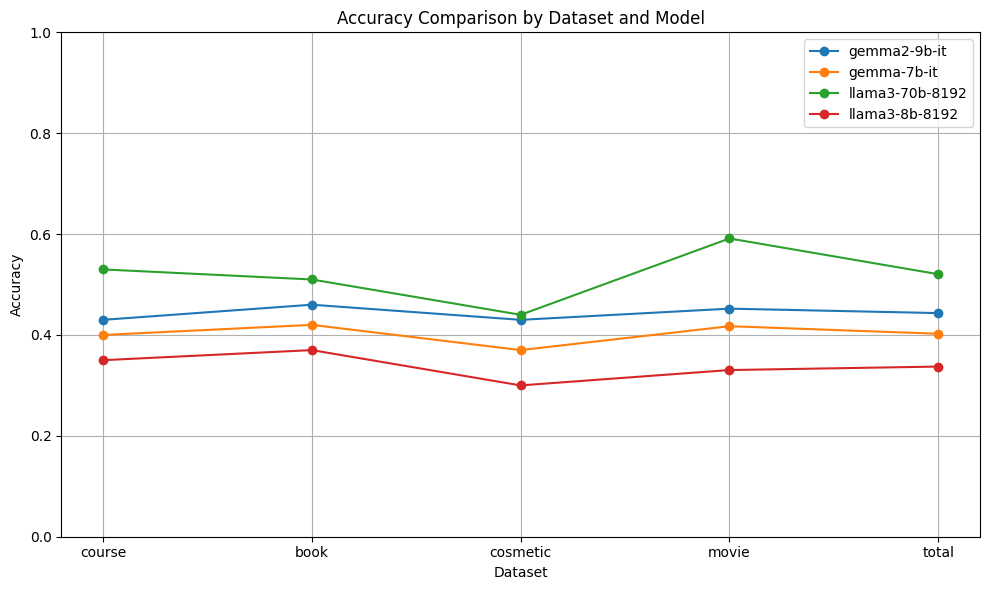

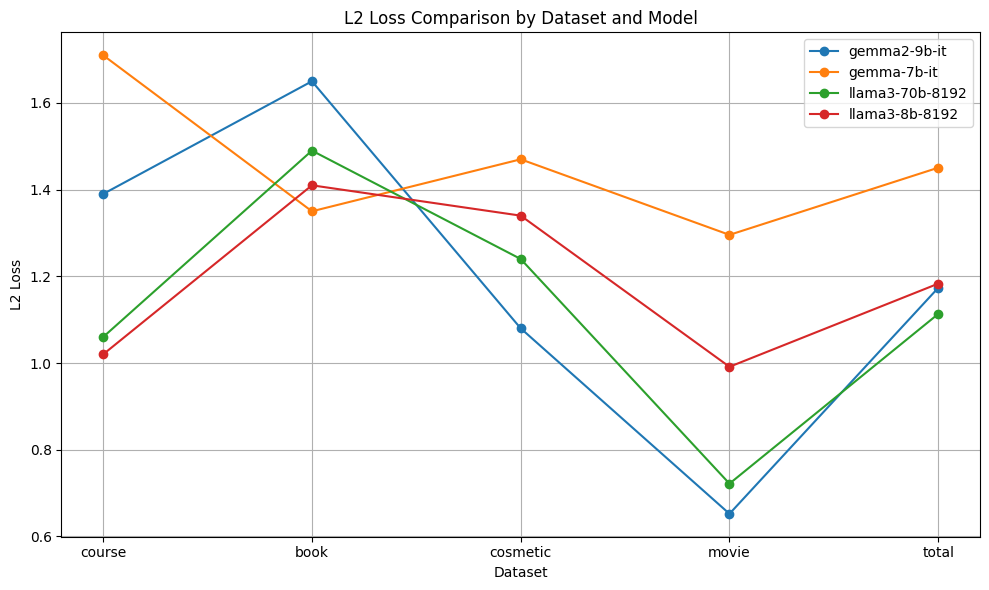

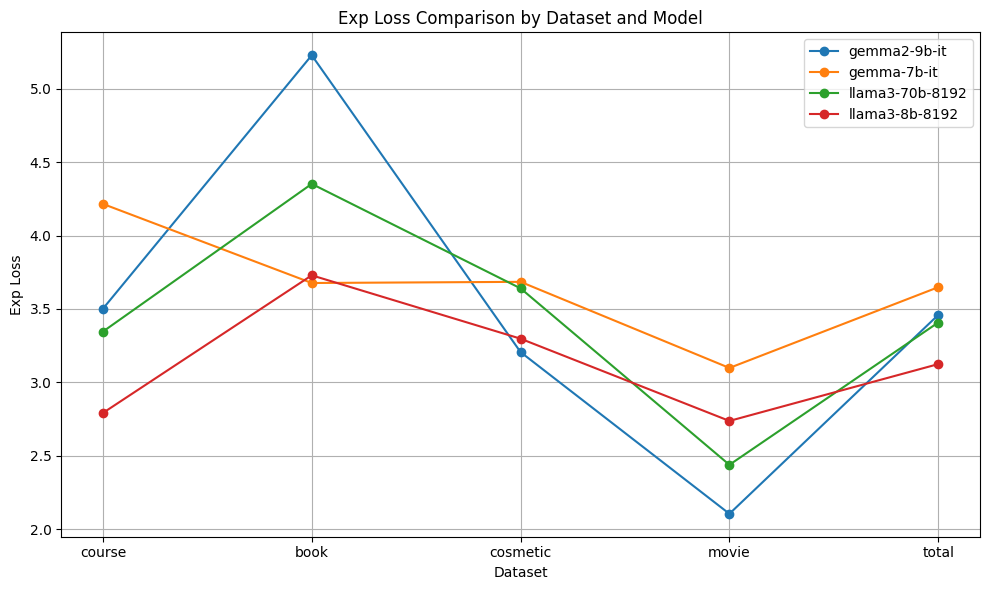

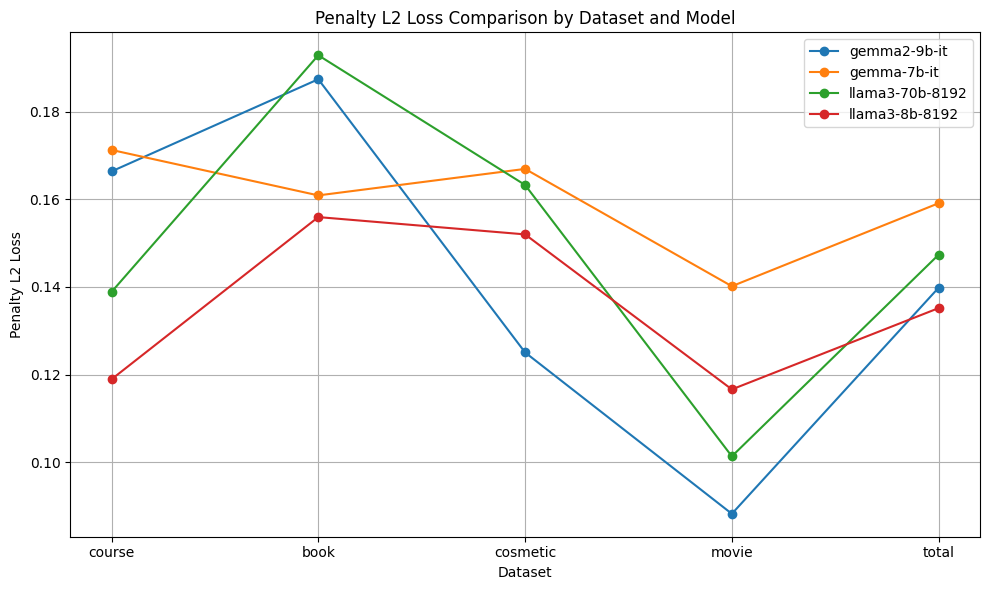

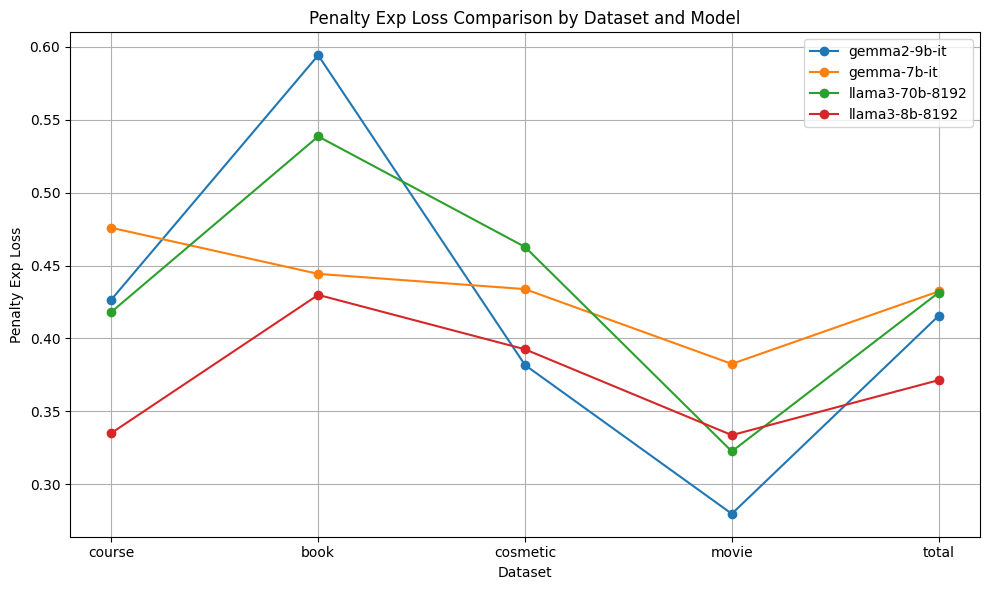

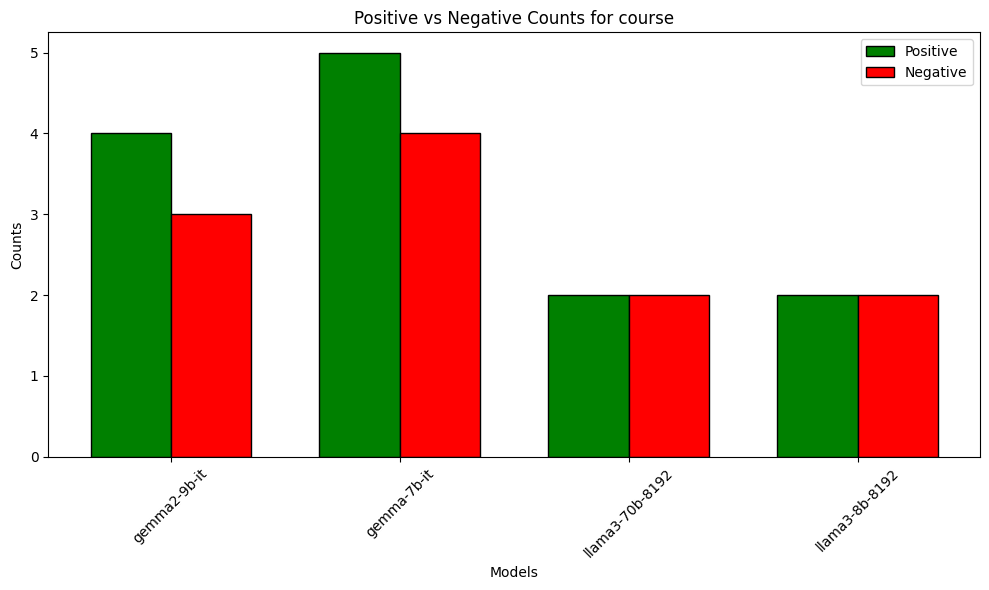

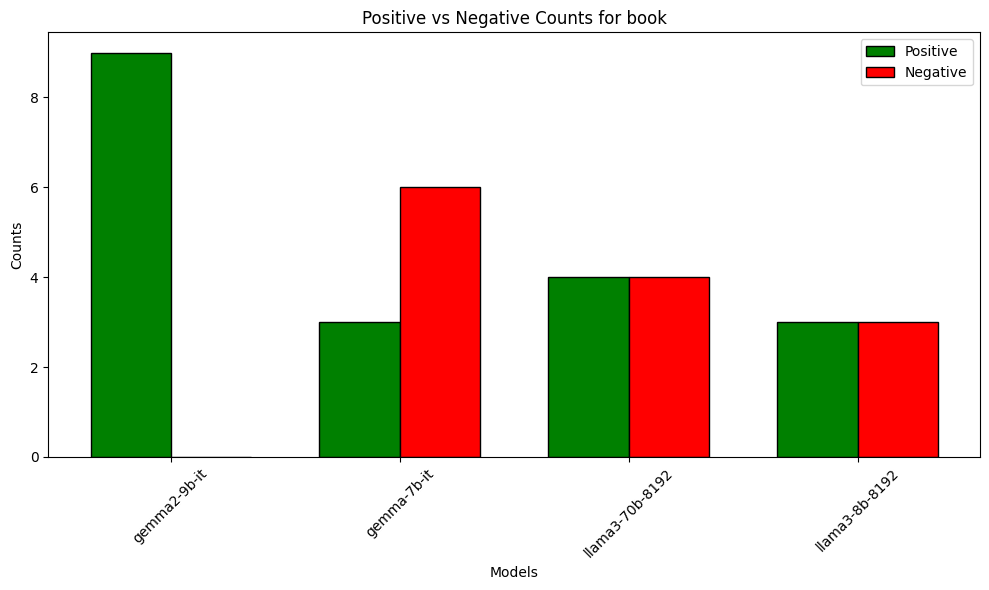

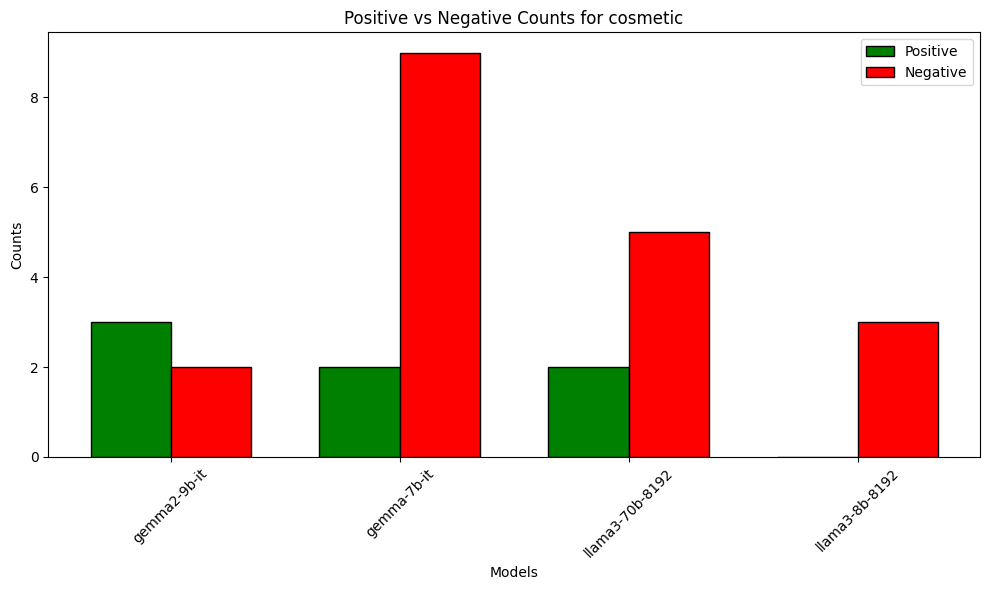

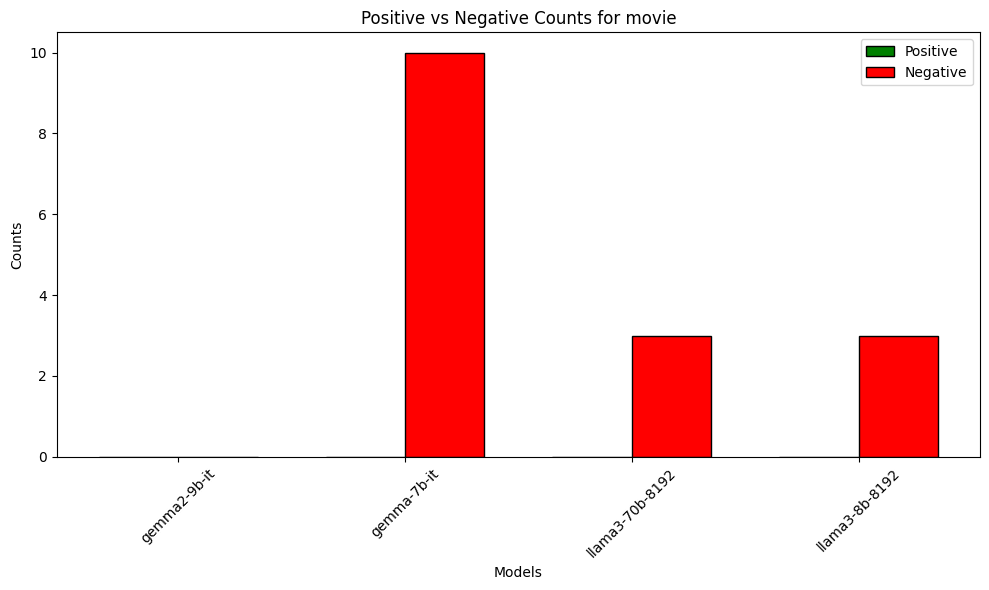

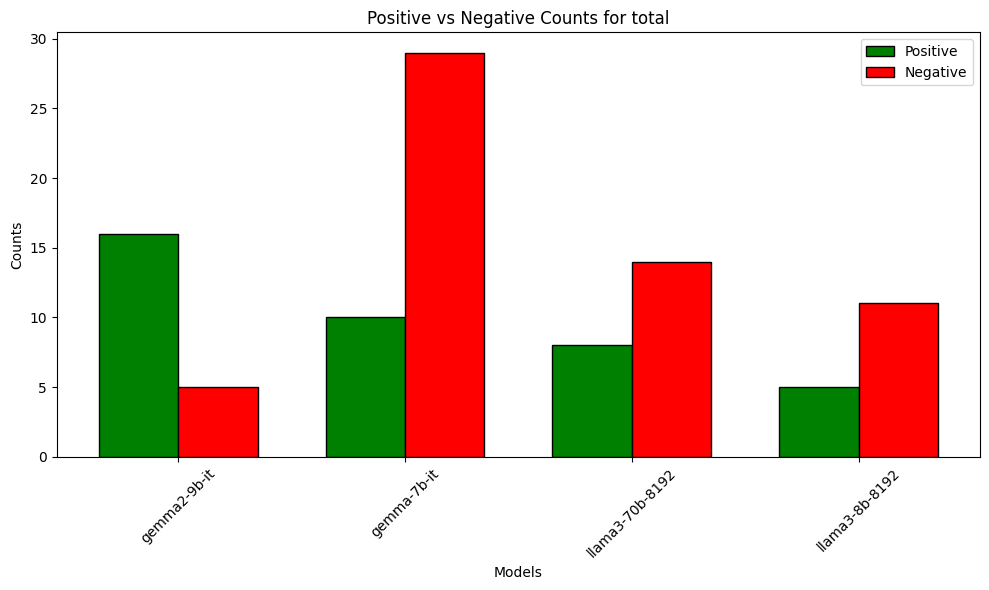

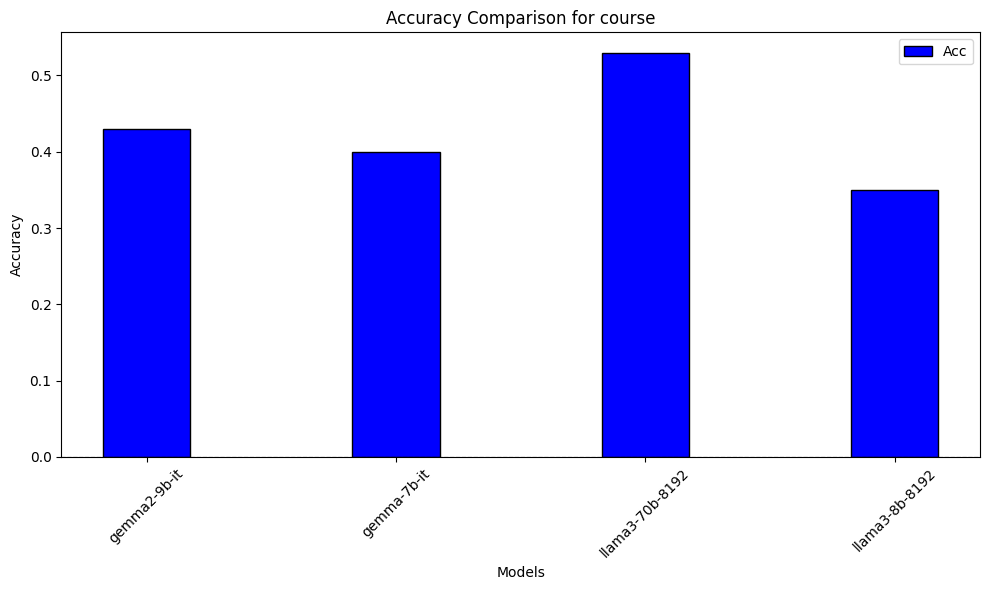

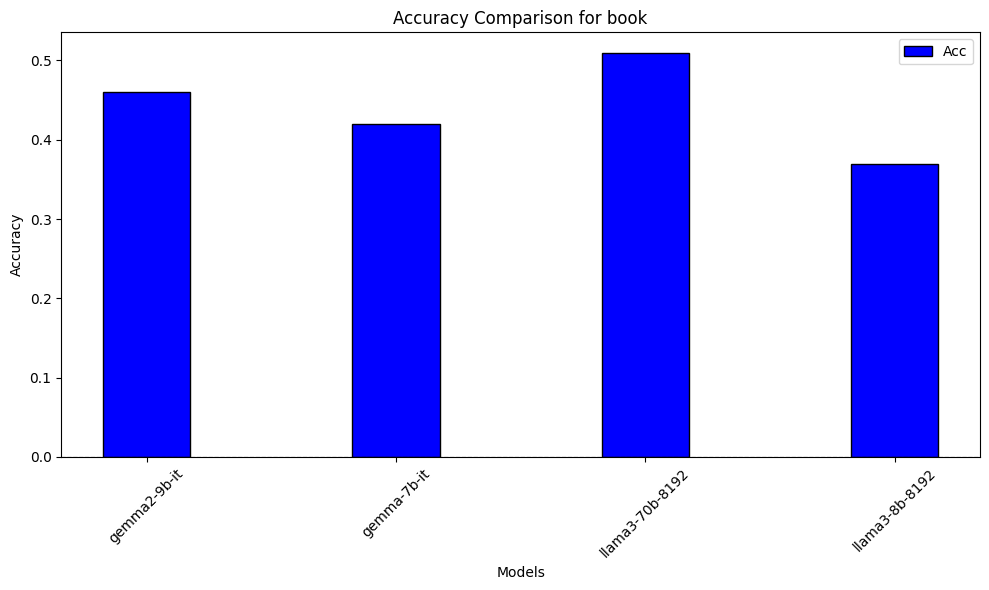

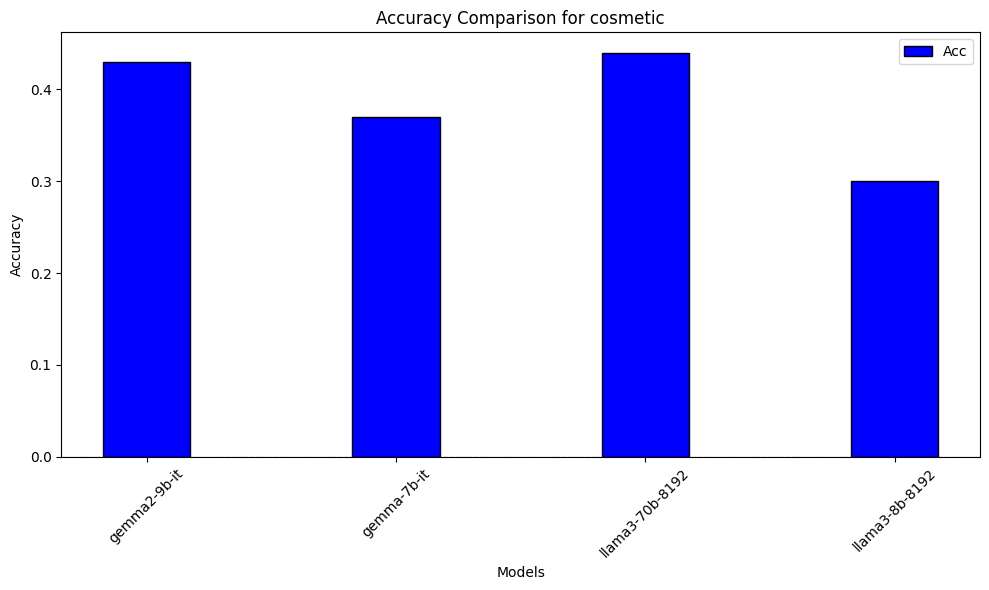

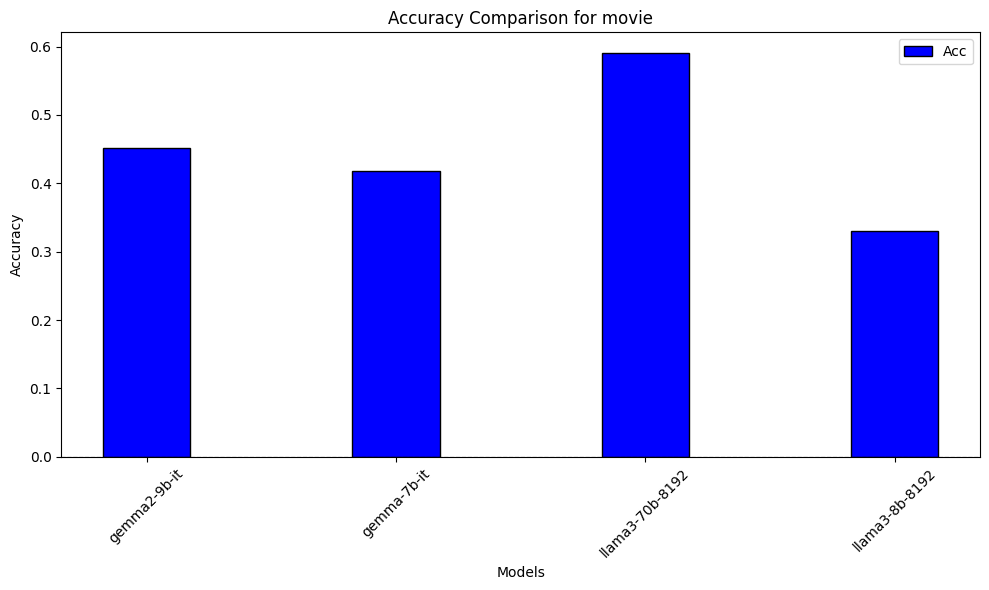

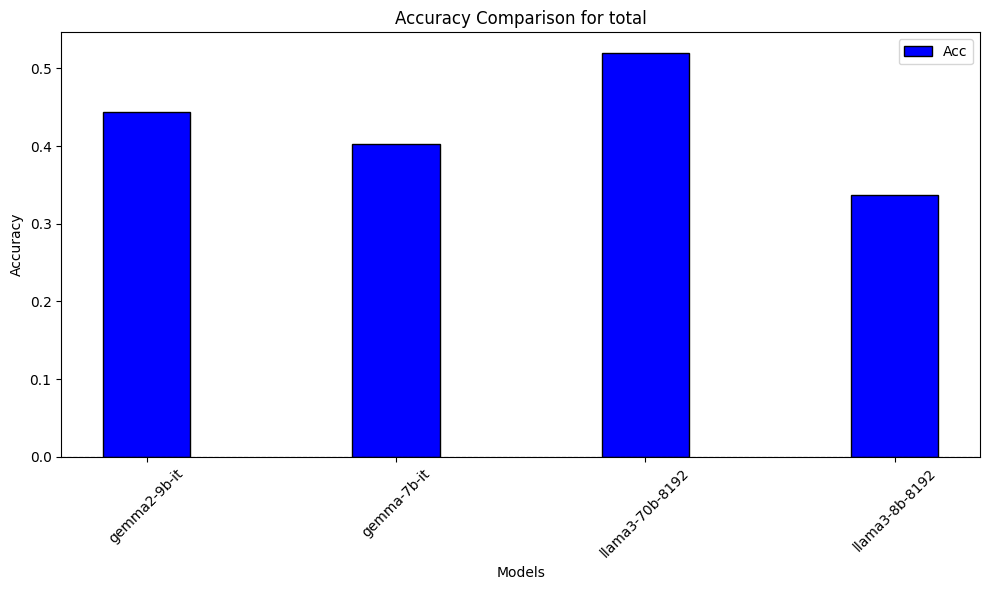

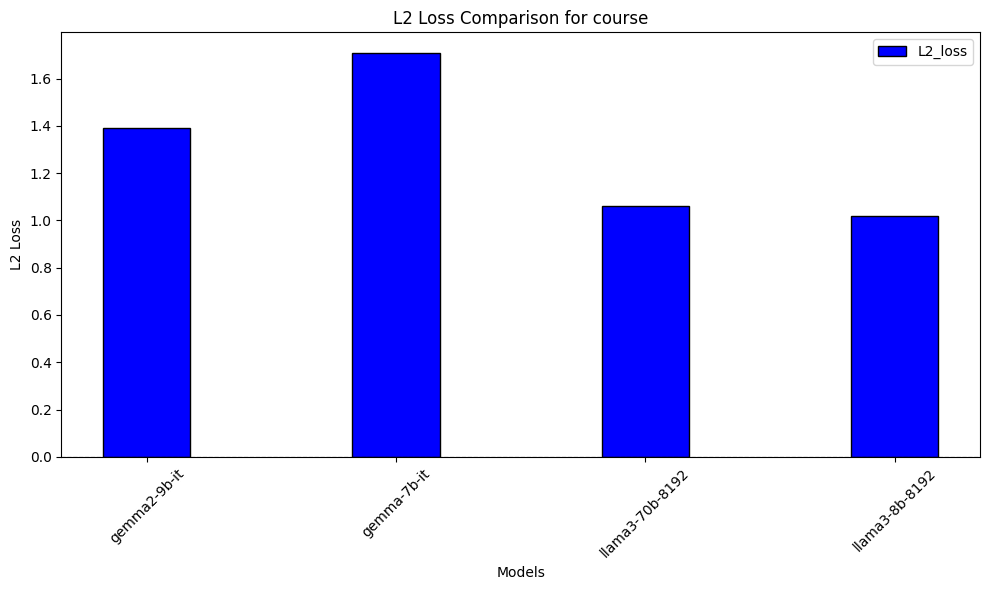

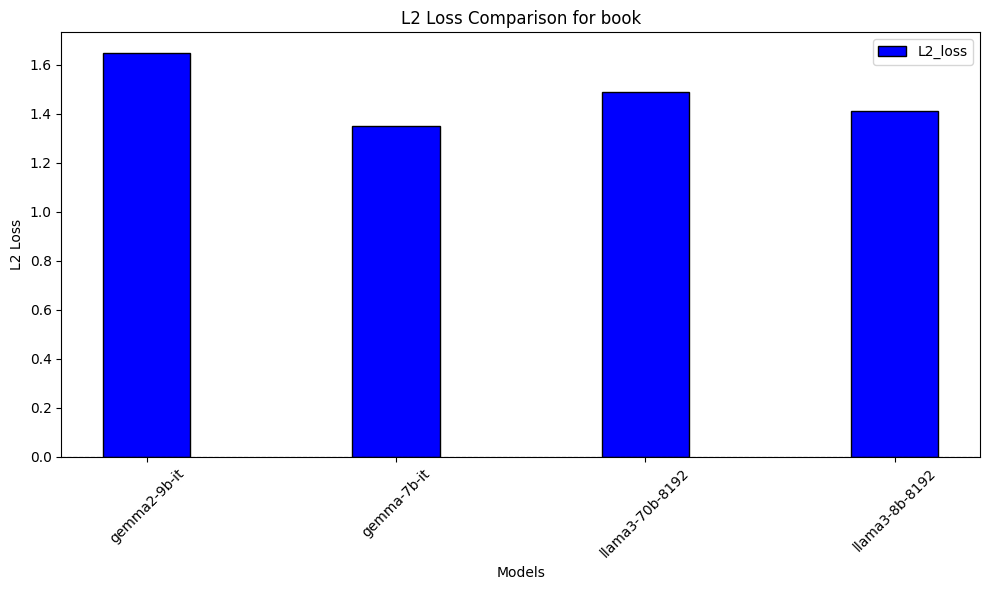

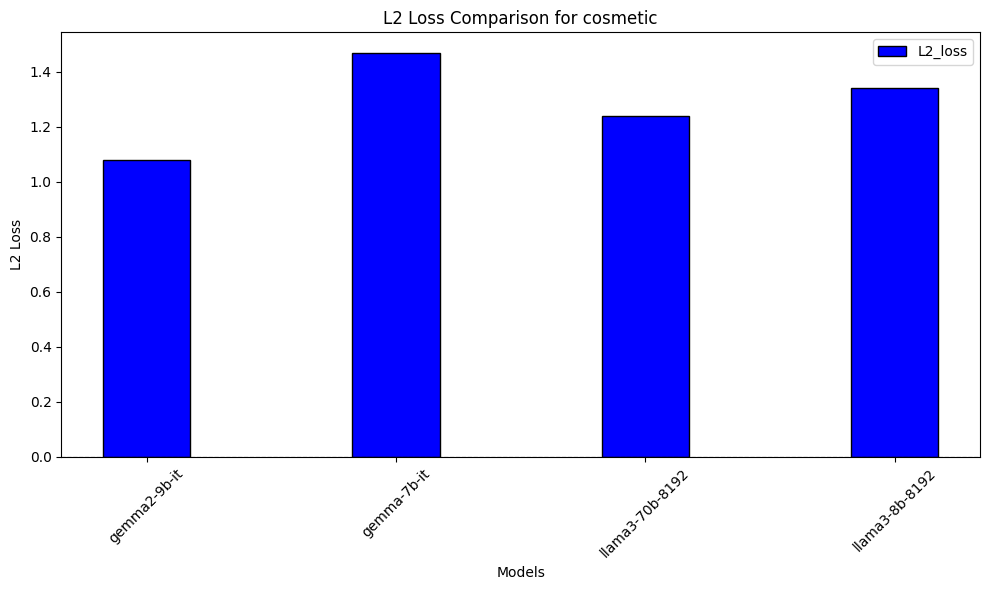

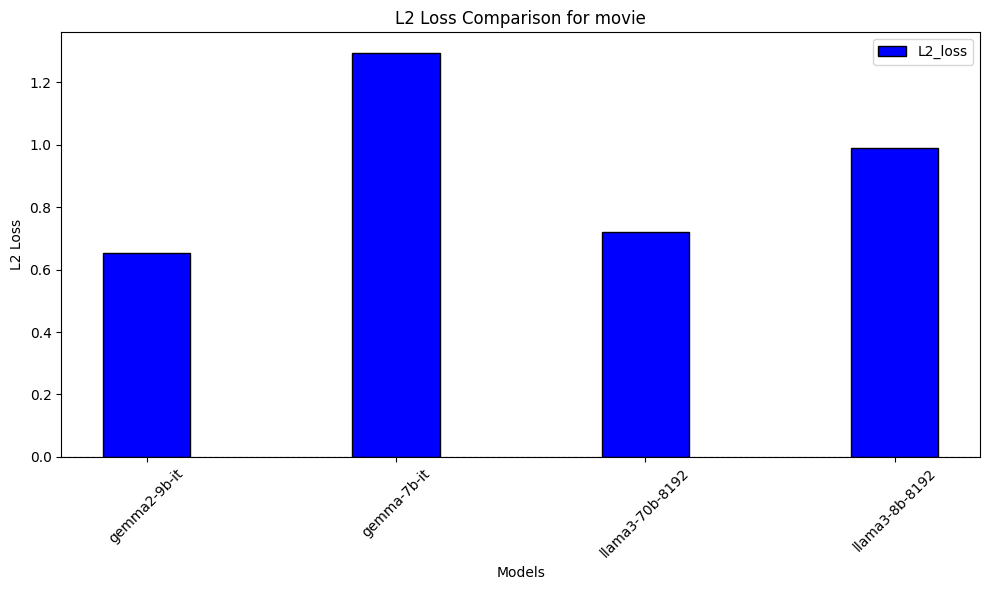

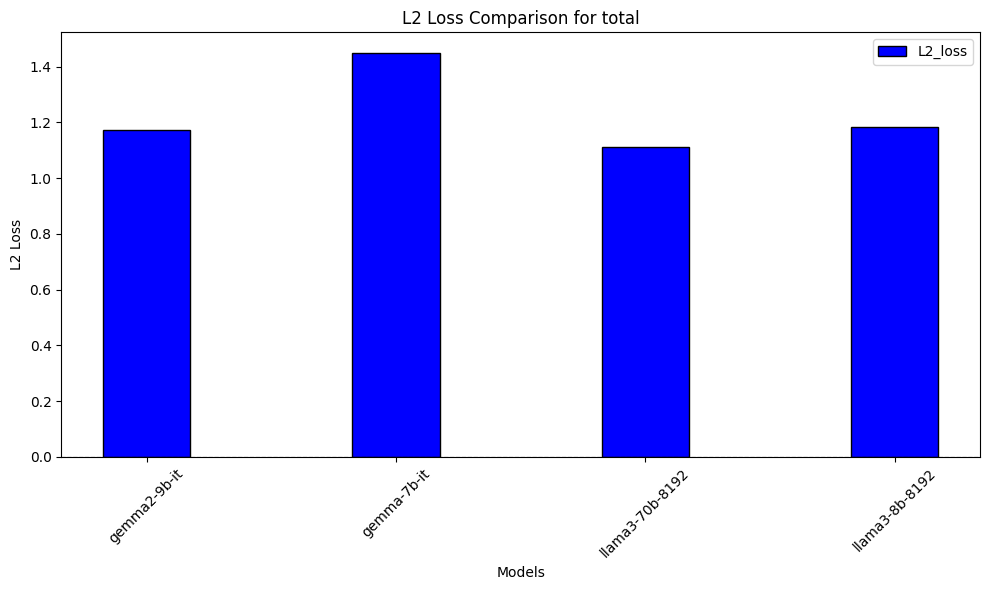

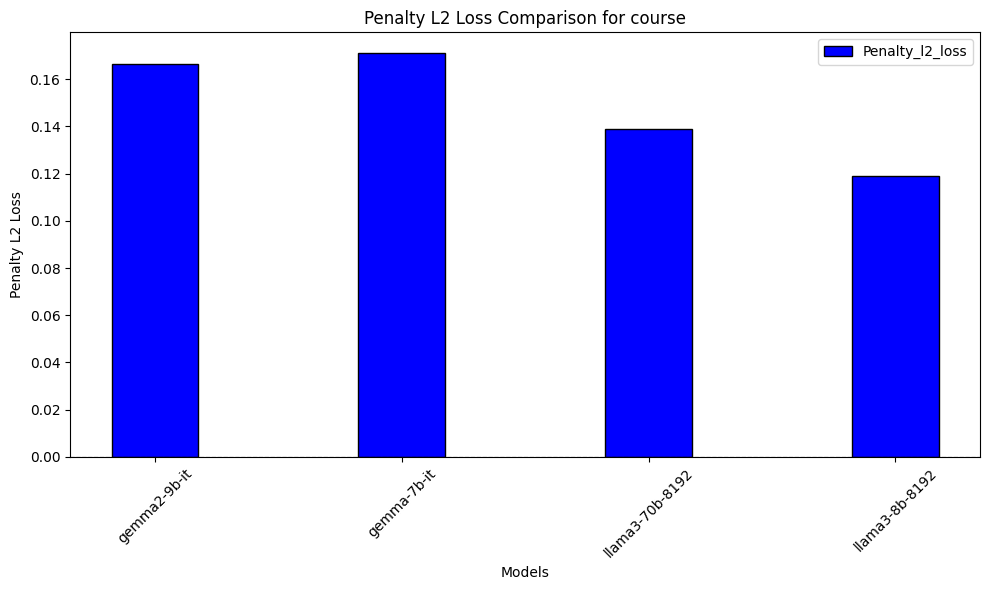

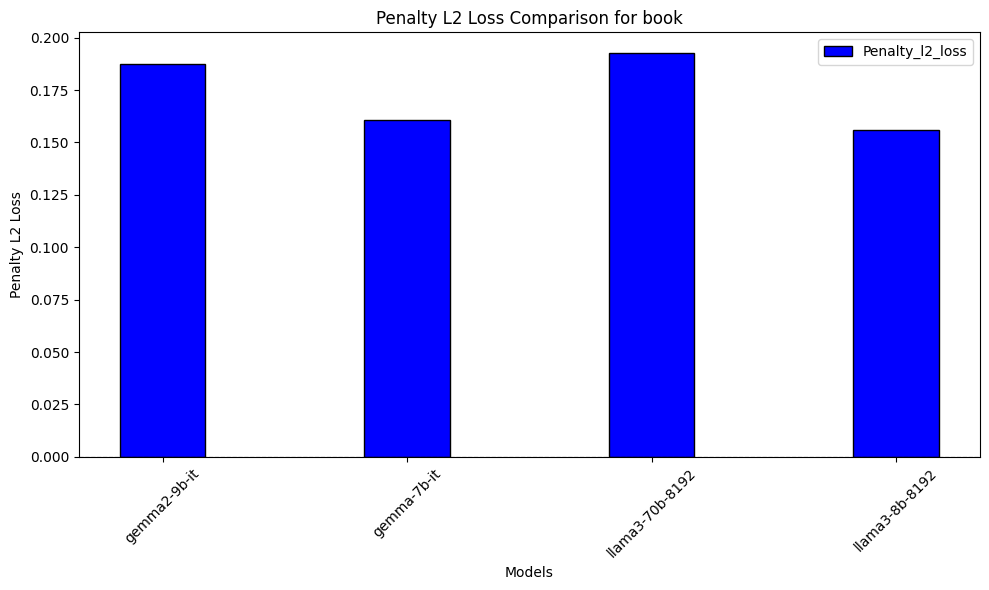

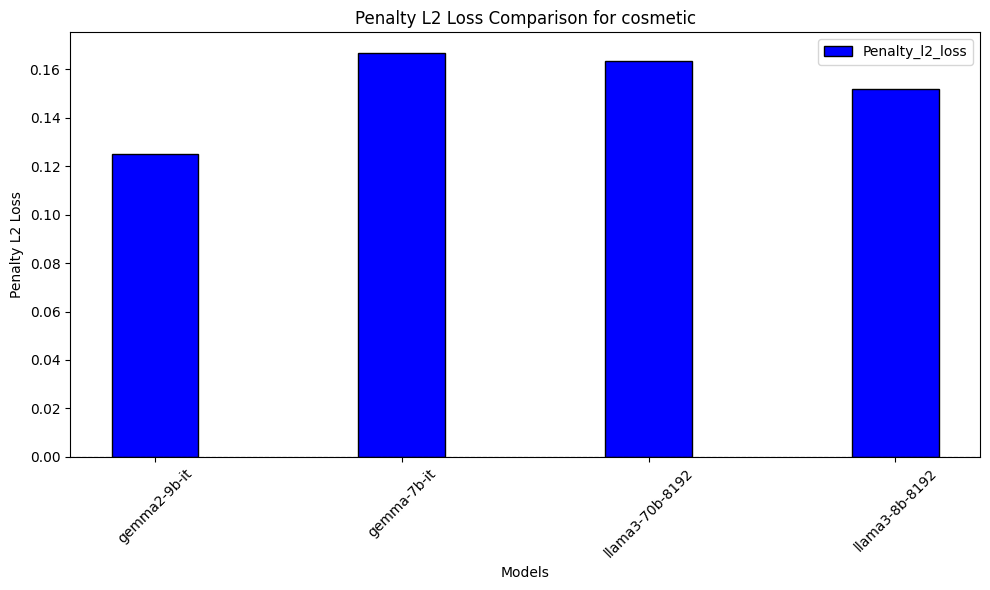

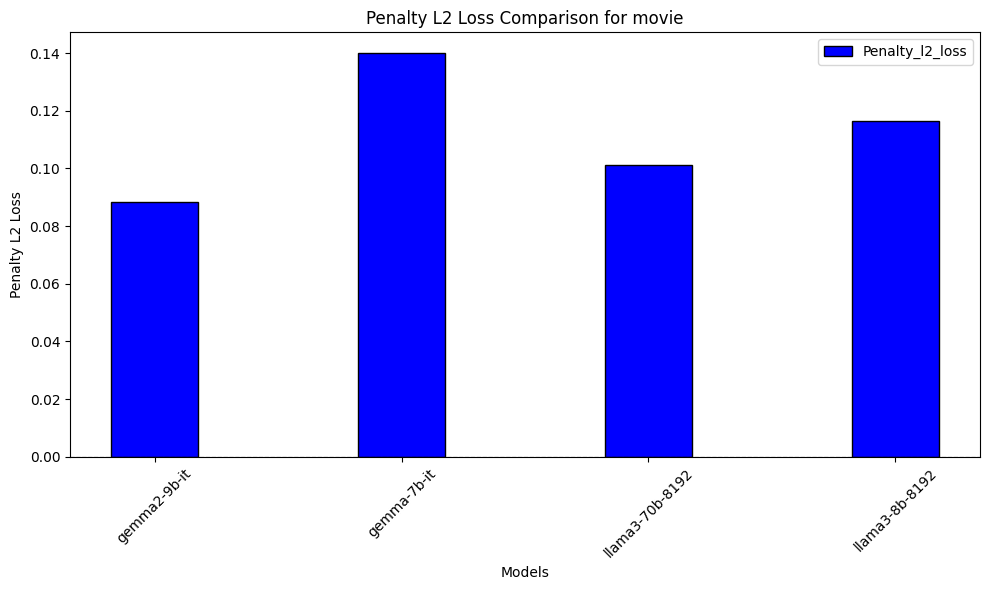

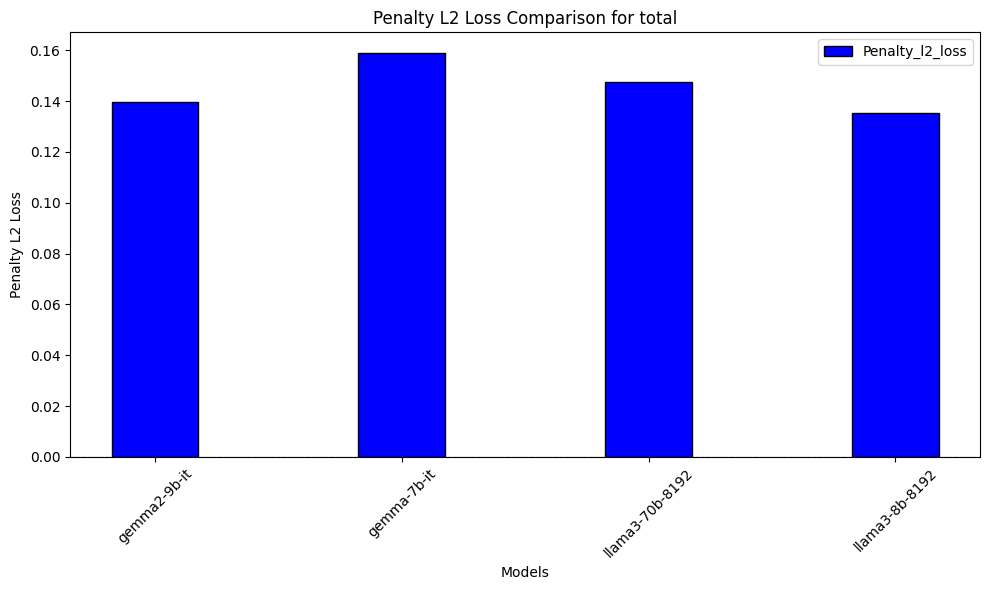

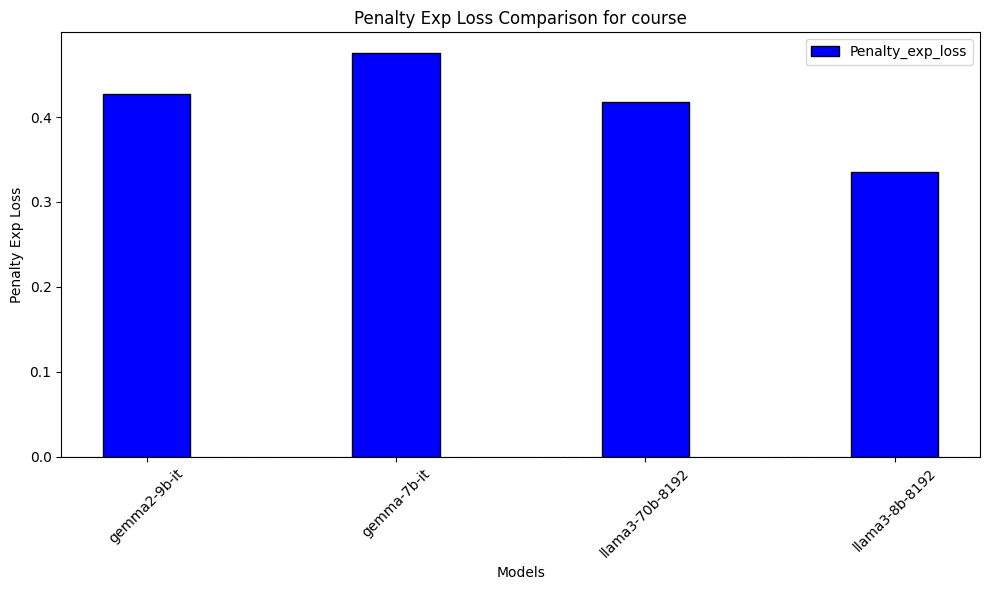

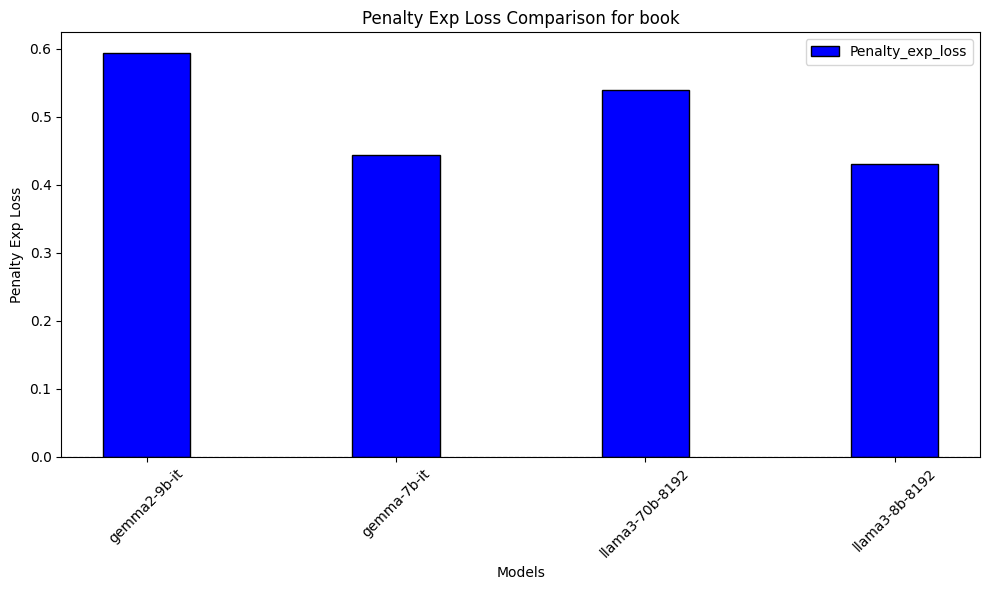

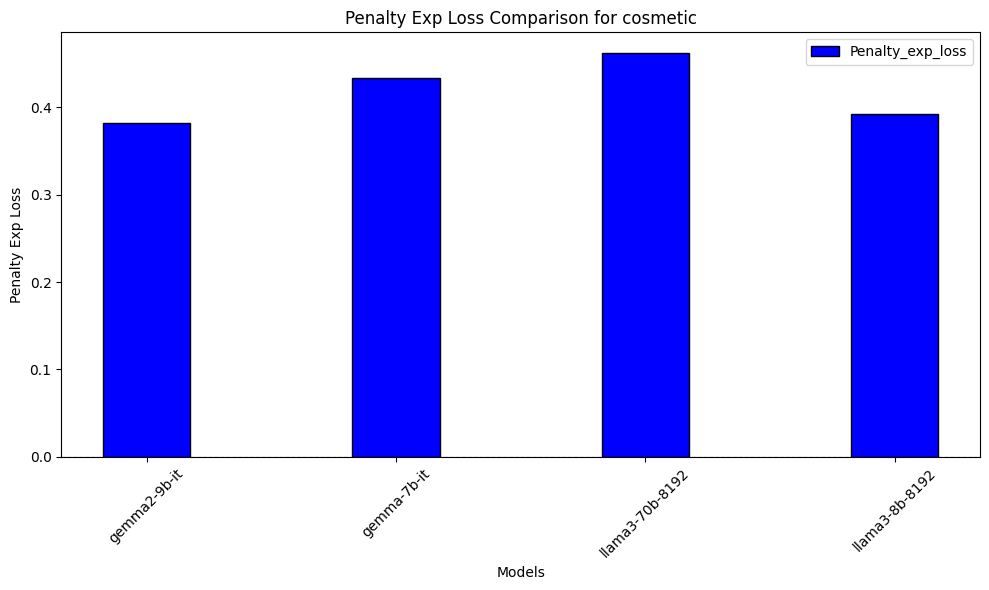

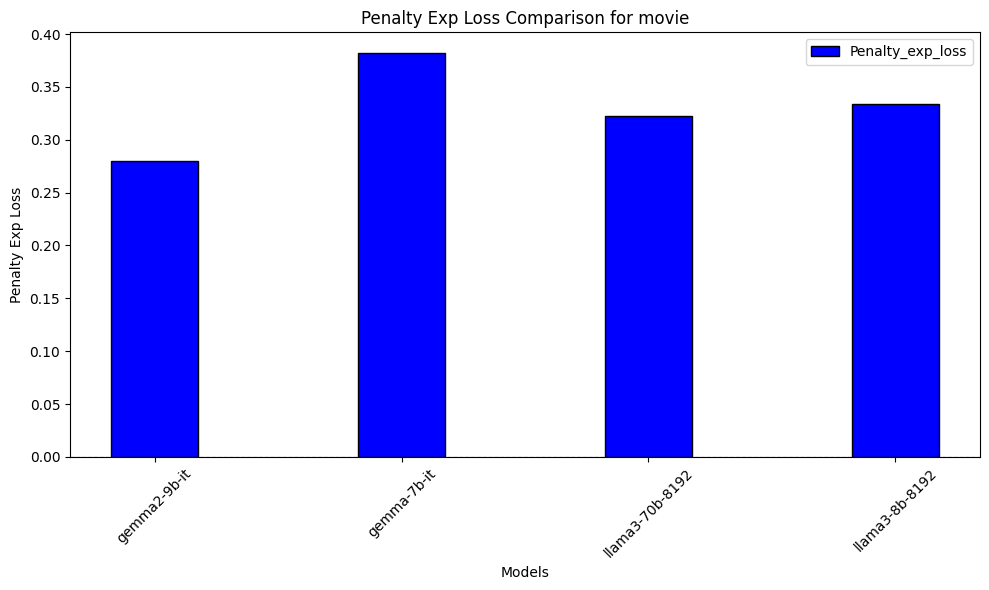

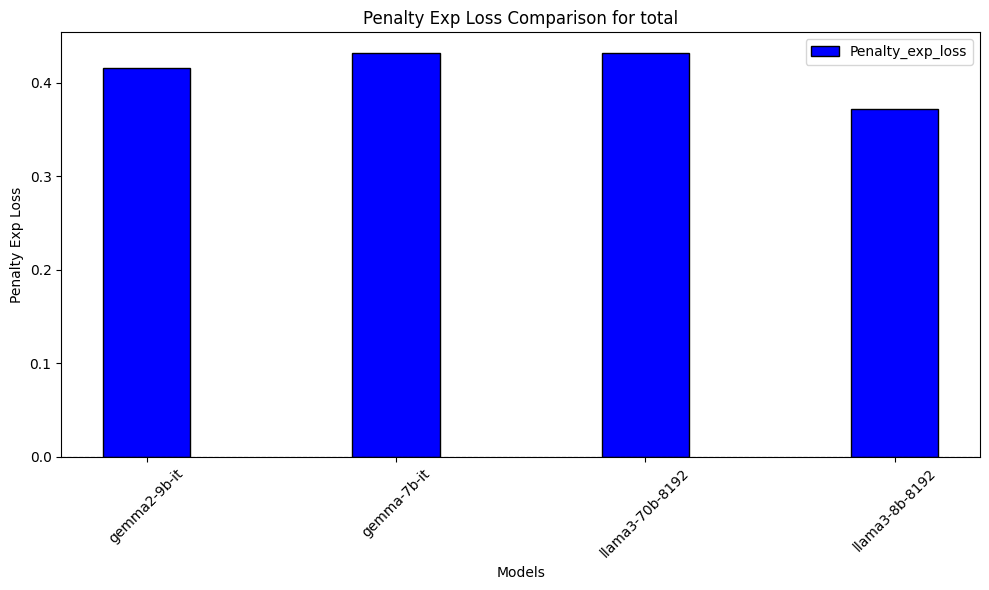

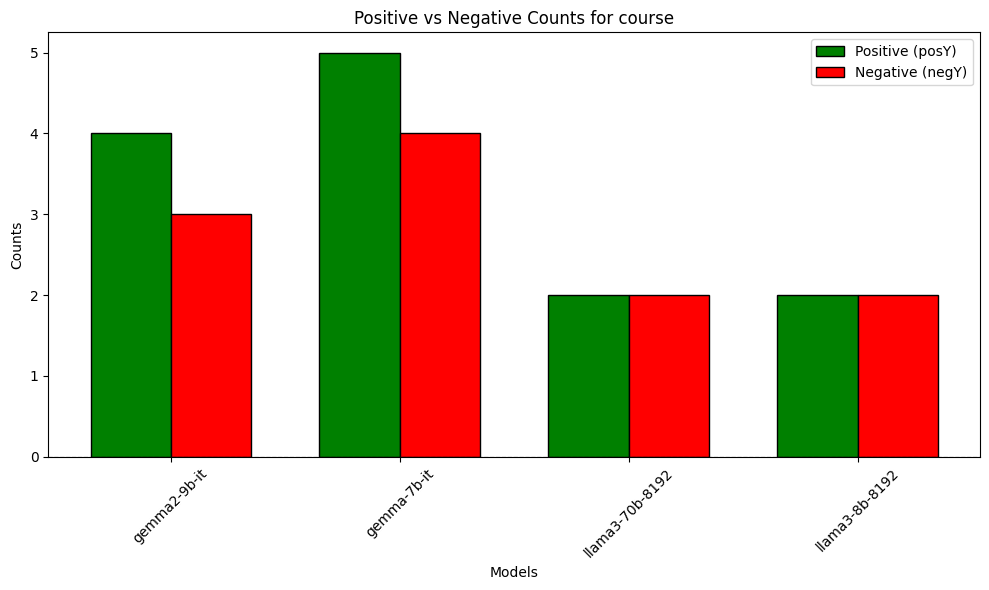

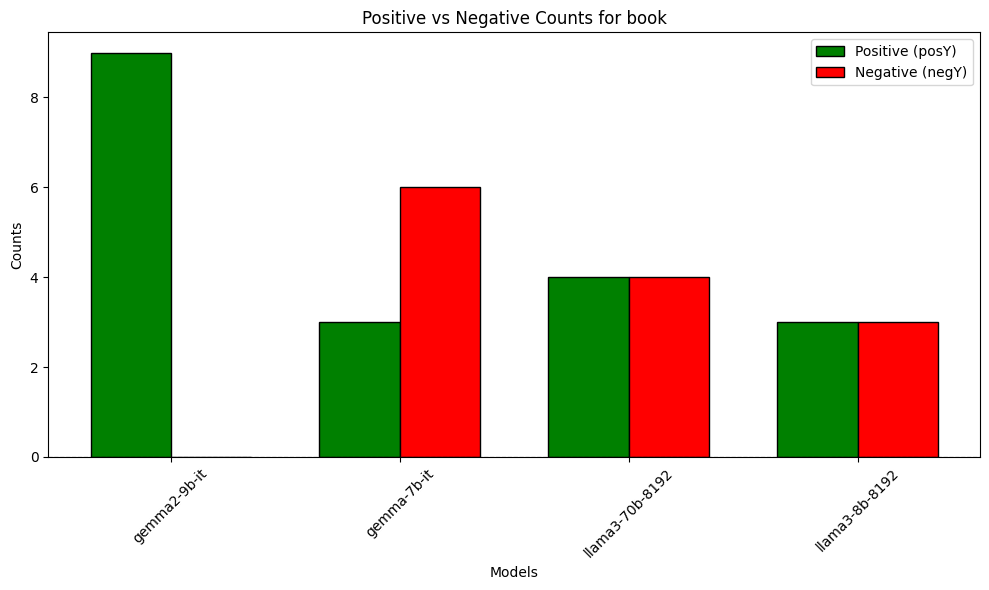

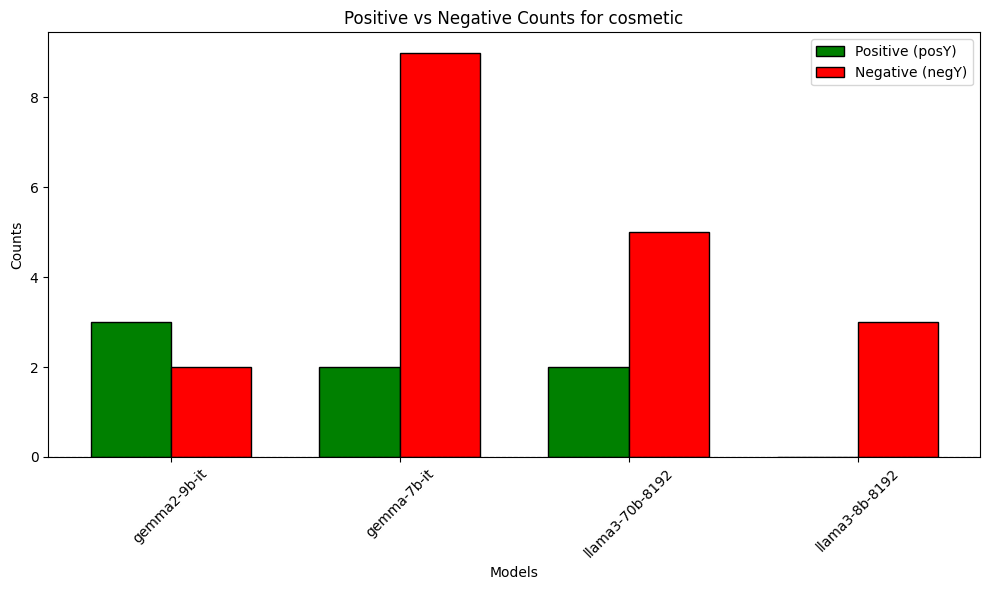

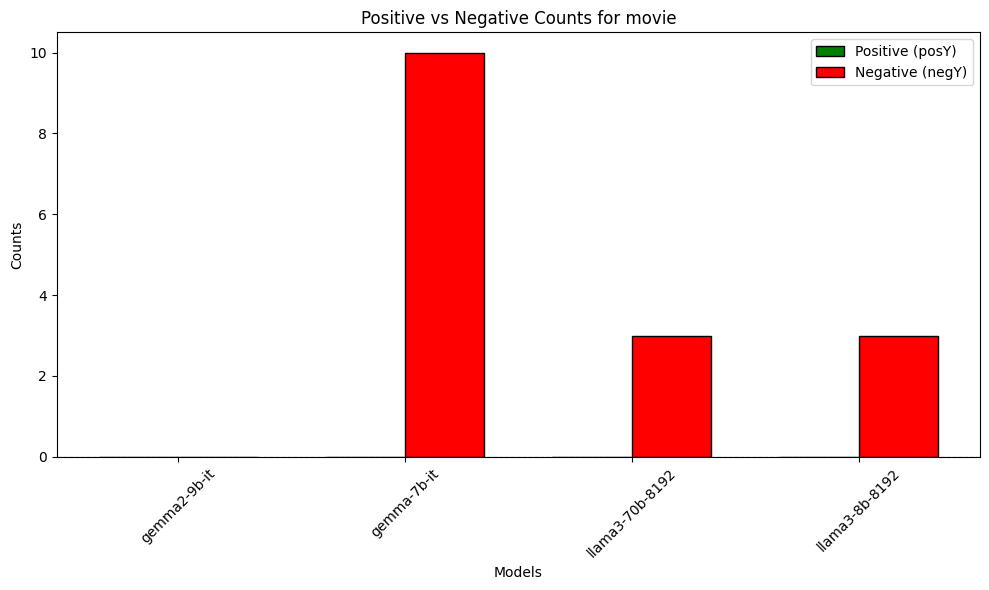

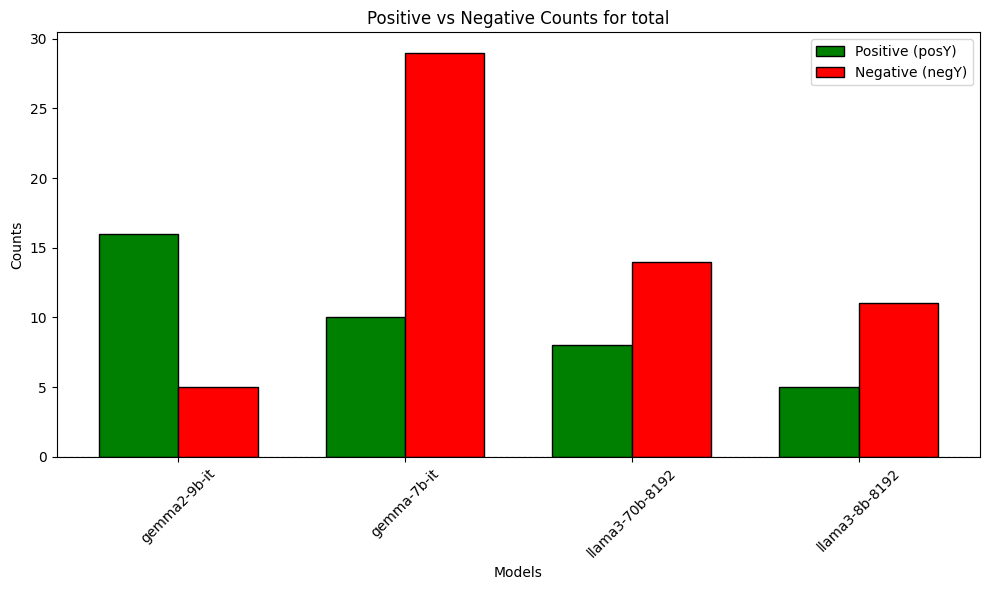

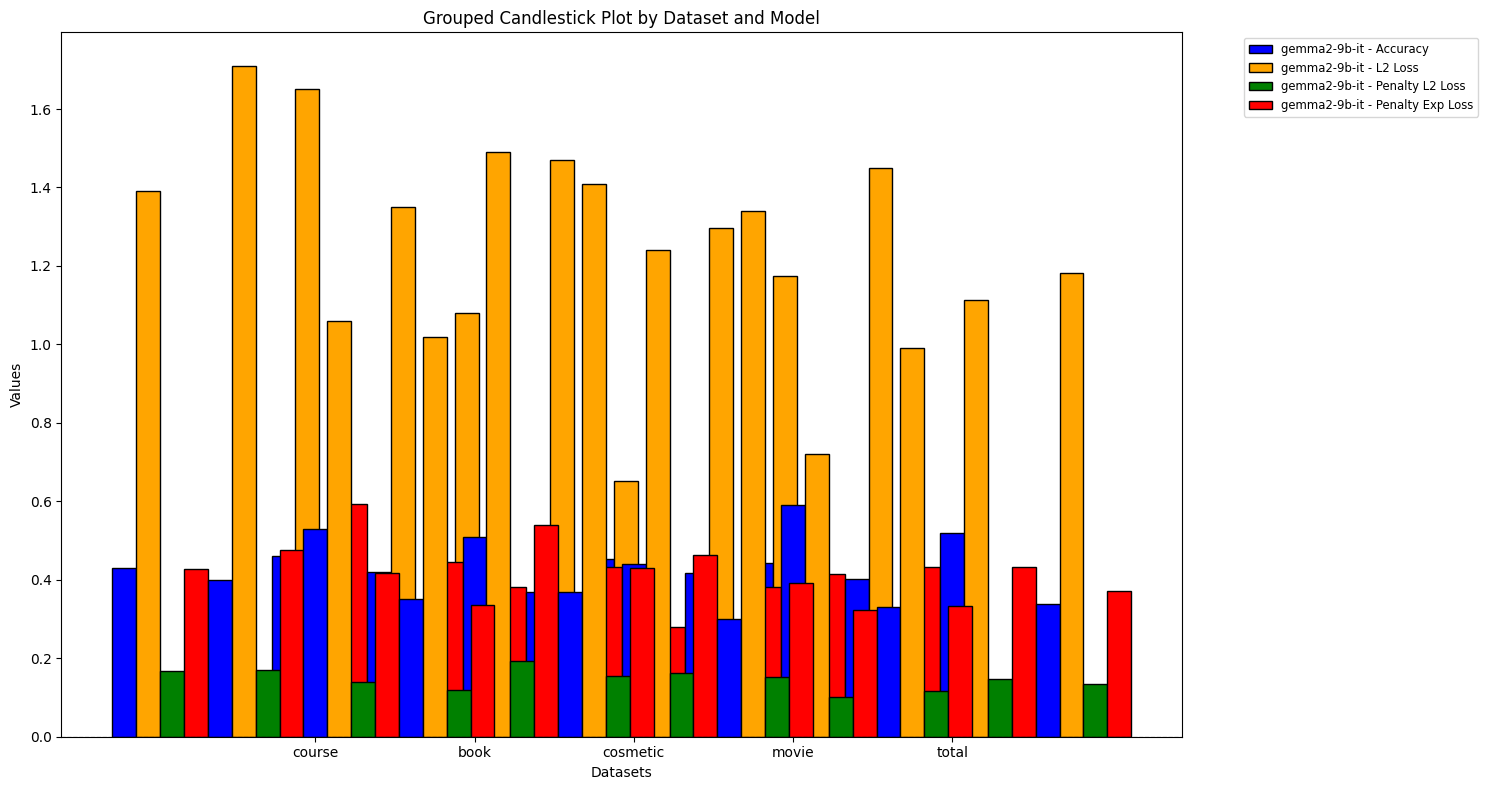

In [146]:
### Í≤∞Í≥ºÌååÏùº Î°úÎìú
import json
import matplotlib.pyplot as plt
import numpy as np

result_json = ""
with open("result.json", "r") as f:
    result_json = f.read()

result = json.loads(result_json)

# Prepare data
datasets = dataName + ["total"] # Extract dataset names excluding "total"
# models = # Extract model names

# Plot 1: Accuracy comparison
plt.figure(figsize=(10, 6))
for model in models:
    acc_values = [result[model][dataset]["acc"] for dataset in datasets]
    plt.plot(datasets, acc_values, marker='o', label=model)

plt.title("Accuracy Comparison by Dataset and Model")
plt.xlabel("Dataset")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot 2: L2 Loss comparison
plt.figure(figsize=(10, 6))
for model in models:
    l2_loss_values = [result[model][dataset]["l2_loss"] for dataset in datasets]
    plt.plot(datasets, l2_loss_values, marker='o', label=model)

plt.title("L2 Loss Comparison by Dataset and Model")
plt.xlabel("Dataset")
plt.ylabel("L2 Loss")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot 3: Exp Loss comparison
plt.figure(figsize=(10, 6))
for model in models:
    exp_loss_values = [result[model][dataset]["exp_loss"] for dataset in datasets]
    plt.plot(datasets, exp_loss_values, marker='o', label=model)

plt.title("Exp Loss Comparison by Dataset and Model")
plt.xlabel("Dataset")
plt.ylabel("Exp Loss")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot 4: Penalty L2 Loss comparison
plt.figure(figsize=(10, 6))
for model in models:
    penalty_l2_loss_values = [result[model][dataset]["penalty_l2_loss"] for dataset in datasets]
    plt.plot(datasets, penalty_l2_loss_values, marker='o', label=model)

plt.title("Penalty L2 Loss Comparison by Dataset and Model")
plt.xlabel("Dataset")
plt.ylabel("Penalty L2 Loss")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot 5: Penalty Exp Loss comparison
plt.figure(figsize=(10, 6))
for model in models:
    penalty_exp_loss_values = [result[model][dataset]["penalty_exp_loss"] for dataset in datasets]
    plt.plot(datasets, penalty_exp_loss_values, marker='o', label=model)

plt.title("Penalty Exp Loss Comparison by Dataset and Model")
plt.xlabel("Dataset")
plt.ylabel("Penalty Exp Loss")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

for dataset in datasets:
    plt.figure(figsize=(10, 6))
    
    x = np.arange(len(models))  # x-axis positions for models
    bar_width = 0.35  # Width of each bar
    
    posY = [result[model][dataset]["posY"] for model in models]
    negY = [result[model][dataset]["negY"] for model in models]
    
    # Plot posY and negY as side-by-side bars
    plt.bar(x - bar_width / 2, posY, width=bar_width, color='green', edgecolor='black', label='Positive')
    plt.bar(x + bar_width / 2, negY, width=bar_width, color='red', edgecolor='black', label='Negative')
    
    # Formatting and labels
    plt.xticks(x, models, rotation=45)  # Model names as x-axis labels
    plt.title(f"Positive vs Negative Counts for {dataset}")
    plt.ylabel("Counts")
    plt.xlabel("Models")
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    
def plot_candlestick(metric_key, ylabel, title):
    for dataset in datasets:
        plt.figure(figsize=(10, 6))
        x = np.arange(len(models))  # x-axis positions for models
        
        # Extract metric values for each model
        values = [result[model][dataset][metric_key] for model in models]
        
        # Plot as grouped bars
        plt.bar(x, values, color='blue', edgecolor='black', width=bar_width, label=metric_key.capitalize())
        
        # Formatting
        plt.xticks(x, models, rotation=45)
        plt.title(f"{title} for {dataset}")
        plt.ylabel(ylabel)
        plt.xlabel("Models")
        plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Zero reference line for context
        plt.legend()
        plt.tight_layout()
        plt.show()

def plot_candlestick_pos_neg():
    for dataset in datasets:
        plt.figure(figsize=(10, 6))
        x = np.arange(len(models))
        
        posY = [result[model][dataset]["posY"] for model in models]
        negY = [result[model][dataset]["negY"] for model in models]
        
        # Plot posY and negY as grouped bars
        plt.bar(x - bar_width / 2, posY, color='green', edgecolor='black', width=bar_width, label='Positive (posY)')
        plt.bar(x + bar_width / 2, negY, color='red', edgecolor='black', width=bar_width, label='Negative (negY)')
        
        # Formatting
        plt.xticks(x, models, rotation=45)
        plt.title(f"Positive vs Negative Counts for {dataset}")
        plt.ylabel("Counts")
        plt.xlabel("Models")
        plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Zero reference line
        plt.legend()
        plt.tight_layout()
        plt.show()

# Plot for accuracy
plot_candlestick("acc", "Accuracy", "Accuracy Comparison")

# Plot for L2 loss
plot_candlestick("l2_loss", "L2 Loss", "L2 Loss Comparison")

# Plot for penalty L2 loss
plot_candlestick("penalty_l2_loss", "Penalty L2 Loss", "Penalty L2 Loss Comparison")

# Plot for penalty exponential loss
plot_candlestick("penalty_exp_loss", "Penalty Exp Loss", "Penalty Exp Loss Comparison")

# Plot for positive (posY) and negative (negY) counts
plot_candlestick_pos_neg()

# Define metrics to plot
metrics = ["acc", "l2_loss", "penalty_l2_loss", "penalty_exp_loss"]

# Define labels for the metrics
metric_labels = {
    "acc": "Accuracy",
    "l2_loss": "L2 Loss",
    "penalty_l2_loss": "Penalty L2 Loss",
    "penalty_exp_loss": "Penalty Exp Loss",
}

# Define colors for the candlesticks
colors = ['blue', 'orange', 'green', 'red']

# Plot all metrics in one grouped candlestick plot
plt.figure(figsize=(15, 8))

x = np.arange(len(datasets))  # Positions for datasets
bar_width = 0.15  # Width of each bar
bar_offsets = np.arange(-len(metrics)/2, len(metrics)/2) * bar_width  # Offsets for each metric

# Loop through each model and create grouped bars
for i, model in enumerate(models):
    for j, metric in enumerate(metrics):
        metric_values = [result[model][dataset][metric] for dataset in datasets]
        plt.bar(
            x + bar_offsets[j] + (i * bar_width * len(metrics)), 
            metric_values, 
            width=bar_width, 
            color=colors[j % len(colors)], 
            edgecolor='black', 
            label=f"{model} - {metric_labels[metric]}" if i == 0 else None
        )

# Formatting
plt.xticks(x + bar_width * len(metrics) * (len(models) / 2 - 0.5), datasets)
plt.xlabel("Datasets")
plt.ylabel("Values")
plt.title("Grouped Candlestick Plot by Dataset and Model")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Zero reference line
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=1)
plt.tight_layout()
plt.show()

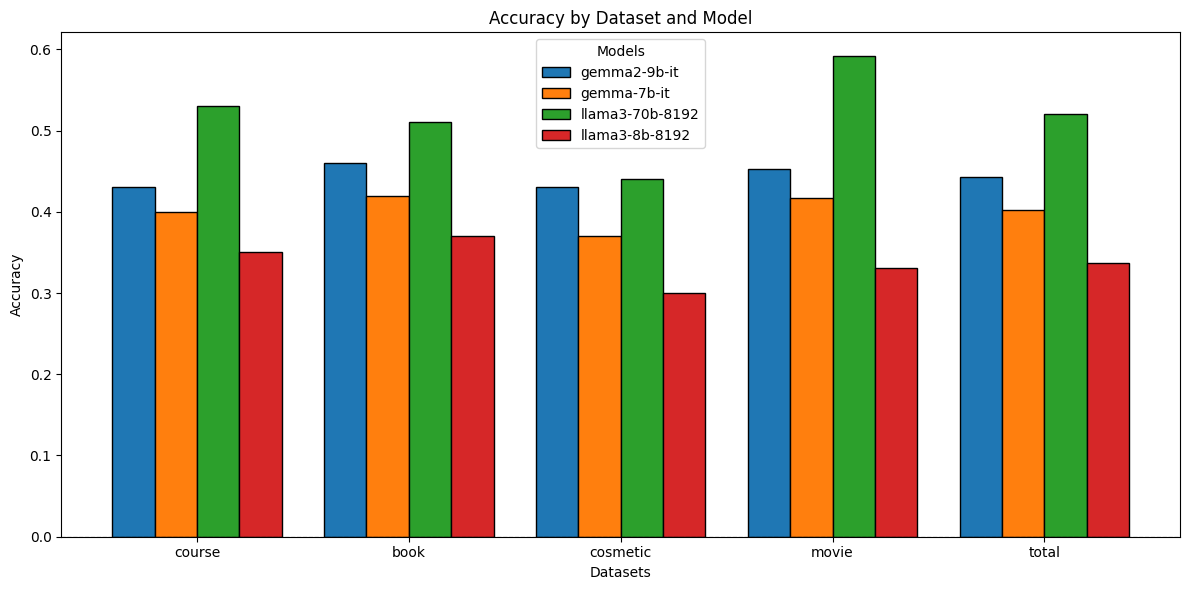

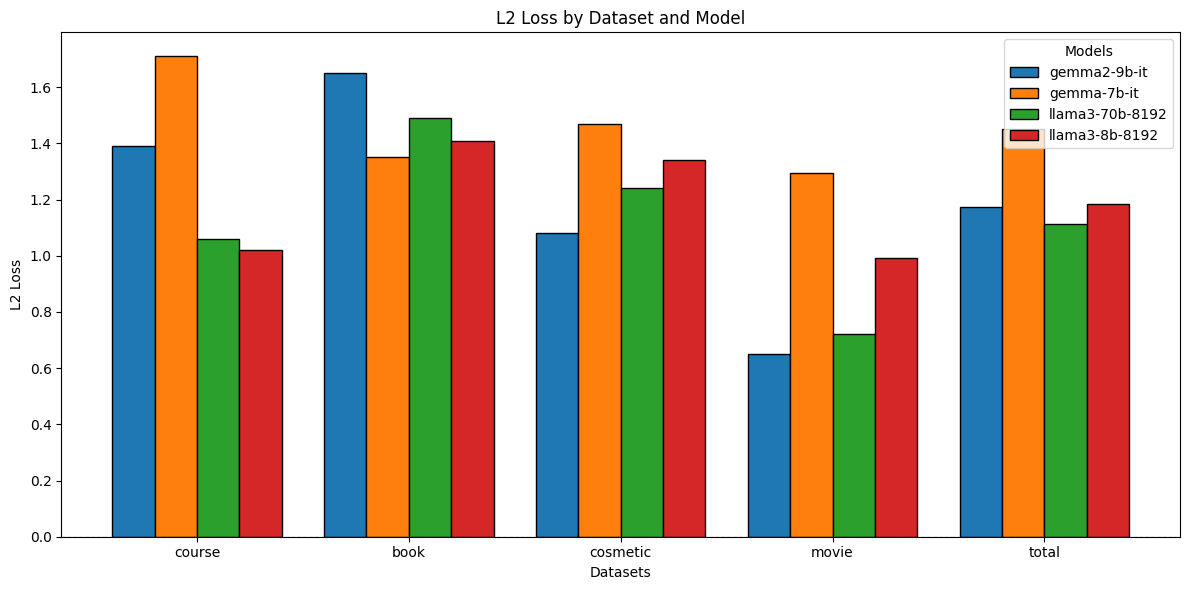

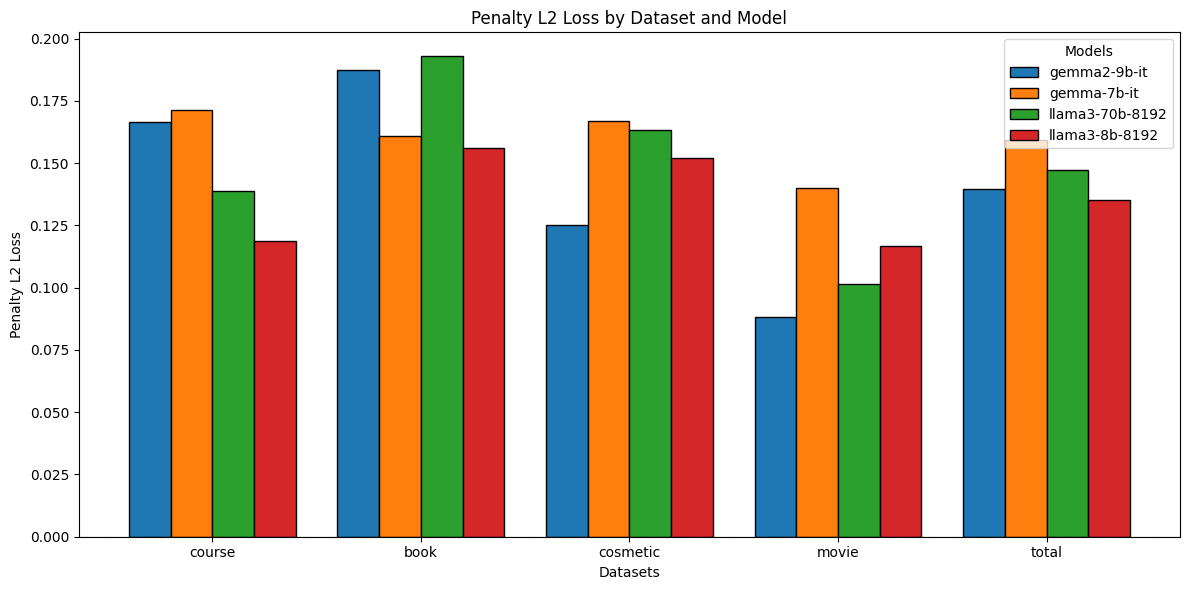

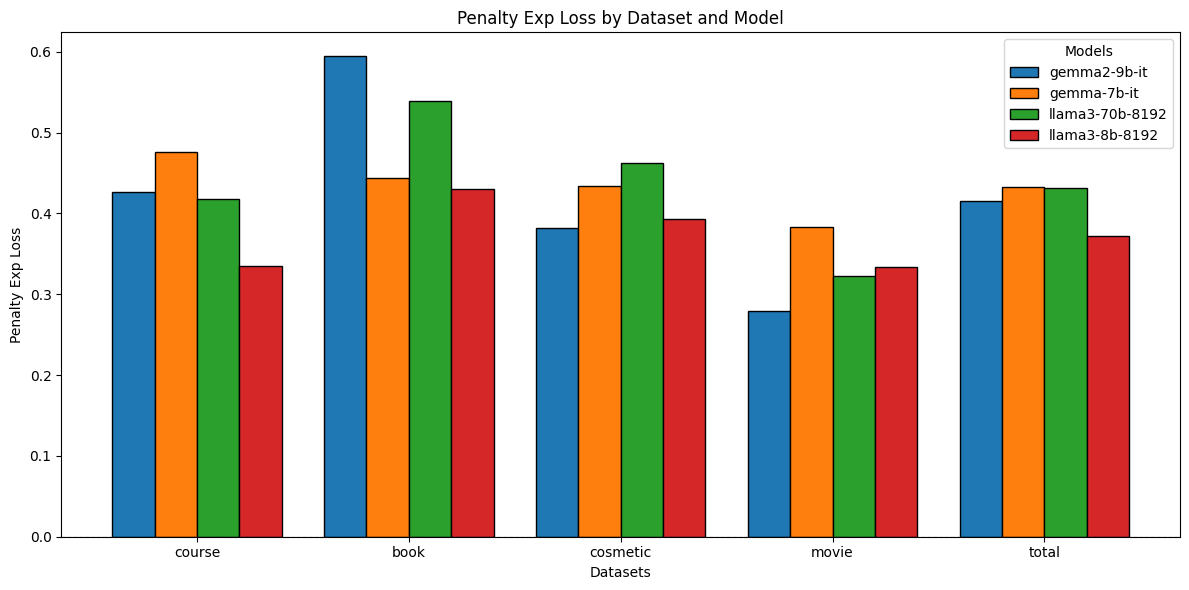

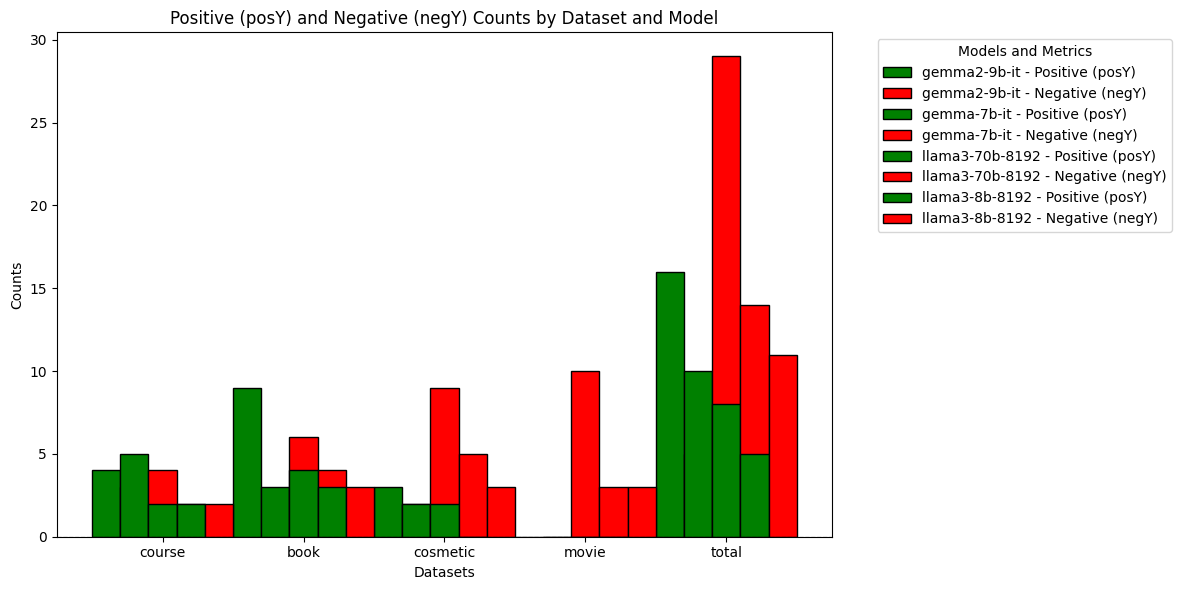

In [147]:
import matplotlib.pyplot as plt
import numpy as np

result_json = ""
with open("result.json", "r") as f:
    result_json = f.read()

result = json.loads(result_json)

# Prepare data
datasets = dataName + ["total"] # Extract dataset names excluding "total"
# models = # Extract model names

# Define metrics to plot
metrics = ["acc", "l2_loss", "penalty_l2_loss", "penalty_exp_loss"]
metric_labels = {
    "acc": "Accuracy",
    "l2_loss": "L2 Loss",
    "penalty_l2_loss": "Penalty L2 Loss",
    "penalty_exp_loss": "Penalty Exp Loss",
}

# Plot each metric
for metric in metrics:
    plt.figure(figsize=(12, 6))
    x = np.arange(len(datasets))  # Positions for dataset groups
    bar_width = 0.2  # Width of each bar

    for i, model in enumerate(models):
        # Extract metric values for each dataset
        values = [result[model][dataset][metric] for dataset in datasets]

        # Plot bars for the current model
        plt.bar(
            x + i * bar_width, 
            values, 
            width=bar_width, 
            label=model, 
            edgecolor='black'
        )
    
    # Formatting
    plt.xticks(x + bar_width * (len(models) - 1) / 2, datasets)  # Center the tick labels
    plt.title(f"{metric_labels[metric]} by Dataset and Model")
    plt.xlabel("Datasets")
    plt.ylabel(metric_labels[metric])
    plt.legend(title="Models")
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Zero reference line
    plt.tight_layout()
    plt.show()

# Special handling for posY and negY
plt.figure(figsize=(12, 6))
x = np.arange(len(datasets))  # Positions for dataset groups

for i, model in enumerate(models):
    # Extract posY and negY values
    posY = [result[model][dataset]["posY"] for dataset in datasets]
    negY = [result[model][dataset]["negY"] for dataset in datasets]
    
    # Plot posY and negY as grouped bars
    plt.bar(
        x + i * bar_width - bar_width / 2, 
        posY, 
        width=bar_width, 
        color='green', 
        edgecolor='black', 
        label=f"{model} - Positive (posY)"
    )
    plt.bar(
        x + i * bar_width + bar_width / 2, 
        negY, 
        width=bar_width, 
        color='red', 
        edgecolor='black', 
        label=f"{model} - Negative (negY)"
    )

# Formatting for posY and negY
plt.xticks(x + bar_width * (len(models) - 1) / 2, datasets)  # Center the tick labels
plt.title("Positive (posY) and Negative (negY) Counts by Dataset and Model")
plt.xlabel("Datasets")
plt.ylabel("Counts")
plt.legend(title="Models and Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Zero reference line
plt.tight_layout()
plt.show()
